In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm
from progress.bar import IncrementalBar

In [10]:
def plot(trace_file: str, comm_file: str, title: str = 'plot'):
    df = pd.read_csv(trace_file, index_col=0)

#     time = pd.read_csv(comm_file, index_col=0)
#     time = time.fillna('')

    processes = len(df.columns) // 3
    fig, ax = plt.subplots(figsize=(15,8))

    max_time = 0
    status = {}
    isLegendSet = False
    for j in range(processes):
        x = list(df['timestamp' + str(j)].fillna(-1))[1:]
        y = list(df['state' + str(j)].fillna(-1))[1:]
        res = []
        for i, el in enumerate(x):
            if el == -1:
                continue
            el = list(map(float, el.split('-')))
#             el = [float(el)]
            if el[1] > max_time:
                max_time = el[1]
            if y[i] == 'Await for receive':
                el.append('red')
            elif y[i] == 'balance':
                el.append('blue')
            elif y[i] == 'receive':
                el.append('brown')
            elif 'send' in y[i]:
                el.append('orange')
            elif y[i] == 'solve':
                el.append('green')
            else:
                el.append('black')
            if el[-1] not in status.keys():
                status[el[-1]] = False
            el.append(y[i])
            #[start, end, color, command]
            res.append(el)
        for el in res:
            if not status[el[2]]:
                status[el[2]] = True
                ax.plot(el[:-2], [j, j], color=el[2], linewidth=4.0, label=el[3])
            else:
                ax.plot(el[:-2], [j, j], color=el[2], linewidth=4.0)   
    scale = processes / max_time
    head_width = 2
    length = head_width * scale
    ax.legend()
#     for col in time.columns:
#         sndr, rcvr = map(int, col[1:-1].split(', '))
#         for interval in time[col]:
#             if interval != '':
#                 start, end = map(float, interval.split(':'))
#                 y = abs(rcvr-sndr)
#                 x = end-start
#                 gip = math.sqrt(y ** 2 + x ** 2)
#                 sin = y / gip
#                 width = (0.5 / 2 - 0.025 / 2) * sin + 0.025 / 2
#                 cos = x / gip
#                 lenth = (0.5 - 0.025) * cos + 0.025

#                 ax.arrow(start, sndr, end-start, rcvr-sndr, length_includes_head=True, width=width, head_length=lenth)
    plt.xlabel('model time')
    plt.ylabel('process id')
    plt.title(title)
    plt.show()

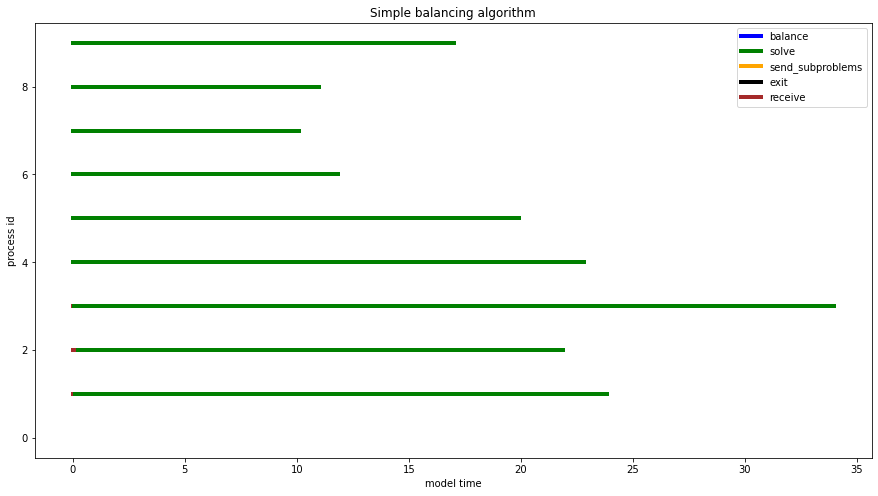

In [6]:
# !mpiexec --hostfile hostfile -n 10 python EngineSimple.py

plot('TraceSimple.csv', 'Communication33.csv', 'Simple balancing algorithm')

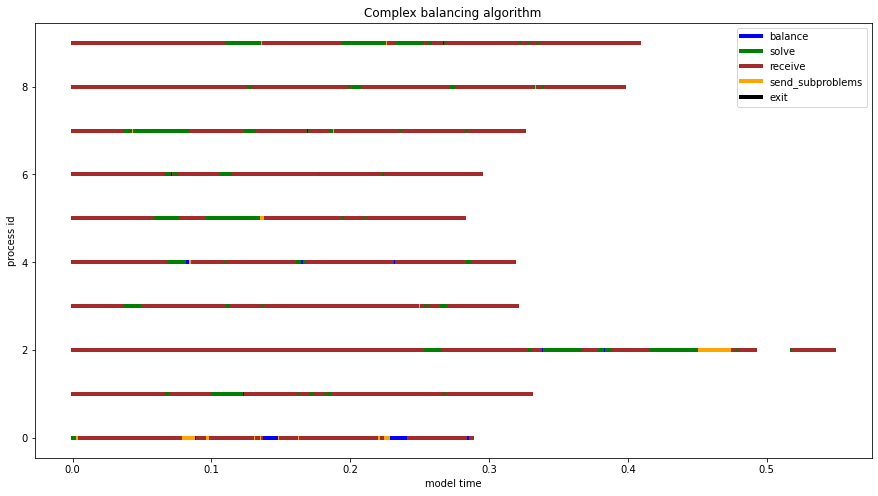

In [62]:
plot('TraceC.csv', 'Communicatio.csv', 'Complex balancing algorithm')


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


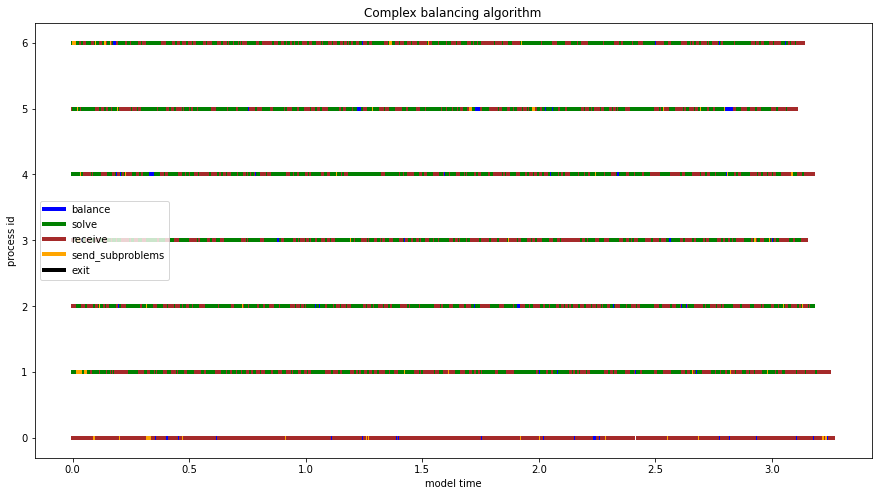

In [5]:
plot('TraceC.csv', 'Communicatio.csv', 'Complex balancing algorithm')
# cnt = count('Trace33.csv', 'Communication33.csv')
# print(f'Speedup: {cnt[0]}\nEfficiency: {cnt[1]}')


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


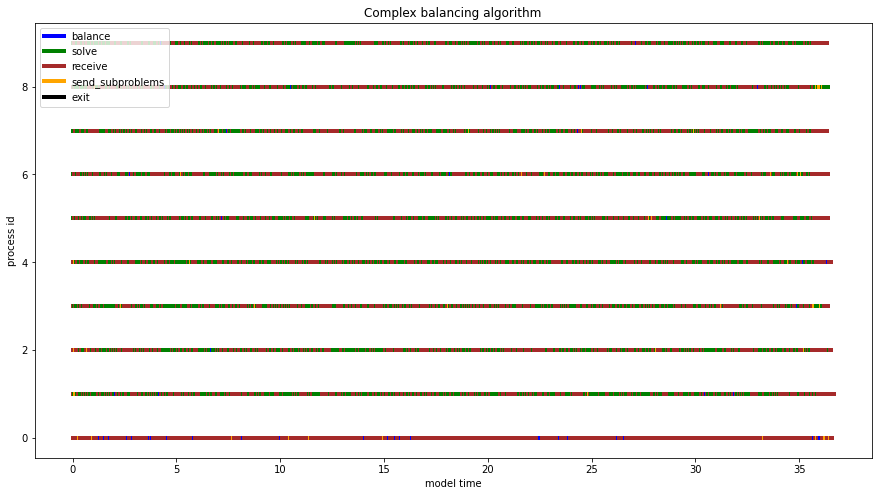

In [60]:
plot('TraceC.csv', 'Communicatio.csv', 'Complex balancing algorithm')

In [3]:
def count(trace_file: str, comm_file: str):
    df = pd.read_csv(trace_file, index_col=0)

    time = pd.read_csv(comm_file, index_col=0)
    time = time.fillna('')

    processes = len(df.columns) // 3

    max_time = 0
    Tseq = 0
    for j in range(processes):
        x = list(df['timestamp' + str(j)].fillna(-1))[1:]
        y = list(df['state' + str(j)].fillna(-1))[1:]
        res = []
        for i, el in enumerate(x):
            if el == -1:
                continue
            el = list(map(float, el.split('-')))
            if el[1] > max_time:
                max_time = el[1]
            if y[i] == 'Solve':
                Tseq += el[1] - el[0]
            el.append(y[i])
            res.append(el)

    acceleration = Tseq / max_time
    efficiency = acceleration / processes
    return acceleration, efficiency

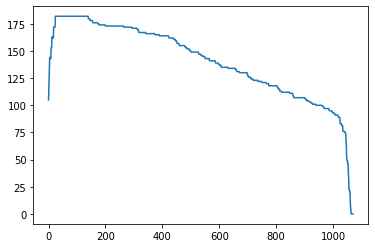

In [13]:
s_am=[105, 115, 124, 134, 144, 144, 144, 143, 143, 153, 153, 153, 163, 162, 162, 162, 162, 162, 172, 172, 172, 172, 172, 172, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 180, 180, 180, 180, 179, 179, 179, 178, 178, 178, 178, 178, 178, 178, 178, 177, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 175, 175, 175, 175, 175, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 170, 170, 170, 170, 170, 168, 168, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 167, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 163, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 161, 161, 161, 161, 161, 161, 160, 160, 160, 159, 159, 159, 158, 157, 157, 157, 157, 157, 157, 157, 156, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 154, 154, 154, 154, 153, 153, 153, 153, 152, 152, 152, 152, 152, 152, 152, 152, 151, 151, 151, 150, 150, 150, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 147, 147, 147, 147, 147, 147, 147, 147, 146, 146, 146, 146, 146, 145, 145, 145, 145, 145, 145, 145, 145, 145, 144, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 143, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 141, 140, 139, 139, 139, 139, 139, 139, 139, 139, 139, 138, 138, 138, 138, 138, 137, 137, 137, 137, 137, 137, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 133, 133, 133, 133, 132, 131, 131, 131, 131, 131, 131, 131, 131, 131, 131, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 128, 128, 127, 127, 126, 126, 126, 126, 126, 126, 126, 125, 125, 125, 125, 124, 124, 124, 124, 124, 124, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 120, 120, 120, 120, 120, 120, 120, 120, 120, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 118, 117, 117, 116, 116, 115, 115, 115, 115, 115, 113, 113, 113, 113, 113, 113, 113, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 110, 109, 108, 108, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 106, 106, 106, 105, 105, 105, 105, 104, 104, 104, 104, 104, 104, 104, 104, 103, 103, 103, 103, 103, 103, 102, 102, 102, 102, 102, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95, 94, 94, 94, 93, 93, 93, 93, 93, 93, 92, 92, 92, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 90, 89, 89, 89, 89, 89, 88, 83, 83, 83, 83, 83, 83, 81, 81, 81, 81, 76, 76, 76, 76, 76, 76, 75, 75, 75, 75, 73, 66, 62, 52, 50, 49, 49, 46, 46, 38, 34, 23, 22, 22, 20, 20, 9, 6, 4, 0, 0, 0, 0, 0, 0, 0]
plt.plot(list(range(len(s_am))), s_am)

# Plot statistics
example from internet:

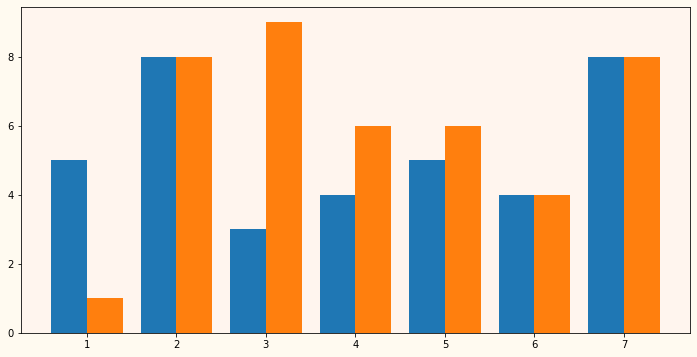

In [63]:
x1 = np.arange(1, 8) - 0.2
x2 = np.arange(1, 8) + 0.2
y1 = np.random.randint(1, 10, size = 7)
y2 = np.random.randint(1, 10, size = 7)

fig, ax = plt.subplots()

ax.bar(x1, y1, width = 0.4)
ax.bar(x2, y2, width = 0.4)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

In [67]:
x1

array([0.8, 1.8, 2.8, 3.8, 4.8, 5.8, 6.8])

In [113]:
def plot_statistics(trace_file: str, title: str = 'Stat plot'):
    df = pd.read_csv(trace_file, index_col=0)

    processes = len(df.columns) // 3
    fig, ax = plt.subplots(figsize=(15,8))

    x_rcv = np.arange(0, processes) - 0.3
    x_snd = np.arange(0, processes) - 0.1
    x_slv = np.arange(0, processes) + 0.1
    x_blc = np.arange(0, processes) + 0.3
    
    y_rcv = []
    y_snd = []
    y_slv = []
    y_blc = []
    
    status = {}
    isLegendSet = False
    for j in range(processes):
        times = list(df['timestamp' + str(j)].fillna(-1))[1:]
        states = list(df['state' + str(j)].fillna(-1))[1:]
        res = []
        rcv = 0.
        snd = 0.
        slv = 0.
        blc = 0.
        for i, el in enumerate(times):
            if el == -1:
                continue
            el = list(map(float, el.split('-')))
            if states[i] == 'Await for receive':
                el.append('red')
            elif states[i] == 'balance':
                blc += el[1] - el[0]
            elif states[i] == 'receive':
                rcv += el[1] - el[0]
            elif 'send' in states[i]:
                snd += el[1] - el[0]
            elif states[i] == 'solve':
                slv += el[1] - el[0]
        y_rcv.append(rcv)
        y_snd.append(snd)
        y_slv.append(slv)
        y_blc.append(blc)
    
    colors = {'rcv': 'brown', 'snd': 'orange', 'slv': 'green', 'blc': 'blue'}
    
    bar_plot = ax.bar(x_rcv, y_rcv, width = 0.2, color=colors['rcv'])
    bar_plot = bar_plot + ax.bar(x_snd, y_snd, width = 0.2, color=colors['snd'])
    bar_plot = bar_plot + ax.bar(x_slv, y_slv, width = 0.2, color=colors['slv'])
    bar_plot = bar_plot + ax.bar(x_blc, y_blc, width = 0.2, color=colors['blc'])
    
    bar_label=y_rcv+y_snd+y_slv+y_blc
    for idx, rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                round(bar_label[idx], 4),
                ha='center', va='bottom', rotation=90)
    
    for k, v in colors.items():
        ax.bar(-1, 0, width = 0, color=v, label=k)

    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    ax.legend()
    plt.ylabel('time')
    plt.xlabel('process id')
    plt.title(title)
    plt.show()

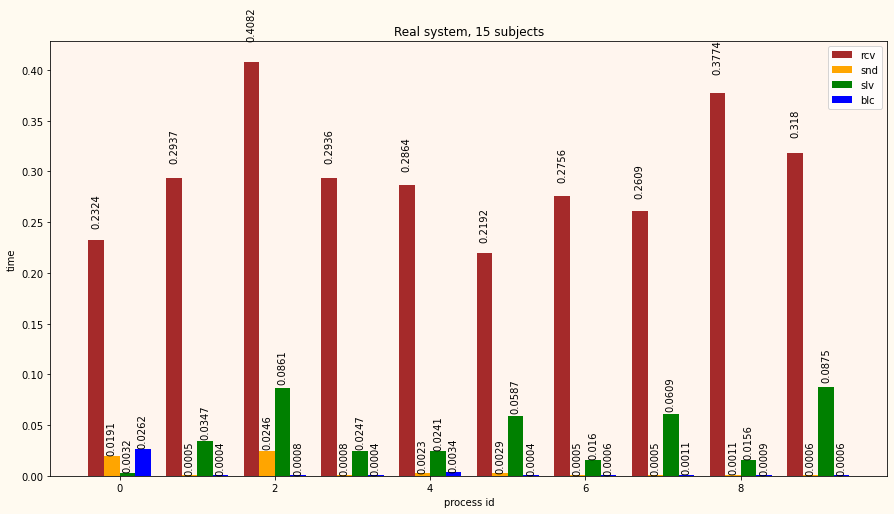

In [115]:
plot_statistics('TraceC.csv', 'Real system, 15 subjects')

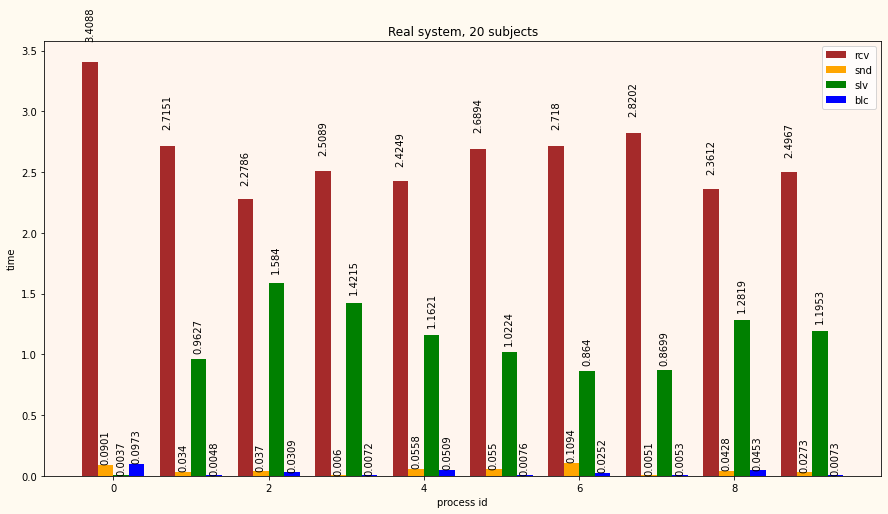

In [116]:
plot_statistics('TraceC.csv', 'Real system, 20 subjects')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


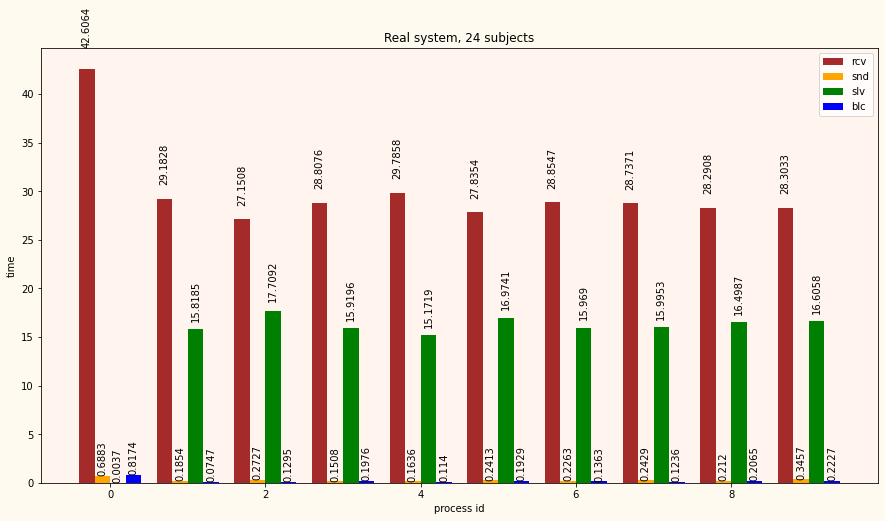

In [117]:
plot_statistics('TraceC.csv', 'Real system, 24 subjects')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


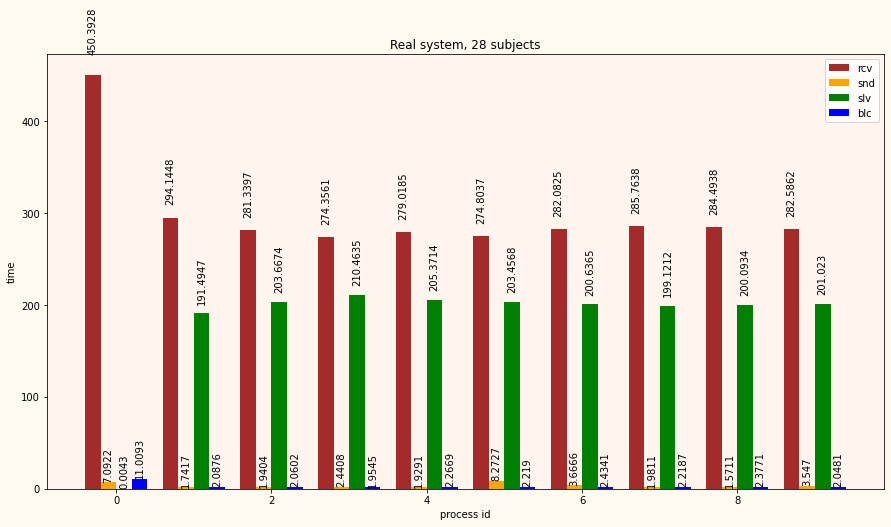

In [118]:
plot_statistics('TraceC.csv', 'Real system, 28 subjects')

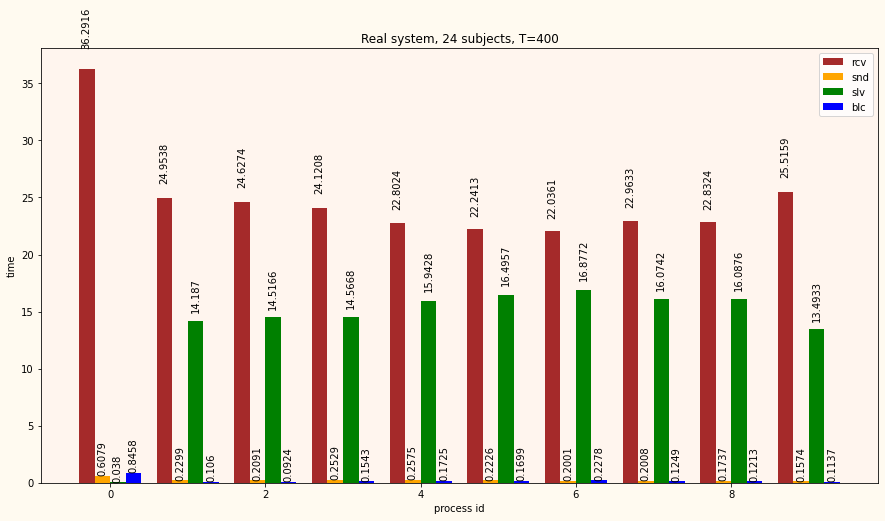

In [119]:
plot_statistics('TraceC.csv', 'Real system, 24 subjects, T=400')

In [8]:
am = 0
suma = (0, 0)
for i in tqdm(range(am)):
    try:
        eng = Engine(proc_amount=10, max_depth=20)
        eng.run()
    except Exception:
#         print('n')
        continue
    cur = count('Trace.csv', 'Communication.csv')
    suma = tuple(map(sum, zip(suma, cur)))
# suma
acc_average = suma[0] / am
eff_average = suma[1] / am

print(f'Acceleration: {acc_average}\nEfficiency: {eff_average}')

0it [00:00, ?it/s]


ZeroDivisionError: division by zero

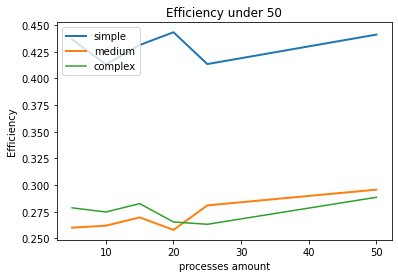

In [10]:
x1=[0.436482114,0.413069099,0.431287537,0.443265368,0.413425653,0.441064898]
x2=[0.259990096,0.26185991,0.269618974,0.257903146,0.280897581,0.295667281]
x3=[0.278613218,0.274713947,0.282554042,0.265360369,0.26316751,0.288510803]

x4=[0.610337353,0.628401689,0.616084879,0.622497127,0.619263894]
x5=[0.657465962,0.650249205,0.651677935,0.641132954,0.631164836]
x6=[0.697555496,0.673020157,0.687210302,0.675430268,0.69638548]

x7=[0.647148483,0.664537678,0.649004463,0.651378291,0.625314868,0.633828124]
x8=[0.817585103,0.779793032,0.803009341,0.805948317,0.777709897,0.791460961]
x9=[0.840410834,0.867059051,0.832178328,0.85787612,0.842881944,0.855508134]

y1=[5, 10, 15, 20, 25, 50]
y2=[100, 150, 200, 250, 500]
y3=[1000, 1500, 2000, 2500, 5000, 10000]

# x = np.arange(0, 2*np.pi, 0.02)
# y = np.sin(x)
# y1 = np.sin(2*x)
# y2 = np.sin(3*x)
# ym1 = np.ma.masked_where(y1 > 0.5, y1)
# ym2 = np.ma.masked_where(y2 < -0.5, y2)

lines = plt.plot(y1, x1, y1, x2, y1, x3)
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], linewidth=2)
plt.setp(lines[2], markersize=2)

plt.legend(('simple', 'medium', 'complex'),
           loc='upper left')
plt.title('Efficiency under 50')
plt.xlabel('processes amount')
plt.ylabel('Efficiency')

plt.show()

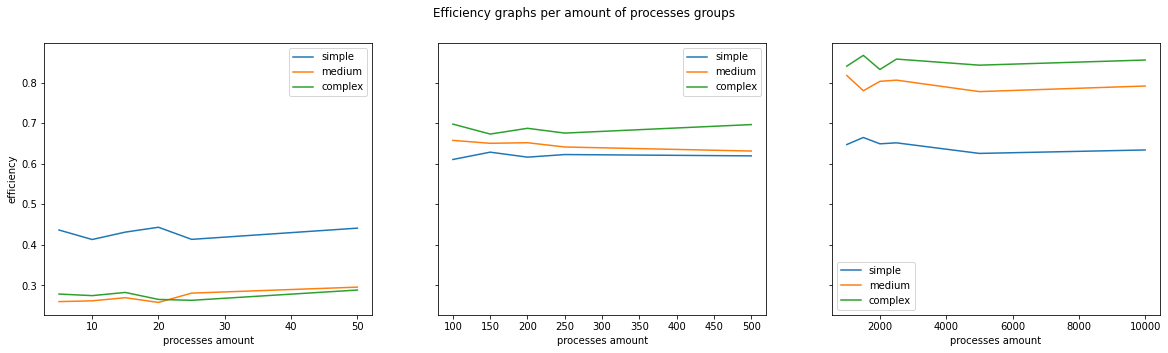

In [39]:
import numpy as np


fig, axs = plt.subplots(1, 3,figsize=(20,5), sharey=True)
fig.suptitle('Efficiency graphs per amount of processes groups')
axs[0].plot(y1, x1, y1, x2, y1, x3)
# axs[0].set_title('Efficiency')
axs[0].legend(('simple', 'medium', 'complex'))

axs[1].plot(y2, x4, y2, x5, y2, x6)
# axs[1].set_title('Axis [0,1]')
axs[1].legend(('simple', 'medium', 'complex'))

axs[2].plot(y3, x7, y3, x8, y3, x9)
# axs[2].set_title('Axis [0,1]')
axs[2].legend(('simple', 'medium', 'complex'))

for ax in axs.flat:
    ax.set(xlabel='processes amount', ylabel='efficiency')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    

In [41]:
a1=[2.182410568,4.130690991,6.469313061,8.865307353,10.33564132,22.05324492]
a2=[1.29995048,2.618599101,4.044284614,5.158062911,7.022439515,14.78336405]
a3=[1.393066088,2.747139469,4.238310635,5.30720738,6.579187748,14.42554013]

a4=[61.03373534,94.26025333,123.2169758,155.6242817,309.6319472]
a5=[65.74659619,97.53738074,130.3355869,160.2832386,315.5824182]
a6=[69.75554958,100.9530236,137.4420605,168.8575671,348.1927401]

a7=[647.1484826,996.806517,1298.008925,1628.445728,3126.574339,6338.281238]
a8=[817.5851029,1169.689548,1606.018681,2014.870791,3888.549484,7914.609614]
a9=[840.4108343,1300.588576,1664.356655,2144.690299,4214.409718,8555.081345]

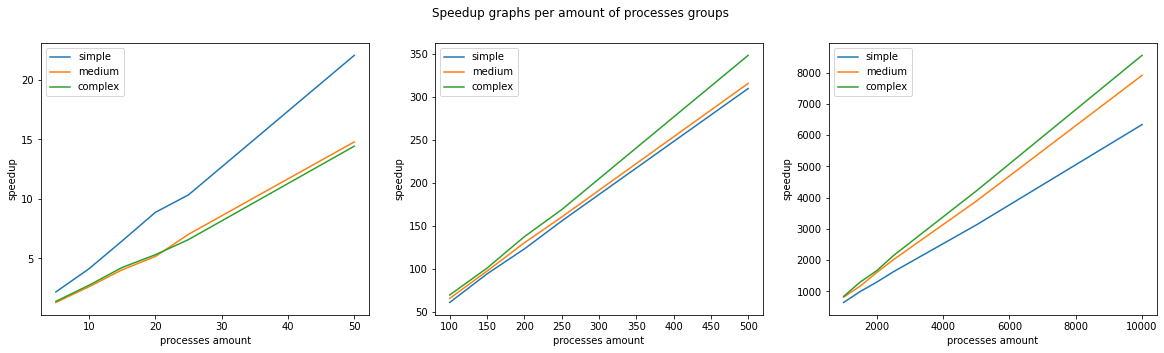

In [45]:
fig, axs = plt.subplots(1, 3,figsize=(20,5))
fig.suptitle('Speedup graphs per amount of processes groups')
axs[0].plot(y1, a1, y1, a2, y1, a3)
# axs[0].set_title('Efficiency')
axs[0].legend(('simple', 'medium', 'complex'))

axs[1].plot(y2, a4, y2, a5, y2, a6)
# axs[1].set_title('Axis [0,1]')
axs[1].legend(('simple', 'medium', 'complex'))

axs[2].plot(y3, a7, y3, a8, y3, a9)
# axs[2].set_title('Axis [0,1]')
axs[2].legend(('simple', 'medium', 'complex'))

for ax in axs.flat:
    ax.set(xlabel='processes amount', ylabel='speedup')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
    

## Count receive lin formulae

In [29]:
# !pip install ggplot

In [31]:
import statsmodels.api as sm
import patsy as pt
import sklearn.linear_model as lm
# from ggplot import *


In [12]:
rcvs=[0.1193461, 0.0063243, 0.0000257, 0.0338659, 0.0000179, 0.0000138, 0.0000131, 0.0000131, 0.0044351, 0.0032749, 0.0129402, 0.0000140, 0.0000388, 0.0000193, 0.0005992, 0.0000439, 0.0017700, 0.0052571, 0.0172580, 0.0000451, 0.0000119, 0.0000110, 0.0000138, 0.0000370, 0.0000110, 0.0000131, 0.0037959, 0.0046081, 0.0005529, 0.0000178, 0.0171327, 0.0000140, 0.0000157, 0.0000110, 0.0000100, 0.0000138, 0.0000394, 0.0032591, 0.0037523, 0.0006721, 0.0013189, 0.0281160, 0.0000231, 0.0000122, 0.0000100, 0.0000100, 0.0000091, 0.0000138, 0.0000179, 0.0010497, 0.0041323, 0.0028250, 0.0013797, 0.0205891, 0.0000139, 0.0000110, 0.0000113, 0.0000101, 0.0000100, 0.0000098, 0.0000100, 0.0048011, 0.0023470, 0.0010541, 0.0203809, 0.0000169, 0.0000110, 0.0000148, 0.0000141, 0.0000983, 0.0000148, 0.0000109, 0.0037479, 0.0013730, 0.0012869, 0.0009442, 0.0004571, 0.0126431, 0.0000148, 0.0000109, 0.0000112, 0.0000097, 0.0000141, 0.0000132, 0.0034230, 0.0000162, 0.0025332, 0.0021329, 0.0000219, 0.0007569, 0.0042179, 0.0000219, 0.0022430, 0.0022881, 0.0004442, 0.0234771, 0.0000141, 0.0000109, 0.0000103, 0.0000128, 0.0000139, 0.0000129, 0.0000121, 0.0000861, 0.0000191, 0.0000219, 0.0000169, 0.0010302, 0.0036621, 0.0014260, 0.0030241, 0.0000188, 0.0161438, 0.0000162, 0.0000141, 0.0000139, 0.0000119, 0.0000122, 0.0000121, 0.0001400, 0.0015030, 0.0009840, 0.0002540, 0.0014422, 0.0009427, 0.0013418, 0.0002041, 0.0006473, 0.0215149, 0.0000138, 0.0000128, 0.0000098, 0.0000110, 0.0000110, 0.0000141, 0.0000131, 0.0000128, 0.0009751, 0.0000460, 0.0041962, 0.0021460, 0.0002940, 0.0023749, 0.0000198, 0.0016739, 0.0032150, 0.0000179, 0.0032270, 0.0304442, 0.0000169, 0.0000152, 0.0000127, 0.0000160, 0.0000119, 0.0000131, 0.0000188, 0.0020228, 0.0009160, 0.0009480, 0.0024080, 0.0014362, 0.0214880, 0.0000160, 0.0000188, 0.0000100, 0.0000098, 0.0000100, 0.0000141, 0.0000162, 0.0050449, 0.0000162, 0.0002571, 0.0022250, 0.0011930, 0.0019040, 0.0005360, 0.0002050, 0.0229161, 0.0000148, 0.0000122, 0.0000100, 0.0000140, 0.0000141, 0.0000119, 0.0000109, 0.0000148, 0.0038569, 0.0001180, 0.0023570, 0.0001259, 0.0000127, 0.0090773, 0.0000172, 0.0000138, 0.0000131, 0.0000673, 0.0034990, 0.0000140, 0.0006480, 0.0042586, 0.0186300, 0.0000141, 0.0000110, 0.0000098, 0.0000119, 0.0000110, 0.0000238, 0.0000100, 0.0000098, 0.0053739, 0.0000132, 0.0000169, 0.0041620, 0.0002802, 0.0190191, 0.0000169, 0.0000131, 0.0000128, 0.0000181, 0.0000131, 0.0000128, 0.0000141, 0.0038719, 0.0005009, 0.0009427, 0.0038381, 0.0000270, 0.0000110, 0.0000110, 0.0000110, 0.0000100, 0.0000138, 0.0000140, 0.0000122, 0.0025339, 0.0012490, 0.0013978, 0.0000160, 0.0223160, 0.0000141, 0.0000139, 0.0000143, 0.0000119, 0.0000131, 0.0000119, 0.0000121, 0.0004799, 0.0028300, 0.0033281, 0.0327580, 0.0000219, 0.0000150, 0.0000119, 0.0000144, 0.0000121, 0.0000119, 0.0000260, 0.0019891, 0.0005958, 0.0015679, 0.0008812, 0.0003070, 0.0000262, 0.0019159, 0.0000780, 0.0195010, 0.0000150, 0.0000110, 0.0000100, 0.0000100, 0.0000148, 0.0000100, 0.0000100, 0.0031812, 0.0055721, 0.0000980, 0.0162590, 0.0000231, 0.0000141, 0.0000169, 0.0000112, 0.0000131, 0.0000131, 0.0009461, 0.0020461, 0.0035400, 0.0000203, 0.0009169, 0.0277260, 0.0000181, 0.0000160, 0.0000157, 0.0000120, 0.0000171, 0.0000138, 0.0000150, 0.0025201, 0.0013249, 0.0008390, 0.0036280, 0.0216830, 0.0000179, 0.0000119, 0.0000122, 0.0000126, 0.0000141, 0.0000119, 0.0000126, 0.0004070, 0.0056428, 0.0000882, 0.0146718, 0.0000160, 0.0000141, 0.0000179, 0.0000171, 0.0000141, 0.0023239, 0.0000460, 0.0004342, 0.0001061, 0.0019250, 0.0065248, 0.0228119, 0.0000193, 0.0000150, 0.0000126, 0.0000310, 0.0000147, 0.0000139, 0.0000131, 0.0048912, 0.0016360, 0.0013052, 0.0214510, 0.0000150, 0.0000151, 0.0000139, 0.0000131, 0.0000119, 0.0000131, 0.0005021, 0.0013750, 0.0002079, 0.0004441, 0.0003031, 0.0008349, 0.0026700, 0.0000861, 0.0194983, 0.0000140, 0.0000117, 0.0000110, 0.0000141, 0.0000129, 0.0000162, 0.0000119, 0.0000122, 0.0000120, 0.0017788, 0.0019970, 0.0002639, 0.0006511, 0.0037241, 0.0226408, 0.0000150, 0.0000141, 0.0000131, 0.0000128, 0.0000122, 0.0000119, 0.0000120, 0.0000119, 0.0017881, 0.0006840, 0.0013940, 0.0001660, 0.0000790, 0.0006940, 0.0035569, 0.0003130, 0.0000319, 0.0000141, 0.0000122, 0.0000119, 0.0000231, 0.0010431, 0.0003572, 0.0034769, 0.0006630, 0.0001709, 0.0009169, 0.0000732, 0.0005030, 0.0199440, 0.0000139, 0.0000109, 0.0000101, 0.0000100, 0.0000136, 0.0000138, 0.0000132, 0.0031919, 0.0007808, 0.0025060, 0.0000110, 0.0023801, 0.0000780, 0.0141081, 0.0000141, 0.0000110, 0.0000116, 0.0000120, 0.0000271, 0.0000129, 0.0000159, 0.0020790, 0.0000761, 0.0031337, 0.0000189, 0.0027079, 0.0012260, 0.0007417, 0.0312538, 0.0000148, 0.0000112, 0.0000150, 0.0000131, 0.0000110, 0.0000129, 0.0000131, 0.0036678, 0.0013661, 0.0029249, 0.0004442, 0.0037570, 0.0000162, 0.0009930, 0.0003399, 0.0028581, 0.0000178, 0.0001619, 0.0023959, 0.0107351, 0.0000160, 0.0000129, 0.0000131, 0.0000131, 0.0261781, 0.0000200, 0.0000110, 0.0000109, 0.0000100, 0.0000110, 0.0000100, 0.0000098, 0.0053551, 0.0008740, 0.0004270, 0.0000319, 0.0028507, 0.0166102, 0.0000210, 0.0000131, 0.0000129, 0.0000119, 0.0000131, 0.0000109, 0.0042748, 0.0000163, 0.0000670, 0.0012362, 0.0033848, 0.0006309, 0.0043421, 0.0238852, 0.0000170, 0.0000148, 0.0000131, 0.0000141, 0.0000152, 0.0000141, 0.0037770, 0.0004890, 0.0028489, 0.0019362, 0.0000293, 0.0112209, 0.0000179, 0.0000141, 0.0000181, 0.0000141, 0.0000141, 0.0031152, 0.0011668, 0.0000188, 0.0013719, 0.0001149, 0.0025101, 0.0279979, 0.0000152, 0.0000150, 0.0000100, 0.0000088, 0.0000101, 0.0000100, 0.0000129, 0.0000141, 0.0012929, 0.0011993, 0.0018208, 0.0049557, 0.0000756, 0.0205240, 0.0000167, 0.0000121, 0.0000310, 0.0000157, 0.0000140, 0.0010843, 0.0000148, 0.0035841, 0.0007112, 0.0000970, 0.0040140, 0.0006571, 0.0135234, 0.0000148, 0.0000119, 0.0000101, 0.0000100, 0.0000139, 0.0010531, 0.0022691, 0.0017050, 0.0007019, 0.0010440, 0.0005288, 0.0214341, 0.0000160, 0.0000110, 0.0000131, 0.0000140, 0.0000131, 0.0000109, 0.0000119, 0.0005982, 0.0046520, 0.0005870, 0.0031800, 0.0000429, 0.0000410, 0.0000119, 0.0000100, 0.0000172, 0.0000110, 0.0000098, 0.0000138, 0.0000128, 0.0000141, 0.0013959, 0.0015490, 0.0006442, 0.0018881, 0.0010030, 0.0004301, 0.0005310, 0.0201900, 0.0000129, 0.0000121, 0.0000239, 0.0000101, 0.0000117, 0.0000143, 0.0033710, 0.0039351, 0.0012938, 0.0107420, 0.0000148, 0.0000109, 0.0000120, 0.0000110, 0.0011971, 0.0035861, 0.0000231, 0.0012851, 0.0029059, 0.0008111, 0.0009000, 0.0032420, 0.0005377, 0.0029299, 0.0006921, 0.0253062, 0.0000158, 0.0000141, 0.0000129, 0.0000128, 0.0000131, 0.0000122, 0.0000131, 0.0000121, 0.0003478, 0.0019398, 0.0025229, 0.0017791, 0.0012889, 0.0028560, 0.0003528, 0.0037260, 0.0005741, 0.0022380, 0.0000172, 0.0421760, 0.0000141, 0.0000110, 0.0000166, 0.0000132, 0.0000139, 0.0000129, 0.0000122, 0.0000119, 0.0009539, 0.0014329, 0.0041029, 0.0000138, 0.0000112, 0.0012901, 0.0000140, 0.0019639, 0.0139908, 0.0000210, 0.0000131, 0.0000131, 0.0000119, 0.0003779, 0.0010634, 0.0009492, 0.0015550, 0.0005241, 0.0056939, 0.0000189, 0.0015230, 0.0160561, 0.0000131, 0.0000122, 0.0000139, 0.0000138, 0.0000131, 0.0021472, 0.0033149, 0.0010040, 0.0013419, 0.0021379, 0.0002372, 0.0028720, 0.0000179, 0.0032089, 0.0014420, 0.0000699, 0.0244729, 0.0000159, 0.0000110, 0.0000112, 0.0000089, 0.0000100, 0.0000101, 0.0000128, 0.0040898, 0.0008750, 0.0002659, 0.0299220, 0.0000151, 0.0000110, 0.0000100, 0.0000198, 0.0000148, 0.0000158, 0.0000141, 0.0000329, 0.0024238, 0.0011499, 0.0001080, 0.0001390, 0.0030160, 0.0002949, 0.0202889, 0.0000141, 0.0000110, 0.0000112, 0.0000110, 0.0000100, 0.0000138, 0.0000141, 0.0013440, 0.0021801, 0.0007653, 0.0001762, 0.0013210, 0.0001510, 0.0026529, 0.0001240, 0.0175209, 0.0000162, 0.0000138, 0.0000109, 0.0000110, 0.0000119, 0.0000119, 0.0000120, 0.0004120, 0.0005710, 0.0039771, 0.0010888, 0.0026722, 0.0156181, 0.0000141, 0.0000143, 0.0000220, 0.0000119, 0.0000117, 0.0000150, 0.0000119, 0.0018232, 0.0067499, 0.0145149, 0.0000150, 0.0000097, 0.0000138, 0.0000141, 0.0000122, 0.0001822, 0.0028732, 0.0001779, 0.0026181, 0.0000151, 0.0023160, 0.0014022, 0.0181229, 0.0000138, 0.0000121, 0.0000100, 0.0000153, 0.0000138, 0.0000121, 0.0000119, 0.0000120, 0.0014630, 0.0005758, 0.0001442, 0.0023871, 0.0020450, 0.0195289, 0.0000169, 0.0000131, 0.0000129, 0.0000119, 0.0000119, 0.0000119, 0.0000121, 0.0040478, 0.0011330, 0.0033078, 0.0026620, 0.0002019, 0.0242539, 0.0000159, 0.0000110, 0.0000116, 0.0000141, 0.0000131, 0.0000119, 0.0000122, 0.0000117, 0.0037752, 0.0002553, 0.0009241, 0.0028989, 0.0118420, 0.0000129, 0.0000141, 0.0000141, 0.0000119, 0.0000141, 0.0000160, 0.0018990, 0.0013411, 0.0000120, 0.0025961, 0.0001779, 0.0007970, 0.0018907, 0.0196798, 0.0000170, 0.0000131, 0.0000129, 0.0000121, 0.0000120, 0.0000141, 0.0019932, 0.0000210, 0.0006428, 0.0060968, 0.0272792, 0.0000181, 0.0000160, 0.0000141, 0.0000141, 0.0000160, 0.0000119, 0.0000121, 0.0009880, 0.0010707, 0.0022259, 0.0000158, 0.0003431, 0.0009186, 0.0029982, 0.0000360, 0.0000151, 0.0000131, 0.0000120, 0.0000109, 0.0000131, 0.0013229, 0.0006082, 0.0010829, 0.0004708, 0.0014692, 0.0009749, 0.0024438, 0.0029308, 0.0031178, 0.0000179, 0.0004609, 0.0036390, 0.0007792, 0.0015323, 0.0012948, 0.0209749, 0.0000178, 0.0000179, 0.0000131, 0.0000121, 0.0000119, 0.0000120, 0.0047691, 0.0000170, 0.0000141, 0.0036888, 0.0002062, 0.0012191, 0.0003059, 0.0039051, 0.0003419, 0.0018559, 0.0012999, 0.0012710, 0.0000131, 0.0012870, 0.0000730, 0.0273750, 0.0000150, 0.0000110, 0.0000112, 0.0000101, 0.0000100, 0.0000126, 0.0000141, 0.0000129, 0.0033488, 0.0000150, 0.0007050, 0.0040839, 0.0004790, 0.0001142, 0.0000551, 0.0000190, 0.0000159, 0.0000141, 0.0000150, 0.0000141, 0.0000119, 0.0000131, 0.0014871, 0.0034342, 0.0021789, 0.0000570, 0.0006168, 0.0003669, 0.0170622, 0.0000129, 0.0000121, 0.0000110, 0.0000131, 0.0000100, 0.0000100, 0.0000100, 0.0000139, 0.0014060, 0.0031429, 0.0002911, 0.0007990, 0.0018711, 0.0157628, 0.0000150, 0.0000110, 0.0000110, 0.0000089, 0.0000138, 0.0000131, 0.0000153, 0.0018849, 0.0012169, 0.0010468, 0.0045900, 0.0007339, 0.0002508, 0.0231860, 0.0000179, 0.0000110, 0.0000141, 0.0000131, 0.0000120, 0.0000129, 0.0010078, 0.0025230, 0.0028100, 0.0020073, 0.0008900, 0.0223348, 0.0000172, 0.0000138, 0.0000131, 0.0000109, 0.0000140, 0.0000121, 0.0008340, 0.0000577, 0.0030567, 0.0004878, 0.0000811, 0.0022568, 0.0008602, 0.0001740, 0.0120180, 0.0000170, 0.0000140, 0.0000131, 0.0000131, 0.0011179, 0.0003782, 0.0005948, 0.0000119, 0.0003440, 0.0002591, 0.0004111, 0.0002019, 0.0001978, 0.0001411, 0.0005350, 0.0000782, 0.0005341, 0.0000960, 0.0001089, 0.0004952, 0.0000150, 0.0006008, 0.0000620, 0.0003159, 0.0000410, 0.0005512, 0.0003502, 0.0000262, 0.0000112, 0.0000160, 0.0000119, 0.0000110, 0.0000138, 0.0000131, 0.0002291, 0.0000129, 0.0005100, 0.0001199, 0.0002179, 0.0004139, 0.0001800, 0.0003331, 0.0000520, 0.0004649, 0.0000140, 0.0000119, 0.0002868, 0.0000131, 0.0003259, 0.0002460, 0.0000132, 0.0003469, 0.0002480, 0.0002511, 0.0000591, 0.0002229, 0.0003619, 0.0000152, 0.0000140, 0.0002220, 0.0003250, 0.0000219, 0.0001838, 0.0001197, 0.0003459, 0.0000162, 0.0000460, 0.0000119, 0.0216022, 0.0000150, 0.0000131, 0.0000140, 0.0000131, 0.0000110, 0.0000140, 0.0000122, 0.0000110, 0.0004279, 0.0006411, 0.0000122, 0.0006649, 0.0000121, 0.0003419, 0.0000122, 0.0001529, 0.0003882, 0.0001440, 0.0000379, 0.0003562, 0.0004762, 0.0001400, 0.0002918, 0.0000419, 0.0000131, 0.0005901, 0.0004370, 0.0001328, 0.0000842, 0.0003181, 0.0000138, 0.0000229, 0.0000169, 0.0005400, 0.0000388, 0.0000119, 0.0003321, 0.0104299, 0.0000151, 0.0000091, 0.0000091, 0.0000091, 0.0000126, 0.0000241, 0.0000119, 0.0000088, 0.0000141, 0.0000110, 0.0000131, 0.0040279, 0.0007167, 0.0007369, 0.0001321, 0.0000141, 0.0000120, 0.0000291, 0.0000110, 0.0000170, 0.0000529, 0.0081799, 0.0000141, 0.0000448, 0.0001128, 0.0000129, 0.0000367, 0.0000141, 0.0000193, 0.0001621, 0.0000140, 0.0000598, 0.0004251, 0.1659258, 0.0000479, 0.0000129, 0.0000091, 0.0000110, 0.0000110, 0.0001309, 0.0000488, 0.0000410, 0.0061490, 0.0844021, 0.0000158, 0.0000147, 0.0000389, 0.0000148, 0.0000110, 0.0000109, 0.0000119, 0.0000100, 0.0000088, 0.0000932, 0.0010352, 0.0008109, 0.0015671, 0.0392520, 0.0000198, 0.0000091, 0.0000091, 0.0279103, 0.0000258, 0.0199611, 0.0001648, 0.0000940, 0.0000949, 0.0000458, 0.0000787, 0.0000470, 0.0000560, 0.0000567, 0.0223081, 0.0000381, 0.0000350, 0.0134869, 0.0011480, 0.0000481, 0.0000382, 0.0280320, 0.0038552, 0.0298359, 0.0250201, 0.0000360, 0.0000451, 0.0232899, 0.0000520, 0.0000363, 0.0216613, 0.0000551, 0.0000419, 0.0001588, 0.0245697, 0.0228159, 0.0216539, 0.0284519, 0.0348439, 0.0179360, 0.0050569, 0.0000331, 0.0320158, 0.0171728, 0.0025830, 0.0001070, 0.0169201, 0.0001428, 0.0000350, 0.0000520, 0.0183849, 0.0212150, 0.0000320, 0.0000412, 0.0000529, 0.0000629, 0.0180418, 0.0000463, 0.0189356, 0.0000410, 0.0442941, 0.0000363, 0.0000960, 0.0235830, 0.0025542, 0.0381047, 0.0077829, 0.0003068, 0.0000730, 0.0248942, 0.0320821, 0.0121610, 0.0000379, 0.0423210, 0.0322139, 0.0242851, 0.0226419, 0.0247729, 0.0000689, 0.0362561, 0.0300810, 0.0052510, 0.0213270, 0.0000367, 0.0230570, 0.0000429, 0.0000371, 0.0058063, 0.0053170, 0.0000613, 0.0021310, 0.0000820, 0.0002288, 0.0000441, 0.0146918, 0.0000549, 0.0000708, 0.0000477, 0.0011192, 0.0063948, 0.0000469, 0.0010579, 0.0000339, 0.0000351, 0.0006159, 0.0001111, 0.0087290, 0.0446961, 0.0224901, 0.0000351, 0.0000629, 0.0000360, 0.0000381, 0.0275662, 0.0000739, 0.0000500, 0.0058789, 0.0016307, 0.0000329, 0.0145202, 0.0000270, 0.0000909, 0.0000360, 0.0000751, 0.0000338, 0.0000338, 0.0000410, 0.0000358, 0.0000589, 0.0000610, 0.0000548, 0.0000818, 0.0000582, 0.0000761, 0.0000577, 0.0000561, 0.0000551, 0.0186989, 0.0000563, 0.0000660, 0.0000610, 0.0045591, 0.0002229, 0.0000592, 0.0001180, 0.0001170, 0.0000539, 0.0000520, 0.0045400, 0.0001838, 0.0000713, 0.0858901, 0.1073348, 0.0863729, 0.0510890, 0.0006290, 0.0000319, 0.0194283, 0.0235438, 0.0235703, 0.0337229, 0.0171272, 0.0000661, 0.0251920, 0.0310242, 0.0192482, 0.0160342, 0.0000670, 0.0188870, 0.0000400, 0.0196102, 0.0000601, 0.0234389, 0.0164990, 0.0063420, 0.0000360, 0.0000319, 0.0058141, 0.0056390, 0.0000482, 0.0175791, 0.0133028, 0.0393059, 0.0284910, 0.0385599, 0.0311611, 0.0068503, 0.0047522, 0.0005122, 0.0011599, 0.0278647, 0.0246138, 0.0246930, 0.0185578, 0.0257468, 0.0191028, 0.0217161, 0.0482090, 0.0072550, 0.0000722, 0.0000723, 0.0225360, 0.0000567, 0.0000880, 0.0000420, 0.0001953, 0.0009363, 0.0001600, 0.0000508, 0.0005310, 0.0000608, 0.0041258, 0.0000809, 0.0028481, 0.0000508, 0.0000410, 0.0000710, 0.0562811, 0.0059350, 0.0140140, 0.0000448, 0.0000481, 0.0077150, 0.0000462, 0.0381639, 0.0001712, 0.0282821, 0.0040531, 0.0257489, 0.0322271, 0.0197349, 0.0000548, 0.0000687, 0.0214322, 0.0000501, 0.0201328, 0.0197341, 0.0236721, 0.0248242, 0.0000460, 0.0253849, 0.0000656, 0.0164959, 0.0486648, 0.0002260, 0.0000363, 0.0118661, 0.0000739, 0.0249278, 0.0000310, 0.0000770, 0.0000499, 0.0251379, 0.0237420, 0.0000472, 0.0000519, 0.0000350, 0.0000670, 0.0708470, 0.0000670, 0.0000599, 0.0253160, 0.0000398, 0.0000310, 0.0075551, 0.0095351, 0.0000588, 0.0000551, 0.0001542, 0.0000629, 0.0050419, 0.0001293, 0.0805619, 0.1182780, 0.0983632, 0.0422041, 0.0432110, 0.0000231, 0.0006054, 0.0000630, 0.0393622, 0.0162861, 0.0038622, 0.0000580, 0.0035579, 0.0000592, 0.0206439, 0.0250929, 0.0306530, 0.0056501, 0.0000661, 0.0000558, 0.0000910, 0.0000569, 0.0552180, 0.0004421, 0.0003610, 0.0004608, 0.0000358, 0.0008021, 0.0000279, 0.0009930, 0.0018911, 0.0066340, 0.0041470, 0.0000451, 0.0000920, 0.0065868, 0.0000739, 0.0042813, 0.0058572, 0.0000370, 0.0001380, 0.0006068, 0.0000699, 0.0000839, 0.0318150, 0.0039470, 0.0002849, 0.0000899, 0.0000813, 0.0039859, 0.0000432, 0.0065369, 0.0000491, 0.0212682, 0.0073378, 0.0063510, 0.0037927, 0.0319639, 0.0001030, 0.0000520, 0.0164990, 0.0000982, 0.0099900, 0.0000360, 0.0000479, 0.0199449, 0.0597601, 0.0264628, 0.0221150, 0.0373881, 0.0000749, 0.0000498, 0.0000891, 0.0000629, 0.0272648, 0.0000499, 0.0411342, 0.0000432, 0.0015213, 0.0000661, 0.0000439, 0.0000350, 0.0089500, 0.0065269, 0.0204380, 0.0000310, 0.0168613, 0.0000608, 0.0271108, 0.0229702, 0.0192749, 0.0202102, 0.0242422, 0.0328440, 0.0246780, 0.0000682, 0.0000499, 0.0125950, 0.0004411, 0.0160878, 0.0282511, 0.0201471, 0.0219490, 0.0325292, 0.0496922, 0.0224657, 0.0003312, 0.0000701, 0.0000608, 0.0000560, 0.0000560, 0.0000488, 0.0000730, 0.0000591, 0.0000560, 0.0001662, 0.0000488, 0.0458469, 0.0018130, 0.0001049, 0.0000508, 0.0814619, 0.1870119, 0.0009389, 0.0438962, 0.0010052, 0.0001700, 0.0250151, 0.0203130, 0.0313270, 0.0175660, 0.0000720, 0.0269198, 0.0454421, 0.0000661, 0.0447829, 0.0247287, 0.0200751, 0.0000429, 0.0000632, 0.0510960, 0.0011851, 0.0000439, 0.0030198, 0.0000779, 0.0156259, 0.0003650, 0.0000388, 0.0001290, 0.0000560, 0.0001619, 0.0000661, 0.0085640, 0.0007820, 0.0000429, 0.0000367, 0.0000429, 0.0000641, 0.0017412, 0.0012600, 0.0000860, 0.0219998, 0.0000472, 0.0067060, 0.0000420, 0.0000398, 0.0000808, 0.0004411, 0.0000908, 0.0000400, 0.0000572, 0.0048321, 0.0000592, 0.0002639, 0.0000758, 0.0000401, 0.0029912, 0.0000567, 0.0010097, 0.0004222, 0.0006972, 0.0000551, 0.0012729, 0.0000818, 0.0486412, 0.0006060, 0.0024657, 0.0245791, 0.0036370, 0.0156241, 0.0230379, 0.0000902, 0.0290518, 0.0023859, 0.0006289, 0.0000708, 0.0029080, 0.0000441, 0.0066068, 0.0035047, 0.0000720, 0.0215788, 0.0000472, 0.0353291, 0.0020737, 0.0000370, 0.0000391, 0.0000639, 0.0013337, 0.0000673, 0.0000520, 0.0172548, 0.0345139, 0.0175639, 0.0000369, 0.0000449, 0.0249307, 0.0218730, 0.0195883, 0.0197039, 0.0265894, 0.0481391, 0.0000489, 0.0000710, 0.0241081, 0.0250320, 0.0000470, 0.0000379, 0.0026057, 0.0000476, 0.0000407, 0.0000339, 0.0000632, 0.0012729, 0.0000337, 0.0280490, 0.0057230, 0.0036647, 0.0184550, 0.0000351, 0.0000448, 0.0000546, 0.0000448, 0.0001438, 0.0000572, 0.0000570, 0.0000550, 0.0000601, 0.0000570, 0.0001121, 0.0000570, 0.0000539, 0.0000620, 0.0000832, 0.0000567, 0.0000568, 0.0000551, 0.0000558, 0.0001538, 0.0000660, 0.0000541, 0.0000710, 0.0001690, 0.0000508, 0.0001872, 0.0000620, 0.0000839, 0.0000572, 0.0000551, 0.0000541, 0.0000751, 0.0000610, 0.0000563, 0.0000570, 0.0166321, 0.0010879, 0.0000722, 0.0000582, 0.0000620, 0.1282170, 0.0659442, 0.0769611, 0.0514648, 0.0196469, 0.0000980, 0.0045192, 0.0066290, 0.0302591, 0.0191882, 0.0259409, 0.0041690, 0.0258228, 0.0000801, 0.0000699, 0.0000363, 0.0000279, 0.0000381, 0.0000362, 0.0566401, 0.0205059, 0.0173981, 0.0000391, 0.0413490, 0.0163317, 0.0011192, 0.0000331, 0.0000393, 0.0191598, 0.0000450, 0.0203972, 0.0000729, 0.0291541, 0.0000591, 0.0000573, 0.0000442, 0.0000689, 0.0000661, 0.0000639, 0.0297389, 0.0232639, 0.0000720, 0.0249610, 0.0271799, 0.0203120, 0.0168021, 0.0000360, 0.0000489, 0.0488038, 0.0196280, 0.0000670, 0.0000551, 0.0000699, 0.0000541, 0.0494363, 0.0250953, 0.0048518, 0.0396221, 0.0203701, 0.0304608, 0.0209990, 0.0272691, 0.0288131, 0.0387860, 0.0199941, 0.0000367, 0.0211868, 0.0000491, 0.0000441, 0.0000379, 0.0254038, 0.0000450, 0.0477497, 0.0247609, 0.0326378, 0.0207100, 0.0000591, 0.0294981, 0.0047830, 0.0241019, 0.0283029, 0.0000298, 0.0000251, 0.0005750, 0.0000832, 0.0243199, 0.0328250, 0.0226288, 0.0204658, 0.0239892, 0.0179951, 0.0000529, 0.0000448, 0.0000661, 0.0000482, 0.0169671, 0.0012508, 0.0000419, 0.0043819, 0.0000761, 0.0318088, 0.0027308, 0.0001302, 0.0000410, 0.0007271, 0.0000451, 0.0379221, 0.0065570, 0.0063259, 0.0280721, 0.0211909, 0.0064427, 0.0002101, 0.0718060, 0.1119940, 0.0000601, 0.0000541, 0.0910840, 0.0002329, 0.0436142, 0.0005047, 0.0000889, 0.0043650, 0.0056329, 0.0092480, 0.0032818, 0.0249169, 0.0292681, 0.0249259, 0.0028316, 0.0043857, 0.0000620, 0.0074038, 0.0243252, 0.0001100, 0.0316751, 0.0185637, 0.0225022, 0.0181520, 0.0227730, 0.0209420, 0.0457980, 0.0257561, 0.0050070, 0.0000399, 0.0277991, 0.0351222, 0.0197241, 0.0376480, 0.0074191, 0.0041590, 0.0000350, 0.0000860, 0.0031340, 0.0185809, 0.0241542, 0.0203471, 0.0243688, 0.0265811, 0.0000823, 0.0008559, 0.0000758, 0.0323920, 0.0375543, 0.0203288, 0.0136631, 0.0070453, 0.0178070, 0.0001070, 0.0190971, 0.0462020, 0.0178681, 0.0217452, 0.0000968, 0.0000511, 0.0292668, 0.0515677, 0.0116818, 0.0000238, 0.0001180, 0.0000451, 0.0399258, 0.0156150, 0.0000369, 0.0000661, 0.0227909, 0.0203640, 0.0248842, 0.0248683, 0.0046451, 0.0239618, 0.0042923, 0.0000357, 0.0001359, 0.0000721, 0.0235441, 0.0271210, 0.0000811, 0.0000360, 0.0373897, 0.0346820, 0.0210170, 0.0000410, 0.0212770, 0.0000608, 0.0151388, 0.0000520, 0.0311498, 0.0254378, 0.0185237, 0.0247839, 0.0285670, 0.0000260, 0.2270899, 0.0617108, 0.0520740, 0.0235667, 0.0001521, 0.0000550, 0.0000661, 0.0007460, 0.0002780, 0.0033410, 0.0003772, 0.0027680, 0.0064840, 0.0054860, 0.0000360, 0.0015810, 0.0001030, 0.0000630, 0.0372279, 0.0252831, 0.0320179, 0.0251279, 0.0258829, 0.0183618, 0.0000319, 0.0211389, 0.0205081, 0.0221770, 0.0243800, 0.0310340, 0.0343611, 0.0156899, 0.0107410, 0.0000572, 0.0346279, 0.0221598, 0.0308750, 0.0233631, 0.0170241, 0.0243493, 0.0256410, 0.0000649, 0.0116391, 0.0000549, 0.0270901, 0.0240269, 0.0512672, 0.0257783, 0.0006828, 0.0002558, 0.0000458, 0.0317557, 0.0384140, 0.0003012, 0.0000699, 0.0000639, 0.0506291, 0.0000541, 0.0000360, 0.0000592, 0.0000541, 0.0000488, 0.0001509, 0.0000720, 0.0545499, 0.0042289, 0.0034180, 0.0233002, 0.0000338, 0.0000510, 0.0480690, 0.0007269, 0.0000290, 0.0000698, 0.0000799, 0.0308543, 0.0189710, 0.0000513, 0.0000370, 0.0000379, 0.0000449, 0.0055850, 0.0000942, 0.0000520, 0.0000501, 0.0032911, 0.0019178, 0.0000271, 0.0030501, 0.0000370, 0.0000432, 0.0210962, 0.0019100, 0.0055208, 0.0083668, 0.0242498, 0.0426948, 0.0386600, 0.0294202, 0.0000367, 0.0252831, 0.0000677, 0.0228620, 0.0168293, 0.0000341, 0.0326569, 0.0275509, 0.0204632, 0.0275147, 0.0263088, 0.0001211, 0.0000582, 0.0000467, 0.0000480, 0.0255210, 0.0009117, 0.0000672, 0.0000551, 0.0000529, 0.0001480, 0.1736948, 0.1070399, 0.0575630, 0.0187320, 0.0006793, 0.0256820, 0.0285120, 0.0245041, 0.0127949, 0.0001421, 0.0000279, 0.0343821, 0.0227690, 0.0207370, 0.0000477, 0.0597858, 0.0019219, 0.0000310, 0.0000510, 0.0449998, 0.0274880, 0.0220700, 0.0139830, 0.0179588, 0.0205278, 0.0353820, 0.0293000, 0.0201189, 0.0340481, 0.0273838, 0.0239721, 0.0259709, 0.0113291, 0.0000353, 0.0000422, 0.0000630, 0.0391149, 0.0000319, 0.0159340, 0.0012570, 0.0000341, 0.0000832, 0.0000410, 0.0008208, 0.0582621, 0.0234649, 0.0001270, 0.0000331, 0.0260070, 0.0000479, 0.0246629, 0.0000337, 0.0209203, 0.0188639, 0.0245719, 0.0170610, 0.0047338, 0.0260959, 0.0000730, 0.0000379, 0.0355859, 0.0008610, 0.0000529, 0.0030677, 0.0119460, 0.0000463, 0.0000510, 0.0187242, 0.0335788, 0.0185092, 0.0000400, 0.0000718, 0.0217030, 0.0232880, 0.0232881, 0.0179939, 0.0163300, 0.0000789, 0.0000770, 0.0000260, 0.0459221, 0.0000560, 0.0000381, 0.0000791, 0.0000477, 0.0000372, 0.0000558, 0.0000610, 0.0000411, 0.0000579, 0.0014760, 0.0000307, 0.0001242, 0.0347879, 0.0275099, 0.0195329, 0.0001008, 0.0184079, 0.0000629, 0.0000322, 0.0000420, 0.0206208, 0.0000600, 0.0000469, 0.0187910, 0.0210380, 0.0000589, 0.0000279, 0.0000529, 0.0001306, 0.0000570, 0.0000548, 0.0000463, 0.0260010, 0.0000580, 0.0000529, 0.0000320, 0.0000541, 0.0000548, 0.0253289, 0.0015857, 0.0001251, 0.0000639, 0.2179518, 0.0411050, 0.0016248, 0.0579260, 0.0274341, 0.0000270, 0.0322177, 0.0157740, 0.0000341, 0.0126448, 0.0005131, 0.0000980, 0.0056131, 0.0001200, 0.0000589, 0.0000642, 0.0000413, 0.0000321, 0.0229063, 0.0003469, 0.0000362, 0.0000601, 0.0000457, 0.0000589, 0.0331841, 0.0154782, 0.0007050, 0.0000339, 0.0063723, 0.0258507, 0.0261462, 0.0374799, 0.0258078, 0.0197511, 0.0462449, 0.0000791, 0.0034051, 0.0001371, 0.0000822, 0.0030250, 0.0000691, 0.0255449, 0.0231872, 0.0368398, 0.0000337, 0.0000410, 0.0000410, 0.0373098, 0.0017338, 0.0000577, 0.0000608, 0.0449717, 0.0515640, 0.0013082, 0.0004251, 0.0591080, 0.0243668, 0.0000599, 0.0000641, 0.0000398, 0.0003350, 0.0200367, 0.0000429, 0.0362928, 0.0000538, 0.0000438, 0.0000622, 0.0000501, 0.0000530, 0.0000598, 0.0000560, 0.0285270, 0.0000511, 0.0000531, 0.0796639, 0.0148602, 0.0000410, 0.0000629, 0.0000442, 0.0393698, 0.0206292, 0.0262389, 0.0042892, 0.0000398, 0.0040501, 0.0075600, 0.0063320, 0.0070340, 0.0000381, 0.0000620, 0.0221441, 0.0231769, 0.0344879, 0.0506249, 0.0078473, 0.0004930, 0.0043750, 0.0313138, 0.0235410, 0.0227099, 0.0322781, 0.0225461, 0.0246441, 0.0201349, 0.0131569, 0.0001001, 0.0000348, 0.0000320, 0.0000300, 0.0387246]

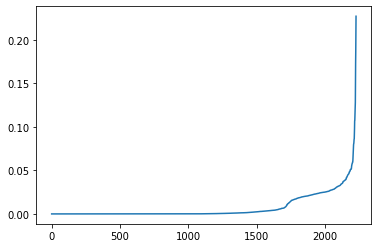

In [17]:
plt.plot(range(len(rcvs)), sorted(rcvs))

In [170]:
rcvs=np.array( ['0.0004339', '0.0000141', '0.0000098', '0.0000089', '0.0000088', '0.0000100', '0.0370653', '0.0000833', '0.0003688', '0.0235641', '0.0000760', '0.0000689', '0.0000109', '0.0011129', '0.0000241', '0.0017951', '0.0021348', '0.0250540', '0.0196888', '0.0000160', '0.0000121', '0.0000100', '0.0000102', '0.0000779', '0.0000679', '0.0014619', '0.0241341', '0.0000169', '0.0000141', '0.0269980', '0.0000172', '0.0000141', '0.0000129', '0.0000129', '0.0002850', '0.0059311', '0.0162120', '0.0000141', '0.0039129', '0.0257363', '0.0000158', '0.0000131', '0.0000181', '0.0000157', '0.0000141', '0.0000150', '0.0009103', '0.0012166', '0.0272760', '0.0000169', '0.0036509', '0.0023172', '0.0029540', '0.0147331', '0.0000160', '0.0000141', '0.0000119', '0.0278132', '0.0000151', '0.0000110', '0.0000110', '0.0000160', '0.0013981', '0.0062232', '0.0198522', '0.0000148', '0.0000109', '0.0000100', '0.0047397', '0.0021069', '0.0238829', '0.0000248', '0.0000191', '0.0000162', '0.0000148', '0.0025453', '0.0052369', '0.0169561', '0.0000200', '0.0000141', '0.0012243', '0.0050718', '0.0158809', '0.0000170', '0.0023680', '0.0007649', '0.0058150', '0.0201373', '0.0000159', '0.0000127', '0.0000129', '0.0000131', '0.0053899', '0.0049970', '0.0160620', '0.0000140', '0.0000112', '0.0000150', '0.0049939', '0.0040092', '0.0149469', '0.0000169', '0.0039830', '0.0003650', '0.0265238', '0.0000170', '0.0000172', '0.0000128', '0.0000131', '0.0000119', '0.0048642', '0.0190180', '0.0000163', '0.0011122', '0.0058089', '0.0213449', '0.0000210', '0.0000152', '0.0000160', '0.0010231', '0.0027161', '0.0006981', '0.0214777', '0.0000169', '0.0061820', '0.0000179', '0.0002201', '0.0014240', '0.0219042', '0.0000160', '0.0000140', '0.0029152', '0.0035170', '0.0027060', '0.0001492', '0.0214033', '0.0000169', '0.0000141', '0.0000119', '0.0084919', '0.0127251', '0.0000288', '0.0000150', '0.0000190', '0.0000188', '0.0097129', '0.0233541', '0.0000150', '0.0000188', '0.0000110', '0.0000101', '0.0000131', '0.0025270', '0.0066680', '0.0000157', '0.0019803', '0.0189991', '0.0000169', '0.0070210', '0.0010502', '0.0196810', '0.0000209', '0.0000150', '0.0000100', '0.0000100', '0.0000100', '0.0087149', '0.0245779', '0.0000140', '0.0000141', '0.0000100', '0.0000110', '0.0047512', '0.0015748', '0.0143409', '0.0000172', '0.0001509', '0.0033307', '0.0051591', '0.0128801', '0.0000169', '0.0064900', '0.0218539', '0.0000219', '0.0000122', '0.0000110', '0.0000109', '0.0000079', '0.0000093', '0.0027721', '0.0191150', '0.0078201', '0.0000181', '0.0195360', '0.0000141', '0.0000151', '0.0000138', '0.0000167', '0.0000157', '0.0000148', '0.0065520', '0.0219190', '0.0000153', '0.0000109', '0.0028641', '0.0012582', '0.0028937', '0.0154080', '0.0000160', '0.0000140', '0.0072691', '0.0018301', '0.0184920', '0.0000169', '0.0000129', '0.0000129', '0.0282550', '0.0000169', '0.0000193', '0.0000131', '0.0000120', '0.0008371', '0.0036070', '0.0028250', '0.0170140', '0.0000198', '0.0000141', '0.0014047', '0.0024798', '0.0002671', '0.0359219', '0.0000150', '0.0000147', '0.0000112', '0.0000129', '0.0000138', '0.0000119', '0.0035982', '0.0162251', '0.0009541', '0.0042240', '0.0016729', '0.0003710', '0.0005300', '0.0012453', '0.0229004', '0.0000212', '0.0000148', '0.0000129', '0.0045951', '0.0033689', '0.0008080', '0.0001209', '0.0103402', '0.0082650', '0.0015491', '0.0000272', '0.0000151', '0.0000132', '0.0000131', '0.0000172', '0.0000188', '0.0000117', '0.0047613', '0.0136082', '0.0264298', '0.0000181', '0.0000162', '0.0000110', '0.0000103', '0.0000138', '0.0017049', '0.0058420', '0.0002682', '0.0260749', '0.0000150', '0.0000112', '0.0000100', '0.0026779', '0.0029261', '0.0018408', '0.0173700', '0.0000157', '0.0016380', '0.0011201', '0.0000150', '0.0024781', '0.0000182', '0.0086601', '0.0048232', '0.0295569', '0.0000150', '0.0000110', '0.0000157', '0.0000100', '0.0000162', '0.0000128', '0.0000128', '0.0072029', '0.0197141', '0.0000169', '0.0015922', '0.0005900', '0.0015218', '0.0000504', '0.0186439', '0.0000160', '0.0000153', '0.0000241', '0.0033510', '0.0050370', '0.0148120', '0.0000178', '0.0000131', '0.0005476', '0.0068240', '0.0216450', '0.0000150', '0.0000138', '0.0000131', '0.0000126', '0.0000119', '0.0000131', '0.0028491', '0.0013843', '0.0143681', '0.0315740', '0.0000151', '0.0000109', '0.0000100', '0.0000141', '0.0000219', '0.0000151', '0.0000160', '0.0008909', '0.0204203', '0.0048480', '0.0015330', '0.0015502', '0.0003920', '0.0014309', '0.0070069', '0.0023640', '0.0333293', '0.0000229', '0.0000141', '0.0000143', '0.0000140', '0.0000131', '0.0000119', '0.0000122', '0.0000169', '0.0249672', '0.0000191', '0.0007539', '0.0053468', '0.0001900', '0.0013041', '0.0175140', '0.0000171', '0.0000150', '0.0000139', '0.0000151', '0.0014122', '0.0043898', '0.0222299', '0.0000310', '0.0000138', '0.0000131', '0.0000131', '0.0000131', '0.0015170', '0.0043919', '0.0190878', '0.0000151', '0.0000119', '0.0000112', '0.0000172', '0.0000129', '0.0002234', '0.0070570', '0.0010299', '0.0003497', '0.0155661', '0.0000158', '0.0000131', '0.0000198', '0.0026319', '0.0063880', '0.0224099', '0.0000181', '0.0000128', '0.0000113', '0.0000153', '0.0000100', '0.0000100', '0.0000122', '0.0068140', '0.0182452', '0.0000140', '0.0000200', '0.0000141', '0.0000131', '0.0000128', '0.0044169', '0.0033352', '0.0156973', '0.0000210', '0.0000138', '0.0000131', '0.0006887', '0.0001691', '0.0014732', '0.0052431', '0.0050123', '0.0166540', '0.0000171', '0.0000138', '0.0000162', '0.0000189', '0.0000131', '0.0000172', '0.0051761', '0.0037408', '0.0180118', '0.0000157', '0.0000131', '0.0000128', '0.0000191', '0.0000253', '0.0001202', '0.0217478', '0.0000169', '0.0000148', '0.0000157', '0.0000181', '0.0000131', '0.0002580', '0.0235579', '0.0000159', '0.0000281', '0.0000138', '0.0000171', '0.0000131', '0.0000148', '0.0002809', '0.0043640', '0.0217371', '0.0000143', '0.0000159', '0.0000141', '0.0000107', '0.0000100', '0.0000100', '0.0000140', '0.0038700', '0.0200448', '0.0000139', '0.0000153', '0.0000141', '0.0000120', '0.0000129', '0.0008009', '0.0000270', '0.0017588', '0.0024073', '0.0072040', '0.0031953', '0.0048230', '0.0030007', '0.0011489', '0.0058902', '0.0325482', '0.0000150', '0.0000110', '0.0000141', '0.0000101', '0.0000293', '0.0000141', '0.0000141', '0.0000131', '0.0307572', '0.0000221', '0.0000139', '0.0000170', '0.0000170', '0.0000122', '0.0000119', '0.0000131', '0.0015581', '0.0055123', '0.0173593', '0.0000160', '0.0000157', '0.0000119', '0.0000119', '0.0000119', '0.0040450', '0.0000201', '0.0020020', '0.0178101', '0.0000160', '0.0000260', '0.0000122', '0.0000131', '0.0000179', '0.0020280', '0.0011051', '0.0233300', '0.0000158', '0.0000160', '0.0000131', '0.0000181', '0.0000193', '0.0000160', '0.0009122', '0.0013802', '0.0306409', '0.0000163', '0.0000210', '0.0000131', '0.0000141', '0.0000132', '0.0000141', '0.0016001', '0.0182998', '0.0000222', '0.0000151', '0.0000131', '0.0000119', '0.0022640', '0.0010479', '0.0088649', '0.0025313', '0.0006299', '0.0000388', '0.0000119', '0.0000112', '0.0000110', '0.0000128', '0.0000178', '0.0082262', '0.0007971', '0.0171302', '0.0000169', '0.0000181', '0.0000140', '0.0010838', '0.0012531', '0.0059330', '0.0005960', '0.0161280', '0.0000162', '0.0000131', '0.0000157', '0.0000129', '0.0000131', '0.0048480', '0.0204039', '0.0000162', '0.0000131', '0.0000191', '0.0000117', '0.0000131', '0.0000129', '0.0000241', '0.0029681', '0.0051818', '0.0178843', '0.0000172', '0.0000150', '0.0000131', '0.0000119', '0.0000122', '0.0000119', '0.0000162', '0.0055661', '0.0001969', '0.0192158', '0.0000162', '0.0000131', '0.0000119', '0.0000193', '0.0000120', '0.0000119', '0.0033850', '0.0003772', '0.0169460', '0.0000179', '0.0000181', '0.0000131', '0.0000131', '0.0009300', '0.0007558', '0.0028570', '0.0031800', '0.0000179', '0.0031919', '0.0064970', '0.0006230', '0.0014952', '0.0348460', '0.0000157', '0.0000181', '0.0000139', '0.0000140', '0.0000131', '0.0000171', '0.0000198', '0.0000138', '0.0048830', '0.0012171', '0.0134442', '0.0000160', '0.0000122', '0.0000128', '0.0000131', '0.0016840', '0.0036070', '0.0021169', '0.0276041', '0.0000150', '0.0000121', '0.0000101', '0.0000181', '0.0000141', '0.0000119', '0.0000119', '0.0056939', '0.0000179', '0.0036068', '0.0063832', '0.0000110', '0.0144928', '0.0000162', '0.0000131', '0.0000121', '0.0000119', '0.0018322', '0.0036320', '0.0025790', '0.0010598', '0.0200801', '0.0000170', '0.0000110', '0.0000200', '0.0000129', '0.0000129', '0.0000551', '0.0019698', '0.0047481', '0.0003992', '0.0123591', '0.0000141', '0.0000121', '0.0000098', '0.0005863', '0.0055790', '0.0465819', '0.0000259', '0.0000139', '0.0000132', '0.0000122', '0.0000120', '0.0000126', '0.0063979', '0.0045220', '0.0000332', '0.0000153', '0.0000129', '0.0000689', '0.0055440', '0.0026507', '0.0269020', '0.0000150', '0.0000119', '0.0000150', '0.0000141', '0.0000122', '0.0000119', '0.0000171', '0.0000119', '0.0056970', '0.0189271', '0.0000160', '0.0000131', '0.0000121', '0.0000179', '0.0000116', '0.0000121', '0.0003531', '0.0027029', '0.0221310', '0.0000147', '0.0000181', '0.0000098', '0.0000138', '0.0000141', '0.0000128', '0.0000129', '0.0001652', '0.0053540', '0.0005769', '0.0016651', '0.0192561', '0.0000143', '0.0000108', '0.0000129', '0.0000169', '0.0000122', '0.0000119', '0.0000109', '0.0027290', '0.0016079', '0.0044632', '0.0221520', '0.0000170', '0.0000132', '0.0000258', '0.0000131', '0.0000119', '0.0000129', '0.0002360', '0.0030880', '0.0030830', '0.0153229', '0.0000148', '0.0000120', '0.0000109', '0.0000132', '0.0000100', '0.0000141', '0.0046053', '0.0007519', '0.0273562', '0.0000138', '0.0000100', '0.0000119', '0.0000141', '0.0000131', '0.0000119', '0.0000110', '0.0000119', '0.0010209', '0.0233259', '0.0000169', '0.0000138', '0.0000120', '0.0033591', '0.0023687', '0.0010412', '0.0235650', '0.0000169', '0.0000131', '0.0000131', '0.0000131', '0.0000129', '0.0041892', '0.0015990', '0.0019097', '0.0386529', '0.0000179', '0.0000110', '0.0000238', '0.0067901', '0.0201180', '0.0000171', '0.0000138', '0.0000209', '0.0000157', '0.0000131', '0.0005703', '0.0073869', '0.0224121', '0.0000140', '0.0000141', '0.0000112', '0.0000131', '0.0000141', '0.0023842', '0.0036950', '0.0202482', '0.0000169', '0.0000131', '0.0000131', '0.0000128', '0.0040861', '0.0037771', '0.0162639', '0.0000159', '0.0000150', '0.0000110', '0.0000112', '0.0000100', '0.0000680', '0.0063129', '0.0181367', '0.0000169', '0.0000138', '0.0000210', '0.0000148', '0.0029990', '0.0006712', '0.0022111', '0.0203719', '0.0000153', '0.0000152', '0.0000138', '0.0000119', '0.0076370', '0.0003891', '0.0010478', '0.0160429', '0.0000169', '0.0000150', '0.0000127', '0.0038500', '0.0020590', '0.0008798', '0.0194542', '0.0000157', '0.0000148', '0.0000131', '0.0000258', '0.0011170', '0.0234280', '0.0000171', '0.0000159', '0.0000210', '0.0000119', '0.0049491', '0.0026460', '0.0217931', '0.0000181', '0.0000152', '0.0000189', '0.0000131', '0.0055659', '0.0006671', '0.0219293', '0.0000102', '0.0000081', '0.0000132', '0.0006359', '0.0080127', '0.0143242', '0.0000129', '0.0000140', '0.0000128', '0.0013960', '0.0210750', '0.0000131', '0.0000079', '0.0000069', '0.0025921', '0.0048988', '0.0264040', '0.0000193', '0.0000129', '0.0000131', '0.0000122', '0.0000119', '0.0018649', '0.0003781', '0.0081382', '0.0031939', '0.0000420', '0.0158951', '0.0000160', '0.0000129', '0.0000119', '0.0000279', '0.0079890', '0.0168061', '0.0019608', '0.0032887', '0.0234239', '0.0000140', '0.0000110', '0.0000103', '0.0000098', '0.0000138', '0.0000158', '0.0022149', '0.0270419', '0.0000138', '0.0000109', '0.0000109', '0.0034130', '0.0000172', '0.0037629', '0.0006721', '0.0125332', '0.0322111', '0.0000171', '0.0000319', '0.0000157', '0.0000141', '0.0000131', '0.0000126', '0.0000150', '0.0317218', '0.0000200', '0.0073760', '0.0000188', '0.0015481', '0.0173390', '0.0000157', '0.0000138', '0.0000147', '0.0000131', '0.0054471', '0.0031118', '0.0010507', '0.0000241', '0.0000153', '0.0000122', '0.0079441', '0.0007832', '0.0157521', '0.0000159', '0.0000131', '0.0098560', '0.0181392', '0.0000159', '0.0000138', '0.0000181', '0.0044372', '0.0000152', '0.0239251', '0.0000138', '0.0000097', '0.0000167', '0.0000138', '0.0025558', '0.0001648', '0.0005811', '0.0277161', '0.0000181', '0.0009820', '0.0001140', '0.0032100', '0.0152843', '0.0000159', '0.0000131', '0.0011801', '0.0000148', '0.0209463', '0.0000158', '0.0000140', '0.0000131', '0.0021979', '0.0132580', '0.0000169', '0.0036530', '0.0081429', '0.0055580', '0.0221179', '0.0000159', '0.0000079', '0.0000069', '0.0000057', '0.0000091', '0.0031040', '0.0008521', '0.0035520', '0.0250859', '0.0012651', '0.0000751', '0.0156610', '0.0000131', '0.0000140', '0.0000141', '0.0000122', '0.0000139', '0.0281499', '0.0000171', '0.0000127', '0.0000153', '0.0000119', '0.0031790', '0.0224991', '0.0000143', '0.0000148', '0.0008829', '0.0054739', '0.0024011', '0.0146761', '0.0000179', '0.0000188', '0.0020493', '0.0010891', '0.0029800', '0.0260369', '0.0000179', '0.0000119', '0.0000100', '0.0000100', '0.0000100', '0.0000117', '0.0014608', '0.0049451', '0.0161312', '0.0017641', '0.0009890', '0.0007560', '0.0210109', '0.0000152', '0.0000150', '0.0000131', '0.0016229', '0.0050671', '0.0005150', '0.0005253', '0.0184670', '0.0000162', '0.0056470', '0.0000181', '0.0012452', '0.0209549', '0.0000181', '0.0000210', '0.0000132', '0.0000119', '0.0029199', '0.0015669', '0.0013111', '0.0027810', '0.0132981', '0.0018680', '0.0038888', '0.0267830', '0.0000171', '0.0000131', '0.0000119', '0.0000190', '0.0000150', '0.0000110', '0.0031221', '0.0180540', '0.0016698', '0.0006189', '0.0020179', '0.0194092', '0.0000157', '0.0000129', '0.0000126', '0.0007760', '0.0038719', '0.0007450', '0.0016568', '0.0209041', '0.0000272', '0.0006101', '0.0054531', '0.0000150', '0.0072052', '0.0000181', '0.0136859', '0.0000160', '0.0000911', '0.0078871', '0.0014763', '0.0153139', '0.0000160', '0.0000129', '0.0000131', '0.0040832', '0.0043998', '0.0180690', '0.0000160', '0.0000121', '0.0000100', '0.0017368', '0.0032652', '0.0005470', '0.0178168', '0.0000162', '0.0000129', '0.0065930', '0.0003710', '0.0222731', '0.0000153', '0.0000190', '0.0000131', '0.0000128', '0.0000140', '0.0011682', '0.0061350', '0.0172570', '0.0000169', '0.0069251', '0.0003479', '0.0226200', '0.0000157', '0.0000122', '0.0000100', '0.0000139', '0.0007150', '0.0249832', '0.0000157', '0.0000129', '0.0000129', '0.0000129', '0.0031200', '0.0002401', '0.0016181', '0.0216729', '0.0000170', '0.0000141', '0.0001390', '0.0014610', '0.0024731', '0.0013797', '0.0001507', '0.0191758', '0.0000172', '0.0000129', '0.0000129', '0.0014357', '0.0017650', '0.0014238', '0.0087449', '0.0011272', '0.0069823', '0.0317562', '0.0000141', '0.0000110', '0.0000109', '0.0000100', '0.0000098', '0.0000102', '0.0000143', '0.0000138', '0.0294028', '0.0000170', '0.0002639', '0.0043111', '0.0023113', '0.0229451', '0.0000160', '0.0000129', '0.0000131', '0.0000131', '0.0000119', '0.0005641', '0.0021460', '0.0045340', '0.0200031', '0.0000160', '0.0000141', '0.0000110', '0.0008831', '0.0051780', '0.0224509', '0.0000162', '0.0000128', '0.0000138', '0.0000131', '0.0000131', '0.0015700', '0.0010760', '0.0180810', '0.0000162', '0.0009181', '0.0075038', '0.0006909', '0.0228099', '0.0000159', '0.0000171', '0.0000131', '0.0000128', '0.0000120', '0.0000120', '0.0054760', '0.0036547', '0.0201201', '0.0000140', '0.0000179', '0.0000112', '0.0091419', '0.0014119', '0.0000200', '0.0018440', '0.0005257', '0.0161031', '0.0000141', '0.0000109', '0.0000140', '0.0016939', '0.0013890', '0.0016820', '0.0177271', '0.0000172', '0.0000131', '0.0000117', '0.0044470', '0.0008449', '0.0039429', '0.0000159', '0.0004790', '0.0000210', '0.0000141', '0.0011108', '0.0017109', '0.0047350', '0.0173590', '0.0000189', '0.0000141', '0.0000171', '0.0000120', '0.0000139', '0.0029418', '0.0001671', '0.0022941', '0.0200339', '0.0000160', '0.0000140', '0.0000131', '0.0000147', '0.0016038', '0.0031900', '0.0012200', '0.0015331', '0.0199840', '0.0000169', '0.0000131', '0.0000131', '0.0000150', '0.0042629', '0.0057988', '0.0000126', '0.0000152', '0.0013940', '0.0211521', '0.0000150', '0.0000148', '0.0000129', '0.0000138', '0.0000119', '0.0006971', '0.0005462', '0.0060840', '0.0118899', '0.0000160', '0.0014298', '0.0019119', '0.0005241', '0.0236442', '0.0000179', '0.0000141', '0.0000132', '0.0000131', '0.0000129', '0.0000121', '0.0001420', '0.0032849', '0.0178659', '0.0000160', '0.0000138', '0.0000131', '0.0029340', '0.0009830', '0.0013759', '0.0027950', '0.0191162', '0.0000150', '0.0000128', '0.0000128', '0.0000131', '0.0000329', '0.0000110', '0.0000178', '0.0026080', '0.0182678', '0.0000162', '0.0000131', '0.0000162', '0.0026791', '0.0000780', '0.0030041', '0.0032971', '0.0194991', '0.0000169', '0.0000139', '0.0000127', '0.0000119', '0.0000131', '0.0000129', '0.0029779', '0.0213210', '0.0000171', '0.0000157', '0.0000127', '0.0000119', '0.0000119', '0.0002720', '0.0036149', '0.0061021', '0.0161291', '0.0000138', '0.0000110', '0.0000110', '0.0000100', '0.0000231', '0.0000138', '0.0021331', '0.0211451', '0.0000170', '0.0000140', '0.0000129', '0.0000138', '0.0015648', '0.0034430', '0.0011790', '0.0004480', '0.0224819', '0.0000141', '0.0000109', '0.0000109', '0.0000098', '0.0000098', '0.0000138', '0.0000160', '0.0003237', '0.0058629', '0.0000450', '0.0203431', '0.0000159', '0.0000132', '0.0000129', '0.0000131', '0.0000132', '0.0025342', '0.0009310', '0.0005844', '0.1250601', '0.0000179', '0.0000119', '0.0000160', '0.0000110', '0.0000109', '0.0000112', '0.0000112', '0.0072432', '0.0270212', '0.0000160', '0.0000148', '0.0000141', '0.0000131', '0.0000126', '0.0000122', '0.0000121', '0.0000129', '0.0084917', '0.0203691', '0.0000110', '0.0000071', '0.0000069', '0.0000069', '0.0000071', '0.0000078', '0.0005451', '0.0051761', '0.0032622', '0.0428130', '0.0000198', '0.0000110', '0.0000191', '0.0000110', '0.0000131', '0.0000141', '0.0312209', '0.0000228', '0.0000148', '0.0051551', '0.0015240', '0.0018780', '0.0282250', '0.0000179', '0.0000129', '0.0000120', '0.0000140', '0.0000148', '0.0020678', '0.0020190', '0.0312769', '0.0000162', '0.0000141', '0.0000132', '0.0000129', '0.0000121', '0.0000122', '0.0056470', '0.0030257', '0.0022061', '0.0212071', '0.0000159', '0.0000138', '0.0000231', '0.0000131', '0.0000131', '0.0038359', '0.0023639', '0.0227909', '0.0000148', '0.0000122', '0.0000100', '0.0000131', '0.0000132', '0.0000129', '0.0000131', '0.0024438', '0.0266859', '0.0000200', '0.0000141', '0.0000128', '0.0000131', '0.0000122', '0.0033331', '0.0035692', '0.0239301', '0.0000160', '0.0000162', '0.0000129', '0.0000126', '0.0000131', '0.0000138', '0.0015889', '0.0011477', '0.0265980', '0.0000210', '0.0000141', '0.0000129', '0.0000119', '0.0000141', '0.0012491', '0.0007048', '0.0036189', '0.0028288', '0.0227399', '0.0000140', '0.0000148', '0.0000138', '0.0000131', '0.0000162', '0.0003698', '0.0023708', '0.0060279', '0.0003040', '0.0119240', '0.0000150', '0.0003979', '0.0026419', '0.0031571', '0.0280640', '0.0000139', '0.0000138', '0.0000141', '0.0000131', '0.0000121', '0.0000110', '0.0002370', '0.0055440', '0.0000172', '0.0214257', '0.0000151', '0.0000141', '0.0000131', '0.0000119', '0.0000122', '0.0011578', '0.0051411', '0.0230222', '0.0000150', '0.0000132', '0.0000131', '0.0000129', '0.0012481', '0.0057738', '0.0275340', '0.0000126', '0.0000153', '0.0000141', '0.0000120', '0.0000129', '0.0000150', '0.0000132', '0.0054541', '0.0176470', '0.0000167', '0.0000131', '0.0000121', '0.0000119', '0.0011980', '0.0020790', '0.0271270', '0.0000181', '0.0000109', '0.0000141', '0.0000141', '0.0000129', '0.0000119', '0.0000117', '0.0033419', '0.0001149', '0.0294237', '0.0000321', '0.0000141', '0.0000131', '0.0000119', '0.0000122', '0.0070079', '0.0000189', '0.0000141', '0.0031950', '0.0241633', '0.0000158', '0.0000110', '0.0000110', '0.0000100', '0.0000148', '0.0025241', '0.0063050', '0.0242191', '0.0000151', '0.0000200', '0.0000109', '0.0000169', '0.0000140', '0.0000131', '0.0047152', '0.0507920', '0.0000163', '0.0000110', '0.0000112', '0.0000140', '0.0000129', '0.0000131', '0.0000128', '0.0000131', '0.0060392', '0.0026329', '0.0102918', '0.0000182', '0.0000129', '0.0000119', '0.0011020', '0.0016790', '0.0043109', '0.0000188', '0.0012910', '0.0084440', '0.0000167', '0.0009522', '0.0036650', '0.0042281', '0.0156129', '0.0000198', '0.0000131', '0.0000131', '0.0000119', '0.0012398', '0.0212732', '0.0000219', '0.0000150', '0.0000110', '0.0000102', '0.0000100', '0.0000122', '0.0015080', '0.0020919', '0.0006718', '0.0214610', '0.0000181', '0.0000140', '0.0063351', '0.0004201', '0.0487909', '0.0000420', '0.0000220', '0.0000148', '0.0000148', '0.0000150', '0.0000119', '0.0000121', '0.0022750', '0.0056138', '0.0233221', '0.0000148', '0.0000220', '0.0000150', '0.0030628', '0.0007002', '0.0017519', '0.0358517', '0.0000179', '0.0000160', '0.0000129', '0.0000360', '0.0047300', '0.0023730', '0.0038171', '0.0007219', '0.0335741', '0.0000153', '0.0000112', '0.0000109', '0.0000100', '0.0000098', '0.0000131', '0.0000131', '0.0000117', '0.0055759', '0.0205930', '0.0000160', '0.0000131', '0.0000250', '0.0000139', '0.0014720', '0.0049269', '0.0228522', '0.0000262', '0.0000138', '0.0000141', '0.0000131', '0.0043611', '0.0004820', '0.0010481', '0.0174439', '0.0000191', '0.0000141', '0.0085132', '0.0006139', '0.0208130', '0.0000202', '0.0000143', '0.0000182', '0.0000131', '0.0000140', '0.0079758', '0.0126040', '0.0000159', '0.0000140', '0.0089941', '0.0206928', '0.0000159', '0.0000129', '0.0000131', '0.0000132', '0.0035389', '0.0263229', '0.0000150', '0.0000110', '0.0000250', '0.0000140', '0.0000129', '0.0094490', '0.0000179', '0.0032601', '0.0164409', '0.0000160', '0.0038698', '0.0255740', '0.0000179', '0.0000110', '0.0000100', '0.0000140', '0.0000141', '0.0006978', '0.0026460', '0.0222849', '0.0000171', '0.0000141', '0.0048828', '0.0021429', '0.0007448', '0.0189688', '0.0000190', '0.0000122', '0.0000128', '0.0023999', '0.0007269', '0.0022857', '0.0020542', '0.0156413', '0.0000250', '0.0287399', '0.0000310', '0.0000131', '0.0000131', '0.0000131', '0.0000122', '0.0000119', '0.0000110', '0.0019018', '0.0286238', '0.0000141', '0.0000279', '0.0006080', '0.0070739', '0.0000157', '0.0014162', '0.0018361', '0.0165930', '0.0000172', '0.0000138', '0.0060689', '0.0031669', '0.0181851', '0.0000169', '0.0000152', '0.0000151', '0.0000141', '0.0046621', '0.0037100', '0.0206079', '0.0000141', '0.0000248', '0.0000140', '0.0016589', '0.0023860', '0.0028150', '0.0149219', '0.0000162', '0.0089770', '0.0186200', '0.0000141', '0.0000110', '0.0000110', '0.0000100', '0.0000138', '0.0082760', '0.0208111', '0.0000159', '0.0000128', '0.0021041', '0.0001330', '0.0233018', '0.0000179', '0.0000131', '0.0000129', '0.0000131', '0.0061247', '0.0226949', '0.0000109', '0.0000119', '0.0000141', '0.0000131', '0.0000178', '0.0019479', '0.0177481', '0.0045500', '0.0072372', '0.0004091', '0.0172431', '0.0000131', '0.0000110', '0.0000103', '0.0000110', '0.0039549', '0.0236669', '0.0000141', '0.0000109', '0.0000162', '0.0000131', '0.0018420', '0.0028210', '0.0247018', '0.0000170', '0.0000119', '0.0000110', '0.0011167', '0.0018282', '0.0000140', '0.0244820', '0.0000181', '0.0000163', '0.0000131', '0.0012412', '0.0010050', '0.0035998', '0.0008457', '0.0212230', '0.0000179', '0.0000140', '0.0000150', '0.0034587', '0.0010870', '0.0064148', '0.0027561', '0.0171301', '0.0000160', '0.0000138', '0.0000129', '0.0030689', '0.0021722', '0.0182610', '0.0000162', '0.0000141', '0.0000132', '0.0014410', '0.0058940', '0.0192333', '0.0000141', '0.0000150', '0.0000131', '0.0057252', '0.0223810', '0.0000170', '0.0000140', '0.0000129', '0.0000160', '0.0000122', '0.0019810', '0.0053041', '0.0167639', '0.0000150', '0.0008020', '0.0022280', '0.0033042', '0.0005262', '0.0208512', '0.0000179', '0.0000148', '0.0007088', '0.0040269', '0.0000179', '0.0007539', '0.0054810', '0.0227268', '0.0000169', '0.0000109', '0.0000110', '0.0029649', '0.0030548', '0.0015681', '0.0132642', '0.0000172', '0.0016630', '0.0009839', '0.0020668', '0.0166829', '0.0000160', '0.0000200', '0.0000141', '0.0020280', '0.0278442', '0.0000178', '0.0000141', '0.0000128', '0.0000119', '0.0000128', '0.0021291', '0.0026302', '0.0201642', '0.0000203', '0.0000140', '0.0000131', '0.0077350', '0.0000159', '0.0176292', '0.0000160', '0.0000128', '0.0000128', '0.0014760', '0.0036318', '0.0269940', '0.0000141', '0.0000109', '0.0000143', '0.0000110', '0.0000097', '0.0000141', '0.0043850', '0.0194812', '0.0000288', '0.0000141', '0.0028469', '0.0005152', '0.0007920', '0.0027279', '0.0001120', '0.0249459', '0.0000162', '0.0000131', '0.0000128', '0.0000129', '0.0000126', '0.0001581', '0.0009048', '0.0280300', '0.0000201', '0.0000141', '0.0020680', '0.0241020', '0.0000150', '0.0000109', '0.0000109', '0.0000132', '0.0000129', '0.0020099', '0.0036490', '0.0156131', '0.0000189', '0.0000131', '0.0034461', '0.0034621', '0.0003221', '0.0017521', '0.0227680', '0.0000141', '0.0000110', '0.0000100', '0.0000100', '0.0000141', '0.0000141', '0.0050130', '0.0025099', '0.0172958', '0.0000188', '0.0000129', '0.0000131', '0.0045969', '0.0000162', '0.0022621', '0.0201430', '0.0000160', '0.0000141', '0.0000131', '0.0033043', '0.0013719', '0.0011830', '0.0204551', '0.0000171', '0.0000141', '0.0000126', '0.0000129', '0.0045211', '0.0032740', '0.0152509', '0.0000172', '0.0000110', '0.0000109', '0.0009320', '0.0046690', '0.0012960', '0.0202229', '0.0000170', '0.0000140', '0.0000129', '0.0000140', '0.0005357', '0.0002070', '0.0107310', '0.0000172', '0.0004222', '0.0133760', '0.0000148', '0.0000131', '0.0034409', '0.0007723', '0.0038960', '0.0236759', '0.0000151', '0.0000110', '0.0000117', '0.0000169', '0.0001101', '0.0019450', '0.0034201', '0.0189400', '0.0000139', '0.0000138', '0.0000110', '0.0000100', '0.0000101', '0.0051058', '0.0024969', '0.0013130', '0.0113564', '0.0000160', '0.0000131', '0.0000127', '0.0083852', '0.0190200', '0.0000131', '0.0000138', '0.0000141', '0.0000129', '0.0000131', '0.0023420', '0.0032204', '0.0219043', '0.0000191', '0.0000140', '0.0000131', '0.0000122', '0.0000119', '0.0000129', '0.0008499', '0.0013151', '0.0054629', '0.0034289', '0.0064089', '0.0034051', '0.0263660', '0.0000179', '0.0000140', '0.0000127', '0.0000131', '0.0000131', '0.0000129', '0.0000132', '0.0050123', '0.0186138', '0.0000162', '0.0000128', '0.0000126', '0.0000122', '0.0000132', '0.0004539', '0.0061819', '0.0016301', '0.0260107', '0.0000219', '0.0000119', '0.0000119', '0.0000110', '0.0000129', '0.0004730', '0.0063491', '0.0161731', '0.0000220', '0.0000140', '0.0000129', '0.0000126', '0.0000121', '0.0059840', '0.0000148', '0.0050910', '0.0163031', '0.0000158', '0.0000159', '0.0000131', '0.0068659', '0.0003931', '0.0221570', '0.0000160', '0.0000141', '0.0000120', '0.0000140', '0.0000119', '0.0000121', '0.0051238', '0.0020489', '0.0177801', '0.0000167', '0.0000140', '0.0000163', '0.0021739', '0.0015878', '0.0000170', '0.0257659', '0.0000219', '0.0000179', '0.0000119', '0.0000122', '0.0000100', '0.0000112', '0.0000141', '0.0000128', '0.0028698', '0.0198867', '0.0000172', '0.0000151', '0.0000131', '0.0000098', '0.0000121', '0.0112810', '0.0157461', '0.0000141', '0.0000110', '0.0000110', '0.0000100', '0.0000100', '0.0000140', '0.0000128', '0.0262012', '0.0000148', '0.0000119', '0.0000110', '0.0000100', '0.0013700', '0.0007081', '0.0236630', '0.0000289', '0.0000138', '0.0000128', '0.0000121', '0.0002780', '0.0002959', '0.0001950', '0.0250480', '0.0000210', '0.0000141', '0.0000121', '0.0000122', '0.0000126', '0.0037652', '0.0006399', '0.0199649', '0.0000200', '0.0000131', '0.0000129', '0.0000119', '0.0000121', '0.0052450', '0.0004418', '0.0033209', '0.0188992', '0.0000138', '0.0000110', '0.0000110', '0.0000138', '0.0000151', '0.0000253', '0.0067689', '0.0150130', '0.0000150', '0.0000141', '0.0000131', '0.0000131', '0.0016110', '0.0043070', '0.0032501', '0.0206661', '0.0000151', '0.0000110', '0.0000100', '0.0000101', '0.0000100', '0.0000150', '0.0046391', '0.0004751', '0.0183812', '0.0000169', '0.0000172', '0.0000131', '0.0000119', '0.0030990', '0.0023200', '0.0000479', '0.0086829', '0.0209392', '0.0000150', '0.0000110', '0.0000100', '0.0000141', '0.0000210', '0.0000132', '0.0000120', '0.0187231', '0.0000141', '0.0000110', '0.0000100', '0.0000140', '0.0000140', '0.0017490', '0.0063102', '0.0156200', '0.0000179', '0.0000139', '0.0000127', '0.0003452', '0.0019414', '0.0052268', '0.0004132', '0.0173590', '0.0000167', '0.0000113', '0.0000151', '0.0000132', '0.0000120', '0.0067510', '0.0002940', '0.0015740', '0.0143092', '0.0000159', '0.0000160', '0.0000141', '0.0000160', '0.0058460', '0.0022841', '0.0190113', '0.0000191', '0.0000150', '0.0000129', '0.0000131', '0.0000120', '0.0000131', '0.0030649', '0.0043290', '0.0136909', '0.0000162', '0.0000131', '0.0000131', '0.0000131', '0.0000148', '0.0032539', '0.0046520', '0.0002167', '0.0222149', '0.0000162', '0.0000131', '0.0000128', '0.0000129', '0.0000122', '0.0000119', '0.0003798', '0.0051060', '0.0004818', '0.0215049', '0.0000153', '0.0000110', '0.0000100', '0.0000122', '0.0000103', '0.0000141', '0.0026848', '0.0044579', '0.0157301', '0.0000158', '0.0000131', '0.0000131', '0.0000131', '0.0000120', '0.0007429', '0.0049973', '0.0009949', '0.0003168', '0.0184789', '0.0000170', '0.0000132', '0.0000131', '0.0000122', '0.0000122', '0.0021472', '0.0035569', '0.0224362', '0.0000159', '0.0000139', '0.0000129', '0.0000170', '0.0000126', '0.0000148', '0.0001290', '0.0032010', '0.0030899', '0.0188358', '0.0000159', '0.0000141', '0.0000131', '0.0000131', '0.0000150', '0.0050180', '0.0011030', '0.0026980', '0.0195075', '0.0000131', '0.0000141', '0.0000119', '0.0000131', '0.0000139', '0.0000120', '0.0015641', '0.0025690', '0.0078852', '0.0000193', '0.0015549', '0.0044138', '0.0209079', '0.0000169', '0.0000129', '0.0000119', '0.0000291', '0.0000172', '0.0014208', '0.0071781', '0.0000110', '0.0046363', '0.0163987', '0.0000160', '0.0000138', '0.0000258', '0.0029137', '0.0011599', '0.0037859', '0.0243259', '0.0000172', '0.0000141', '0.0000120', '0.0000110', '0.0000100', '0.0000119', '0.0064170', '0.0000162', '0.0061610', '0.0107069', '0.0000139', '0.0000172', '0.0000140', '0.0000141', '0.0062020', '0.0011561', '0.0188809', '0.0000171', '0.0000191', '0.0000127', '0.0000119', '0.0000140', '0.0041270', '0.0035000', '0.0135408', '0.0000160', '0.0000129', '0.0000122', '0.0015130', '0.0002849', '0.0007282', '0.0049538', '0.0001440', '0.0206391', '0.0000178', '0.0000110', '0.0000141', '0.0000131', '0.0000153', '0.0000129', '0.0022647', '0.0031682', '0.0015199', '0.0216462', '0.0000158', '0.0000129', '0.0000117', '0.0000263', '0.0021288', '0.0039351', '0.0224881', '0.0000171', '0.0000329', '0.0000169', '0.0000138', '0.0000112', '0.0031669', '0.0052572', '0.0136440', '0.0000126', '0.0000112', '0.0000110', '0.0000141', '0.0000126', '0.0067999', '0.0002312', '0.0221103', '0.0000141', '0.0000263', '0.0000110', '0.0000100', '0.0000090', '0.0000131', '0.0090201', '0.0137830', '0.0000159', '0.0000110', '0.0000122', '0.0035688', '0.0017750', '0.0210690', '0.0000179', '0.0000198', '0.0000153', '0.0000141', '0.0000119', '0.0012350', '0.0042476', '0.0023010', '0.0178330', '0.0000141', '0.0000141', '0.0000139', '0.0035809', '0.0033930', '0.0107639', '0.0000169', '0.0004489', '0.0092678', '0.0000181', '0.0000140', '0.0000129', '0.0011914', '0.0007460', '0.0030559', '0.0213892', '0.0000169', '0.0000270', '0.0000139', '0.0005324', '0.0045149', '0.0185211', '0.0000172', '0.0000140', '0.0000172', '0.0000131', '0.0000121', '0.0065129', '0.0227742', '0.0000171', '0.0000132', '0.0000141', '0.0000122', '0.0000129', '0.0022841', '0.0045069', '0.0005109', '0.0171080', '0.0000157', '0.0000141', '0.0247560', '0.0000148', '0.0000179', '0.0000138', '0.0000129', '0.0006120', '0.0000210', '0.0004602', '0.0061183', '0.0220520', '0.0000153', '0.0000119', '0.0000253', '0.0000899', '0.0061923', '0.0006339', '0.0159590', '0.0000162', '0.0000322', '0.0015671', '0.0056222', '0.0003390', '0.0023322', '0.0153398', '0.0000170', '0.0000110', '0.0000100', '0.0000138', '0.0079798', '0.0011430', '0.0159411', '0.0000151', '0.0000140', '0.0000153', '0.0000170', '0.0000139', '0.0057869', '0.0204621', '0.0000179', '0.0000148', '0.0000141', '0.0033150', '0.0168998', '0.0000171', '0.0000160', '0.0000120', '0.0008688', '0.0066218', '0.0000241', '0.0029769', '0.0184214', '0.0000169', '0.0003572', '0.0030911', '0.0042210', '0.0186201', '0.0000169', '0.0000148', '0.0000140', '0.0000140', '0.0073369', '0.0142169', '0.0000160', '0.0000141', '0.0068101', '0.0000141', '0.0000109', '0.0042791', '0.0017319', '0.0238151', '0.0000167', '0.0000141', '0.0000129', '0.0048749', '0.0036401', '0.0192647', '0.0000153', '0.0000109', '0.0000110', '0.0000140', '0.0042870', '0.0033948', '0.0147679', '0.0000141', '0.0013292', '0.0011842', '0.0100291', '0.0019601', '0.0002660', '0.0228190', '0.0000160', '0.0000160', '0.0000129', '0.0000129', '0.0000141', '0.0025489', '0.0064440', '0.0000508', '0.0008761', '0.0000272', '0.0000152', '0.0028961', '0.0058670', '0.0000179', '0.0166368', '0.0000148', '0.0000172', '0.0000148', '0.0087070', '0.0021491', '0.0143509', '0.0000228', '0.0000160', '0.0025978', '0.0213480', '0.0000100', '0.0000079', '0.0000069', '0.0000069', '0.0035560', '0.0024352', '0.0030132', '0.0179062', '0.0000160', '0.0000138', '0.0050199', '0.0026898', '0.0131719', '0.0000162', '0.0000129', '0.0024211', '0.0256381', '0.0000138', '0.0000110', '0.0000100', '0.0000153', '0.0004771', '0.0002663', '0.0066161', '0.0035448', '0.0216598', '0.0000160', '0.0000129', '0.0000210', '0.0025549', '0.0245352', '0.0000141', '0.0000110', '0.0000158', '0.0002790', '0.0033481', '0.0008788', '0.0024751', '0.0153320', '0.0078802', '0.0004380', '0.0208950', '0.0000170', '0.0000140', '0.0000140', '0.0000128', '0.0000126', '0.0000121', '0.0055490', '0.0013962', '0.0135402', '0.0275290', '0.0000171', '0.0000148', '0.0000129', '0.0000131', '0.0000131', '0.0000121', '0.0279169', '0.0000169', '0.0000189', '0.0000127', '0.0006857', '0.0045177', '0.0000150', '0.0089560', '0.0002900', '0.0105579', '0.0030720', '0.0000723', '0.0228789', '0.0000141', '0.0000121', '0.0000110', '0.0000270', '0.0000141', '0.0010462', '0.0035941', '0.0055959', '0.0136811', '0.0045698', '0.0019938', '0.0005031', '0.0018943', '0.0157740', '0.0000157', '0.0000122', '0.0000112', '0.0000069', '0.0020120', '0.0063050', '0.0018459', '0.0009430', '0.0139809', '0.0000169', '0.0050318', '0.0001233', '0.0039301', '0.0199509', '0.0000140', '0.0000119', '0.0000100', '0.0000100', '0.0000160', '0.0045581', '0.0024391', '0.0184540', '0.0000170', '0.0015281', '0.0014350', '0.0006001', '0.0024512', '0.0026920', '0.0212259', '0.0000150', '0.0000141', '0.0031402', '0.0022230', '0.0026366', '0.0009176', '0.0170438', '0.0000153', '0.0000110', '0.0000250', '0.0036421', '0.0035789', '0.0196359', '0.0000141', '0.0000119', '0.0000109', '0.0000100', '0.0000138', '0.0057769', '0.0023108', '0.0140298', '0.0020239', '0.0057237', '0.0015559', '0.0210441', '0.0000169', '0.0000143', '0.0000131', '0.0000140', '0.0000129', '0.0000131', '0.0028670', '0.0035952', '0.0186362', '0.0000179', '0.0055681', '0.0010910', '0.0042673', '0.0174801', '0.0000172', '0.0000200', '0.0024199', '0.0040591', '0.0007088', '0.0009270', '0.0203619', '0.0000160', '0.0000131', '0.0000131', '0.0044441', '0.0027050', '0.0122591', '0.0000160', '0.0000153', '0.0000153', '0.0072141', '0.0014489', '0.0188932', '0.0000181', '0.0000129', '0.0000119', '0.0030110', '0.0026481', '0.0036252', '0.0000169', '0.0000500', '0.0000148', '0.0000140', '0.0049520', '0.0020371', '0.0330839', '0.0000191', '0.0000209', '0.0000272', '0.0000129', '0.0000131', '0.0002098', '0.0293451', '0.0000158', '0.0000140', '0.0000129', '0.0000120', '0.0000120', '0.0029252', '0.0017369', '0.0006361', '0.0190101', '0.0000163', '0.0000129', '0.0042608', '0.0046880', '0.0167160', '0.0000140', '0.0000121', '0.0000100', '0.0000170', '0.0000132', '0.0018019', '0.0010460', '0.0045872', '0.0050948', '0.0210402', '0.0000157', '0.0000232', '0.0000140', '0.0012438', '0.0026247', '0.0006421', '0.0031529', '0.0117262', '0.0009751', '0.0033550', '0.0012970', '0.0151539', '0.0000162', '0.0000160', '0.0000129', '0.0000131', '0.0036040', '0.0009110', '0.0029561', '0.0193879', '0.0000157', '0.0000131', '0.0000131', '0.0025630', '0.0020129', '0.0457439', '0.0000181', '0.0000138', '0.0000131', '0.0035589', '0.0006218', '0.0280881', '0.0000141', '0.0000188', '0.0000150', '0.0000141', '0.0000119', '0.0000122', '0.0025661', '0.0198829', '0.0000160', '0.0000151', '0.0000150', '0.0023251', '0.0018482', '0.0035541', '0.0198099', '0.0000169', '0.0000140', '0.0000131', '0.0000119', '0.0000129', '0.0026462', '0.0022271', '0.0003944', '0.0195372', '0.0000159', '0.0000141', '0.0009151', '0.0011360', '0.0050860', '0.0000148', '0.0201490', '0.0000160', '0.0000220', '0.0000150', '0.0003418', '0.0024238', '0.0030427', '0.0030511', '0.0109360', '0.0023031', '0.0024422', '0.0028820', '0.0236859', '0.0000140', '0.0000150', '0.0000141', '0.0000131', '0.0000129', '0.0000131', '0.0000129', '0.0071061', '0.0184192', '0.0000172', '0.0000140', '0.0000131', '0.0000143', '0.0031118', '0.0006661', '0.0038111', '0.0198069', '0.0000138', '0.0000150', '0.0000138', '0.0000127', '0.0000169', '0.0022900', '0.0199490', '0.0000141', '0.0000109', '0.0000148', '0.0000129', '0.0036430', '0.0028842', '0.0200550', '0.0000141', '0.0000110', '0.0000112', '0.0000100', '0.0000138', '0.0000160', '0.0035159', '0.0050208', '0.0137369', '0.0000159', '0.0000139', '0.0000129', '0.0000511', '0.0036521', '0.0000181', '0.0057881', '0.0186476', '0.0000139', '0.0000110', '0.0000109', '0.0000100', '0.0000172', '0.0000148', '0.0029130', '0.0077608', '0.0000148', '0.0000110', '0.0232699', '0.0000141', '0.0000150', '0.0000141', '0.0000131', '0.0000132', '0.0000122', '0.0000131', '0.0034571', '0.0040061', '0.0115149', '0.0000160', '0.0021160', '0.0033291', '0.0014710', '0.0009091', '0.0039282', '0.0011461', '0.0012002', '0.0005703', '0.0334762', '0.0000150', '0.0000138', '0.0000141', '0.0000128', '0.0000128', '0.0000159', '0.0000131', '0.0000119', '0.0057171', '0.0031731', '0.0228072', '0.0000150', '0.0000152', '0.0000141', '0.0000122', '0.0000117', '0.0000140', '0.0033319', '0.0035868', '0.0014658', '0.0162792', '0.0000141', '0.0000128', '0.0000129', '0.0000141', '0.0029981', '0.0015842', '0.0017679', '0.0021191', '0.0145909', '0.0000162', '0.0000191', '0.0044050', '0.0040710', '0.0224261', '0.0000152', '0.0000119', '0.0000188', '0.0000181', '0.0000141', '0.0000131', '0.0005291', '0.0003719', '0.0084219', '0.0201361', '0.0000201', '0.0000189', '0.0000167', '0.0000139', '0.0000129', '0.0051038', '0.0035059', '0.0152089', '0.0000162', '0.0000141', '0.0000122', '0.0000120', '0.0045321', '0.0010860', '0.0559311', '0.0000188', '0.0000139', '0.0000119', '0.0000119', '0.0000131', '0.0000119', '0.0000153', '0.0075260', '0.0190210', '0.0000238', '0.0000151', '0.0000138', '0.0014410', '0.0018020', '0.0038540', '0.0011747', '0.0169461', '0.0000169', '0.0000139', '0.0000129', '0.0000119', '0.0037961', '0.0029828', '0.0007820', '0.0016189', '0.0000332', '0.0000140', '0.0000141', '0.0007868', '0.0013911', '0.0060680', '0.0205061', '0.0000178', '0.0000140', '0.0000129', '0.0000122', '0.0000119', '0.0000122', '0.0257940', '0.0000150', '0.0000172', '0.0000136', '0.0000131', '0.0000129', '0.0000116', '0.0028319', '0.0079188', '0.0203778', '0.0000157', '0.0000141', '0.0000131', '0.0000148', '0.0000127', '0.0028548', '0.0025638', '0.0096231', '0.0000157', '0.0000153', '0.0027430', '0.0076573', '0.0000138', '0.0000160', '0.0058362', '0.0018332', '0.0176552', '0.0000150', '0.0000151', '0.0000157', '0.0000141', '0.0014999', '0.0020930', '0.0205224', '0.0000250', '0.0000139', '0.0000141', '0.0012720', '0.0050402', '0.0026801', '0.0194559', '0.0000138', '0.0000109', '0.0000151', '0.0000140', '0.0000126', '0.0000131', '0.0041988', '0.0017278', '0.0213060', '0.0000151', '0.0000160', '0.0000141', '0.0029943', '0.0020118', '0.0025329', '0.0187562', '0.0000163', '0.0000139', '0.0000131', '0.0014971', '0.0003719', '0.0043330', '0.0206459', '0.0000162', '0.0000141', '0.0000222', '0.0000141', '0.0022218', '0.0037852', '0.0223790', '0.0000140', '0.0000116', '0.0000148', '0.0000138', '0.0000129', '0.0030392', '0.0061922', '0.0128519', '0.0000140', '0.0000153', '0.0000150', '0.0007250', '0.0051200', '0.0030239', '0.0146610', '0.0000169', '0.0000138', '0.0000129', '0.0046792', '0.0010309', '0.0001361', '0.0245618', '0.0000140', '0.0000112', '0.0000110', '0.0000153', '0.0000141', '0.0064190', '0.0018959', '0.0122292', '0.0000179', '0.0000141', '0.0053649', '0.0008168', '0.0044201', '0.0156868', '0.0000170', '0.0000141', '0.0000129', '0.0000148', '0.0073591', '0.0010171', '0.0141790', '0.0000159', '0.0000131', '0.0000140', '0.0023951', '0.0017579', '0.0057071', '0.0041480', '0.0028539', '0.0207360', '0.0000172', '0.0000129', '0.0000132', '0.0000128', '0.0000128', '0.0026798', '0.0104730', '0.0000141', '0.0000162', '0.0038171', '0.0042769', '0.0135648', '0.0000150', '0.0000150', '0.0035178', '0.0003679', '0.0030949', '0.0008766', '0.0016339', '0.0003531', '0.0173440', '0.0000160', '0.0000119', '0.0000131', '0.0010750', '0.0240970', '0.0000150', '0.0000138', '0.0000121', '0.0000110', '0.0000109', '0.0000100', '0.0072310', '0.0000160', '0.0200200', '0.0000170', '0.0000159', '0.0027702', '0.0067889', '0.0000131', '0.0000139', '0.0026503', '0.0163641', '0.0000172', '0.0000138', '0.0000129', '0.0000131', '0.0079022', '0.0000179', '0.0013461', '0.0000350', '0.0000151', '0.0000138', '0.0000131', '0.0033210', '0.0029580', '0.0168740', '0.0000159', '0.0000139', '0.0000129', '0.0015209', '0.0020320', '0.0244498', '0.0000150', '0.0000122', '0.0000110', '0.0000143', '0.0000131', '0.0000141', '0.0034099', '0.0207071', '0.0000148', '0.0000122', '0.0000109', '0.0000135', '0.0043330', '0.0031113', '0.0010508', '0.0184300', '0.0000179', '0.0000140', '0.0000129', '0.0000128', '0.0000150', '0.0150969', '0.0000169', '0.0061510', '0.0145118', '0.0000153', '0.0000160', '0.0000127', '0.0033588', '0.0195381', '0.0000139', '0.0000110', '0.0000109', '0.0000139', '0.0010988', '0.0001080', '0.0248232', '0.0000150', '0.0000181', '0.0000112', '0.0000129', '0.0000100', '0.0000112', '0.0297909', '0.0000160', '0.0000141', '0.0000150', '0.0000129', '0.0000119', '0.0025120', '0.0044911', '0.0208762', '0.0000188', '0.0000129', '0.0000112', '0.0000138', '0.0024509', '0.0194392', '0.0000148', '0.0000151', '0.0000148', '0.0018051', '0.0271859', '0.0000147', '0.0000119', '0.0000139', '0.0000097', '0.0000141', '0.0010140', '0.0091370', '0.0025718', '0.0049470', '0.0379257', '0.0000138', '0.0000117', '0.0000110', '0.0000100', '0.0000109', '0.0000110', '0.0000201', '0.0000188', '0.0065942', '0.0147550', '0.0021689', '0.0042980', '0.0026488', '0.0197623', '0.0000141', '0.0000109', '0.0000112', '0.0000100', '0.0000110', '0.0047491', '0.0010879', '0.0190161', '0.0000238', '0.0000150', '0.0000169', '0.0011361', '0.0013640', '0.0060418', '0.0143649', '0.0000219', '0.0000122', '0.0000150', '0.0005250', '0.0067289', '0.0195661', '0.0000141', '0.0000122', '0.0000109', '0.0000112', '0.0000153', '0.0000138', '0.0070391', '0.0173681', '0.0000169', '0.0000158', '0.0000151', '0.0042538', '0.0001509', '0.0039990', '0.0000158', '0.0013990', '0.0207090', '0.0000153', '0.0000181', '0.0086059', '0.0163982', '0.0000210', '0.0000143', '0.0000138', '0.0000129', '0.0000131', '0.0000170', '0.0025099', '0.0217237', '0.0000148', '0.0019457', '0.0013728', '0.0017307', '0.0208712', '0.0000169', '0.0000138', '0.0000141', '0.0000153', '0.0037601', '0.0003359', '0.0040851', '0.0211468', '0.0000160', '0.0000148', '0.0018050', '0.0023621', '0.0011919', '0.0141881', '0.0000189', '0.0000128', '0.0076370', '0.0003373', '0.0044702', '0.0209758', '0.0000170', '0.0000140', '0.0000131', '0.0000131', '0.0031209', '0.0043400', '0.0155349', '0.0000171', '0.0000143', '0.0038819', '0.0056570', '0.0017688', '0.0122920', '0.0000140', '0.0001469', '0.0033521', '0.0012817', '0.0013881', '0.0028889', '0.0192969', '0.0000610', '0.0000542', '0.0004101', '0.0000181', '0.0035457', '0.0010640', '0.0033512', '0.0131231', '0.0000172', '0.0031419', '0.0044301', '0.0106671', '0.0329981', '0.0000148', '0.0000122', '0.0000201', '0.0000181', '0.0000138', '0.0000129', '0.0000126', '0.0287070', '0.0000150', '0.0000148', '0.0000141', '0.0003860', '0.0000179', '0.0071140', '0.0020411', '0.0139558', '0.0000163', '0.0000139', '0.0000139', '0.0046051', '0.0009110', '0.0218258', '0.0000181', '0.0000141', '0.0000129', '0.0009950', '0.0050321', '0.0188122', '0.0000132', '0.0000091', '0.0000079', '0.0000071', '0.0000069', '0.0067849', '0.0221498', '0.0000141', '0.0000119', '0.0000100', '0.0000100', '0.0061819', '0.0230701', '0.0000178', '0.0000150', '0.0000148', '0.0000140', '0.0000141', '0.0000131', '0.0054748', '0.0192549', '0.0000140', '0.0000122', '0.0000110', '0.0000100', '0.0063040', '0.0160739', '0.0000169', '0.0000138', '0.0000141', '0.0002179', '0.0051010', '0.0025179', '0.0191659', '0.0000162', '0.0000139', '0.0040589', '0.0000238', '0.0058808', '0.0004856', '0.0134918', '0.0000179', '0.0000150', '0.0092249', '0.0000617', '0.0220041', '0.0000138', '0.0000150', '0.0000150', '0.0000131', '0.0000270', '0.0005069', '0.0009191', '0.0256929', '0.0000141', '0.0000150', '0.0000129', '0.0000209', '0.0000260', '0.0046511', '0.0028977', '0.0217810', '0.0000157', '0.0000138', '0.0000220', '0.0043259', '0.0011880', '0.0347700', '0.0000179', '0.0000229', '0.0000131', '0.0000182', '0.0000129', '0.0038061', '0.0153727', '0.0000179', '0.0031519', '0.0027862', '0.0086600', '0.0006108', '0.0028260', '0.0040781', '0.0170753', '0.0000198', '0.0000140', '0.0000220', '0.0000129', '0.0000110', '0.0000121', '0.0078859', '0.0208569', '0.0000141', '0.0000221', '0.0034668', '0.0022588', '0.0001469', '0.0033750', '0.0171232', '0.0000169', '0.0000191', '0.0000140', '0.0037980', '0.0014610', '0.0035357', '0.0174830', '0.0000169', '0.0000201', '0.0000127', '0.0000229', '0.0087440', '0.0136392', '0.0000172', '0.0000147', '0.0000189', '0.0000129', '0.0060630', '0.0004542', '0.0155242', '0.0000141', '0.0000150', '0.0054931', '0.0011537', '0.0033970', '0.0039391', '0.0212088', '0.0000139', '0.0000150', '0.0000231', '0.0000179', '0.0000140', '0.0000150', '0.0045650', '0.0156962', '0.0000160', '0.0000181', '0.0000131', '0.0018019', '0.0234721', '0.0000138', '0.0000121', '0.0000231', '0.0009241', '0.0012538', '0.0020430', '0.0217852', '0.0000138', '0.0000109', '0.0000107', '0.0000629', '0.0000141', '0.0039509', '0.0005531', '0.0215092', '0.0000148', '0.0000144', '0.0000188', '0.0008221', '0.0002248', '0.0039609', '0.0035500', '0.0003340', '0.0204961', '0.0000183', '0.0000109', '0.0000190', '0.0000141', '0.0012140', '0.0025150', '0.0026030', '0.0174682', '0.0000150', '0.0000138', '0.0000159', '0.0000128', '0.0031917', '0.0022560', '0.0035542', '0.0159209', '0.0000162', '0.0000131', '0.0000129', '0.0000131', '0.0002821', '0.0053258', '0.0140481', '0.0000163', '0.0000141', '0.0032391', '0.0037949', '0.0000489', '0.0245342', '0.0000169', '0.0000131', '0.0000128', '0.0000131', '0.0000171', '0.0000128', '0.0000150', '0.0053138', '0.0004170', '0.0203180', '0.0000310', '0.0000140', '0.0000128', '0.0031328', '0.0019522', '0.0027370', '0.0160968', '0.0000138', '0.0000138', '0.0000100', '0.0000172', '0.0023558', '0.0014241', '0.0041201', '0.0006652', '0.0162139', '0.0000162', '0.0000179', '0.0000131', '0.0004799', '0.0029340', '0.0243940', '0.0000200', '0.0000131', '0.0000200', '0.0000143', '0.0000162', '0.0000100', '0.0000101', '0.0000121', '0.0045447', '0.0212601', '0.0000169', '0.0000141', '0.0000131', '0.0005591', '0.0021989', '0.0022529', '0.0000839', '0.0178921', '0.0000159', '0.0000128', '0.0000129', '0.0000109', '0.0000129', '0.0025017', '0.0028889', '0.0002339', '0.0036169', '0.0054169', '0.0324399', '0.0000138', '0.0000112', '0.0000140', '0.0000140', '0.0000131', '0.0000121', '0.0000150', '0.0000160', '0.0052669', '0.0358159', '0.0000200', '0.0000119', '0.0000141', '0.0000132', '0.0000131', '0.0000119', '0.0286150', '0.0000182', '0.0000138', '0.0000141', '0.0000129', '0.0000119', '0.0000152', '0.0017490', '0.0021550', '0.0232698', '0.0000159', '0.0000109', '0.0000112', '0.0000100', '0.0000160', '0.0062411', '0.0199270', '0.0000141', '0.0000109', '0.0000141', '0.0000140', '0.0000127', '0.0000131', '0.0000162', '0.0044112', '0.0210280', '0.0000150', '0.0000110', '0.0000109', '0.0000129', '0.0027881', '0.0000141', '0.0184700', '0.0000160', '0.0000270', '0.0000131', '0.0001919', '0.0015092', '0.0066979', '0.0198271', '0.0000162', '0.0000109', '0.0000107', '0.0000109', '0.0000112', '0.0045553', '0.0029383', '0.1306262', '0.0000172', '0.0000119', '0.0000110', '0.0000100', '0.0000132', '0.0504442', '0.0000172', '0.0000190', '0.0000109', '0.0000109', '0.0000129', '0.0022971', '0.0033400', '0.0034270', '0.0208440', '0.0000172', '0.0000139', '0.0000129', '0.0077761', '0.0007429', '0.0009020', '0.0029383', '0.0019309', '0.0045900', '0.0746381', '0.0000148', '0.0000109', '0.0000110', '0.0000141', '0.0000143', '0.0000282', '0.0000132', '0.0304639', '0.0000210', '0.0000189', '0.0000160', '0.0000270', '0.0000148', '0.0065560', '0.0019958', '0.0173960', '0.0000172', '0.0000129', '0.0000131', '0.0000120', '0.0000122', '0.0068209', '0.0021569', '0.0307522', '0.0000148', '0.0000120', '0.0000141', '0.0000131', '0.0000139', '0.0000132', '0.0040979', '0.0092218', '0.0220001', '0.0000100', '0.0000081', '0.0000071', '0.0000088', '0.0030561', '0.0104270', '0.0000148', '0.0009632', '0.0193290', '0.0000162', '0.0000147', '0.0010953', '0.0004680', '0.0056281', '0.0052631', '0.0060899', '0.0000170', '0.0021293', '0.0015280', '0.0277920', '0.0000160', '0.0000138', '0.0000129', '0.0000119', '0.0000122', '0.0000119', '0.0062141', '0.0011001', '0.0021739', '0.0206482', '0.0000169', '0.0000140', '0.0000129', '0.0017240', '0.0058849', '0.0012508', '0.0149331', '0.0000172', '0.0000141', '0.0000129', '0.0057309', '0.0354629', '0.0000184', '0.0000178', '0.0000131', '0.0000129', '0.0000131', '0.0000122', '0.0000119', '0.0053529', '0.0003693', '0.0260501', '0.0000171', '0.0000138', '0.0000121', '0.0000131', '0.0000119', '0.0108700', '0.0000172', '0.0182119', '0.0000162', '0.0000148', '0.0000138', '0.0000148', '0.0000097', '0.0027258', '0.0034139', '0.0019391', '0.0004351', '0.0022268', '0.0242681', '0.0000158', '0.0000140', '0.0000122', '0.0000122', '0.0015600', '0.0025120', '0.0006593', '0.0287130', '0.0000162', '0.0000131', '0.0000140', '0.0000128', '0.0000132', '0.0007830', '0.0027574', '0.0040379', '0.0161779', '0.0000160', '0.0000150', '0.0055399', '0.0005390', '0.0030081', '0.0206249', '0.0000179', '0.0000141', '0.0000129', '0.0000200', '0.0000260', '0.0000110', '0.0000100', '0.0000141', '0.0060270', '0.0009160', '0.0223270', '0.0000162', '0.0000267', '0.0000219', '0.0036192', '0.0000541', '0.0406601', '0.0000182', '0.0000141', '0.0000131', '0.0000129', '0.0000131', '0.0000131', '0.0001264', '0.0000159', '0.0235090', '0.0000160', '0.0000131', '0.0000120', '0.0000439', '0.0014143', '0.0003619', '0.0053620', '0.0002172', '0.0173092', '0.0000141', '0.0000110', '0.0000102', '0.0024979', '0.0024941', '0.0036612', '0.0174761', '0.0000129', '0.0000110', '0.0000181', '0.0000100', '0.0000103', '0.0000148', '0.0080898', '0.0215781', '0.0000141', '0.0000147', '0.0000138', '0.0000131', '0.0000122', '0.0000119', '0.0000122', '0.0064399', '0.0043449', '0.0213180', '0.0000170', '0.0000131', '0.0000122', '0.0000131', '0.0063420', '0.0279557', '0.0000219', '0.0000150', '0.0000138', '0.0000138', '0.0000229', '0.0003741', '0.0000203', '0.0269280', '0.0000141', '0.0000110', '0.0000241', '0.0000138', '0.0000131', '0.0026619', '0.0012460', '0.0181169', '0.0000162', '0.0000141', '0.0000119', '0.0000131', '0.0015590', '0.0052271', '0.0000172', '0.0018623', '0.0214968', '0.0000169', '0.0000191', '0.0000151', '0.0000162', '0.0264898', '0.0000170', '0.0000138', '0.0000131', '0.0000132', '0.0000132', '0.0000132', '0.0003698', '0.0015621', '0.0261910', '0.0000150', '0.0000139', '0.0000126', '0.0000169', '0.0000169', '0.0053201', '0.0150421', '0.0000179', '0.0000141', '0.0000131', '0.0020221', '0.0000720', '0.0042360', '0.0387969', '0.0000150', '0.0000119', '0.0000100', '0.0000109', '0.0000131', '0.0000141', '0.0044291', '0.0120809', '0.0000179', '0.0001760', '0.0060458', '0.0007487', '0.0175509', '0.0000098', '0.0000070', '0.0000069', '0.0000072', '0.0000072', '0.0018372', '0.0038597', '0.0232959', '0.0000257', '0.0000140', '0.0000121', '0.0000157', '0.0029359', '0.0015180', '0.0274439', '0.0000178', '0.0000110', '0.0000110', '0.0000150', '0.0000141', '0.0000129', '0.0000132', '0.0248940', '0.0000167', '0.0000141', '0.0000129', '0.0000138', '0.0058959', '0.0013440', '0.0155690', '0.0000159', '0.0000141', '0.0000139', '0.0000129', '0.0037441', '0.0215239', '0.0000171', '0.0000140', '0.0000132', '0.0000129', '0.0000169', '0.0021741', '0.0031840', '0.0010850', '0.0202868', '0.0000159', '0.0000141', '0.0000120', '0.0000151', '0.0039039', '0.0015402', '0.0002191', '0.0036332', '0.0189681', '0.0000169', '0.0000138', '0.0000129', '0.0000120', '0.0034670', '0.0204189', '0.0000229', '0.0000122', '0.0000138', '0.0015816', '0.0030348', '0.0000179', '0.0209999', '0.0000150', '0.0000079', '0.0000079', '0.0000079', '0.0028091', '0.0013828', '0.0029518', '0.0202162', '0.0000162', '0.0000139', '0.0000119', '0.0000131', '0.0023591', '0.0230752', '0.0000141', '0.0000131', '0.0000141', '0.0004051', '0.0021069', '0.0067601', '0.0168860', '0.0000162', '0.0000140', '0.0045424', '0.0000150', '0.0000131', '0.0026660', '0.0037498', '0.0179522', '0.0000160', '0.0050250', '0.0000140', '0.0000151', '0.0027473', '0.0018621', '0.0140569', '0.0000169', '0.0000191', '0.0062981', '0.0038170', '0.0027800', '0.0018277', '0.0416229', '0.0000153', '0.0000202', '0.0000119', '0.0000113', '0.0000141', '0.0000128', '0.0000126', '0.0000131', '0.0265672', '0.0000162', '0.0000148', '0.0000120', '0.0000070', '0.0053780', '0.0033638', '0.0055649', '0.0041537', '0.0246029', '0.0000169', '0.0000138', '0.0000132', '0.0000131', '0.0000129', '0.0006223', '0.0053050', '0.0233671', '0.0000221', '0.0000139', '0.0000131', '0.0000151', '0.0018900', '0.0008979', '0.0064502', '0.0019958', '0.0063479', '0.0346139', '0.0000141', '0.0000112', '0.0000098', '0.0000100', '0.0000100', '0.0000098', '0.0000131', '0.0242357', '0.0021911', '0.0043562', '0.0065820', '0.0000201', '0.0000148', '0.0002709', '0.0146351', '0.0000131', '0.0000148', '0.0000138', '0.0071718', '0.0000711', '0.0216460', '0.0000210', '0.0000141', '0.0000129', '0.0000119', '0.0013902', '0.0011921', '0.0061791', '0.0116338', '0.0000151', '0.0060570', '0.0011809', '0.0175452', '0.0000141', '0.0000152', '0.0000128', '0.0000128', '0.0001338', '0.0045500', '0.0015149', '0.0235360', '0.0000171', '0.0000141', '0.0000160', '0.0013600', '0.0036590', '0.0040090', '0.0198250', '0.0000160', '0.0000129', '0.0000131', '0.0001650', '0.0000477', '0.0059399', '0.0000157', '0.0191591', '0.0000141', '0.0000110', '0.0000109', '0.0000141', '0.0017889', '0.0053641', '0.0043259', '0.0155952', '0.0000138', '0.0000269', '0.0000129', '0.0036702', '0.0025339', '0.0018630', '0.0137360', '0.0000140', '0.0000267', '0.0023303', '0.0057931', '0.0009889', '0.0181019', '0.0000140', '0.0000138', '0.0000140', '0.0000119', '0.0000510', '0.0060909', '0.0028179', '0.0014260', '0.0122340', '0.0000160', '0.0000119', '0.0028952', '0.0025389', '0.0002690', '0.0002151', '0.0239009', '0.0000147', '0.0000110', '0.0000138', '0.0000158', '0.0037730', '0.0184121', '0.0000980', '0.0000088', '0.0008590', '0.0018440', '0.0041968', '0.0160980', '0.0000181', '0.0000169', '0.0002361', '0.0008850', '0.0080979', '0.0144062', '0.0000191', '0.0001199', '0.0053808', '0.0019650', '0.0010180', '0.0206740', '0.0000191', '0.0000122', '0.0000100', '0.0000131', '0.0000131', '0.0075150', '0.0175528', '0.0000188', '0.0000150', '0.0000131', '0.0023880', '0.0037902', '0.0196530', '0.0000169', '0.0007761', '0.0027860', '0.0007081', '0.0200808', '0.0000171', '0.0000150', '0.0000129', '0.0000131', '0.0030169', '0.0040879', '0.0221922', '0.0000151', '0.0000110', '0.0000131', '0.0000100', '0.0000110', '0.0076559', '0.0155383', '0.0000171', '0.0000181', '0.0009110', '0.0029840', '0.0079591', '0.0000141', '0.0033121', '0.0306790', '0.0000141', '0.0000110', '0.0000100', '0.0000140', '0.0000151', '0.0000139', '0.0000131', '0.0000122', '0.0293791', '0.0000141', '0.0000119', '0.0000141', '0.0052460', '0.0019312', '0.0166039', '0.0000160', '0.0000141', '0.0000131', '0.0009570', '0.0042231', '0.0024040', '0.0184670', '0.0000163', '0.0000200', '0.0000138', '0.0004608', '0.0058009', '0.0007322', '0.0222709', '0.0000170', '0.0000140', '0.0000139', '0.0000129', '0.0093670', '0.0253930', '0.0000151', '0.0000131', '0.0000153', '0.0006612', '0.0063429', '0.0029459', '0.0131319', '0.0000290', '0.0029667', '0.0035012', '0.0015779', '0.0016761', '0.0012720', '0.0045159', '0.0025930', '0.0365131', '0.0000170', '0.0000190', '0.0000150', '0.0000181', '0.0000139', '0.0000129', '0.0000119', '0.0040390', '0.0046060', '0.0158951', '0.0030520', '0.0032819', '0.0198868', '0.0000160', '0.0000138', '0.0000172', '0.0000122', '0.0000119', '0.0042419', '0.0174840', '0.0007488', '0.0023429', '0.0059137', '0.0268090', '0.0000141', '0.0000110', '0.0000102', '0.0000088', '0.0000139', '0.0000141', '0.0009279', '0.0051561', '0.0195382', '0.0000157', '0.0000131', '0.0004511', '0.0001280', '0.0029021', '0.0170682', '0.0000169', '0.0064111', '0.0034833', '0.0174069', '0.0000182', '0.0000169', '0.0000171', '0.0000127', '0.0029859', '0.0033552', '0.0010319', '0.0206621', '0.0000162', '0.0000138', '0.0000129', '0.0000132', '0.0047231', '0.0006211', '0.0014079', '0.0199051', '0.0000191', '0.0000131', '0.0031398', '0.0008393', '0.0013890', '0.0038347', '0.0000288', '0.0000220', '0.0000140', '0.0023501', '0.0252690', '0.0000160', '0.0000141', '0.0000132', '0.0000119', '0.0000132', '0.0000131', '0.0000160', '0.0315029', '0.0000169', '0.0000131', '0.0000122', '0.0000119', '0.0000152', '0.0030210', '0.0192199', '0.0000141', '0.0000141', '0.0000110', '0.0032789', '0.0270038', '0.0000172', '0.0000126', '0.0000350', '0.0000140', '0.0014479', '0.0077692', '0.0000320', '0.0000153', '0.0000179', '0.0000129', '0.0009770', '0.0073092', '0.0000429', '0.0197119', '0.0000139', '0.0000110', '0.0000148', '0.0000148', '0.0000129', '0.0049999', '0.0019923', '0.0167751', '0.0000163', '0.0034189', '0.0005348', '0.0025389', '0.0006849', '0.0017741', '0.0227981', '0.0000189', '0.0000139', '0.0000119', '0.0000120', '0.0037918', '0.0007673', '0.0216630', '0.0000138', '0.0000148', '0.0000109', '0.0000188', '0.0000141', '0.0056099', '0.0159398', '0.0000160', '0.0000141', '0.0000131', '0.0009729', '0.0081210', '0.0145289', '0.0001368', '0.0000152', '0.0000129', '0.0000119', '0.0021181', '0.0000162', '0.0336449', '0.0000169', '0.0000126', '0.0000128', '0.0000131', '0.0000122', '0.0000119', '0.0000141', '0.0028520', '0.0161867', '0.0017731', '0.0022330', '0.0001590', '0.0025730', '0.0172229', '0.0000138', '0.0000157', '0.0000113', '0.0000097', '0.0000138', '0.0000131', '0.0293152', '0.0000150', '0.0000150', '0.0000138', '0.0000128', '0.0000119', '0.0000121', '0.0239070', '0.0000162', '0.0000179', '0.0000140', '0.0000150', '0.0000122', '0.0018520', '0.0001580', '0.0016157', '0.0196807', '0.0000169', '0.0000120', '0.0000110', '0.0000122', '0.0007272', '0.0015359', '0.0027931', '0.0018321', '0.0207958', '0.0000210', '0.0000119', '0.0000100', '0.0000139', '0.0021660', '0.0021929', '0.0297880', '0.0000179', '0.0000140', '0.0000131', '0.0000129', '0.0000129', '0.0007029', '0.0001900', '0.0049429', '0.0133741', '0.0000167', '0.0000162', '0.0047260', '0.0007610', '0.0221031', '0.0000183', '0.0000122', '0.0000138', '0.0000141', '0.0000121', '0.0054678', '0.0013878', '0.0004611', '0.0201969', '0.0000171', '0.0000140', '0.0000222', '0.0000157', '0.0046428', '0.0009069', '0.0012019', '0.0172500', '0.0000157', '0.0000131', '0.0000210', '0.0041589', '0.0000239', '0.0044790', '0.0201972', '0.0000169', '0.0000119', '0.0000098', '0.0000110', '0.0000138', '0.0006171', '0.0030251', '0.0000167', '0.0215049', '0.0000169', '0.0000141', '0.0000132', '0.0000131', '0.0017161', '0.0051520', '0.0017968', '0.0188202', '0.0000152', '0.0000122', '0.0000152', '0.0000101', '0.0000150', '0.0019379', '0.0010600', '0.0008838', '0.0132319', '0.0016859', '0.0217772', '0.0000139', '0.0000119', '0.0000138', '0.0000148', '0.0000126', '0.0000126', '0.0000131', '0.0064981', '0.0227549', '0.0000141', '0.0000119', '0.0000109', '0.0000100', '0.0000100', '0.0030639', '0.0050990', '0.0005328', '0.0012250', '0.0184622', '0.0000169', '0.0000169', '0.0014961', '0.0005302', '0.0030470', '0.0006759', '0.0189722', '0.0000167', '0.0000121', '0.0000152', '0.0000138', '0.0028382', '0.0019130', '0.0002928', '0.0010152', '0.0230980', '0.0000179', '0.0000129', '0.0000110', '0.0000169', '0.0044291', '0.0010701', '0.0007150', '0.0192261', '0.0000167', '0.0000140', '0.0000160', '0.0000131', '0.0000131', '0.0017638', '0.0000650', '0.0047371', '0.0007980', '0.0181918', '0.0000191', '0.0000220', '0.0000138', '0.0067768', '0.0000167', '0.0044470', '0.0036371', '0.0017688', '0.0007290', '0.0077142', '0.0245953', '0.0000150', '0.0000119', '0.0000110', '0.0000112', '0.0000098', '0.0000119', '0.0000148', '0.0000129', '0.0071280', '0.0228229', '0.0000319', '0.0000136', '0.0000141', '0.0000141', '0.0021062', '0.0025689', '0.0006030', '0.0008218', '0.0205750', '0.0000159', '0.0000141', '0.0031681', '0.0016859', '0.0214241', '0.0000160', '0.0000139', '0.0000131', '0.0000131', '0.0000131', '0.0000131', '0.0020690', '0.0035479', '0.0193119', '0.0000160', '0.0000159', '0.0000119', '0.0000119', '0.0025410', '0.0058028', '0.0254212', '0.0000148', '0.0000119', '0.0000100', '0.0000098', '0.0000153', '0.0000143', '0.0000182', '0.0030861', '0.0130141', '0.0000169', '0.0014560', '0.0008879', '0.0033040', '0.0004051', '0.0198961', '0.0000140', '0.0000112', '0.0000110', '0.0000100', '0.0000141', '0.0076110', '0.0136838', '0.0000200', '0.0000141', '0.0000129', '0.0013700', '0.0032959', '0.0005810', '0.0211399', '0.0000140', '0.0000110', '0.0000109', '0.0000109', '0.0000100', '0.0000139', '0.0044987', '0.0249932', '0.0000181', '0.0000151', '0.0000140', '0.0000139', '0.0000129', '0.0000132', '0.0002499', '0.0085042', '0.0020030', '0.0032740', '0.0013070', '0.0019541', '0.0012541', '0.0203390', '0.0000138', '0.0000143', '0.0000141', '0.0000131', '0.0000121', '0.0030942', '0.0241092', '0.0000172', '0.0000129', '0.0000131', '0.0000119', '0.0000121', '0.0000151', '0.0094681', '0.0000188', '0.0221041', '0.0000147', '0.0000152', '0.0000141', '0.0000129', '0.0002101', '0.0021711', '0.0061930', '0.0159721', '0.0000141', '0.0000160', '0.0000200', '0.0000138', '0.0000131', '0.0000119', '0.0012791', '0.0234793', '0.0000141', '0.0000153', '0.0002251', '0.0001542', '0.0039763', '0.0034620', '0.0010731', '0.0204231', '0.0000170', '0.0000122', '0.0000112', '0.0000100', '0.0000138', '0.0048430', '0.0032692', '0.0126322', '0.0000169', '0.0000162', '0.0000110', '0.0000110', '0.0080991', '0.0000170', '0.0011747', '0.0004911', '0.0034070', '0.0146220', '0.0000170', '0.0000121', '0.0000109', '0.0000131', '0.0064741', '0.0006519', '0.0166230', '0.0000141', '0.0000119', '0.0000109', '0.0000148', '0.0008781', '0.0037069', '0.0014012', '0.0208469', '0.0000141', '0.0000119', '0.0000140', '0.0000140', '0.0000131', '0.0009721', '0.0010359', '0.0012200', '0.0040609', '0.0202020', '0.0000169', '0.0000131', '0.0000272', '0.0050242', '0.0014968', '0.0010910', '0.0215370', '0.0000167', '0.0000138', '0.0000160', '0.0000131', '0.0000131', '0.0000122', '0.0001650', '0.0072120', '0.0161264', '0.0000138', '0.0000119', '0.0000128', '0.0000160', '0.0045093', '0.0027151', '0.0001616', '0.0003190', '0.0237131', '0.0000179', '0.0000140', '0.0000128', '0.0000131', '0.0000131', '0.0242660', '0.0000151', '0.0000157', '0.0000141', '0.0000128', '0.0000122', '0.0000129', '0.0055981', '0.0052998', '0.0000250', '0.0000141', '0.0000131', '0.0013593', '0.0059328', '0.0005589', '0.0208540', '0.0000172', '0.0000170', '0.0000148', '0.0000122', '0.0000109', '0.0089920', '0.0149400', '0.0000141', '0.0000109', '0.0000112', '0.0000141', '0.0066020', '0.0000148', '0.0183179', '0.0000310', '0.0000139', '0.0000129', '0.0000129', '0.0000121', '0.0044441', '0.0192432', '0.0000167', '0.0000119', '0.0000153', '0.0037971', '0.0005870', '0.0025179', '0.0098651', '0.0000159', '0.0015440', '0.0006809', '0.0042150', '0.0014238', '0.0291421', '0.0000188', '0.0000119', '0.0000100', '0.0000110', '0.0000100', '0.0000141', '0.0000140', '0.0000131', '0.0059181', '0.0211250', '0.0000150', '0.0000148', '0.0000110', '0.0000138', '0.0005331', '0.0071883', '0.0007193', '0.0004959', '0.0075691', '0.0015271', '0.0293047', '0.0000219', '0.0000119', '0.0000109', '0.0000101', '0.0000102', '0.0000100', '0.0000100', '0.0006949', '0.0055218', '0.0214553', '0.0000153', '0.0000112', '0.0000112', '0.0038481', '0.0000162', '0.0020507', '0.0041201', '0.0202861', '0.0000220', '0.0000150', '0.0000131', '0.0000131', '0.0000372', '0.0015058', '0.0002132', '0.0027859', '0.0303879', '0.0000200', '0.0000150', '0.0000150', '0.0000138', '0.0004907', '0.0039299', '0.0030148', '0.0140059', '0.0000179', '0.0000140', '0.0000140', '0.0000121', '0.0061409', '0.0014550', '0.0000322', '0.0014329', '0.0164211', '0.0000172', '0.0000140', '0.0063770', '0.0005488', '0.0193520', '0.0000141', '0.0000119', '0.0000110', '0.0000110', '0.0000140', '0.0025139', '0.0062993', '0.0163338', '0.0000170', '0.0013148', '0.0002010', '0.0044439', '0.0000470', '0.0026381', '0.0153970', '0.0000200', '0.0000141', '0.0000147', '0.0032727', '0.0017190', '0.0211270', '0.0000172', '0.0000141', '0.0000150', '0.0000128', '0.0023661', '0.0136249', '0.0002213', '0.0026932', '0.0001239', '0.0043447', '0.0019009', '0.0278609', '0.0000141', '0.0000109', '0.0000112', '0.0000158', '0.0000131', '0.0000131', '0.0000129', '0.0000131', '0.0065710', '0.0182040', '0.0000250', '0.0030022', '0.0000162', '0.0036900', '0.0213890', '0.0000191', '0.0000122', '0.0000110', '0.0000138', '0.0009398', '0.0058711', '0.0159030', '0.0000188', '0.0315809', '0.0000143', '0.0000140', '0.0000112', '0.0000110', '0.0000107', '0.0000101', '0.0000141', '0.0238108', '0.0000147', '0.0000179', '0.0099151', '0.0000171', '0.0011909', '0.0020020', '0.0003640', '0.0112202', '0.0000166', '0.0057897', '0.0216241', '0.0000170', '0.0000141', '0.0000129', '0.0000170', '0.0043399', '0.0000157', '0.0000141', '0.0235438', '0.0000420', '0.0075877', '0.0020129', '0.0000232', '0.0000121', '0.0000110', '0.0000140', '0.0000141', '0.0024500', '0.0268202', '0.0000148', '0.0000141', '0.0000112', '0.0007050', '0.0014250', '0.0020318', '0.0252139', '0.0000159', '0.0000138', '0.0004661', '0.0003050', '0.0078461', '0.0115340', '0.0000172', '0.0000140', '0.0055499', '0.0211332', '0.0000239', '0.0000141', '0.0000126', '0.0091370', '0.0000210', '0.0208680', '0.0000150', '0.0000112', '0.0000097', '0.0000101', '0.0014059', '0.0197310', '0.0000160', '0.0011561', '0.0052340', '0.0000908', '0.0007921', '0.0188189', '0.0000162', '0.0000128', '0.0008903', '0.0000319', '0.0070658', '0.0143609', '0.0000160', '0.0045190', '0.0101502', '0.0000198', '0.0000141', '0.0000131', '0.0000150', '0.0018123', '0.0124311', '0.0040111', '0.0044915', '0.0132911', '0.0000160', '0.0000141', '0.0016870', '0.0040052', '0.0012460', '0.0001249', '0.0181420', '0.0000160', '0.0019772', '0.0017879', '0.0010359', '0.0012250', '0.0197251', '0.0000169', '0.0000141', '0.0053649', '0.0001409', '0.0234130', '0.0000160', '0.0000141', '0.0000131', '0.0000119', '0.0014031', '0.0018912', '0.0035598', '0.0166051', '0.0000171', '0.0000229', '0.0003069', '0.0068491', '0.0009338', '0.0004637', '0.0208838', '0.0000191', '0.0000141', '0.0000127', '0.0000120', '0.0000188', '0.0044627', '0.0161851', '0.0000179', '0.0000138', '0.0088480', '0.0208471', '0.0000157', '0.0000138', '0.0000131', '0.0000129', '0.0000129', '0.0081170', '0.0000178', '0.0013470', '0.0233791', '0.0000167', '0.0000131', '0.0000117', '0.0000131', '0.0162658', '0.0000190', '0.0000152', '0.0000150', '0.0064540', '0.0019347', '0.0163591', '0.0000141', '0.0000148', '0.0020070', '0.0001421', '0.0062442', '0.0667639', '0.0000188', '0.0000141', '0.0000129', '0.0000128', '0.0000128', '0.0000129', '0.0000131', '0.0022790', '0.0349009', '0.0002561', '0.0026812', '0.0010541', '0.0220280', '0.0000169', '0.0000141', '0.0000121', '0.0000131', '0.0027189', '0.0011919', '0.0003133', '0.0206289', '0.0000141', '0.0020132', '0.0018749', '0.0020869', '0.0014510', '0.0136590', '0.0000159', '0.0000109', '0.0038421', '0.0029912', '0.0016659', '0.0190082', '0.0000301', '0.0000141', '0.0000131', '0.0070903', '0.0019160', '0.0137289', '0.0000171', '0.0000139', '0.0000122', '0.0000122', '0.0040169', '0.0249729', '0.0000129', '0.0000117', '0.0000100', '0.0000100', '0.0000140', '0.0000140', '0.0058839', '0.0241449', '0.0000150', '0.0000109', '0.0000100', '0.0000100', '0.0000102', '0.0000141', '0.0014300', '0.0091569', '0.0001061', '0.0125088', '0.0006161', '0.0014720', '0.0023900', '0.0038069', '0.0195537', '0.0000163', '0.0000140', '0.0000119', '0.0000126', '0.0035849', '0.0004170', '0.0236330', '0.0000150', '0.0000148', '0.0000131', '0.0000159', '0.0051319', '0.0006230', '0.0186181', '0.0000160', '0.0000220', '0.0000131', '0.0000131', '0.0027928', '0.0026560', '0.0006556', '0.0030830', '0.0180490', '0.0000162', '0.0000140', '0.0000150', '0.0039038', '0.0001159', '0.0064130', '0.0000248', '0.0161259', '0.0000184', '0.0000151', '0.0000160', '0.0019780', '0.0011010', '0.0034142', '0.0205970', '0.0000172', '0.0000140', '0.0000129', '0.0028243', '0.0025830', '0.0030279', '0.0138533', '0.0000150', '0.0000179', '0.0004952', '0.0013452', '0.0035291', '0.0032323', '0.0003219', '0.0318389', '0.0000158', '0.0000119', '0.0000200', '0.0000150', '0.0000141', '0.0000121', '0.0084500', '0.0166939', '0.0000141', '0.0000150', '0.0000140', '0.0000121', '0.0000128', '0.0022521', '0.0028269', '0.0156491', '0.0042930', '0.0033400', '0.0010108', '0.0393028', '0.0000171', '0.0000148', '0.0000178', '0.0000131', '0.0000131', '0.0000257', '0.0000141', '0.0000139', '0.0052751', '0.0041699', '0.0002592', '0.0017399', '0.0000250', '0.0000119', '0.0000129', '0.0000141', '0.0000129', '0.0000131', '0.0048631', '0.0014021', '0.0022530', '0.0171680', '0.0000172', '0.0000138', '0.0000131', '0.0020547', '0.0010371', '0.0024280', '0.0034940', '0.0144589', '0.0000172', '0.0000131', '0.0000129', '0.0000121', '0.0009749', '0.0030589', '0.0009572', '0.0008649', '0.0027108', '0.0338631', '0.0000179', '0.0000131', '0.0000129', '0.0000289', '0.0016281', '0.0007801', '0.0030808', '0.0050970', '0.0099659', '0.0000169', '0.0011971', '0.0037439', '0.0223920', '0.0000172', '0.0000140', '0.0000128', '0.0000129', '0.0000121', '0.0000129', '0.0019782', '0.0025771', '0.0399370', '0.0000160', '0.0000139', '0.0000141', '0.0000131', '0.0016639', '0.0046458', '0.0129673', '0.0000157', '0.0000132', '0.0000121', '0.0000117', '0.0058889', '0.0016629', '0.0189859', '0.0000159', '0.0000140', '0.0000150', '0.0027010', '0.0034527', '0.0021291', '0.0202470', '0.0000141', '0.0000112', '0.0000109', '0.0000100', '0.0000140', '0.0014169', '0.0021970', '0.0194311', '0.0000170', '0.0000119', '0.0000100', '0.0000140', '0.0000131', '0.0034329', '0.0000160', '0.0234921', '0.0000159', '0.0000182', '0.0000131', '0.0000157', '0.0000119', '0.0026052', '0.0006261', '0.0014789', '0.0230773', '0.0000160', '0.0000131', '0.0000128', '0.0000131', '0.0000131', '0.0000126', '0.0318818', '0.0000110', '0.0000071', '0.0000079', '0.0000069', '0.0021019', '0.0330660', '0.0000167', '0.0000140', '0.0000140', '0.0000129', '0.0004208', '0.0002380', '0.0016419', '0.0181029', '0.0000160', '0.0000141', '0.0000131', '0.0000200', '0.0000138', '0.0032330', '0.0230329', '0.0000167', '0.0000141', '0.0000131', '0.0000119', '0.0000119', '0.0029339', '0.0030081', '0.0190718', '0.0000160', '0.0000131', '0.0000121', '0.0000121', '0.0000131', '0.0037210', '0.0207739', '0.0000200', '0.0000150', '0.0000117', '0.0000110', '0.0000100', '0.0000120', '0.0035360', '0.0232458', '0.0000170', '0.0000182', '0.0000129', '0.0000131', '0.0000172', '0.0010960', '0.0036358', '0.0026471', '0.0200040', '0.0000190', '0.0000141', '0.0000140', '0.0000140', '0.0001189', '0.0036411', '0.0019992', '0.0187383', '0.0000162', '0.0000141', '0.0000121', '0.0000153', '0.0000121', '0.0046970', '0.0059960', '0.0023132', '0.0115640', '0.0000170', '0.0000140', '0.0000250', '0.0029509', '0.0005589', '0.0020408', '0.0138891', '0.0000157', '0.0000141', '0.0000129', '0.0000219', '0.0100050', '0.0000131', '0.0000162', '0.0013918', '0.0071712', '0.0137846', '0.0000143', '0.0000112', '0.0000112', '0.0000100', '0.0000101', '0.0068879', '0.0055187', '0.0169862', '0.0000131', '0.0000119', '0.0000109', '0.0000100', '0.0000100', '0.0000141', '0.0027389', '0.0379000', '0.0000178', '0.0000139', '0.0000132', '0.0000122', '0.0000131', '0.0000126', '0.0000131', '0.0037780', '0.0041752', '0.0138771', '0.0000159', '0.0000141', '0.0000131', '0.0000131', '0.0020261', '0.0068231', '0.0179672', '0.0000172', '0.0000150', '0.0000131', '0.0000131', '0.0000131', '0.0000120', '0.0000117', '0.0063460', '0.0174617', '0.0000152', '0.0000141', '0.0000110', '0.0000140', '0.0009401', '0.0025521', '0.0259571', '0.0000203', '0.0000138', '0.0000141', '0.0000122', '0.0000129', '0.0000119', '0.0028611', '0.0029609', '0.0141230', '0.0000181', '0.0000162', '0.0000129', '0.0006562', '0.0056272', '0.0193904', '0.0000169', '0.0000140', '0.0000131', '0.0000119', '0.0000121', '0.0000117', '0.0014570', '0.0014191', '0.0052471', '0.0208583', '0.0000159', '0.0000131', '0.0000131', '0.0000131', '0.0000131', '0.0001550', '0.0029688', '0.0047629', '0.0005131', '0.0142062', '0.0000160', '0.0000110', '0.0000081', '0.0000069', '0.0086782', '0.0172529', '0.0000163', '0.0000140', '0.0000131', '0.0000129', '0.0000150', '0.0000119', '0.0005760', '0.0068180', '0.0198200', '0.0000189', '0.0000119', '0.0000438', '0.0008890', '0.0018003', '0.0002542', '0.0333181', '0.0000181', '0.0000109', '0.0000100', '0.0000098', '0.0000141', '0.0000131', '0.0000120', '0.0051010', '0.0143773', '0.0000150', '0.0000119', '0.0000153', '0.0003100', '0.0073332', '0.0163469', '0.0000150', '0.0000110', '0.0000100', '0.0000100', '0.0268321', '0.0000148', '0.0000109', '0.0000100', '0.0000101', '0.0000100', '0.0000101', '0.0000100', '0.0006482', '0.0055222', '0.0178998', '0.0000167', '0.0000132', '0.0025471', '0.0007119', '0.0058015', '0.0173371', '0.0000150', '0.0000119', '0.0000100', '0.0000100', '0.0000119', '0.0000258', '0.0048680', '0.0013762', '0.0211031', '0.0000148', '0.0000169', '0.0000141', '0.0000140', '0.0065229', '0.0026739', '0.0202269', '0.0000908', '0.0000109', '0.0000083', '0.0000070', '0.0000090', '0.0035779', '0.0171371', '0.0000163', '0.0000141', '0.0025959', '0.0030749', '0.0164952', '0.0000141', '0.0000152', '0.0000131', '0.0000131', '0.0050049', '0.0218141', '0.0000169', '0.0000140', '0.0000129', '0.0000151', '0.0000120', '0.0012682', '0.0062310', '0.0238261', '0.0000229', '0.0000150', '0.0000141', '0.0000119', '0.0000119', '0.0000141', '0.0000119', '0.0040772', '0.0234711', '0.0000120', '0.0000148', '0.0014503', '0.0040428', '0.0027251', '0.0137961', '0.0000162', '0.0000138', '0.0000131', '0.0017190', '0.0254071', '0.0000139', '0.0000310', '0.0000141', '0.0000140', '0.0000129', '0.0000131', '0.0016319', '0.0237179', '0.0000172', '0.0000140', '0.0000119', '0.0039842', '0.0048251', '0.0002968', '0.0201759', '0.0000179', '0.0000141', '0.0028701', '0.0049653', '0.0165748', '0.0000150', '0.0000131', '0.0000148', '0.0000131', '0.0009560', '0.0015652', '0.0008028', '0.0187029', '0.0000169', '0.0000131', '0.0061130', '0.0025737', '0.0079329', '0.0343361', '0.0000158', '0.0000113', '0.0000140', '0.0000150', '0.0000138', '0.0000127', '0.0054481', '0.0220209', '0.0000169', '0.0000271', '0.0000179', '0.0048521', '0.0016918', '0.0021291', '0.0174150', '0.0000140', '0.0000141', '0.0000140', '0.0000132', '0.0023733', '0.0013750', '0.0236799', '0.0000153', '0.0000100', '0.0000148', '0.0033694', '0.0057090', '0.0191371', '0.0000138', '0.0000153', '0.0000141', '0.0000131', '0.0018442', '0.0014639', '0.0016001', '0.0176680', '0.0000179', '0.0000141', '0.0012613', '0.0082228', '0.0177262', '0.0000270', '0.0000141', '0.0000119', '0.0000122', '0.0007909', '0.0015731', '0.0001142', '0.0143659', '0.0311458', '0.0000140', '0.0000110', '0.0000112', '0.0000132', '0.0000128', '0.0000138', '0.0060610', '0.0048129', '0.0112162', '0.0041971', '0.0015529', '0.0053349', '0.0182140', '0.0000162', '0.0000138', '0.0000148', '0.0000131', '0.0019690', '0.0032036', '0.0024633', '0.0209170', '0.0000162', '0.0000241', '0.0000229', '0.0012231', '0.0057640', '0.0012770', '0.0016830', '0.0202818', '0.0000138', '0.0000138', '0.0000101', '0.0000103', '0.0000097', '0.0041540', '0.0048509', '0.0215480', '0.0000170', '0.0000131', '0.0000153', '0.0000131', '0.0021520', '0.0019090', '0.0001200', '0.0017898', '0.0191028', '0.0000193', '0.0000141', '0.0020030', '0.0059178', '0.0173581', '0.0000169', '0.0000128', '0.0000288', '0.0000181', '0.0012360', '0.0006430', '0.0036490', '0.0165131', '0.0000141', '0.0000109', '0.0000151', '0.0059089', '0.0003488', '0.0173409', '0.0000162', '0.0000148', '0.0000132', '0.0000129', '0.0000128', '0.0039897', '0.0216190', '0.0000140', '0.0000121', '0.0000112', '0.0000222', '0.0000128', '0.0000109', '0.0066460', '0.0176499', '0.0000169', '0.0000131', '0.0049240', '0.0008881', '0.0014410', '0.0002961', '0.0024619', '0.0150614', '0.0000158', '0.0000153', '0.0070519', '0.0000170', '0.0007121', '0.0211262', '0.0000160', '0.0000129', '0.0000131', '0.0008451', '0.0025141', '0.0005018', '0.0006521', '0.0197520', '0.0032552', '0.0026002', '0.0019269', '0.0206640', '0.0000138', '0.0000110', '0.0000112', '0.0000131', '0.0000131', '0.0031631', '0.0262828', '0.0000153', '0.0000122', '0.0000141', '0.0000138', '0.0027688', '0.0025472', '0.0160060', '0.0000150', '0.0000160', '0.0041268', '0.0004830', '0.0248909', '0.0000172', '0.0000141', '0.0000131', '0.0000140', '0.0000141', '0.0030499', '0.0004980', '0.0036602', '0.0179071', '0.0000152', '0.0000140', '0.0008810', '0.0040670', '0.0223450', '0.0000141', '0.0000110', '0.0000129', '0.0000151', '0.0026839', '0.0010941', '0.0229130', '0.0000188', '0.0000129', '0.0000310', '0.0001738', '0.0003850', '0.0042553', '0.0171709', '0.0000158', '0.0000141', '0.0043073', '0.0025170', '0.0201299', '0.0000179', '0.0000150', '0.0000141', '0.0000119', '0.0007401', '0.0313483', '0.0000148', '0.0000141', '0.0000100', '0.0000100', '0.0000100', '0.0000100', '0.0017347', '0.0036747', '0.0139410', '0.0012140', '0.0051100', '0.0025874', '0.0000860', '0.0175927', '0.0000172', '0.0000138', '0.0000153', '0.0007460', '0.0022939', '0.0012858', '0.0249038', '0.0000138', '0.0000119', '0.0000098', '0.0000143', '0.0000141', '0.0000131', '0.0262169', '0.0000170', '0.0000166', '0.0000140', '0.0000129', '0.0000131', '0.0007322', '0.0024562', '0.0014290', '0.0221732', '0.0000139', '0.0000107', '0.0000138', '0.0004017', '0.0019567', '0.0041070', '0.0022530', '0.0171668', '0.0000160', '0.0000131', '0.0000129', '0.0016532', '0.0004799', '0.0031612', '0.0231891', '0.0000169', '0.0000141', '0.0000122', '0.0000129', '0.0000131', '0.0000122', '0.0008633', '0.0116801', '0.0142317', '0.0000181', '0.0022177', '0.0038211', '0.0022299', '0.0222058', '0.0000170', '0.0000141', '0.0000159', '0.0000131', '0.0000129', '0.0000121', '0.0055511', '0.0005741', '0.0049470', '0.0353768', '0.0000151', '0.0000122', '0.0000110', '0.0000141', '0.0000179', '0.0000131', '0.0000121', '0.0000119', '0.0098351', '0.0020681', '0.0000158', '0.0366831', '0.0000141', '0.0000110', '0.0000179', '0.0000141', '0.0000131', '0.0000120', '0.0000122', '0.0000132', '0.0089841', '0.0200469', '0.0000179', '0.0000150', '0.0000141', '0.0000131', '0.0003008', '0.0039811', '0.0026500', '0.0161071', '0.0000159', '0.0000140', '0.0000138', '0.0014482', '0.0042241', '0.0010841', '0.0054750', '0.0199588', '0.0000152', '0.0000110', '0.0000138', '0.0000220', '0.0000179', '0.0081341', '0.0164170', '0.0000169', '0.0000141', '0.0000127', '0.0000129', '0.0000148', '0.0050740', '0.0222249', '0.0000159', '0.0000141', '0.0000129', '0.0000131', '0.0004239', '0.0003259', '0.0013340', '0.0044029', '0.0005087', '0.0148521', '0.0029177', '0.0001490', '0.0001829', '0.0022509', '0.0038180', '0.0181229', '0.0000179', '0.0000138', '0.0000140', '0.0000141', '0.0000131', '0.0000131', '0.0000131', '0.0050099', '0.0188191', '0.0000150', '0.0000160', '0.0032971', '0.0052822', '0.0199627', '0.0000179', '0.0000141', '0.0000140', '0.0000131', '0.0000131', '0.0000131', '0.0000132', '0.0051351', '0.0212481', '0.0000170', '0.0000150', '0.0000351', '0.0004730', '0.0011828', '0.0053718', '0.0019639', '0.0149922', '0.0000222', '0.0000143', '0.0001721', '0.0024037', '0.0071619', '0.0154431', '0.0000159', '0.0000153', '0.0000131', '0.0000132', '0.0015521', '0.0031707', '0.0016227', '0.0208010', '0.0000147', '0.0000119', '0.0000160', '0.0000138', '0.0035922', '0.0180180', '0.0000150', '0.0000141', '0.0000126', '0.0018201', '0.0024970', '0.0005687', '0.0245550', '0.0000169', '0.0000150', '0.0000132', '0.0000131', '0.0026560', '0.0036947', '0.0019579', '0.0208149', '0.0000210', '0.0000140', '0.0000110', '0.0000110', '0.0000100', '0.0061309', '0.0031337', '0.0000236', '0.0000153', '0.0000132', '0.0000132', '0.0033968', '0.0036629', '0.0008709', '0.0187470', '0.0000160', '0.0000148', '0.0000129', '0.0013902', '0.0017089', '0.0035310', '0.0022552', '0.0002570', '0.0165410', '0.0000162', '0.0000129', '0.0000131', '0.0000132', '0.0013369', '0.0024064', '0.0039408', '0.0013462', '0.0000250', '0.0000138', '0.0000128', '0.0025918', '0.0027997', '0.0004930', '0.0212929', '0.0000159', '0.0000140', '0.0000191', '0.0000159', '0.0004590', '0.0044222', '0.0010631', '0.0020480', '0.0211630', '0.0000141', '0.0000119', '0.0000110', '0.0000138', '0.0056090', '0.0143771', '0.0000162', '0.0000160', '0.0000141', '0.0000129', '0.0001411', '0.0047691', '0.0007100', '0.0006890', '0.0123620', '0.0000172', '0.0050011', '0.0015590', '0.0029111', '0.0201471', '0.0000140', '0.0000110', '0.0000150', '0.0000141', '0.0000120', '0.0000610', '0.0046980', '0.0011358', '0.0025158', '0.0208752', '0.0000200', '0.0000141', '0.0000129', '0.0009322', '0.0046458', '0.0039460', '0.0019861', '0.0167651', '0.0000169', '0.0000138', '0.0000159', '0.0000131', '0.0019660', '0.0049973', '0.0278709', '0.0000162', '0.0000119', '0.0000110', '0.0000141', '0.0000160', '0.0000140', '0.0000140', '0.0037203', '0.0159362', '0.0000157', '0.0000141', '0.0060380', '0.0025590', '0.0206709', '0.0000148', '0.0000300', '0.0000141', '0.0000141', '0.0000128', '0.0003209', '0.0016658', '0.0042748', '0.0017142', '0.0171821', '0.0000138', '0.0000107', '0.0023231', '0.0054140', '0.0010729', '0.0148280', '0.0000188', '0.0000122', '0.0000131', '0.0000148', '0.0032930', '0.0025808', '0.0019210', '0.0186260', '0.0000160', '0.0000129', '0.0000131', '0.0014329', '0.0029250', '0.0003698', '0.0203452', '0.0000152', '0.0000113', '0.0000179', '0.0000148', '0.0000110', '0.0000141', '0.0001368', '0.0037949', '0.0047502', '0.0125530', '0.0000162', '0.0000150', '0.0000272', '0.0021210', '0.0048909', '0.0202291', '0.0000158', '0.0000481', '0.0000138', '0.0000128', '0.0000220', '0.0001180', '0.0024612', '0.0018170', '0.0018661', '0.0184658', '0.0000119', '0.0000169', '0.0042290', '0.0052328', '0.0000291', '0.0000141', '0.0000110', '0.0000141', '0.0000138', '0.0000131', '0.0041218', '0.0218380', '0.0000179', '0.0000138', '0.0000129', '0.0003309', '0.0003471', '0.0014670', '0.0249538', '0.0000150', '0.0000110', '0.0000100', '0.0000150', '0.0000179', '0.0000269', '0.0071900', '0.0004423', '0.0000482', '0.0215790', '0.0000179', '0.0000138', '0.0000126', '0.0000138', '0.0060489', '0.0000148', '0.0021391', '0.0119281', '0.0039859', '0.0006211', '0.0040471', '0.0128069', '0.0000138', '0.0000153', '0.0000138', '0.0000128', '0.0073769', '0.0000787', '0.0234539', '0.0000147', '0.0000110', '0.0000100', '0.0271702', '0.0000140', '0.0000122', '0.0000110', '0.0000141', '0.0000138', '0.0000131', '0.0000119', '0.0000138', '0.0249149', '0.0000162', '0.0000169', '0.0000140', '0.0023110', '0.0039291', '0.0031721', '0.0038500', '0.0028927', '0.0006761', '0.0271528', '0.0000151', '0.0000120', '0.0000110', '0.0000143', '0.0000152', '0.0000129', '0.0000131', '0.0059562', '0.0008452', '0.0225022', '0.0000141', '0.0000160', '0.0000141', '0.0000152', '0.0034351', '0.0012178', '0.0002341', '0.0037072', '0.0061209', '0.0148739', '0.0000179', '0.0000120', '0.0000128', '0.0000098', '0.0084371', '0.0174191', '0.0000148', '0.0000140', '0.0000138', '0.0000116', '0.0000131', '0.0000121', '0.0006993', '0.0057159', '0.0272100', '0.0000160', '0.0000140', '0.0000131', '0.0045380', '0.0000153', '0.0027058', '0.0185539', '0.0000162', '0.0000140', '0.0000129', '0.0000152', '0.0000141', '0.0014710', '0.0048072', '0.0179820', '0.0000181', '0.0000141', '0.0000131', '0.0000132', '0.0070191', '0.0013781', '0.0158930', '0.0000138', '0.0000117', '0.0000109', '0.0003760', '0.0074050', '0.0182657', '0.0000181', '0.0000119', '0.0000110', '0.0000110', '0.0000110', '0.0001898', '0.0176480', '0.0000157', '0.0000158', '0.0044072', '0.0000138', '0.0000172', '0.0009627', '0.0054159', '0.0007701', '0.0013881', '0.0005760', '0.0116310', '0.0015211', '0.0004952', '0.0026581', '0.0022240', '0.0016389', '0.0228329', '0.0000141', '0.0000110', '0.0000100', '0.0000141', '0.0000131', '0.0000140', '0.0030222', '0.0017888', '0.0031121', '0.0127070', '0.0008021', '0.0007529', '0.0021891', '0.0029137', '0.0228109', '0.0000169', '0.0000148', '0.0000157', '0.0000102', '0.0000109', '0.0000100', '0.0084460', '0.0026221', '0.0196872', '0.0000140', '0.0000172', '0.0000162', '0.0000139', '0.0000131', '0.0006797', '0.0195379', '0.0000172', '0.0000139', '0.0000148', '0.0014809', '0.0020950', '0.0250581', '0.0000141', '0.0000151', '0.0000141', '0.0000131', '0.0000122', '0.0019043', '0.0046417', '0.0157562', '0.0000151', '0.0008042', '0.0018590', '0.0014741', '0.0043771', '0.0003991', '0.0176403', '0.0000141', '0.0000109', '0.0000147', '0.0000231', '0.0012720', '0.0059850', '0.0168068', '0.0000171', '0.0000141', '0.0016251', '0.0046451', '0.0211229', '0.0000167', '0.0000147', '0.0000131', '0.0000131', '0.0000147', '0.0000269', '0.0072031', '0.0001719', '0.0140791', '0.0000169', '0.0298471', '0.0000147', '0.0000110', '0.0000102', '0.0000100', '0.0000103', '0.0000126', '0.0000131', '0.0000131', '0.0283477', '0.0000160', '0.0000140', '0.0036681', '0.0010653', '0.0028901', '0.0148711', '0.0000160', '0.0000140', '0.0000131', '0.0062879', '0.0044899', '0.0031700', '0.0021620', '0.0320401', '0.0000153', '0.0000109', '0.0000110', '0.0000098', '0.0000100', '0.0000140', '0.0000131', '0.0000131', '0.0259881', '0.0000200', '0.0000138', '0.0003171', '0.0001169', '0.0065031', '0.0042372', '0.0009689', '0.0189850', '0.0000147', '0.0000122', '0.0000140', '0.0012953', '0.0015497', '0.0042181', '0.0190482', '0.0000160', '0.0000141', '0.0002849', '0.0016711', '0.0005910', '0.0018620', '0.0038250', '0.0198021', '0.0000150', '0.0000169', '0.0000141', '0.0000119', '0.0062029', '0.0026770', '0.0004521', '0.0000310', '0.0000150', '0.0000141', '0.0000128', '0.0010529', '0.0006261', '0.0043321', '0.0177150', '0.0000151', '0.0000179', '0.0000140', '0.0000131', '0.0029389', '0.0029509', '0.0213649', '0.0000160', '0.0000129', '0.0000117', '0.0000122', '0.0000129', '0.0028451', '0.0218912', '0.0000141', '0.0000109', '0.0000109', '0.0000100', '0.0000110', '0.0008202', '0.0034821', '0.0195720', '0.0000158', '0.0000131', '0.0000129', '0.0025229', '0.0016599', '0.0206018', '0.0000160', '0.0000128', '0.0000120', '0.0031500', '0.0032439', '0.0131469', '0.0000148', '0.0000129', '0.0084018', '0.0212708', '0.0000141', '0.0000122', '0.0000100', '0.0007260', '0.0000158', '0.0011721', '0.0009260', '0.0064530', '0.0167160', '0.0009539', '0.0030153', '0.0016770', '0.0018560', '0.0170110', '0.0000160', '0.0000143', '0.0000129', '0.0000131', '0.0062809', '0.0006481', '0.0029700', '0.0005791', '0.0000240', '0.0000148', '0.0060440', '0.0242631', '0.0000162', '0.0000141', '0.0000119', '0.0000122', '0.0000147', '0.0000122', '0.0041390', '0.0000181', '0.0038810', '0.0137779', '0.0253601', '0.0000159', '0.0000141', '0.0000131', '0.0000121', '0.0000250', '0.0000122', '0.0048330', '0.0230088', '0.0000172', '0.0000128', '0.0000129', '0.0000131', '0.0018349', '0.0075209', '0.0007982', '0.0003109', '0.0226300', '0.0000141', '0.0000150', '0.0000126', '0.0000119', '0.0000131', '0.0012391', '0.0075052', '0.0136759', '0.0000169', '0.0029262', '0.0025241', '0.0040579', '0.0001549', '0.0008569', '0.0204002', '0.0000171', '0.0000109', '0.0000102', '0.0000100', '0.0000126', '0.0000129', '0.0064218', '0.0020879', '0.0149908', '0.0000141', '0.0016132', '0.0001621', '0.0048991', '0.0186350', '0.0000131', '0.0000150', '0.0000141', '0.0000140', '0.0000121', '0.0000119', '0.0023820', '0.0060642', '0.0151670', '0.0027042', '0.0044641', '0.0003329', '0.0026951', '0.0173280', '0.0000129', '0.0000110', '0.0000109', '0.0000150', '0.0000128', '0.0056042', '0.0039091', '0.0186481', '0.0000140', '0.0000150', '0.0000131', '0.0000129', '0.0043130', '0.0251742', '0.0000141', '0.0000110', '0.0000129', '0.0000119', '0.0000121', '0.0000131', '0.0028422', '0.0004327', '0.0224452', '0.0000159', '0.0028770', '0.0017841', '0.0042053', '0.0134490', '0.0000169', '0.0000138', '0.0000131', '0.0000131', '0.0000301', '0.0000116', '0.0000138', '0.0016660', '0.0193811', '0.0000169', '0.0000140', '0.0067792', '0.0007510', '0.0017638', '0.0130010', '0.0000141', '0.0000109', '0.0000151', '0.0034633', '0.0044858', '0.0184398', '0.0000162', '0.0000153', '0.0000151', '0.0000121', '0.0008428', '0.0034990', '0.0006642', '0.0203948', '0.0000183', '0.0000138', '0.0013750', '0.0020728', '0.0021267', '0.0016298', '0.0221050', '0.0000179', '0.0000141', '0.0000120', '0.0005300', '0.0061240', '0.0000560', '0.0047033', '0.0017557', '0.0049388', '0.0233209', '0.0000129', '0.0000109', '0.0000102', '0.0000100', '0.0000143', '0.0000140', '0.0000119', '0.0058839', '0.0224791', '0.0000141', '0.0000110', '0.0000131', '0.0000140', '0.0000761', '0.0025861', '0.0023810', '0.0163302', '0.0000170', '0.0000110', '0.0000141', '0.0061309', '0.0004352', '0.0110519', '0.0000132', '0.0000131', '0.0000147', '0.0120039', '0.0000181', '0.0000138', '0.0023000', '0.0026758', '0.0176198', '0.0000128', '0.0000120', '0.0058792', '0.0000780', '0.0221801', '0.0000150', '0.0000121', '0.0000110', '0.0000100', '0.0000100', '0.0000140', '0.0053093', '0.0014097', '0.0017757', '0.0152891', '0.0000160', '0.0000138', '0.0048000', '0.0247979', '0.0000169', '0.0000150', '0.0000131', '0.0000140', '0.0000128', '0.0000121', '0.0005229', '0.0076358', '0.0139029', '0.0000159', '0.0000131', '0.0050853', '0.0008509', '0.0043368', '0.0002921', '0.0170682', '0.0000151', '0.0000131', '0.0000110', '0.0000110', '0.0013619', '0.0001352', '0.0061459', '0.0173600', '0.0000170', '0.0000140', '0.0008779', '0.0048862', '0.0026929', '0.0153558', '0.0000179', '0.0000129', '0.0000131', '0.0052239', '0.0015240', '0.0200641', '0.0000171', '0.0000147', '0.0000131', '0.0000131', '0.0094233', '0.0000250', '0.0000148', '0.0000131', '0.0000131', '0.0000119', '0.0000119', '0.0058282', '0.0091892', '0.0035278', '0.0008337', '0.0065999', '0.0046289', '0.0091789', '0.0644391', '0.0000152', '0.0000110', '0.0000141', '0.0000139', '0.0000131', '0.0000121', '0.0000119', '0.0000119', '0.0087311', '0.0153701', '0.0019681', '0.0001847', '0.0050916', '0.0175543', '0.0000160', '0.0000129', '0.0000117', '0.0000132', '0.0000132', '0.0047560', '0.0026078', '0.0036001', '0.0000260', '0.0000140', '0.0000141', '0.0015249', '0.0034752', '0.0010588', '0.0177081', '0.0000179', '0.0000141', '0.0000128', '0.0038628', '0.0011220', '0.0281310', '0.0000172', '0.0000139', '0.0000120', '0.0000119', '0.0000202', '0.0000128', '0.0034649', '0.0069771', '0.0000191', '0.0334022', '0.0000126', '0.0000112', '0.0000098', '0.0000101', '0.0000091', '0.0000098', '0.0000151', '0.0015040', '0.0087409', '0.0271650', '0.0000179', '0.0000140', '0.0000110', '0.0000108', '0.0000128', '0.0000091', '0.0080681', '0.0000182', '0.0152359', '0.0000162', '0.0039711', '0.0066900', '0.0000150', '0.0152559', '0.0000169', '0.0000141', '0.0000129', '0.0000129', '0.0063260', '0.0011959', '0.0013440', '0.0154621', '0.0000140', '0.0000112', '0.0081899', '0.0191211', '0.0000141', '0.0000110', '0.0000100', '0.0000100', '0.0000100', '0.0000100', '0.0066040', '0.0007400', '0.0006118', '0.0186278', '0.0000140', '0.0000112', '0.0000100', '0.0000141', '0.0064352', '0.0212340', '0.0000172', '0.0000131', '0.0000152', '0.0000129', '0.0000151', '0.0048942', '0.0230820', '0.0000310', '0.0000138', '0.0000109', '0.0000101', '0.0000122', '0.0000153', '0.0053971', '0.0194769', '0.0000122', '0.0000079', '0.0000070', '0.0000072', '0.0052302', '0.0019169', '0.0153521', '0.0000162', '0.0000126', '0.0000131', '0.0000141', '0.0008449', '0.0066882', '0.0000179', '0.0190618', '0.0000131', '0.0000140', '0.0000129', '0.0001819', '0.0016370', '0.0062602', '0.0000148', '0.0173559', '0.0000160', '0.0000131', '0.0000119', '0.0000122', '0.0036647', '0.0000160', '0.0015721', '0.0027790', '0.0214210', '0.0000138', '0.0000171', '0.0000131', '0.0000122', '0.0038538', '0.0035872', '0.0133381', '0.0000160', '0.0000141', '0.0000128', '0.0003831', '0.0006419', '0.0029018', '0.0243592', '0.0000279', '0.0000109', '0.0000098', '0.0000102', '0.0000100', '0.0000138', '0.0239899', '0.0000170', '0.0000141', '0.0000129', '0.0000131', '0.0007989', '0.0000140', '0.0116642', '0.0000160', '0.0003619', '0.0050991', '0.0009548', '0.0052421', '0.0028810', '0.0212090', '0.0000141', '0.0000110', '0.0000100', '0.0000100', '0.0000131', '0.0000140', '0.0012679', '0.0044739', '0.0217816', '0.0000159', '0.0000141', '0.0000131', '0.0012696', '0.0022590', '0.0030201', '0.0246070', '0.0000140', '0.0000112', '0.0000110', '0.0000109', '0.0000153', '0.0019660', '0.0006421', '0.0006230', '0.0073681', '0.0033050', '0.0224702', '0.0000141', '0.0000150', '0.0000131', '0.0000129', '0.0000120', '0.0003062', '0.0081400', '0.0209151', '0.0000169', '0.0000131', '0.0000162', '0.0000128', '0.0000128', '0.0000122', '0.0235932', '0.0000162', '0.0000126', '0.0000131', '0.0000129', '0.0019691', '0.0004211', '0.0040512', '0.0195799', '0.0000141', '0.0000140', '0.0000100', '0.0000138', '0.0000141', '0.0029419', '0.0000708', '0.0031340', '0.0208810', '0.0000110', '0.0000081', '0.0000078', '0.0000072', '0.0043690', '0.0020540', '0.0000217', '0.0228021', '0.0000172', '0.0000131', '0.0000128', '0.0000119', '0.0030877', '0.0024860', '0.0017453', '0.0076893', '0.0013831', '0.0321388', '0.0000148', '0.0000110', '0.0000100', '0.0000097', '0.0000100', '0.0000141', '0.0000131', '0.0000138', '0.0078550', '0.0128660', '0.0000141', '0.0000110', '0.0036359', '0.0003548', '0.0036140', '0.0218773', '0.0000153', '0.0000151', '0.0000129', '0.0000119', '0.0000120', '0.0000129', '0.0017471', '0.0025837', '0.0308899', '0.0000150', '0.0000120', '0.0000109', '0.0000100', '0.0000100', '0.0036538', '0.0013659', '0.0035021', '0.0158940', '0.0000159', '0.0000157', '0.0000126', '0.0051639', '0.0016110', '0.0011163', '0.0210102', '0.0000150', '0.0000112', '0.0000102', '0.0000100', '0.0000129', '0.0000127', '0.0056878', '0.0008230', '0.0003161', '0.0144729', '0.0000148', '0.0000152', '0.0012050', '0.0012118', '0.0007419', '0.0059371', '0.0218270', '0.0000141', '0.0000110', '0.0000107', '0.0000101', '0.0000100', '0.0000112', '0.0000122', '0.0038691', '0.0020363', '0.0160701', '0.0000158', '0.0000141', '0.0000131', '0.0015490', '0.0005510', '0.0030732', '0.0006099', '0.0030007', '0.0173478', '0.0000162', '0.0000162', '0.0000131', '0.0001268', '0.0009558', '0.0019069', '0.0011029', '0.0040588', '0.0167608', '0.0000150', '0.0000141', '0.0000131', '0.0000122', '0.0000147', '0.0055540', '0.0023980', '0.0171142', '0.0000138', '0.0000110', '0.0000129', '0.0000138', '0.0000120', '0.0028572', '0.0008130', '0.0227409', '0.0000169', '0.0000132', '0.0000132', '0.0000129', '0.0000126', '0.0000120', '0.0000141', '0.0062208', '0.0228062', '0.0000141', '0.0000148', '0.0000141', '0.0000120', '0.0000122', '0.0000122', '0.0000138', '0.0057380', '0.0030740', '0.0170807', '0.0000181', '0.0000150', '0.0000100', '0.0000103', '0.0000100', '0.0000131', '0.0017159', '0.0011373', '0.0056519', '0.0106090', '0.0000151', '0.0000139', '0.0000119', '0.0029700', '0.0025301', '0.0023489', '0.0329113', '0.0000179', '0.0000140', '0.0000157', '0.0000119', '0.0046138', '0.0269580', '0.0000153', '0.0000112', '0.0000103', '0.0000231', '0.0000100', '0.0000091', '0.0000139', '0.0000129', '0.0243991', '0.0000139', '0.0000110', '0.0000100', '0.0000131', '0.0000131', '0.0000120', '0.0011608', '0.0004380', '0.0034527', '0.0202389', '0.0000163', '0.0000126', '0.0000129', '0.0000131', '0.0000122', '0.0014699', '0.0031159', '0.0037470', '0.0011032', '0.0253971', '0.0000138', '0.0000112', '0.0000112', '0.0000127', '0.0000138', '0.0000129', '0.0000129', '0.0127990', '0.0000158', '0.0000119', '0.0000139', '0.0032336', '0.0044618', '0.0125420', '0.0000181', '0.0000131', '0.0014942', '0.0059557', '0.0010071', '0.0191744', '0.0000150', '0.0000148', '0.0000131', '0.0000119', '0.0008490', '0.0003481', '0.0032320', '0.0174851', '0.0000138', '0.0000138', '0.0000139', '0.0000120', '0.0245559', '0.0000172', '0.0000139', '0.0000148', '0.0000117', '0.0000141', '0.0000901', '0.0249202', '0.0000157', '0.0000138', '0.0000117', '0.0000129', '0.0000140', '0.0005359', '0.0022981', '0.0042530', '0.0189578', '0.0000148', '0.0000129', '0.0000131', '0.0052631', '0.0041809', '0.0020309', '0.0135262', '0.0000141', '0.0000110', '0.0000141', '0.0000131', '0.0090449', '0.0183401', '0.0000169', '0.0000141', '0.0000150', '0.0000131', '0.0024898', '0.0037770', '0.0024538', '0.0188668', '0.0000162', '0.0000131', '0.0000162', '0.0000131', '0.0020791', '0.0047769', '0.0003212', '0.0014339', '0.0123121', '0.0000279', '0.0000141', '0.0066803', '0.0033901', '0.0000272', '0.0000150', '0.0000131', '0.0000110', '0.0000100', '0.0000110', '0.0084281', '0.0135639', '0.0000141', '0.0000110', '0.0000141', '0.0039039', '0.0025931', '0.0212831', '0.0000158', '0.0000129', '0.0000119', '0.0000131', '0.0008350', '0.0043660', '0.0012571', '0.0227850', '0.0000129', '0.0000110', '0.0000138', '0.0000148', '0.0020227', '0.0009558', '0.0049868', '0.0215339', '0.0000160', '0.0000131', '0.0000110', '0.0000131', '0.0016129', '0.0049190', '0.0000159', '0.0147910', '0.0000148', '0.0000131', '0.0028472', '0.0029850', '0.0031919', '0.0164354', '0.0000178', '0.0000143', '0.0000131', '0.0009911', '0.0004459', '0.0032640', '0.0041411', '0.0177741', '0.0000179', '0.0000150', '0.0000129', '0.0041537', '0.0013251', '0.0006399', '0.0001071', '0.0214200', '0.0000169', '0.0000131', '0.0000131', '0.0007179', '0.0041709', '0.0028930', '0.0198979', '0.0000169', '0.0000140', '0.0000141', '0.0028041', '0.0048650', '0.0156579', '0.0000160', '0.0000140', '0.0000128', '0.0016480', '0.0007739', '0.0016732', '0.0217931', '0.0000148', '0.0000119', '0.0000150', '0.0019669', '0.0004070', '0.0079300', '0.0260732', '0.0000159', '0.0000153', '0.0000141', '0.0051248', '0.0428700', '0.0000181', '0.0000138', '0.0000129', '0.0000131', '0.0000119', '0.0015599', '0.0242660', '0.0000169', '0.0000140', '0.0021398', '0.0046680', '0.0001700', '0.0046182', '0.0016980', '0.0295520', '0.0000188', '0.0000147', '0.0000131', '0.0000131', '0.0000131', '0.0000143', '0.0057089', '0.0224540', '0.0000169', '0.0000551', '0.0002919', '0.0060858', '0.0253959', '0.0000200', '0.0000140', '0.0000132', '0.0000129', '0.0000131', '0.0000119', '0.0020392', '0.0066393', '0.0140150', '0.0028948', '0.0044580', '0.0001368', '0.0174270', '0.0000131', '0.0000112', '0.0000140', '0.0050399', '0.0030510', '0.0161039', '0.0000138', '0.0000141', '0.0000131', '0.0000128', '0.0000391', '0.0085120', '0.0006900', '0.0138860', '0.0000169', '0.0077260', '0.0227941', '0.0000167', '0.0000179', '0.0000139', '0.0000131', '0.0000128', '0.0000148', '0.0038919', '0.0038863', '0.0188019', '0.0000191', '0.0000160', '0.0046572', '0.0006221', '0.0021732', '0.0014482', '0.0153849', '0.0000157', '0.0000131', '0.0000128', '0.0039990', '0.0000179', '0.0020771', '0.0163288', '0.0000151', '0.0000140', '0.0072250', '0.0000157', '0.0041261', '0.0018618', '0.0162289', '0.0000141', '0.0000120', '0.0000141', '0.0060988', '0.0000172', '0.0020983', '0.0167858', '0.0000159', '0.0000129', '0.0000129', '0.0026371', '0.0056441', '0.0173972', '0.0000150', '0.0000109', '0.0000110', '0.0000109', '0.0029309', '0.0033532', '0.0020890', '0.0172029', '0.0000157', '0.0000141', '0.0011113', '0.0004750', '0.0028207', '0.0189002', '0.0000162', '0.0000140', '0.0000138', '0.0020750', '0.0025471', '0.0009041', '0.0028351', '0.0168819', '0.0000162', '0.0000139', '0.0022061', '0.0029152', '0.0000131', '0.0033161', '0.0166180', '0.0000169', '0.0011308', '0.0030431', '0.0000169', '0.0034940', '0.0004180', '0.0176969', '0.0000160', '0.0000138', '0.0020900', '0.0009630', '0.0032658', '0.0187800', '0.0000160', '0.0000141', '0.0000269', '0.0051992', '0.0003870', '0.0015812', '0.0008011', '0.0003283', '0.0136430', '0.0044570', '0.0005088', '0.0040590', '0.0010917', '0.0195621', '0.0000141', '0.0000119', '0.0000153', '0.0000138', '0.0000116', '0.0029688', '0.0005908', '0.0004297', '0.0076108', '0.0115752', '0.0000172', '0.0040889', '0.0014598', '0.0000971', '0.0182638', '0.0000162', '0.0000132', '0.0000131', '0.0000148', '0.0060608', '0.0002820', '0.0224891', '0.0000160', '0.0000131', '0.0000119', '0.0000131', '0.0000131', '0.0020852', '0.0014060', '0.0031719', '0.0014658', '0.0130029', '0.0000191', '0.0056281', '0.0029387', '0.0277732', '0.0000153', '0.0000210', '0.0000147', '0.0000147', '0.0000150', '0.0000141', '0.0000151', '0.0064950', '0.0142400', '0.0057292', '0.0011778', '0.0017722', '0.0006659', '0.0221257', '0.0000150', '0.0000109', '0.0000140', '0.0000138', '0.0044539', '0.0009060', '0.0017951', '0.0159512', '0.0000158', '0.0000160', '0.0059249', '0.0007319', '0.0174210', '0.0000141', '0.0000110', '0.0000101', '0.0000140', '0.0000139', '0.0069451', '0.0207270', '0.0000179', '0.0000170', '0.0000129', '0.0000131', '0.0030160', '0.0016110', '0.0019710', '0.0175619', '0.0000162', '0.0000140', '0.0055082', '0.0023923', '0.0004322', '0.0169909', '0.0000162', '0.0000153', '0.0000121', '0.0000131', '0.0000110', '0.0037338', '0.0210640', '0.0000162', '0.0000141', '0.0000129', '0.0000128', '0.0056360', '0.0000132', '0.0000152', '0.0047059', '0.0011870', '0.0222249', '0.0000140', '0.0000150', '0.0029950', '0.0032489', '0.0162952', '0.0000270', '0.0000119', '0.0000110', '0.0000101', '0.0078809', '0.0014463', '0.0189188', '0.0000148', '0.0000150', '0.0000110', '0.0000100', '0.0001368', '0.0033049', '0.0020449', '0.0022793', '0.0159158', '0.0000158', '0.0000141', '0.0077879', '0.0000892', '0.0014870', '0.0161982', '0.0000167', '0.0000141', '0.0000131', '0.0000148', '0.0076852', '0.0000171', '0.0168738', '0.0000162', '0.0000129', '0.0000129', '0.0000932', '0.0043459', '0.0023830', '0.0186720', '0.0000140', '0.0000110', '0.0000110', '0.0000103', '0.0000138', '0.0000141', '0.0064518', '0.0181220', '0.0000162', '0.0000121', '0.0000129', '0.0035121', '0.0021229', '0.0013178', '0.0175703', '0.0000162', '0.0000139', '0.0000139', '0.0000140', '0.0022543', '0.0011859', '0.0026810', '0.0184460', '0.0000179', '0.0000140', '0.0000150', '0.0054419', '0.0000450', '0.0052690', '0.0182719', '0.0000200', '0.0000131', '0.0000129', '0.0000129', '0.0000120', '0.0008760', '0.0004492', '0.0020602', '0.0042899', '0.0170772', '0.0044270', '0.0037839', '0.0000181', '0.0000157', '0.0000158', '0.0198302', '0.0000141', '0.0000110', '0.0000162', '0.0000138', '0.0043810', '0.0000120', '0.0001919', '0.0027320', '0.0012460', '0.0199180', '0.0000169', '0.0000122', '0.0000110', '0.0000088', '0.0000119', '0.0064041', '0.0001878', '0.0013392', '0.0170057', '0.0000160', '0.0000141', '0.0033748', '0.0033341', '0.0260901', '0.0000171', '0.0000131', '0.0000131', '0.0000127', '0.0000129', '0.0000122', '0.0000132', '0.0050359', '0.0003566', '0.0178709', '0.0046730', '0.0012867', '0.0022910', '0.0010329', '0.0162032', '0.0000200', '0.0000127', '0.0000129', '0.0000129', '0.0000131', '0.0000122', '0.0020041', '0.0007140', '0.0060003', '0.0204082', '0.0000138', '0.0000121', '0.0000110', '0.0000138', '0.0000138', '0.0064006', '0.0014539', '0.0007398', '0.0192681', '0.0000141', '0.0000110', '0.0000120', '0.0000131', '0.0000131', '0.0061421', '0.0000829', '0.0013451', '0.0134690', '0.0000148', '0.0020361', '0.0006928', '0.0044350', '0.0020390', '0.0202918', '0.0000278', '0.0000162', '0.0000141', '0.0000129', '0.0000109', '0.0029760', '0.0002241', '0.0260207', '0.0000160', '0.0000140', '0.0000131', '0.0000150', '0.0074180', '0.0127480', '0.0000163', '0.0000141', '0.0040321', '0.0004861', '0.0032330', '0.0010672', '0.0187268', '0.0000170', '0.0000152', '0.0027342', '0.0008042', '0.0050299', '0.0002561', '0.0178430', '0.0000152', '0.0000119', '0.0000131', '0.0025677', '0.0036791', '0.0001500', '0.0170741', '0.0000140', '0.0000121', '0.0000141', '0.0020290', '0.0045641', '0.0194339', '0.0000250', '0.0000136', '0.0000128', '0.0000131', '0.0015650', '0.0019133', '0.0236592', '0.0000141', '0.0000109', '0.0000150', '0.0000138', '0.0000129', '0.0075149', '0.0001409', '0.0190940', '0.0000157', '0.0000150', '0.0000110', '0.0000141', '0.0000141', '0.0000132', '0.0045738', '0.0020502', '0.0174809', '0.0000170', '0.0025621', '0.0208001', '0.0000219', '0.0000120', '0.0000141', '0.0000138', '0.0000131', '0.0010449', '0.0310249', '0.0000279', '0.0000150', '0.0000150', '0.0000131', '0.0001390', '0.0037832', '0.0227589', '0.0000170', '0.0000157', '0.0012622', '0.0021041', '0.0043368', '0.0044817', '0.0008719', '0.0052428', '0.0269818', '0.0000141', '0.0000210', '0.0000138', '0.0000169', '0.0000162', '0.0000131', '0.0013499', '0.0041831', '0.0222561', '0.0000198', '0.0000141', '0.0000131', '0.0032308', '0.0298818', '0.0000172', '0.0000128', '0.0000131', '0.0000116', '0.0000131', '0.0000129', '0.0056980', '0.0146627', '0.0000157', '0.0000132', '0.0000117', '0.0000121', '0.0072172', '0.0185480', '0.0000141', '0.0000110', '0.0000141', '0.0000131', '0.0028991', '0.0243981', '0.0000131', '0.0000109', '0.0000188', '0.0000100', '0.0000140', '0.0010052', '0.0008078', '0.0040898', '0.0150380', '0.0000159', '0.0039878', '0.0000148', '0.0061340', '0.0027361', '0.0183928', '0.0000140', '0.0000110', '0.0000148', '0.0000129', '0.0000119', '0.0000119', '0.0044329', '0.0009672', '0.0165009', '0.0000169', '0.0005567', '0.0053120', '0.0041800', '0.0000170', '0.0190652', '0.0000140', '0.0000179', '0.0000129', '0.0000169', '0.0000129', '0.0080680', '0.0134058', '0.0000148', '0.0000153', '0.0021251', '0.0012150', '0.0077819', '0.0000151', '0.0022013', '0.0137918', '0.0000139', '0.0000129', '0.0000091', '0.0246830', '0.0000129', '0.0000140', '0.0000131', '0.0000128', '0.0000119', '0.0032740', '0.0043220', '0.0170901', '0.0000270', '0.0000141', '0.0000140', '0.0034809', '0.0020292', '0.0016088', '0.0215290', '0.0000157', '0.0000238', '0.0000160', '0.0000132', '0.0011952', '0.0004611', '0.0066118', '0.0209770', '0.0000169', '0.0000140', '0.0000119', '0.0000131', '0.0015559', '0.0063112', '0.0215170', '0.0000162', '0.0000140', '0.0000122', '0.0000129', '0.0039720', '0.0153811', '0.0000126', '0.0000141', '0.0000159', '0.0023930', '0.0042689', '0.0209190', '0.0000141', '0.0000109', '0.0000141', '0.0037963', '0.0024200', '0.0025527', '0.0193719', '0.0000167', '0.0000131', '0.0000150', '0.0029418', '0.0013730', '0.0023611', '0.0152001', '0.0000169', '0.0000138', '0.0002420', '0.0061640', '0.0003820', '0.0201402', '0.0000170', '0.0000141', '0.0000117', '0.0000121', '0.0026640', '0.0044160', '0.0197141', '0.0000140', '0.0000148', '0.0000169', '0.0000131', '0.0050042', '0.0026319', '0.0004499', '0.0171969', '0.0000131', '0.0000147', '0.0000239', '0.0083740', '0.0150111', '0.0000163', '0.0000131', '0.0000120', '0.0000129', '0.0016410', '0.0021532', '0.0032010', '0.0222919', '0.0000129', '0.0000141', '0.0000119', '0.0000119', '0.0030711', '0.0003362', '0.0023298', '0.0147309', '0.0000172', '0.0000131', '0.0000143', '0.0060623', '0.0026669', '0.0005939', '0.0188479', '0.0000150', '0.0000128', '0.0000129', '0.0057659', '0.0012569', '0.0011542', '0.0000231', '0.0209830', '0.0000162', '0.0000141', '0.0000131', '0.0039880', '0.0004339', '0.0166972', '0.0000160', '0.0000139', '0.0000127', '0.0000131', '0.0075102', '0.0000330', '0.0026844', '0.0142581', '0.0000141', '0.0000119', '0.0000112', '0.0050907', '0.0198820', '0.0000136', '0.0000112', '0.0000141', '0.0000160', '0.0000131', '0.0000121', '0.0009170', '0.0024750', '0.0240081', '0.0000160', '0.0000129', '0.0000172', '0.0000129', '0.0024466', '0.0000813', '0.0055192', '0.0149682', '0.0000599', '0.0000141', '0.0000147', '0.0000120', '0.0027928', '0.0020030', '0.0237729', '0.0000141', '0.0000119', '0.0000131', '0.0000141', '0.0000140', '0.0000131', '0.0000131', '0.0048609', '0.0197081', '0.0000143', '0.0000100', '0.0000100', '0.0053220', '0.0005660', '0.0238692', '0.0000250', '0.0000148', '0.0000127', '0.0000131', '0.0000131', '0.0000132', '0.0001020', '0.0036609', '0.0051840', '0.0000267', '0.0000150', '0.0000140', '0.0083821', '0.0194200', '0.0000140', '0.0000110', '0.0000110', '0.0000157', '0.0000151', '0.0000131', '0.0000129', '0.0281770', '0.0000138', '0.0000150', '0.0000131', '0.0000129', '0.0000150', '0.0000116', '0.0000119', '0.0080242', '0.0143389', '0.0000141', '0.0000112', '0.0000100', '0.0000143', '0.0011079', '0.0082262', '0.0199602', '0.0000131', '0.0000090', '0.0000074', '0.0000060', '0.0000143', '0.0000128', '0.0029049', '0.0268201', '0.0000157', '0.0000143', '0.0000121', '0.0000119', '0.0000098', '0.0000122', '0.0085309', '0.0107083', '0.0000131', '0.0000112', '0.0000121', '0.0000141', '0.0054259', '0.0240074', '0.0000191', '0.0000162', '0.0000131', '0.0000131', '0.0000131', '0.0000131', '0.0000128', '0.0042989', '0.0042052', '0.0152314', '0.0000148', '0.0000131', '0.0000119', '0.0023830', '0.0013771', '0.0039909', '0.0179729', '0.0000197', '0.0000141', '0.0000126', '0.0000139', '0.0000129', '0.0000129', '0.0009060', '0.0058150', '0.0008631', '0.0166089', '0.0000153', '0.0000129', '0.0000131', '0.0000131', '0.0039811', '0.0011348', '0.0034582', '0.0195939', '0.0000140', '0.0000140', '0.0000088', '0.0000100', '0.0000070', '0.0063438', '0.0005703', '0.0272491', '0.0000138', '0.0000109', '0.0000132', '0.0000131', '0.0000131', '0.0000117', '0.0034969', '0.0009773', '0.0146351', '0.0000151', '0.0000129', '0.0009870', '0.0010881', '0.0048190', '0.0012031', '0.0003130', '0.0192530', '0.0000169', '0.0000141', '0.0000121', '0.0000121', '0.0000122', '0.0000129', '0.0046201', '0.0023238', '0.0037789', '0.0056710', '0.0003159', '0.0000460', '0.0031900', '0.0315232', '0.0000150', '0.0000109', '0.0000100', '0.0000100', '0.0000131', '0.0000160', '0.0000131', '0.0000122', '0.0066929', '0.0039210', '0.0012762', '0.0000231', '0.0000129', '0.0000110', '0.0000100', '0.0000100', '0.0000100', '0.0020078', '0.0037520', '0.0001772', '0.0017591', '0.0211520', '0.0000140', '0.0000097', '0.0000110', '0.0000098', '0.0000138', '0.0014579', '0.0000642', '0.0063231', '0.0093989', '0.0000159', '0.0041601', '0.0033200', '0.0207250', '0.0000151', '0.0000112', '0.0000100', '0.0000100', '0.0000093', '0.0000140', '0.0017841', '0.0041721', '0.0022431', '0.0007921', '0.0139370', '0.0000179', '0.0000139', '0.0037067', '0.0031721', '0.0008030', '0.0019489', '0.0013759', '0.0270119', '0.0000171', '0.0000129', '0.0000121', '0.0000121', '0.0000160', '0.0086909', '0.0304241', '0.0000169', '0.0000141', '0.0000131', '0.0000110', '0.0049501', '0.0000159', '0.0005372', '0.0062690', '0.0154958', '0.0000098', '0.0000072', '0.0000057', '0.0000060', '0.0046752', '0.0042251', '0.0207340', '0.0000160', '0.0000141', '0.0000131', '0.0000119', '0.0000119', '0.0055950', '0.0196970', '0.0000148', '0.0000141', '0.0000131', '0.0000131', '0.0000119', '0.0000110', '0.0060709', '0.0009339', '0.0135278', '0.0000162', '0.0070600', '0.0008251', '0.0051400', '0.0008621', '0.0019939', '0.0334761', '0.0000159', '0.0000136', '0.0000131', '0.0000131', '0.0000122', '0.0000141', '0.0000129', '0.0291238', '0.0000162', '0.0000162', '0.0000128', '0.0000122', '0.0000112', '0.0000117', '0.0000239', '0.0158527', '0.0010812', '0.0210528', '0.0000157', '0.0000131', '0.0000148', '0.0000150', '0.0082798', '0.0143349', '0.0000162', '0.0000129', '0.0000131', '0.0040913', '0.0050630', '0.0203922', '0.0000160', '0.0000140', '0.0000131', '0.0009391', '0.0113440', '0.0003529', '0.0020209', '0.0220862', '0.0000171', '0.0000128', '0.0000157', '0.0000121', '0.0000131', '0.0015781', '0.0050158', '0.0104219', '0.0000141', '0.0092180', '0.0055449', '0.0354178', '0.0000139', '0.0000107', '0.0000100', '0.0000112', '0.0000100', '0.0000141', '0.0000141', '0.0000131', '0.0205653', '0.0000170', '0.0000131', '0.0025770', '0.0027799', '0.0018930', '0.0198178', '0.0000182', '0.0000138', '0.0000131', '0.0058010', '0.0017100', '0.0200191', '0.0000157', '0.0000160', '0.0000129', '0.0000122', '0.0074480', '0.0230441', '0.0000141', '0.0000110', '0.0000141', '0.0000131', '0.0000150', '0.0024361', '0.0065651', '0.0136500', '0.0000158', '0.0000131', '0.0029230', '0.0058450', '0.0155580', '0.0000170', '0.0000140', '0.0000122', '0.0000148', '0.0000119', '0.0076151', '0.0236220', '0.0000210', '0.0000141', '0.0000119', '0.0000121', '0.0000131', '0.0234320', '0.0000172', '0.0000131', '0.0000171', '0.0000131', '0.0030131', '0.0060322', '0.0000739', '0.0200409', '0.0000162', '0.0000129', '0.0000129', '0.0033820', '0.0007508', '0.0031090', '0.0200059', '0.0000151', '0.0000119', '0.0000100', '0.0000132', '0.0028558', '0.0009441', '0.0030652', '0.0035849', '0.0453148', '0.0000150', '0.0000109', '0.0000110', '0.0000100', '0.0000090', '0.0000100', '0.0000131', '0.0000138', '0.0056210', '0.0192518', '0.0000181', '0.0000138', '0.0057289', '0.0005908', '0.0175469', '0.0000170', '0.0000138', '0.0000138', '0.0000131', '0.0013392', '0.0044248', '0.0019930', '0.0004130', '0.0165999', '0.0000160', '0.0006017', '0.0049970', '0.0199278', '0.0000148', '0.0000131', '0.0000129', '0.0000117', '0.0000131', '0.0000122', '0.0000131', '0.0035481', '0.0058600', '0.0177460', '0.0000157', '0.0012150', '0.0009489', '0.0003870', '0.0021530', '0.0022380', '0.0008221', '0.0051231', '0.0000132', '0.0301628', '0.0000167', '0.0000150', '0.0000131', '0.0000131', '0.0000119', '0.0000131', '0.0000131', '0.0000131', '0.0022941', '0.0276752', '0.0000147', '0.0000152', '0.0000140', '0.0064800', '0.0009441', '0.0010732', '0.0048351', '0.0034480', '0.0010466', '0.0314350', '0.0000159', '0.0000152', '0.0000129', '0.0000119', '0.0000131', '0.0000122', '0.0000132', '0.0000121', '0.0339029', '0.0000141', '0.0000110', '0.0000100', '0.0000112', '0.0000131', '0.0042973', '0.0008440', '0.0035210', '0.0205941', '0.0000169', '0.0000162', '0.0000138', '0.0022909', '0.0009017', '0.0085962', '0.0000150', '0.0169191', '0.0000170', '0.0000129', '0.0000126', '0.0000122', '0.0005340', '0.0029919', '0.0032361', '0.0002349', '0.0148082', '0.0008631', '0.0001769', '0.0042908', '0.0032901', '0.0208211', '0.0000150', '0.0000148', '0.0000100', '0.0000100', '0.0000100', '0.0000100', '0.0000148', '0.0017839', '0.0211911', '0.0000148', '0.0000129', '0.0021928', '0.0019629', '0.0035398', '0.0117178', '0.0000148', '0.0000127', '0.0005741', '0.0011520', '0.0020661', '0.0229879', '0.0000139', '0.0000117', '0.0000109', '0.0000101', '0.0000160', '0.0000127', '0.0023990', '0.0268421', '0.0000169', '0.0000131', '0.0000129', '0.0000141', '0.0002990', '0.0000279', '0.0055659', '0.0193946', '0.0000141', '0.0000110', '0.0000100', '0.0000101', '0.0000131', '0.0071978', '0.0169248', '0.0000131', '0.0000141', '0.0000141', '0.0000131', '0.0015872', '0.0063131', '0.0231487', '0.0000152', '0.0000110', '0.0000100', '0.0000141', '0.0000141', '0.0000272', '0.0005260', '0.0002213', '0.0186319', '0.0000141', '0.0000113', '0.0000171', '0.0032222', '0.0007889', '0.0217171', '0.0000198', '0.0000129', '0.0000128', '0.0000119', '0.0000119', '0.0021572', '0.0048749', '0.0220170', '0.0000141', '0.0000110', '0.0000141', '0.0000140', '0.0000148', '0.0000119', '0.0000179', '0.0075458', '0.0009859', '0.0010950', '0.0000901', '0.0218560', '0.0000210', '0.0000139', '0.0043530', '0.0009072', '0.0178859', '0.0000157', '0.0000128', '0.0000131', '0.0000119', '0.0000129', '0.0049188', '0.0000147', '0.0022990', '0.0006299', '0.0085042', '0.0398469', '0.0000140', '0.0000112', '0.0000097', '0.0000101', '0.0000138', '0.0000289', '0.0000131', '0.0000129', '0.0056472', '0.0215519', '0.0000141', '0.0000110', '0.0000100', '0.0000103', '0.0000122', '0.0000100', '0.0016882', '0.0175860', '0.0000153', '0.0000122', '0.0000131', '0.0025869', '0.0018141', '0.0012002', '0.0021899', '0.0166052', '0.0000131', '0.0000150', '0.0000120', '0.0000072', '0.0015371', '0.0032289', '0.0024688', '0.0008232', '0.0213360', '0.0000172', '0.0000139', '0.0000138', '0.0000119', '0.0000132', '0.0000110', '0.0022879', '0.0202239', '0.0000162', '0.0000141', '0.0011080', '0.0001343', '0.0058908', '0.0007071', '0.0006950', '0.0175240', '0.0000162', '0.0000138', '0.0000121', '0.0000150', '0.0037410', '0.0000188', '0.0024982', '0.0025978', '0.0195530', '0.0000169', '0.0000140', '0.0000140', '0.0000143', '0.0000129', '0.0060618', '0.0018019', '0.0010710', '0.0014648', '0.0123031', '0.0000150', '0.0000170', '0.0000140', '0.0075481', '0.0220642', '0.0000171', '0.0000110', '0.0000112', '0.0000098', '0.0000138', '0.0000150', '0.0000131', '0.0005009', '0.0055697', '0.0201449', '0.0000181', '0.0024260', '0.0012648', '0.0032320', '0.0002797', '0.0149882', '0.0000179', '0.0000112', '0.0000091', '0.0063600', '0.0013271', '0.0008843', '0.0177780', '0.0000140', '0.0000116', '0.0000110', '0.0000160', '0.0031698', '0.0022482', '0.0018210', '0.0157399', '0.0000162', '0.0000138', '0.0016311', '0.0009510', '0.0046590', '0.0006752', '0.0005648', '0.0171721', '0.0000169', '0.0000131', '0.0000140', '0.0000150', '0.0000131', '0.0040579', '0.0266099', '0.0000170', '0.0000141', '0.0000141', '0.0000131', '0.0000131', '0.0000128', '0.0034521', '0.0035991', '0.0016718', '0.0202720', '0.0000157', '0.0000170', '0.0000129', '0.0000129', '0.0000119', '0.0022631', '0.0002961', '0.0060680', '0.0119109', '0.0000141', '0.0000112', '0.0000153', '0.0007792', '0.0063591', '0.0000901', '0.0012142', '0.0147729', '0.0000160', '0.0000140', '0.0000128', '0.0000110', '0.0057681', '0.0001438', '0.0026860', '0.0182941', '0.0000160', '0.0000129', '0.0000129', '0.0000128', '0.0000131', '0.0029521', '0.0051450', '0.0008850', '0.0138919', '0.0000160', '0.0000141', '0.0001528', '0.0052490', '0.0228250', '0.0002892', '0.0000162', '0.0000141', '0.0000131', '0.0000162', '0.0000119', '0.0000131', '0.0002849', '0.0050480', '0.0040798', '0.0141859', '0.0000160', '0.0000139', '0.0000120', '0.0000112', '0.0057643', '0.0023720', '0.0194771', '0.0000179', '0.0000150', '0.0000140', '0.0000119', '0.0015537', '0.0054882', '0.0005400', '0.0013330', '0.0197661', '0.0000141', '0.0000110', '0.0000150', '0.0000141', '0.0000132', '0.0000141', '0.0042901', '0.0187327', '0.0000190', '0.0000132', '0.0035768', '0.0011730', '0.0047638', '0.0000272', '0.0000119', '0.0000108', '0.0000109', '0.0000103', '0.0000138', '0.0300453', '0.0000150', '0.0000122', '0.0000098', '0.0000109', '0.0000100', '0.0000141', '0.0018687', '0.0033772', '0.0005462', '0.0273931', '0.0000169', '0.0000171', '0.0000138', '0.0000141', '0.0064812', '0.0007040', '0.0115943', '0.0000169', '0.0000139', '0.0000132', '0.0076370', '0.0207930', '0.0000179', '0.0000157', '0.0000131', '0.0000140', '0.0000129', '0.0000131', '0.0033031', '0.0000170', '0.0052309', '0.0160310', '0.0000188', '0.0046008', '0.0036328', '0.0179913', '0.0000153', '0.0000110', '0.0000131', '0.0000140', '0.0000131', '0.0008029', '0.0059479', '0.0000140', '0.0000162', '0.0223520', '0.0000172', '0.0000143', '0.0010788', '0.0010321', '0.0000140', '0.0020799', '0.0195730', '0.0000169', '0.0000141', '0.0000131', '0.0000128', '0.0020838', '0.0011699', '0.0022361', '0.0032129', '0.0140450', '0.0000160', '0.0000141', '0.0000122', '0.0196240', '0.0000147', '0.0000141', '0.0000128', '0.0072811', '0.0000138', '0.0000110', '0.0000141', '0.0091989', '0.0167880', '0.0000210', '0.0000140', '0.0000141', '0.0024078', '0.0009620', '0.0053470', '0.0223753', '0.0000159', '0.0000138', '0.0000110', '0.0000138', '0.0000140', '0.0034292', '0.0416050', '0.0000131', '0.0000160', '0.0000131', '0.0022180', '0.0275841', '0.0000169', '0.0000182', '0.0000131', '0.0000122', '0.0000119', '0.0054882', '0.0228360', '0.0000172', '0.0000141', '0.0000098', '0.0000131', '0.0008521', '0.0002870', '0.0066943', '0.0213902', '0.0000171', '0.0000138', '0.0000131', '0.0000122', '0.0000761', '0.0026269', '0.0178818', '0.0000171', '0.0000169', '0.0013900', '0.0042491', '0.0170293', '0.0000172', '0.0000140', '0.0000141', '0.0050383', '0.0009639', '0.0235279', '0.0000169', '0.0000148', '0.0000131', '0.0000141', '0.0000143', '0.0000420', '0.0077309', '0.0141837', '0.0000162', '0.0000141', '0.0015560', '0.0007069', '0.0007448', '0.0039251', '0.0223770', '0.0000148', '0.0000153', '0.0000141', '0.0000131', '0.0000128', '0.0044041', '0.0000138', '0.0011041', '0.0237517', '0.0000167', '0.0000138', '0.0000132', '0.0000160', '0.0000131', '0.0023548', '0.0001218', '0.0116231', '0.0000160', '0.0000131', '0.0085428', '0.0006499', '0.0025711', '0.0225482', '0.0000162', '0.0000138', '0.0000129', '0.0000126', '0.0000109', '0.0000131', '0.0000131', '0.0054400', '0.0223372', '0.0000200', '0.0000143', '0.0000121', '0.0035782', '0.0005159', '0.0024283', '0.0194171', '0.0000157', '0.0000140', '0.0000131', '0.0008189', '0.0013602', '0.0010831', '0.0021331', '0.0020029', '0.0130329', '0.0000157', '0.0067630', '0.0005672', '0.0240829', '0.0000153', '0.0000110', '0.0000100', '0.0000100', '0.0000100', '0.0000100', '0.0000140', '0.0081141', '0.0157919', '0.0000179', '0.0010579', '0.0000929', '0.0063820', '0.0166431', '0.0000172', '0.0000150', '0.0000131', '0.0000131', '0.0008931', '0.0013659', '0.0010891', '0.0044081', '0.0002896', '0.0162313', '0.0020271', '0.0011039', '0.0007369', '0.0046392', '0.0192151', '0.0000179', '0.0000141', '0.0000131', '0.0000150', '0.0030679', '0.0007653', '0.0237451', '0.0029440', '0.0039029', '0.0021019', '0.0177080', '0.0000169', '0.0000138', '0.0000131', '0.0000163', '0.0000131', '0.0020959', '0.0039851', '0.0162148', '0.0037580', '0.0011330', '0.0017600', '0.0230410', '0.0000141', '0.0000150', '0.0000100', '0.0000148', '0.0000131', '0.0000128', '0.0051563', '0.0003069', '0.0180938', '0.0065209', '0.0014422', '0.0175490', '0.0000157', '0.0000132', '0.0000131', '0.0000129', '0.0000171', '0.0002141', '0.0234423', '0.0000169', '0.0000138', '0.0000126', '0.0000128', '0.0049727', '0.0028811', '0.0243740', '0.0000172', '0.0000141', '0.0000140', '0.0000129', '0.0031891', '0.0000181', '0.0030720', '0.0034070', '0.0185740', '0.0000138', '0.0000112', '0.0000150', '0.0014601', '0.0044579', '0.0024619', '0.0011930', '0.0113719', '0.0039771', '0.0023060', '0.0002370', '0.0256560', '0.0000140', '0.0000110', '0.0000100', '0.0000098', '0.0000150', '0.0000141', '0.0000131', '0.0040040', '0.0226951', '0.0000171', '0.0000131', '0.0000131', '0.0040651', '0.0009458', '0.0172692', '0.0000150', '0.0000119', '0.0000110', '0.0000109', '0.0009020', '0.0102351', '0.0037351', '0.0204129', '0.0000169', '0.0000162', '0.0000126', '0.0048490', '0.0000162', '0.0008331', '0.0054900', '0.0142441', '0.0000169', '0.0028648', '0.0018582', '0.0000159', '0.0231082', '0.0000160', '0.0000138', '0.0000131', '0.0000131', '0.0000131', '0.0014289', '0.0000463', '0.0014672', '0.0223291', '0.0000157', '0.0000141', '0.0000131', '0.0035529', '0.0011232', '0.0211260', '0.0000162', '0.0000191', '0.0000140', '0.0000139', '0.0000129', '0.0000131', '0.0027651', '0.0244460', '0.0000169', '0.0000139', '0.0000129', '0.0000138', '0.0000160', '0.0010970', '0.0224109', '0.0000148', '0.0000150', '0.0000129', '0.0000138', '0.0047979', '0.0006111', '0.0001967', '0.0035019', '0.0000248', '0.0000138', '0.0000129', '0.0000152', '0.0028431', '0.0012471', '0.0000150', '0.0214529', '0.0000162', '0.0000140', '0.0000128', '0.0000122', '0.0010619', '0.0005498', '0.0058770', '0.0000160', '0.0016740', '0.0176051', '0.0000139', '0.0000110', '0.0000151', '0.0056601', '0.0013618', '0.0021010', '0.0122240', '0.0000141', '0.0000112', '0.0000132', '0.0000100', '0.0000269', '0.0048477', '0.0024102', '0.0201259', '0.0000138', '0.0000110', '0.0000110', '0.0000100', '0.0000098', '0.0000141', '0.0092101', '0.0007961', '0.0223350', '0.0000138', '0.0000108', '0.0000129', '0.0000160', '0.0000127', '0.0016158', '0.0001740', '0.0022268', '0.0042429', '0.0144379', '0.0000148', '0.0000153', '0.0006462', '0.0263880', '0.0000141', '0.0000141', '0.0000102', '0.0000100', '0.0000100', '0.0000153', '0.0017741', '0.0250361', '0.0000138', '0.0000140', '0.0000129', '0.0000131', '0.0000107', '0.0000121', '0.0000148', '0.0084780', '0.0206500', '0.0000159', '0.0000141', '0.0000122', '0.0000132', '0.0000141', '0.0038359', '0.0052102', '0.0146160', '0.0000150', '0.0000131', '0.0000131', '0.0012989', '0.0035839', '0.0055120', '0.0035569', '0.0027490', '0.0003221', '0.0312960', '0.0000140', '0.0000119', '0.0000109', '0.0000141', '0.0000100', '0.0000100', '0.0000131', '0.0000141', '0.0278440', '0.0000141', '0.0000150', '0.0000103', '0.0000097', '0.0000101', '0.0000100', '0.0009699', '0.0019810', '0.0182972', '0.0000160', '0.0000126', '0.0038709', '0.0007320', '0.0025201', '0.0023088', '0.0203430', '0.0000150', '0.0000131', '0.0000148', '0.0000141', '0.0000131', '0.0000119', '0.0026209', '0.0018349', '0.0041368', '0.0133350', '0.0029619', '0.0061131', '0.0007999', '0.0225511', '0.0000169', '0.0000109', '0.0000100', '0.0000100', '0.0000139', '0.0000128', '0.0000119', '0.0076060', '0.0160613', '0.0000179', '0.0009982', '0.0019619', '0.0040860', '0.0005889', '0.0044811', '0.0021658', '0.0037529', '0.0025799', '0.0058379', '0.0006631', '0.0467709', '0.0000140', '0.0000110', '0.0000141', '0.0000100', '0.0000100', '0.0000100', '0.0000101', '0.0000138', '0.0178330', '0.0000157', '0.0042288', '0.0028889', '0.0301919', '0.0000140', '0.0000122', '0.0000141', '0.0000126', '0.0000129', '0.0000119', '0.0000119', '0.0063451', '0.0198422', '0.0000141', '0.0000110', '0.0000131', '0.0000100', '0.0022831', '0.0053699', '0.0213232', '0.0000138', '0.0000121', '0.0000138', '0.0000132', '0.0000119', '0.0000122', '0.0000138', '0.0053460', '0.0018079', '0.0219698', '0.0000171', '0.0004089', '0.0013089', '0.0006930', '0.0124039', '0.0000160', '0.0000159', '0.0000121', '0.0002749', '0.0000138', '0.0129640', '0.0040140', '0.0012169', '0.0278578', '0.0000140', '0.0000110', '0.0000100', '0.0000141', '0.0000153', '0.0007229', '0.0043752', '0.0020060', '0.0225730', '0.0000169', '0.0000141', '0.0000131', '0.0001500', '0.0017381', '0.0051660', '0.0309372', '0.0000181', '0.0000150', '0.0000140', '0.0000117', '0.0000160', '0.0074482', '0.0160687', '0.0000157', '0.0007780', '0.0000122', '0.0015471', '0.0009830', '0.0141251', '0.0010691', '0.0521438', '0.0000160', '0.0000262', '0.0000129', '0.0000119', '0.0000110', '0.0000107', '0.0000100', '0.0000100', '0.0237121', '0.0042660', '0.0016460', '0.0156591', '0.0000139', '0.0000110', '0.0000138', '0.0000127', '0.0021770', '0.0058617', '0.0003281', '0.0239239', '0.0000153', '0.0000112', '0.0000141', '0.0000131', '0.0000131', '0.0061560', '0.0322471', '0.0000151', '0.0000119', '0.0000100', '0.0000100', '0.0000100', '0.0083258', '0.0086689', '0.0109833', '0.0033881', '0.0044658', '0.0272302', '0.0000171', '0.0000141', '0.0000131', '0.0000121', '0.0000128', '0.0001521', '0.0044062', '0.0032790', '0.0306828', '0.0000178', '0.0000138', '0.0029931', '0.0019400', '0.0238042', '0.0000150', '0.0000122', '0.0000138', '0.0000138', '0.0000129', '0.0079322', '0.0164009', '0.0000210', '0.0000141', '0.0033481', '0.0017290', '0.0017709', '0.0044611', '0.0233748', '0.0000141', '0.0000751', '0.0000119', '0.0000141', '0.0000138', '0.0005900', '0.0075269', '0.0184481', '0.0000153', '0.0000138', '0.0000128', '0.0000128', '0.0026731', '0.0002170', '0.0028110', '0.0236909', '0.0000172', '0.0000160', '0.0000140', '0.0000131', '0.0049007', '0.0022781', '0.0128929', '0.0000191', '0.0000131', '0.0000179', '0.0069580', '0.0003720', '0.0014460', '0.0175269', '0.0000143', '0.0000150', '0.0014081', '0.0011010', '0.0040322', '0.0007109', '0.0003228', '0.0014742', '0.0172880', '0.0000158', '0.0000129', '0.0000119', '0.0022180', '0.0003872', '0.0006399', '0.0047490', '0.0142150', '0.0000162', '0.0000129', '0.0013578', '0.0034149', '0.0025060', '0.0001681', '0.0197899', '0.0000148', '0.0000131', '0.0000129', '0.0016918', '0.0020139', '0.0011361', '0.0040203', '0.0009082', '0.0007112', '0.0000331', '0.0000157', '0.0000122', '0.0000100', '0.0000100', '0.0000191', '0.0000150', '0.0000119', '0.0047951', '0.0034934', '0.0158868', '0.0000167', '0.0000131', '0.0010569', '0.0000210', '0.0076401', '0.0011468', '0.0000232', '0.0000120', '0.0000160', '0.0000148', '0.0000117', '0.0031670', '0.0032930', '0.0205419', '0.0000159', '0.0000131', '0.0000131', '0.0000110', '0.0239229', '0.0000148', '0.0000150', '0.0000162', '0.0000150', '0.0008612', '0.0022321', '0.0290639', '0.0000160', '0.0000141', '0.0000132', '0.0000129', '0.0000119', '0.0000119', '0.0002301', '0.0014700', '0.0073140', '0.0205469', '0.0000189', '0.0000141', '0.0000129', '0.0033050', '0.0025060', '0.0186620', '0.0000131', '0.0000112', '0.0000138', '0.0000122', '0.0000100', '0.0000129', '0.0078819', '0.0000150', '0.0000162', '0.0180027', '0.0000160', '0.0000141', '0.0000141', '0.0054178', '0.0036187', '0.0009580', '0.0124578', '0.0000169', '0.0000140', '0.0000131', '0.0000122', '0.0000119', '0.0041972', '0.0231051', '0.0000138', '0.0000110', '0.0000132', '0.0000100', '0.0000100', '0.0000150', '0.0006342', '0.1202738', '0.0000200', '0.0000129', '0.0000131', '0.0000131', '0.0000100', '0.0000131', '0.0121510', '0.0341410', '0.0000152', '0.0000150', '0.0000141', '0.0000131', '0.0000128', '0.0099020', '0.0228548', '0.0000181', '0.0000138', '0.0000150', '0.0000140', '0.0000129', '0.0000126', '0.0096311', '0.0140700', '0.0000159', '0.0000141', '0.0005667', '0.0044799', '0.0077851', '0.0468381', '0.0000178', '0.0000141', '0.0000131', '0.0000131', '0.0000279', '0.0042320', '0.0021501', '0.0209670', '0.0000169', '0.0000141', '0.0000131', '0.0024672', '0.0024802', '0.0015159', '0.0223369', '0.0000150', '0.0000140', '0.0000140', '0.0000150', '0.0003221', '0.0026800', '0.0009611', '0.0225020', '0.0000141', '0.0000110', '0.0000138', '0.0000128', '0.0000138', '0.0007281', '0.0011299', '0.0063810', '0.0181901', '0.0000160', '0.0000143', '0.0000140', '0.0000119', '0.0002377', '0.0053630', '0.0018051', '0.0247643', '0.0000170', '0.0000178', '0.0000128', '0.0000131', '0.0000131', '0.0000116', '0.0003841', '0.0008378', '0.0072363', '0.0111351', '0.0000169', '0.0000141', '0.0009492', '0.0018980', '0.0041139', '0.0019748', '0.0160892', '0.0000162', '0.0000159', '0.0000120', '0.0015719', '0.0028166', '0.0038590', '0.0007210', '0.0198970', '0.0000172', '0.0000139', '0.0000158', '0.0000126', '0.0000122', '0.0000141', '0.0068972', '0.0017710', '0.0197630', '0.0000141', '0.0000241', '0.0000100', '0.0000100', '0.0000162', '0.0035128', '0.0038831', '0.0005760', '0.0131529', '0.0000288', '0.0000129', '0.0023191', '0.0029881', '0.0246689', '0.0000141', '0.0000109', '0.0000110', '0.0000097', '0.0000100', '0.0000140', '0.0000131', '0.0000131', '0.0204640', '0.0000141', '0.0000150', '0.0000139', '0.0020070', '0.0021110', '0.0014269', '0.0246281', '0.0000138', '0.0000110', '0.0000110', '0.0000129', '0.0000129', '0.0000131', '0.0000122', '0.0032430', '0.0248949', '0.0000132', '0.0000141', '0.0000109', '0.0000138', '0.0000139', '0.0000131', '0.0038462', '0.0038578', '0.0127671', '0.0000138', '0.0000100', '0.0000160', '0.0050002', '0.0011429', '0.0045457', '0.0016439', '0.0000288', '0.0000119', '0.0000110', '0.0000100', '0.0000097', '0.0000091', '0.0000110', '0.0000110', '0.0068450', '0.0168610', '0.0000148', '0.0000141', '0.0014209', '0.0019679', '0.0013270', '0.0013161', '0.0189898', '0.0000131', '0.0000151', '0.0000131', '0.0000131', '0.0041339', '0.0004620', '0.0252989', '0.0000150', '0.0000110', '0.0000109', '0.0000112', '0.0000100', '0.0000141', '0.0016232', '0.0006361', '0.0060279', '0.0162811', '0.0000160', '0.0000129', '0.0000129', '0.0062661', '0.0002980', '0.0009553', '0.0188668', '0.0000150', '0.0000109', '0.0000100', '0.0000100', '0.0005300', '0.0039139', '0.0004661', '0.0210450', '0.0000138', '0.0000119', '0.0008819', '0.0002971', '0.0208481', '0.0000159', '0.0000131', '0.0000150', '0.0000131', '0.0000119', '0.0033328', '0.0024559', '0.0000181', '0.0283799', '0.0000129', '0.0042889', '0.0533518', '0.0000153', '0.0000129', '0.0000128', '0.0000129', '0.0000119', '0.0000140', '0.0000100', '0.0000120', '0.0044379', '0.0264130', '0.0000170', '0.0044458', '0.0038449', '0.0191042', '0.0000143', '0.0000112', '0.0000101', '0.0000100', '0.0000139', '0.0059531', '0.0270219', '0.0000169', '0.0000109', '0.0000100', '0.0000100', '0.0000119', '0.0095107', '0.0000150', '0.0000147', '0.0018539', '0.0040267', '0.0250113', '0.0000170', '0.0000131', '0.0031852', '0.0060103', '0.0152461', '0.0000169', '0.0000141', '0.0000153', '0.0000121', '0.0037909', '0.0285530', '0.0000148', '0.0000157', '0.0019247', '0.0023441', '0.0033653', '0.0037031', '0.0209720', '0.0000153', '0.0000140', '0.0000128', '0.0024989', '0.0002521', '0.0396261', '0.0000150', '0.0000131', '0.0000131', '0.0000129', '0.0000127', '0.0000132', '0.0000122', '0.0065160', '0.0019372', '0.0147391', '0.0008190', '0.0277431', '0.0000169', '0.0000138', '0.0000131', '0.0000131', '0.0011208', '0.0034111', '0.0263629', '0.0000131', '0.0000081', '0.0000072', '0.0000066', '0.0000088', '0.0030100', '0.0055251', '0.0007692', '0.0175531', '0.0000160', '0.0000150', '0.0012469', '0.0040800', '0.0036642', '0.0206809', '0.0000169', '0.0000141', '0.0000131', '0.0000122', '0.0000119', '0.0000121', '0.0019829', '0.0272319', '0.0000148', '0.0000110', '0.0000131', '0.0000098', '0.0000138', '0.0019610', '0.0209351', '0.0000141', '0.0000140', '0.0000162', '0.0000129', '0.0000121', '0.0026801', '0.0043228', '0.0161097', '0.0000159', '0.0000141', '0.0000141', '0.0010169', '0.0040639', '0.0010650', '0.0025470', '0.0166089', '0.0000159', '0.0000138', '0.0011642', '0.0003390', '0.0032580', '0.0041349', '0.0153782', '0.0000191', '0.0000131', '0.0000131', '0.0000120', '0.0008907', '0.0019588', '0.0034311', '0.0017428', '0.0255521', '0.0000200', '0.0000357', '0.0074429', '0.0232272', '0.0000178', '0.0000140', '0.0000131', '0.0000157', '0.0000126', '0.0000119', '0.0044319', '0.0028169', '0.0220399', '0.0000132', '0.0000131', '0.0000139', '0.0000110', '0.0003369', '0.0073660', '0.0018011', '0.0004459', '0.0013890', '0.0178776', '0.0000151', '0.0092790', '0.0103691', '0.0000162', '0.0000138', '0.0000147', '0.0000128', '0.0023579', '0.0210152', '0.0000167', '0.0016799', '0.0001541', '0.0020540', '0.0021920', '0.0190530', '0.0000172', '0.0000126', '0.0000131', '0.0000141', '0.0000129', '0.0000131', '0.0022189', '0.0049229', '0.0214450', '0.0000141', '0.0000112', '0.0000102', '0.0012948', '0.0003920', '0.0045471', '0.0016620', '0.0154578', '0.0000162', '0.0000150', '0.0012639', '0.0010690', '0.0040100', '0.0045740', '0.0006302', '0.0203812', '0.0000160', '0.0000138', '0.0000141', '0.0000131', '0.0019601', '0.0074291', '0.0000147', '0.0018230', '0.0189760', '0.0000191', '0.0000141', '0.0000129', '0.0000131', '0.0010839', '0.0122490', '0.0000141', '0.0122290', '0.0000162', '0.0000131', '0.0000231', '0.0044401', '0.0009380', '0.0016582', '0.0177409', '0.0000172', '0.0000141', '0.0004139', '0.0027840', '0.0040162', '0.0197031', '0.0000181', '0.0000141', '0.0000131', '0.0000129', '0.0000122', '0.0000120', '0.0000129', '0.0000148', '0.0075980', '0.0371881', '0.0000210', '0.0000138', '0.0000122', '0.0000128', '0.0000129', '0.0000141', '0.0043518', '0.0033121', '0.0013709', '0.0171599', '0.0000248', '0.0000150', '0.0000138', '0.0000138', '0.0038622', '0.0020058', '0.0005600', '0.0150787', '0.0000191', '0.0000126', '0.0000129', '0.0015288', '0.0002918', '0.0072231', '0.0196302', '0.0000150', '0.0000110', '0.0000141', '0.0000141', '0.0000119', '0.0000119', '0.0037949', '0.0063858', '0.0158251', '0.0000171', '0.0000131', '0.0016617', '0.0020099', '0.0011490', '0.0001471', '0.0248001', '0.0000169', '0.0000231', '0.0000151', '0.0000131', '0.0000121', '0.0008668', '0.0007069', '0.0254109', '0.0000170', '0.0000129', '0.0000131', '0.0000121', '0.0000160', '0.0011831', '0.0038691', '0.0185228', '0.0000162', '0.0000131', '0.0000129', '0.0000129', '0.0000119', '0.0051017', '0.0033779', '0.0150013', '0.0000160', '0.0000131', '0.0000141', '0.0000150', '0.0037339', '0.0308930', '0.0000432', '0.0000119', '0.0000239', '0.0000269', '0.0000191', '0.0000129', '0.0000110', '0.0207062', '0.0436700', '0.0000170', '0.0000150', '0.0000119', '0.0000109', '0.0194083', '0.0000140', '0.0000141', '0.0000129', '0.0000183', '0.0292790', '0.0000181', '0.0000119', '0.0000138', '0.0000138', '0.0000131', '0.0000119', '0.0000119', '0.0263722', '0.0000181', '0.0000139', '0.0000138', '0.0045870', '0.0013671', '0.0376883', '0.0000179', '0.0000141', '0.0000128', '0.0000239', '0.0000119', '0.0018561', '0.0019681', '0.0243611', '0.0000157', '0.0000141', '0.0000128', '0.0000119', '0.0018260', '0.0030899', '0.0190332', '0.0000150', '0.0000138', '0.0000129', '0.0028071', '0.0008810', '0.0047090', '0.0173351', '0.0000157', '0.0000150', '0.0000126', '0.0000119', '0.0000119', '0.0000129', '0.0084532', '0.0002620', '0.0169148', '0.0000169', '0.0000150', '0.0000129', '0.0082412', '0.0151329', '0.0000341', '0.0000122', '0.0000109', '0.0000100', '0.0000139', '0.0050592', '0.0039299', '0.0000157', '0.0167129', '0.0000150', '0.0000110', '0.0032330', '0.0025361', '0.0191869', '0.0000179', '0.0000121', '0.0000119', '0.0000109', '0.0000112', '0.0000131', '0.0088670', '0.0174801', '0.0000179', '0.0000109', '0.0000109', '0.0000141', '0.0000128', '0.0066280', '0.0162487', '0.0000159', '0.0000226', '0.0000141', '0.0000131', '0.0003278', '0.0046191', '0.0017290', '0.0212272', '0.0000157', '0.0000279', '0.0000132', '0.0018552', '0.0020121', '0.0236909', '0.0000141', '0.0000157', '0.0000141', '0.0000138', '0.0032911', '0.0047789', '0.0163021', '0.0000167', '0.0000162', '0.0000128', '0.0044012', '0.0017619', '0.0187140', '0.0000172', '0.0000150', '0.0000131', '0.0000147', '0.0027902', '0.0028498', '0.0253401', '0.0000182', '0.0000117', '0.0000100', '0.0000119', '0.0000131', '0.0053368', '0.0007198', '0.0023832', '0.0141940', '0.0000157', '0.0000159', '0.0000138', '0.0005298', '0.0062573', '0.0020409', '0.0145562', '0.0000141', '0.0000153', '0.0021448', '0.0026391', '0.0236301', '0.0000140', '0.0000109', '0.0000110', '0.0000110', '0.0000100', '0.0000151', '0.0082871', '0.0144692', '0.0000200', '0.0000148', '0.0000203', '0.0042040', '0.0220719', '0.0000162', '0.0000128', '0.0000131', '0.0000129', '0.0003183', '0.0001399', '0.0076019', '0.0178272', '0.0000190', '0.0000141', '0.0000132', '0.0000119', '0.0041390', '0.0049491', '0.0165367', '0.0000182', '0.0000143', '0.0018650', '0.0027730', '0.0015991', '0.0005786', '0.0002460', '0.0228350', '0.0000158', '0.0000129', '0.0000131', '0.0000498', '0.0073989', '0.0158427', '0.0000169', '0.0000141', '0.0000147', '0.0040900', '0.0215568', '0.0000179', '0.0000138', '0.0000131', '0.0000148', '0.0000141', '0.0000112', '0.0011020', '0.0057922', '0.0020502', '0.0000332', '0.0000153', '0.0000140', '0.0000127', '0.0006459', '0.0262630', '0.0000169', '0.0000138', '0.0000132', '0.0000160', '0.0000131', '0.0011540', '0.0278289', '0.0000172', '0.0000141', '0.0000140', '0.0000131', '0.0000131', '0.0004170', '0.0076118', '0.0133767', '0.0000160', '0.0000140', '0.0000121', '0.0046530', '0.0000579', '0.0043991', '0.0181363', '0.0000152', '0.0000138', '0.0000107', '0.0000101', '0.0077000', '0.0209570', '0.0000183', '0.0000153', '0.0000132', '0.0000129', '0.0001590', '0.0000129', '0.0000119', '0.0000131', '0.0237062', '0.0000162', '0.0000148', '0.0005830', '0.0014820', '0.0025940', '0.0184851', '0.0000159', '0.0000140', '0.0000129', '0.0000129', '0.0034308', '0.0022900', '0.0004700', '0.0019400', '0.0145419', '0.0000170', '0.0000141', '0.0059709', '0.0000171', '0.0235562', '0.0000170', '0.0000148', '0.0000171', '0.0000131', '0.0000241', '0.0000119', '0.0000141', '0.0001080', '0.0058918', '0.0272281', '0.0000162', '0.0000110', '0.0000109', '0.0000110', '0.0064443', '0.0000248', '0.0000150', '0.0020749', '0.0144241', '0.0000167', '0.0000139', '0.0000128', '0.0000147', '0.0030799', '0.0236328', '0.0000169', '0.0000119', '0.0000150', '0.0000141', '0.0000132', '0.0004240', '0.0003049', '0.0253809', '0.0000188', '0.0000120', '0.0000150', '0.0000140', '0.0000131', '0.0000131', '0.0008190', '0.0226738', '0.0000160', '0.0000140', '0.0000131', '0.0000151', '0.0000131', '0.0006668', '0.0002291', '0.0213020', '0.0000170', '0.0000141', '0.0017762', '0.0036860', '0.0018158', '0.0000194', '0.0236330', '0.0000169', '0.0000140', '0.0000158', '0.0000141', '0.0042189', '0.0035310', '0.0024610', '0.0000222', '0.0000119', '0.0000171', '0.0000138', '0.0000131', '0.0045312', '0.0041761', '0.0000472', '0.0161429', '0.0000181', '0.0000148', '0.0000131', '0.0060892', '0.0017438', '0.0157149', '0.0000172', '0.0000119', '0.0000109', '0.0000098', '0.0000119', '0.0008483', '0.0129121', '0.0192971', '0.0000158', '0.0000141', '0.0000150', '0.0000129', '0.0036709', '0.0197962', '0.0000138', '0.0000150', '0.0000129', '0.0000132', '0.0000141', '0.0075879', '0.0133700', '0.0000160', '0.0000131', '0.0028619', '0.0044799', '0.0219092', '0.0000190', '0.0000117', '0.0000152', '0.0000140', '0.0000131', '0.0000122', '0.0000119', '0.0016911', '0.0059211', '0.0006311', '0.0194890', '0.0019870', '0.0022679', '0.0207350', '0.0000139', '0.0000141', '0.0000138', '0.0000126', '0.0000128', '0.0000128', '0.0000240', '0.0000147', '0.0249753', '0.0000169', '0.0000140', '0.0000129', '0.0048621', '0.0007860', '0.0181461', '0.0000158', '0.0000140', '0.0000129', '0.0000140', '0.0035220', '0.0021918', '0.0010788', '0.0216839', '0.0000140', '0.0000153', '0.0000139', '0.0000129', '0.0005799', '0.0304210', '0.0000148', '0.0000148', '0.0000141', '0.0000131', '0.0000150', '0.0006749', '0.0006022', '0.0227880', '0.0000122', '0.0000078', '0.0000069', '0.0015068', '0.0048022', '0.0014060', '0.0171163', '0.0000141', '0.0000148', '0.0000141', '0.0000140', '0.0000110', '0.0010090', '0.0229311', '0.0000150', '0.0000148', '0.0000141', '0.0000122', '0.0000162', '0.0051062', '0.0231728', '0.0000150', '0.0000110', '0.0000109', '0.0000147', '0.0000140', '0.0000127', '0.0074341', '0.0007680', '0.0023868', '0.0071860', '0.0125480', '0.0000209', '0.0000148', '0.0000127', '0.0176120', '0.0000162', '0.0000140', '0.0000140', '0.0000131', '0.0010510', '0.0003779', '0.0011392', '0.0063979', '0.0057232', '0.0201747', '0.0000138', '0.0000110', '0.0000110', '0.0000119', '0.0057668', '0.0032699', '0.0020700', '0.0010772', '0.0000301', '0.0000128', '0.0000109', '0.0000109', '0.0000110', '0.0000100', '0.0000110', '0.0045991', '0.0209150', '0.0000172', '0.0000139', '0.0000129', '0.0000126', '0.0049319', '0.0008571', '0.0252600', '0.0000153', '0.0000140', '0.0000131', '0.0000131', '0.0000219', '0.0012638', '0.0020252', '0.0028579', '0.0153759', '0.0000169', '0.0000141', '0.0217331', '0.0000169', '0.0000139', '0.0000132', '0.0000132', '0.0000191', '0.0004439', '0.0015919', '0.0059311', '0.0206383', '0.0000138', '0.0000153', '0.0000119', '0.0000279', '0.0007520', '0.0086091', '0.0000250', '0.0000152', '0.0000128', '0.0000129', '0.0000109', '0.0000127', '0.0000131', '0.0092501', '0.0121312', '0.0000188', '0.0000141', '0.0043110', '0.0036771', '0.0226690', '0.0000201', '0.0000141', '0.0000131', '0.0000129', '0.0016160', '0.0011862', '0.0013800', '0.0063021', '0.0148568', '0.0000141', '0.0000150', '0.0005069', '0.0059960', '0.0005448', '0.0192771', '0.0000159', '0.0000158', '0.0000131', '0.0026870', '0.0025089', '0.0176411', '0.0000150', '0.0000121', '0.0000098', '0.0000152', '0.0014300', '0.0048649', '0.0247508', '0.0000169', '0.0000141', '0.0000131', '0.0000131', '0.0000131', '0.0015909', '0.0003181', '0.0230491', '0.0000140', '0.0000100', '0.0000100', '0.0000140', '0.0000138', '0.0011258', '0.0038669', '0.0017760', '0.0171151', '0.0000159', '0.0011079', '0.0011189', '0.0023990', '0.0024622', '0.0000182', '0.0205760', '0.0000170', '0.0000131', '0.0000129', '0.0000131', '0.0000131', '0.0044940', '0.0017100', '0.0195122', '0.0000158', '0.0000269', '0.0000141', '0.0000132', '0.0009461', '0.0020337', '0.0039361', '0.0020239', '0.0182338', '0.0000179', '0.0000150', '0.0000141', '0.0000126', '0.0041113', '0.0184138', '0.0000172', '0.0000110', '0.0000141', '0.0052790', '0.0040762', '0.0216861', '0.0000170', '0.0000189', '0.0000119', '0.0000110', '0.0000141', '0.0000138', '0.0015559', '0.0216291', '0.0000171', '0.0000151', '0.0004511', '0.0011919', '0.0206559', '0.0000150', '0.0000141', '0.0000162', '0.0000129', '0.0027669', '0.0038748', '0.0025409', '0.0000300', '0.0000160', '0.0000131', '0.0000141', '0.0000127', '0.0007999', '0.0000152', '0.0039639', '0.0236998', '0.0000184', '0.0000140', '0.0000131', '0.0000131', '0.0000129', '0.0048249', '0.0033780', '0.0000613', '0.0140471', '0.0000171', '0.0000140', '0.0071742', '0.0013731', '0.0213828', '0.0000169', '0.0000140', '0.0000131', '0.0000131', '0.0031579', '0.0042538', '0.0006361', '0.0111880', '0.0000288', '0.0086081', '0.0210819', '0.0000152', '0.0000200', '0.0000160', '0.0000150', '0.0026209', '0.0002771', '0.0032501', '0.0217522', '0.0000131', '0.0000109', '0.0000100', '0.0000110', '0.0000100', '0.0044541', '0.0032150', '0.0009909', '0.0141473', '0.0020540', '0.0005786', '0.0013158', '0.0050759', '0.0181381', '0.0000147', '0.0000119', '0.0000136', '0.0000127', '0.0000119', '0.0000132', '0.0004211', '0.0053041', '0.0215171', '0.0000150', '0.0000126', '0.0000140', '0.0000141', '0.0006760', '0.0024221', '0.0020559', '0.0162599', '0.0000157', '0.0000140', '0.0000153', '0.0040663', '0.0010340', '0.0003319', '0.0216720', '0.0000160', '0.0000129', '0.0000132', '0.0000131', '0.0015569', '0.0011801', '0.0061822', '0.0000158', '0.0196202', '0.0000141', '0.0000109', '0.0000157', '0.0000141', '0.0000117', '0.0007561', '0.0009310', '0.0023411', '0.0061338', '0.0204962', '0.0000140', '0.0000112', '0.0000101', '0.0000097', '0.0005831', '0.0032902', '0.0044851', '0.0004120', '0.0113290', '0.0000126', '0.0000107', '0.0000160', '0.0029280', '0.0044930', '0.0125022', '0.0000169', '0.0053010', '0.0002582', '0.0240560', '0.0000138', '0.0000112', '0.0000098', '0.0000100', '0.0000100', '0.0007717', '0.0057249', '0.0000623', '0.0010328', '0.0165432', '0.0000160', '0.0001871', '0.0294957', '0.0000138', '0.0000122', '0.0000109', '0.0000110', '0.0000112', '0.0000101', '0.0000163', '0.0214389', '0.0000160', '0.0000129', '0.0006070', '0.0013270', '0.0021260', '0.0026441', '0.0176749', '0.0000162', '0.0000143', '0.0002649', '0.0010922', '0.0038631', '0.0003481', '0.0165749', '0.0000162', '0.0000110', '0.0000138', '0.0006311', '0.0207708', '0.0000159', '0.0000141', '0.0101621', '0.0000159', '0.0000112', '0.0000119', '0.0008771', '0.0007319', '0.0241489', '0.0000150', '0.0000110', '0.0000100', '0.0011089', '0.0008771', '0.0035773', '0.0188947', '0.0000140', '0.0000110', '0.0000100', '0.0000110', '0.0000101', '0.0011308', '0.0043330', '0.0002070', '0.0011559', '0.0189411', '0.0000167', '0.0000157', '0.0000131', '0.0046122', '0.0002349', '0.0213129', '0.0000141', '0.0000147', '0.0000131', '0.0000200', '0.0000148', '0.0000117', '0.0023602', '0.0056810', '0.0006988', '0.0114782', '0.0000160', '0.0034991', '0.0006179', '0.0033830', '0.0209300', '0.0000172', '0.0000129', '0.0000121', '0.0000119', '0.0000131', '0.0000120', '0.0014859', '0.0231979', '0.0000160', '0.0000138', '0.0000128', '0.0000129', '0.0000131', '0.0027129', '0.0007157', '0.0006617', '0.0034571', '0.0191862', '0.0000170', '0.0000138', '0.0000139', '0.0007339', '0.0000150', '0.0034130', '0.0042010', '0.0206692', '0.0000179', '0.0000189', '0.0000139', '0.0000129', '0.0000141', '0.0000131', '0.0010130', '0.0069742', '0.0128939', '0.0000163', '0.0006840', '0.0011630', '0.0032821', '0.0002822', '0.0030720', '0.0005641', '0.0185650', '0.0000131', '0.0000110', '0.0000110', '0.0000131', '0.0021641', '0.0000148', '0.0008730', '0.0203941', '0.0000166', '0.0000140', '0.0000140', '0.0018261', '0.0056389', '0.0002072', '0.0216859', '0.0000158', '0.0000109', '0.0000138', '0.0000126', '0.0000121', '0.0000119', '0.0000157', '0.0045183', '0.0201328', '0.0000172', '0.0000169', '0.0000117', '0.0000119', '0.0000119', '0.0049179', '0.0010078', '0.0004942', '0.0021550', '0.0160751', '0.0000150', '0.0000138', '0.0010717', '0.0050361', '0.0006981', '0.0187171', '0.0000138', '0.0000107', '0.0000110', '0.0000141', '0.0000131', '0.0000119', '0.0000131', '0.0086760', '0.0165109', '0.0000131', '0.0000112', '0.0000100', '0.0000140', '0.0036690', '0.0007930', '0.0189743', '0.0000301', '0.0000131', '0.0000129', '0.0000122', '0.0000120', '0.0000121', '0.0023911', '0.0000150', '0.0156982', '0.0000172', '0.0000140', '0.0093582', '0.0000141', '0.0000150', '0.0013409', '0.0041120', '0.0013583', '0.0016360', '0.0021479', '0.0070088', '0.0313630', '0.0000152', '0.0000110', '0.0000109', '0.0000121', '0.0000101', '0.0000110', '0.0000138', '0.0000151', '0.0265729', '0.0000169', '0.0000129', '0.0000122', '0.0000138', '0.0002289', '0.0000140', '0.0031950', '0.0015071', '0.0218618', '0.0000131', '0.0000122', '0.0000100', '0.0000101', '0.0000131', '0.0017462', '0.0035569', '0.0192468', '0.0000162', '0.0000162', '0.0000122', '0.0003862', '0.0059972', '0.0010362', '0.0218482', '0.0000272', '0.0000150', '0.0000171', '0.0000129', '0.0000131', '0.0037148', '0.0020749', '0.0116890', '0.0313220', '0.0000141', '0.0000109', '0.0000141', '0.0000131', '0.0000131', '0.0000119', '0.0000119', '0.0033019', '0.0032189', '0.0024020', '0.0170999', '0.0024728', '0.0031070', '0.0010528', '0.0177290', '0.0000132', '0.0000110', '0.0000140', '0.0000141', '0.0000129', '0.0049569', '0.0223276', '0.0000172', '0.0000131', '0.0000129', '0.0000129', '0.0019939', '0.0001402', '0.0017591', '0.0255082', '0.0000162', '0.0000129', '0.0000129', '0.0000119', '0.0031302', '0.0004229', '0.0012960', '0.0181661', '0.0000169', '0.0000331', '0.0018852', '0.0153253', '0.0000131', '0.0000110', '0.0000138', '0.0114487', '0.0000151', '0.0000129', '0.0037320', '0.0025678', '0.0203378', '0.0000141', '0.0000119', '0.0000110', '0.0000100', '0.0019041', '0.0015419', '0.0035090', '0.0016809', '0.0167509', '0.0000151', '0.0000132', '0.0011364', '0.0017867', '0.0002938', '0.0039057', '0.0168259', '0.0000159', '0.0000119', '0.0000131', '0.0000126', '0.0029619', '0.0022771', '0.0001928', '0.0137103', '0.0000138', '0.0000110', '0.0040379', '0.0141409', '0.0000140', '0.0000110', '0.0000141', '0.0062800', '0.0000141', '0.0000119', '0.0017683', '0.0025280', '0.0051461', '0.0201462', '0.0000141', '0.0000141', '0.0000131', '0.0000119', '0.0000122', '0.0028879', '0.0031049', '0.0190912', '0.0000138', '0.0000119', '0.0000157', '0.0000138', '0.0000131', '0.0058310', '0.0184922', '0.0000122', '0.0000121', '0.0000141', '0.0000141', '0.0000119', '0.0000113', '0.0245640', '0.0000109', '0.0000081', '0.0000078', '0.0023959', '0.0002539', '0.0272341', '0.0000169', '0.0000129', '0.0000131', '0.0000128', '0.0000119', '0.0000131', '0.0059719', '0.0020530', '0.0161639', '0.0000148', '0.0022447', '0.0036497', '0.0009148', '0.0018592', '0.0176282', '0.0000160', '0.0000131', '0.0000160', '0.0000122', '0.0003283', '0.0030668', '0.0052461', '0.0005853', '0.0220191', '0.0000160', '0.0000132', '0.0000120', '0.0009811', '0.0002899', '0.0008841', '0.0018001', '0.0046820', '0.0128038', '0.0000169', '0.0000140', '0.0000129', '0.0266061', '0.0000148', '0.0000141', '0.0000141', '0.0000179', '0.0000131', '0.0006662', '0.0220959', '0.0000141', '0.0000122', '0.0000122', '0.0000110', '0.0070531', '0.0012209', '0.0007961', '0.0014250', '0.0070562', '0.0388332', '0.0000159', '0.0000140', '0.0000141', '0.0000131', '0.0000119', '0.0000131', '0.0000117', '0.0017889', '0.0290382', '0.0000152', '0.0000119', '0.0000169', '0.0000126', '0.0012822', '0.0026002', '0.0205488', '0.0000129', '0.0000110', '0.0000160', '0.0000129', '0.0030630', '0.0030582', '0.0004453', '0.0020449', '0.0175070', '0.0000158', '0.0000129', '0.0024678', '0.0024390', '0.0012233', '0.0215089', '0.0000172', '0.0000158', '0.0000131', '0.0000129', '0.0000121', '0.0012800', '0.0000720', '0.0062690', '0.0225439', '0.0000150', '0.0000150', '0.0000138', '0.0000147', '0.0010669', '0.0043740', '0.0026062', '0.0211101', '0.0000188', '0.0000140', '0.0000141', '0.0079028', '0.0008261', '0.0107951', '0.0000119', '0.0000100', '0.0000138', '0.0000160', '0.0069802', '0.0226782', '0.0000169', '0.0000126', '0.0000131', '0.0000127', '0.0000141', '0.0062899', '0.0002000', '0.0161171', '0.0000157', '0.0000131', '0.0000231', '0.0020780', '0.0016019', '0.0120260', '0.0000138', '0.0000151', '0.0113411', '0.0000171', '0.0000121', '0.0000131', '0.0007250', '0.0075841', '0.0162480', '0.0000162', '0.0000138', '0.0000131', '0.0011010', '0.0010698', '0.0232063', '0.0000148', '0.0000138', '0.0000112', '0.0000100', '0.0000088', '0.0050478', '0.0035729', '0.0206799', '0.0000170', '0.0000131', '0.0000131', '0.0000122', '0.0000160', '0.0002990', '0.0054570', '0.0001218', '0.0031080', '0.0000424', '0.0000140', '0.0000126', '0.0044768', '0.0001371', '0.0043509', '0.0198152', '0.0000153', '0.0000152', '0.0000140', '0.0000131', '0.0000119', '0.0014360', '0.0191001', '0.0000157', '0.0000129', '0.0000148', '0.0038688', '0.0009131', '0.0012830', '0.0195253', '0.0000162', '0.0000131', '0.0000131', '0.0000119', '0.0000121', '0.0058377', '0.0010159', '0.0195920', '0.0000169', '0.0000141', '0.0000131', '0.0009809', '0.0023782', '0.0018680', '0.0027399', '0.0168500', '0.0000200', '0.0000141', '0.0000129', '0.0010620', '0.0019100', '0.0015319', '0.0004020', '0.0056012', '0.0000131', '0.0015313', '0.0199171', '0.0000160', '0.0000141', '0.0000119', '0.0009811', '0.0012469', '0.0026350', '0.0062718', '0.0310750', '0.0000141', '0.0000109', '0.0000100', '0.0000110', '0.0000128', '0.0000110', '0.0000100', '0.0000131', '0.0060509', '0.0251658', '0.0000150', '0.0000110', '0.0000131', '0.0000100', '0.0000128', '0.0155921', '0.0000157', '0.0000150', '0.0003049', '0.0186308', '0.0000141', '0.0000150', '0.0000129', '0.0000120', '0.0052170', '0.0009349', '0.0232901', '0.0000169', '0.0000129', '0.0000100', '0.0000120', '0.0000100', '0.0210271', '0.0000171', '0.0000140', '0.0000131', '0.0008781', '0.0023141', '0.0022168', '0.0160971', '0.0000184', '0.0041087', '0.0033369', '0.0003899', '0.0217271', '0.0000140', '0.0000131', '0.0000129', '0.0000126', '0.0000158', '0.0000131', '0.0000131', '0.0005980', '0.0269313', '0.0000139', '0.0000141', '0.0000131', '0.0014549', '0.0022680', '0.0042191', '0.0145333', '0.0000170', '0.0000131', '0.0000098', '0.0000119', '0.0055558', '0.0003271', '0.0160690', '0.0000258', '0.0000131', '0.0000122', '0.0000121', '0.0037739', '0.0076680', '0.0167822', '0.0000140', '0.0000141', '0.0000100', '0.0000138', '0.0000131', '0.0000131', '0.0050459', '0.0028639', '0.0015028', '0.0196331', '0.0000181', '0.0000160', '0.0000132', '0.0023801', '0.0028348', '0.0004192', '0.0028191', '0.0191708', '0.0000140', '0.0000122', '0.0000109', '0.0000100', '0.0008970', '0.0052828', '0.0002170', '0.0204890', '0.0000169', '0.0000119', '0.0000131', '0.0000100', '0.0000131', '0.0029063', '0.0029021', '0.0188911', '0.0000153', '0.0000101', '0.0000119', '0.0000131', '0.0000138', '0.0000131', '0.0289731', '0.0000140', '0.0000110', '0.0000153', '0.0000140', '0.0000128', '0.0000128', '0.0057211', '0.0036919', '0.0004968', '0.0029130', '0.0145331', '0.0001302', '0.0000162', '0.0074592', '0.0038991', '0.0147901', '0.0000240', '0.0000148', '0.0000140', '0.0000129', '0.0000131', '0.0060249', '0.0026669', '0.0124402', '0.0015778', '0.0063591', '0.0012760', '0.0189760', '0.0000160', '0.0000141', '0.0000153', '0.0000128', '0.0000119', '0.0010297', '0.0015533', '0.0233288', '0.0000201', '0.0000126', '0.0083478', '0.0206271', '0.0000140', '0.0000107', '0.0000098', '0.0000100', '0.0000100', '0.0000139', '0.0000140', '0.0227461', '0.0000172', '0.0029120', '0.0035200', '0.0264318', '0.0000150', '0.0000119', '0.0000150', '0.0000100', '0.0000141', '0.0000140', '0.0047312', '0.0028851', '0.0190310', '0.0000172', '0.0000140', '0.0049861', '0.0031178', '0.0006819', '0.0107940', '0.0000122', '0.0000150', '0.0000128', '0.0061898', '0.0238850', '0.0000341', '0.0000141', '0.0000131', '0.0000128', '0.0000131', '0.0000131', '0.0003538', '0.0060799', '0.0163992', '0.0000160', '0.0000138', '0.0000153', '0.0005910', '0.0098350', '0.0153859', '0.0000138', '0.0000109', '0.0000109', '0.0000148', '0.0000131', '0.0014861', '0.0308511', '0.0000240', '0.0000127', '0.0000119', '0.0000139', '0.0020249', '0.0039010', '0.0287831', '0.0000190', '0.0000122', '0.0000110', '0.0000097', '0.0000100', '0.0000139', '0.0102072', '0.0000589', '0.0002298', '0.0131509', '0.0000153', '0.0000148', '0.0094821', '0.0165079', '0.0000140', '0.0000138', '0.0000140', '0.0000129', '0.0000162', '0.0000138', '0.0000141', '0.0015340', '0.0043079', '0.0170660', '0.0021901', '0.0023449', '0.0002281', '0.0018372', '0.0008950', '0.0169730', '0.0000150', '0.0000141', '0.0000132', '0.0000150', '0.0026209', '0.0017121', '0.0009280', '0.0036628', '0.0202013', '0.0000178', '0.0004978', '0.0035498', '0.0010018', '0.0008860', '0.0238090', '0.0000181', '0.0000141', '0.0000138', '0.0000129', '0.0043202', '0.0041213', '0.0006351', '0.0100911', '0.0037630', '0.0000179', '0.0051319', '0.0245309', '0.0000170', '0.0000143', '0.0000128', '0.0000122', '0.0016501', '0.0017941', '0.0017178', '0.0193689', '0.0000150', '0.0000109', '0.0000098', '0.0000110', '0.0063522', '0.0000140', '0.0000147', '0.0041859', '0.0185549', '0.0000153', '0.0000122', '0.0000170', '0.0000141', '0.0054143', '0.0012999', '0.0162439', '0.0000152', '0.0000148', '0.0035882', '0.1371238', '0.0000170', '0.0000119', '0.0000271', '0.0000110', '0.0000091', '0.0112291', '0.0287819', '0.0000148', '0.0000119', '0.0000141', '0.0000141', '0.0000129', '0.0089343', '0.0216291', '0.0000172', '0.0000131', '0.0000122', '0.0000129', '0.0109139', '0.0421322', '0.0000160', '0.0000121', '0.0000121', '0.0000121', '0.0000121', '0.0019901', '0.0344870', '0.0000179', '0.0000141', '0.0000132', '0.0000129', '0.0026331', '0.0011358', '0.0034322', '0.0016920', '0.0228528', '0.0000198', '0.0000129', '0.0001058', '0.0023207', '0.0017422', '0.0009070', '0.0034280', '0.0122678', '0.0000157', '0.0012062', '0.0015080', '0.0046429', '0.0300029', '0.0000151', '0.0000122', '0.0000140', '0.0000100', '0.0000101', '0.0000100', '0.0000140', '0.0067561', '0.0044758', '0.0256879', '0.0000172', '0.0000162', '0.0033121', '0.0035789', '0.0056219', '0.0000181', '0.0450230', '0.0000160', '0.0000138', '0.0000140', '0.0000131', '0.0000131', '0.0000131', '0.0000122', '0.0030458', '0.0020800', '0.0201478', '0.0034389', '0.0013583', '0.0022060', '0.0011511', '0.0052292', '0.0049527', '0.0256240', '0.0000170', '0.0000141', '0.0000131', '0.0000131', '0.0000119', '0.0000131', '0.0000131', '0.0007660', '0.0265999', '0.0000172', '0.0013158', '0.0003858', '0.0007751', '0.0035479', '0.0016899', '0.0177438', '0.0000172', '0.0000139', '0.0000132', '0.0010831', '0.0516510', '0.0000184', '0.0000153', '0.0000127', '0.0000109', '0.0000141', '0.0002100', '0.0048499', '0.0279429', '0.0000169', '0.0000169', '0.0000129', '0.0000117', '0.0000138', '0.0016020', '0.0016560', '0.0171961', '0.0000170', '0.0018260', '0.0027073', '0.0086780', '0.0046053', '0.0030830', '0.0758268', '0.0000157', '0.0000122', '0.0000089', '0.0000110', '0.0000110', '0.0000100', '0.0000100', '0.0000128', '0.0245530', '0.0000169', '0.0054509', '0.0014210', '0.0032990', '0.0003271', '0.0230551', '0.0000170', '0.0000141', '0.0000129', '0.0000150', '0.0000122', '0.0000126', '0.0047781', '0.0027919', '0.0242559', '0.0000248', '0.0000140', '0.0000128', '0.0000131', '0.0000131', '0.0000158', '0.0024381', '0.0032981', '0.0144911', '0.0000157', '0.0000141', '0.0058713', '0.0051101', '0.0000329', '0.0000131', '0.0000112', '0.0000112', '0.0000131', '0.0000131', '0.0000126', '0.0017960', '0.0124309', '0.0000339', '0.0441379', '0.0000141', '0.0000110', '0.0000100', '0.0000101', '0.0000100', '0.0000141', '0.0000131', '0.0059812', '0.0024960', '0.0247280', '0.0000181', '0.0000110', '0.0000078', '0.0000072', '0.0004651', '0.0356090', '0.0000160', '0.0000138', '0.0000128', '0.0000119', '0.0000121', '0.0000141', '0.0030041', '0.0165302', '0.0000158', '0.0000139', '0.0000120', '0.0037360', '0.0019819', '0.0449791', '0.0000182', '0.0000131', '0.0000131', '0.0000143', '0.0005841', '0.0000181', '0.0054021', '0.0009170', '0.0329709', '0.0000179', '0.0000139', '0.0000109', '0.0000100', '0.0000252', '0.0017641', '0.0035813', '0.0001752', '0.0179288', '0.0000157', '0.0020831', '0.0001452', '0.0005490', '0.0009610', '0.0047369', '0.0241758', '0.0000170', '0.0000139', '0.0000119', '0.0000119', '0.0000119', '0.0000150', '0.0000119', '0.0084908', '0.0000179', '0.0194140', '0.0207860', '0.0464821', '0.0000188', '0.0000153', '0.0000129', '0.0029998', '0.0077660', '0.0005309', '0.0284948', '0.0000132', '0.0000079', '0.0000071', '0.0003440', '0.0083370', '0.0305040', '0.0000172', '0.0000181', '0.0000138', '0.0000109', '0.0000078', '0.0006307', '0.0071359', '0.0028308', '0.0301740', '0.0000172', '0.0000127', '0.0000120', '0.0028591', '0.0004077', '0.0263381', '0.0000179', '0.0000181', '0.0000109', '0.0000100', '0.0000110', '0.0000112', '0.0012653', '0.0083430', '0.0065689', '0.0137320', '0.0000138', '0.0000151', '0.0000143', '0.0000263', '0.0044472', '0.0012528', '0.0019050', '0.0397332', '0.0000178', '0.0000119', '0.0000100', '0.0000121', '0.0053339', '0.0017609', '0.0235181', '0.0000179', '0.0030553', '0.0010609', '0.0051620', '0.0124271', '0.0000152', '0.0000119', '0.0000141', '0.0084532', '0.0005610', '0.0151527', '0.0000152', '0.0000131', '0.0000131', '0.0000131', '0.0016341', '0.0195811', '0.0328782', '0.0000178', '0.0000141', '0.0000169', '0.0000141', '0.0001059', '0.0000150', '0.0098381', '0.0135432', '0.0015311', '0.0031872', '0.0045000', '0.0025010', '0.0177031', '0.0000126', '0.0000236', '0.0000110', '0.0000100', '0.0000101', '0.0029931', '0.0039489', '0.0009520', '0.0297940', '0.0000158', '0.0000143', '0.0000150', '0.0000129', '0.0029257', '0.0005099', '0.0043280', '0.0114620', '0.0000157', '0.0000140', '0.0000689', '0.0042572', '0.0026719', '0.0004468', '0.0220969', '0.0000158', '0.0000141', '0.0000132', '0.0019701', '0.0030480', '0.0005090', '0.0165880', '0.0000191', '0.0034110', '0.0023560', '0.0272470', '0.0000160', '0.0000128', '0.0000131', '0.0000119', '0.0000122', '0.0042808', '0.0065898', '0.0259592', '0.0000138', '0.0000122', '0.0000117', '0.0000131', '0.0000136', '0.0063839', '0.0000169', '0.0001998', '0.0067549', '0.0126548', '0.0000150', '0.0006468', '0.0058041', '0.0052941', '0.0223150', '0.0000169', '0.0000139', '0.0000131', '0.0000132', '0.0000129', '0.0000131', '0.0007381', '0.0030809', '0.0021241', '0.0212853', '0.0000179', '0.0012911', '0.0033858', '0.0043371', '0.0224431', '0.0000141', '0.0000122', '0.0000131', '0.0000131', '0.0000141', '0.0072844', '0.0001240', '0.0218858', '0.0000169', '0.0000128', '0.0000126', '0.0064030', '0.0220559', '0.0000169', '0.0000131', '0.0000129', '0.0000132', '0.0025511', '0.0022311', '0.0005141', '0.0004060', '0.0203361', '0.0000191', '0.0404322', '0.0000219', '0.0000141', '0.0001128', '0.0000100', '0.0000071', '0.0000069', '0.0000069', '0.0074902', '0.0450099', '0.0000179', '0.0000138', '0.0000131', '0.0000131', '0.0002470', '0.0025830', '0.0180752', '0.0000157', '0.0000141', '0.0000119', '0.0041339', '0.0009977', '0.0170181', '0.0000169', '0.0000141', '0.0000132', '0.0000131', '0.0000127', '0.0060580', '0.0004880', '0.0228648', '0.0000167', '0.0000143', '0.0000131', '0.0000119', '0.0007338', '0.0054159', '0.0031528', '0.0180680', '0.0000171', '0.0000163', '0.0000126', '0.0009828', '0.0031560', '0.0029271', '0.0182237', '0.0000170', '0.0000122', '0.0000138', '0.0000329', '0.0000139', '0.0000141', '0.0260990', '0.0000250', '0.0000121', '0.0000138', '0.0000138', '0.0000121', '0.0000140', '0.0066712', '0.0021829', '0.0125470', '0.0000169', '0.0000138', '0.0000147', '0.0045850', '0.0019131', '0.0015717', '0.0160730', '0.0000147', '0.0000129', '0.0000131', '0.0000548', '0.0002611', '0.0039947', '0.0015831', '0.0190370', '0.0000148', '0.0000138', '0.0000162', '0.0000128', '0.0000132', '0.0037162', '0.0235169', '0.0000169', '0.0000127', '0.0000128', '0.0000759', '0.0024471', '0.0002582', '0.0004511', '0.0214889', '0.0000153', '0.0000140', '0.0000121', '0.0000129', '0.0034948', '0.0014320', '0.0244460', '0.0000184', '0.0000141', '0.0000131', '0.0000121', '0.0000109', '0.0012939', '0.0031178', '0.0042870', '0.0137103', '0.0000148', '0.0001910', '0.0081380', '0.0188279', '0.0000138', '0.0000110', '0.0000100', '0.0000100', '0.0000102', '0.0000131', '0.0000159', '0.0261109', '0.0000172', '0.0000141', '0.0000141', '0.0059762', '0.0023382', '0.0034984', '0.0157960', '0.0000162', '0.0000141', '0.0000153', '0.0000141', '0.0267870', '0.0000160', '0.0000141', '0.0000129', '0.0000116', '0.0000257', '0.0000129', '0.0001049', '0.0047059', '0.0249188', '0.0000162', '0.0000140', '0.0000129', '0.0004020', '0.0046680', '0.0010260', '0.0016100', '0.0173991', '0.0000158', '0.0000129', '0.0000131', '0.0045722', '0.0150421', '0.0000162', '0.0000150', '0.0000141', '0.0064189', '0.0004721', '0.0162943', '0.0000160', '0.0000126', '0.0007670', '0.0042450', '0.0040397', '0.0222380', '0.0000141', '0.0000150', '0.0000139', '0.0000131', '0.0000131', '0.0000122', '0.0000117', '0.0046129', '0.0176880', '0.0000157', '0.0000140', '0.0028801', '0.0013199', '0.0009799', '0.0214701', '0.0000160', '0.0000160', '0.0000129', '0.0000129', '0.0000121', '0.0016210', '0.0009630', '0.0044749', '0.0202632', '0.0000169', '0.0016377', '0.0017071', '0.0009000', '0.0009200', '0.0041201', '0.0151570', '0.0000172', '0.0000279', '0.0009370', '0.0063520', '0.0000167', '0.0203381', '0.0000131', '0.0000122', '0.0000110', '0.0000100', '0.0000100', '0.0002570', '0.0024972', '0.0467920', '0.0000172', '0.0000150', '0.0000131', '0.0000160', '0.0000129', '0.0000132', '0.0000119', '0.0055092', '0.0029929', '0.0258460', '0.0000140', '0.0000110', '0.0000098', '0.0000143', '0.0000129', '0.0003312', '0.0083399', '0.0141390', '0.0000162', '0.0000141', '0.0000153', '0.0018070', '0.0013442', '0.0255008', '0.0000151', '0.0000112', '0.0000141', '0.0000148', '0.0000126', '0.0000153', '0.0000120', '0.0000132', '0.0089290', '0.0163629', '0.0000172', '0.0000140', '0.0028060', '0.0010192', '0.0008929', '0.0037832', '0.0119111', '0.0000162', '0.0000100', '0.0000779', '0.0024171', '0.0065140', '0.0157089', '0.0000150', '0.0000141', '0.0000131', '0.0000129', '0.0000138', '0.0285509', '0.0000141', '0.0000148', '0.0000138', '0.0000129', '0.0000131', '0.0012150', '0.0042808', '0.0205722', '0.0000141', '0.0000228', '0.0000150', '0.0000141', '0.0008111', '0.0004489', '0.0091169', '0.0023851', '0.0030141', '0.0028989', '0.0303240', '0.0000153', '0.0000100', '0.0000100', '0.0000131', '0.0000141', '0.0000131', '0.0000119', '0.0042792', '0.0046299', '0.0150850', '0.0000179', '0.0000141', '0.0000131', '0.0019188', '0.0048771', '0.0022988', '0.0143211', '0.0000162', '0.0000138', '0.0000129', '0.0000141', '0.0003698', '0.0069780', '0.0021770', '0.0234930', '0.0000151', '0.0000110', '0.0000138', '0.0000129', '0.0000131', '0.0000131', '0.0000126', '0.0068612', '0.0007019', '0.0167292', '0.0000158', '0.0000159', '0.0013952', '0.0040791', '0.0039980', '0.0169490', '0.0000172', '0.0000150', '0.0000138', '0.0000131', '0.0000150', '0.0034383', '0.0299111', '0.0000148', '0.0000110', '0.0000100', '0.0000140', '0.0000143', '0.0006261', '0.0027600', '0.0023003', '0.0027761', '0.0124039', '0.0001531', '0.0009060', '0.0047271', '0.0160193', '0.0000162', '0.0000140', '0.0000131', '0.0000131', '0.0007880', '0.0009711', '0.0036183', '0.0014358', '0.0005939', '0.0200801', '0.0000158', '0.0000262', '0.0006049', '0.0000148', '0.0035987', '0.0013910', '0.0152698', '0.0000158', '0.0000148', '0.0000153', '0.0005171', '0.0085581', '0.0000178', '0.0029440', '0.0196371', '0.0000162', '0.0000179', '0.0000141', '0.0000131', '0.0000251', '0.0002170', '0.0048802', '0.0018351', '0.0182681', '0.0000150', '0.0000129', '0.0045469', '0.0017321', '0.0002792', '0.0018308', '0.0176210', '0.0000160', '0.0000139', '0.0000148', '0.0000140', '0.0021629', '0.0045681', '0.0186748', '0.0000160', '0.0000132', '0.0000129', '0.0003281', '0.0000751', '0.0017431', '0.0231988', '0.0000169', '0.0000139', '0.0000129', '0.0000131', '0.0000151', '0.0060720', '0.0000162', '0.0009518', '0.0004251', '0.0234890', '0.0000150', '0.0000109', '0.0000141', '0.0023770', '0.0007200', '0.0055170', '0.0002289', '0.0144529', '0.0000148', '0.0000129', '0.0002730', '0.0024881', '0.0204473', '0.0000162', '0.0000131', '0.0000128', '0.0000129', '0.0000353', '0.0057008', '0.0000179', '0.0167608', '0.0000160', '0.0000110', '0.0043549', '0.0010503', '0.0026071', '0.0005498', '0.0173921', '0.0000160', '0.0000162', '0.0009458', '0.0022051', '0.0014041', '0.0236597', '0.0000157', '0.0000162', '0.0000122', '0.0000129', '0.0000151', '0.0000139', '0.0016461', '0.0055999', '0.0172229', '0.0000169', '0.0000148', '0.0000151', '0.0026419', '0.0021851', '0.0012300', '0.0234320', '0.0000158', '0.0000140', '0.0000131', '0.0000119', '0.0000139', '0.0006319', '0.0053160', '0.0010769', '0.0198529', '0.0000160', '0.0000162', '0.0000886', '0.0000100', '0.0088420', '0.0040021', '0.0017481', '0.0032511', '0.0010610', '0.0023319', '0.0270841', '0.0000171', '0.0000138', '0.0000157', '0.0000129', '0.0000122', '0.0000117', '0.0050030', '0.0011971', '0.0046263', '0.0217180', '0.0000169', '0.0000183', '0.0000141', '0.0014620', '0.0044291', '0.0006662', '0.0192828', '0.0000179', '0.0000169', '0.0000090', '0.0000069', '0.0035867', '0.0052449', '0.0176478', '0.0000138', '0.0000141', '0.0000141', '0.0000131', '0.0069669', '0.0001180', '0.0123592', '0.0000169', '0.0000131', '0.0004439', '0.0021250', '0.0000128', '0.0044591', '0.0219130', '0.0000141', '0.0000110', '0.0000112', '0.0000158', '0.0000182', '0.0018571', '0.0034711', '0.0209332', '0.0000179', '0.0000162', '0.0000140', '0.0069330', '0.0000148', '0.0002289', '0.0166180', '0.0000141', '0.0000150', '0.0000132', '0.0022340', '0.0022738', '0.0015350', '0.0189061', '0.0000160', '0.0000131', '0.0000119', '0.0044582', '0.0015371', '0.0001700', '0.0180950', '0.0000163', '0.0000139', '0.0042141', '0.0027227', '0.0003393', '0.0218089', '0.0000140', '0.0000110', '0.0000140', '0.0000112', '0.0021958', '0.0234430', '0.0000181', '0.0000120', '0.0000138', '0.0000140', '0.0002937', '0.0056012', '0.0027571', '0.0000251', '0.0000169', '0.0000162', '0.0029781', '0.0267310', '0.0000141', '0.0000141', '0.0000131', '0.0000131', '0.0000131', '0.0035751', '0.0017447', '0.0043400', '0.0112388', '0.0000160', '0.0000150', '0.0042329', '0.0046830', '0.0203712', '0.0000148', '0.0000250', '0.0000141', '0.0000141', '0.0025390', '0.0060961', '0.0152159', '0.0000162', '0.0000132', '0.0000129', '0.0000131', '0.0058780', '0.0004551', '0.0018561', '0.0164509', '0.0000141', '0.0000148', '0.0072362', '0.0212166', '0.0000148', '0.0000241', '0.0000110', '0.0000098', '0.0000100', '0.0000101', '0.0000131', '0.0252312', '0.0000160', '0.0000131', '0.0000119', '0.0000132', '0.0000131', '0.0089190', '0.0207582', '0.0000141', '0.0000141', '0.0000100', '0.0000100', '0.0000109', '0.0015250', '0.0042929', '0.0024531', '0.0001921', '0.0156291', '0.0000157', '0.0000141', '0.0000121', '0.0013959', '0.0015101', '0.0039881', '0.0013609', '0.0160878', '0.0000178', '0.0000131', '0.0000129', '0.0055430', '0.0001230', '0.0006593', '0.0234969', '0.0000140', '0.0000141', '0.0000131', '0.0000119', '0.0000122', '0.0019804', '0.0050569', '0.0027659', '0.0005028', '0.0000240', '0.0000151', '0.0000119', '0.0005520', '0.0235730', '0.0000172', '0.0000126', '0.0000129', '0.0000140', '0.0000140', '0.0000122', '0.0050339', '0.0203741', '0.0000200', '0.0000141', '0.0000141', '0.0000119', '0.0000122', '0.0024362', '0.0012271', '0.0032761', '0.0000128', '0.0169561', '0.0000188', '0.0000141', '0.0023563', '0.0002802', '0.0064509', '0.0140429', '0.0000238', '0.0000140', '0.0000153', '0.0000120', '0.0000121', '0.0000131', '0.0066982', '0.0021791', '0.0183313', '0.0000169', '0.0000159', '0.0000128', '0.0029490', '0.0035741', '0.0008177', '0.0163955', '0.0000141', '0.0000112', '0.0000098', '0.0000132', '0.0006227', '0.0034229', '0.0033827', '0.0227141', '0.0000248', '0.0000078', '0.0000069', '0.0000071', '0.0000062', '0.0003290', '0.0035968', '0.0144081', '0.0111489', '0.0000139', '0.0000110', '0.0000131', '0.0000100', '0.0024422', '0.0037651', '0.0023422', '0.0137803', '0.0000160', '0.0091508', '0.0194769', '0.0000159', '0.0000129', '0.0000131', '0.0000129', '0.0000119', '0.0000131', '0.0249152', '0.0000150', '0.0000138', '0.0000138', '0.0000129', '0.0016258', '0.0009431', '0.0036690', '0.0171439', '0.0000169', '0.0000140', '0.0000131', '0.0037999', '0.0022528', '0.0214951', '0.0000150', '0.0000110', '0.0000231', '0.0000100', '0.0000097', '0.0018020', '0.0039749', '0.0171070', '0.0000179', '0.0000153', '0.0000157', '0.0022009', '0.0002022', '0.0000902', '0.0261629', '0.0000162', '0.0000742', '0.0000148', '0.0000129', '0.0000141', '0.0000131', '0.0000119', '0.0055900', '0.0139191', '0.0000162', '0.0000150', '0.0000126', '0.0075860', '0.0010168', '0.0145549', '0.0000210', '0.0000109', '0.0000100', '0.0000179', '0.0000139', '0.0007660', '0.0018339', '0.0021131', '0.0210581', '0.0000162', '0.0000148', '0.0009592', '0.0001920', '0.0009451', '0.0029450', '0.0060339', '0.0152492', '0.0000169', '0.0000131', '0.0000151', '0.0000122', '0.0014677', '0.0015450', '0.0033279', '0.0033161', '0.0094599', '0.0019922', '0.0327589', '0.0000150', '0.0000150', '0.0000129', '0.0000169', '0.0000112', '0.0000129', '0.0000129', '0.0000122', '0.0107798', '0.0050147', '0.0000238', '0.0000119', '0.0000109', '0.0000100', '0.0000098', '0.0064430', '0.0153100', '0.0000163', '0.0000138', '0.0000129', '0.0017710', '0.0017669', '0.0011651', '0.0018627', '0.0196268', '0.0000162', '0.0000169', '0.0000119', '0.0000119', '0.0008047', '0.0049463', '0.0025549', '0.0119989', '0.0000151', '0.0000131', '0.0000200', '0.0029259', '0.0013182', '0.0016529', '0.0039270', '0.0197470', '0.0000141', '0.0000129', '0.0000110', '0.0000100', '0.0000141', '0.0020490', '0.0040989', '0.0178452', '0.0000160', '0.0000141', '0.0000131', '0.0000131', '0.0000110', '0.0041812', '0.0041079', '0.0162750', '0.0000172', '0.0000138', '0.0000147', '0.0000117', '0.0035939', '0.0000169', '0.0021698', '0.0039417', '0.0179131', '0.0000129', '0.0000109', '0.0010188', '0.0033753', '0.0033720', '0.0129500', '0.0000141', '0.0000141', '0.0000131', '0.0013721', '0.0023779', '0.0046222', '0.0045832', '0.0000462', '0.0000147', '0.0000131', '0.0000119', '0.0000129', '0.0004811', '0.0000181', '0.0275037', '0.0000162', '0.0000128', '0.0000129', '0.0000129', '0.0061259', '0.0000129', '0.0203052', '0.0000202', '0.0000132', '0.0000126', '0.0074599', '0.0189638', '0.0000163', '0.0000172', '0.0000131', '0.0000131', '0.0029378', '0.0175629', '0.0000143', '0.0000140', '0.0026137', '0.0017049', '0.0018990', '0.0243041', '0.0000160', '0.0000141', '0.0000138', '0.0019578', '0.0036710', '0.0026099', '0.0211242', '0.0000141', '0.0000109', '0.0000110', '0.0000141', '0.0032589', '0.0016280', '0.0016480', '0.0133920', '0.0000140', '0.0000131', '0.0043123', '0.0026471', '0.0113811', '0.0283020', '0.0000184', '0.0000141', '0.0000109', '0.0000100', '0.0000100', '0.0000131', '0.0000129', '0.0315669', '0.0000141', '0.0000110', '0.0000179', '0.0000138', '0.0000131', '0.0035913', '0.0177160', '0.0000169', '0.0000138', '0.0021062', '0.0271311', '0.0000162', '0.0000160', '0.0000127', '0.0000122', '0.0000122', '0.0092919', '0.0213981', '0.0000150', '0.0000139', '0.0000131', '0.0000127', '0.0000131', '0.0000148', '0.0047271', '0.0179539', '0.0000319', '0.0000141', '0.0035201', '0.0013421', '0.0030501', '0.0182622', '0.0000159', '0.0000131', '0.0000140', '0.0000140', '0.0000119', '0.0019932', '0.0057159', '0.0148771', '0.0000162', '0.0000129', '0.0060511', '0.0202410', '0.0000181', '0.0000141', '0.0000122', '0.0000129', '0.0000131', '0.0034990', '0.0001140', '0.0003669', '0.0130949', '0.0368540', '0.0000139', '0.0000191', '0.0000100', '0.0000131', '0.0000140', '0.0000162', '0.0000127', '0.0000119', '0.0064101', '0.0162070', '0.0000159', '0.0000140', '0.0043872', '0.0010760', '0.0022600', '0.0239951', '0.0000159', '0.0000139', '0.0000141', '0.0000100', '0.0000100', '0.0000122', '0.0036869', '0.0101623', '0.0013068', '0.0022500', '0.0277369', '0.0000143', '0.0000150', '0.0000100', '0.0000100', '0.0000101', '0.0000150', '0.0000179', '0.0037071', '0.0043368', '0.0193980', '0.0000171', '0.0000138', '0.0000141', '0.0000132', '0.0000163', '0.0075009', '0.0000158', '0.0169179', '0.0000160', '0.0000153', '0.0000260', '0.0043691', '0.0012772', '0.0003829', '0.0175228', '0.0000158', '0.0000152', '0.0000131', '0.0003681', '0.0037269', '0.0042630', '0.0156779', '0.0000188', '0.0000151', '0.0000129', '0.0000131', '0.0006780', '0.0023811', '0.0248468', '0.0000150', '0.0000148', '0.0000141', '0.0000131', '0.0000120', '0.0035351', '0.0005629', '0.0223591', '0.0000157', '0.0000147', '0.0000140', '0.0000131', '0.0002101', '0.0014043', '0.0048790', '0.0014279', '0.0094519', '0.0011742', '0.0325191', '0.0000139', '0.0000140', '0.0000140', '0.0000141', '0.0000131', '0.0000162', '0.0000122', '0.0029339', '0.0027110', '0.0111391', '0.0330391', '0.0000219', '0.0000140', '0.0000131', '0.0000131', '0.0000129', '0.0000141', '0.0000109', '0.0057201', '0.0239398', '0.0000170', '0.0000151', '0.0000131', '0.0000150', '0.0074380', '0.0165412', '0.0000151', '0.0000109', '0.0000100', '0.0000108', '0.0000126', '0.0000159', '0.0008628', '0.0052910', '0.0212960', '0.0000179', '0.0000119', '0.0000141', '0.0000138', '0.0080220', '0.0011420', '0.0028827', '0.0004170', '0.0127227', '0.0000253', '0.0019028', '0.0109441', '0.0000162', '0.0000140', '0.0062399', '0.0012222', '0.0172181', '0.0000160', '0.0000160', '0.0000141', '0.0020969', '0.0067570', '0.0227959', '0.0000141', '0.0000109', '0.0000141', '0.0000141', '0.0000131', '0.0005300', '0.0041983', '0.0051209', '0.0156732', '0.0000190', '0.0000132', '0.0000129', '0.0088027', '0.0207541', '0.0000169', '0.0000141', '0.0000140', '0.0000172', '0.0000131', '0.0000939', '0.0070699', '0.0189249', '0.0000160', '0.0000140', '0.0000131', '0.0007150', '0.0023222', '0.0013361', '0.0004051', '0.0196957', '0.0000158', '0.0000141', '0.0000162', '0.0006821', '0.0036762', '0.0021019', '0.0027590', '0.0000290', '0.0000150', '0.0000141', '0.0000131', '0.0000119', '0.0000121', '0.0027041', '0.0018668', '0.0193720', '0.0000141', '0.0000140', '0.0000141', '0.0000210', '0.0057401', '0.0027530', '0.0140102', '0.0000131', '0.0000128', '0.0000152', '0.0000138', '0.0000128', '0.0000138', '0.0010441', '0.0284579', '0.0000138', '0.0000119', '0.0000109', '0.0000100', '0.0000147', '0.0000141', '0.0033319', '0.0027008', '0.0186250', '0.0000166', '0.0000279', '0.0000141', '0.0024042', '0.0014520', '0.0007370', '0.0002761', '0.0224121', '0.0000159', '0.0000141', '0.0000170', '0.0000139', '0.0000131', '0.0050991', '0.0249243', '0.0000182', '0.0000467', '0.0000144', '0.0000138', '0.0000126', '0.0000148', '0.0041859', '0.0029130', '0.0132971', '0.0000157', '0.0000148', '0.0043702', '0.0169811', '0.0000140', '0.0000110', '0.0000122', '0.0000141', '0.0000122', '0.0014589', '0.0015819', '0.0032492', '0.0056090', '0.0203478', '0.0000138', '0.0000140', '0.0000128', '0.0000119', '0.0000188', '0.0000151', '0.0257928', '0.0000150', '0.0000122', '0.0000110', '0.0000110', '0.0000100', '0.0000148', '0.0000150', '0.0091138', '0.0108921', '0.0000179', '0.0016758', '0.0006320', '0.0054350', '0.0003269', '0.0221379', '0.0000140', '0.0000109', '0.0000112', '0.0000109', '0.0000100', '0.0000100', '0.0027302', '0.0240781', '0.0000129', '0.0000110', '0.0000112', '0.0000110', '0.0000107', '0.0030658', '0.0023582', '0.0001249', '0.0167880', '0.0000162', '0.0000141', '0.0053298', '0.0000169', '0.0235420', '0.0000140', '0.0000109', '0.0000141', '0.0000141', '0.0051860', '0.0005620', '0.0048430', '0.0124960', '0.0000150', '0.0000699', '0.0018596', '0.0069902', '0.0014580', '0.0155879', '0.0000138', '0.0000141', '0.0000113', '0.0000100', '0.0000100', '0.0017050', '0.0254522', '0.0000172', '0.0000140', '0.0000131', '0.0000210', '0.0017810', '0.0000551', '0.0064866', '0.0195467', '0.0000169', '0.0000131', '0.0000131', '0.0000131', '0.0057747', '0.0018589', '0.0141619', '0.0000138', '0.0000112', '0.0000093', '0.0008889', '0.0053749', '0.0019720', '0.0203509', '0.0000151', '0.0000122', '0.0000150', '0.0000131', '0.0000127', '0.0041649', '0.0020511', '0.0208750', '0.0000159', '0.0000260', '0.0000139', '0.0000128', '0.0060980', '0.0029981', '0.0129928', '0.0002441', '0.0009051', '0.0094697', '0.0160598', '0.0000131', '0.0000091', '0.0000078', '0.0000069', '0.0028830', '0.0000160', '0.0012228', '0.0268712', '0.0000139', '0.0000119', '0.0000126', '0.0000100', '0.0000100', '0.0008758', '0.0048831', '0.0000162', '0.0180790', '0.0000169', '0.0000141', '0.0000150', '0.0292837', '0.0000140', '0.0000110', '0.0000150', '0.0000141', '0.0000129', '0.0010631', '0.0033600', '0.0240588', '0.0000162', '0.0000140', '0.0000141', '0.0002449', '0.0025473', '0.0174091', '0.0000179', '0.0000140', '0.0008121', '0.0223128', '0.0000139', '0.0000110', '0.0000112', '0.0000150', '0.0037410', '0.0018551', '0.0035422', '0.0190520', '0.0000162', '0.0000150', '0.0000140', '0.0018971', '0.0031760', '0.0023770', '0.0196002', '0.0000200', '0.0000131', '0.0000131', '0.0000132', '0.0030971', '0.0007429', '0.0008731', '0.0034712', '0.0210619', '0.0000181', '0.0000131', '0.0000131', '0.0000150', '0.0026391', '0.0027402', '0.0000269', '0.0163200', '0.0000171', '0.0000141', '0.0030038', '0.0028131', '0.0016537', '0.0010672', '0.0146260', '0.0000159', '0.0000139', '0.0051708', '0.0019767', '0.0251582', '0.0000157', '0.0000141', '0.0000129', '0.0000162', '0.0000131', '0.0000121', '0.0028081', '0.0015261', '0.0240199', '0.0000170', '0.0000139', '0.0000131', '0.0008089', '0.0052230', '0.0017469', '0.0195651', '0.0000169', '0.0000132', '0.0000162', '0.0000120', '0.0000132', '0.0005843', '0.0022881', '0.0220051', '0.0000153', '0.0000109', '0.0000100', '0.0026789', '0.0006483', '0.0008529', '0.0250247', '0.0000150', '0.0000119', '0.0000110', '0.0000150', '0.0000141', '0.0000141', '0.0000131', '0.0011311', '0.0217469', '0.0000162', '0.0000141', '0.0000162', '0.0000140', '0.0000131', '0.0026930', '0.0025651', '0.0029657', '0.0217040', '0.0000169', '0.0000141', '0.0000132', '0.0000248', '0.0000141', '0.0000131', '0.0016082', '0.0042019', '0.0050722', '0.0340249', '0.0000151', '0.0000110', '0.0000116', '0.0000110', '0.0000110', '0.0000140', '0.0000129', '0.0000119', '0.0390119', '0.0000150', '0.0000116', '0.0000110', '0.0000141', '0.0000110', '0.0000140', '0.0000143', '0.0019161', '0.0023239', '0.0149776', '0.0000169', '0.0000131', '0.0055771', '0.0024019', '0.0226059', '0.0000148', '0.0000110', '0.0000110', '0.0000110', '0.0000140', '0.0000140', '0.0000131', '0.0020010', '0.0256629', '0.0000171', '0.0000140', '0.0000132', '0.0000131', '0.0000153', '0.0000153', '0.0047309', '0.0197770', '0.0000158', '0.0000128', '0.0000141', '0.0000201', '0.0000153', '0.0011828', '0.0000172', '0.0071099', '0.0192630', '0.0000139', '0.0000122', '0.0000110', '0.0000112', '0.0000100', '0.0000110', '0.0000157', '0.0063753', '0.0018098', '0.0125248', '0.0000157', '0.0000143', '0.0000121', '0.0043431', '0.0031772', '0.0028858', '0.0000381', '0.0000122', '0.0000112', '0.0000112', '0.0000109', '0.0034120', '0.0021057', '0.0025211', '0.0199890', '0.0000162', '0.0000169', '0.0000178', '0.0054999', '0.0004001', '0.0167398', '0.0000139', '0.0000119', '0.0000117', '0.0000109', '0.0010882', '0.0053942', '0.0034340', '0.0130579', '0.0000160', '0.0000141', '0.0007279', '0.0016852', '0.0038622', '0.0214031', '0.0000172', '0.0000141', '0.0000140', '0.0000131', '0.0000169', '0.0014090', '0.0050209', '0.0005090', '0.0183739', '0.0000160', '0.0000141', '0.0021331', '0.0007701', '0.0002780', '0.0257029', '0.0000188', '0.0000119', '0.0000150', '0.0000140', '0.0000128', '0.0015559', '0.0054731', '0.0081527', '0.0191762', '0.0000138', '0.0000103', '0.0000122', '0.0000148', '0.0012920', '0.0000151', '0.0018649', '0.0031001', '0.0289209', '0.0000190', '0.0000141', '0.0000131', '0.0005419', '0.0028108', '0.0009170', '0.0009652', '0.0040410', '0.0119958', '0.0017469', '0.0023701', '0.0000184', '0.0254581', '0.0000219', '0.0000119', '0.0000138', '0.0000140', '0.0000152', '0.0000140', '0.0013349', '0.0042829', '0.0154729', '0.0029960', '0.0015409', '0.0038809', '0.0196220', '0.0000140', '0.0000140', '0.0000138', '0.0000141', '0.0000131', '0.0021021', '0.0018960', '0.0221970', '0.0000151', '0.0000148', '0.0060518', '0.0183680', '0.0000162', '0.0000143', '0.0000131', '0.0000119', '0.0003140', '0.0041270', '0.0000341', '0.0208411', '0.0000162', '0.0000129', '0.0001936', '0.0023511', '0.0030649', '0.0002422', '0.0033929', '0.0000219', '0.0000141', '0.0000139', '0.0086458', '0.0188301', '0.0000150', '0.0000109', '0.0000112', '0.0000141', '0.0000131', '0.0000131', '0.0021610', '0.0028561', '0.0261660', '0.0000160', '0.0000140', '0.0000150', '0.0000119', '0.0026040', '0.0023260', '0.0027111', '0.0115011', '0.0000170', '0.0000169', '0.0062263', '0.0246260', '0.0000159', '0.0000182', '0.0000153', '0.0000131', '0.0000122', '0.0007480', '0.0048821', '0.0176026', '0.0000162', '0.0000141', '0.0003073', '0.0029283', '0.0060177', '0.0175290', '0.0000151', '0.0000128', '0.0000131', '0.0000122', '0.0000121', '0.0081122', '0.0114150', '0.0000181', '0.0000131', '0.0000131', '0.0071048', '0.0167664', '0.0000140', '0.0000140', '0.0000148', '0.0000221', '0.0000131', '0.0078530', '0.0202310', '0.0000141', '0.0000107', '0.0000100', '0.0000100', '0.0000119', '0.0000150', '0.0015321', '0.0044689', '0.0203171', '0.0000157', '0.0000150', '0.0000140', '0.0000141', '0.0024922', '0.0008671', '0.0009460', '0.0044682', '0.0188401', '0.0000140', '0.0000150', '0.0000131', '0.0000112', '0.0000221', '0.0042967', '0.0166030', '0.0000162', '0.0000141', '0.0000131', '0.0000201', '0.0065989', '0.0000182', '0.0204790', '0.0000189', '0.0000141', '0.0000140', '0.0000131', '0.0000148', '0.0092600', '0.0000232', '0.0000100', '0.0000201', '0.0000110', '0.0000143', '0.0000141', '0.0071301', '0.0112200', '0.0000162', '0.0065229', '0.0000170', '0.0000148', '0.0058720', '0.0012350', '0.0185368', '0.0000140', '0.0000147', '0.0000148', '0.0000127', '0.0055239', '0.0015130', '0.0193688', '0.0000231', '0.0000119', '0.0000119', '0.0000100', '0.0011692', '0.0018771', '0.0026854', '0.0026431', '0.0167300', '0.0000162', '0.0008159', '0.0002561', '0.0037057', '0.0002210', '0.0043049', '0.0000610', '0.0072720', '0.0253379', '0.0000141', '0.0000110', '0.0000131', '0.0000139', '0.0000131', '0.0000131', '0.0000119', '0.0065101', '0.0010031', '0.0049076', '0.0026570', '0.0379536', '0.0000141', '0.0000112', '0.0000141', '0.0000100', '0.0000100', '0.0000100', '0.0000088', '0.0000141', '0.0252330', '0.0000140', '0.0000110', '0.0000100', '0.0000138', '0.0025439', '0.0016479', '0.0018220', '0.0187769', '0.0000160', '0.0000127', '0.0000131', '0.0000119', '0.0000288', '0.0041721', '0.0064991', '0.0402589', '0.0000189', '0.0000143', '0.0000141', '0.0000131', '0.0034030', '0.0056140', '0.0229802', '0.0000222', '0.0000150', '0.0000200', '0.0057967', '0.0341279', '0.0000160', '0.0000119', '0.0000109', '0.0000100', '0.0000109', '0.0000110', '0.0008259', '0.0062320', '0.0012842', '0.0298328', '0.0000170', '0.0000140', '0.0000139', '0.0000132', '0.0000120', '0.0004210', '0.0531879', '0.0000131', '0.0000141', '0.0000148', '0.0000129', '0.0000131', '0.0000129', '0.0000132', '0.0199761', '0.0000141', '0.0000140', '0.0000141', '0.0018790', '0.0169628', '0.0000162', '0.0000160', '0.0071919', '0.0023429', '0.0000269', '0.0000129', '0.0000140', '0.0000140', '0.0000122', '0.0001008', '0.0027959', '0.0019529', '0.0023150', '0.0176368', '0.0000169', '0.0000131', '0.0059841', '0.0000184', '0.0004751', '0.0018787', '0.0690940', '0.0000179', '0.0000141', '0.0000122', '0.0000136', '0.0000122', '0.0000119', '0.0023420', '0.0020533', '0.0200421', '0.0000260', '0.0000150', '0.0012011', '0.0303121', '0.0000229', '0.0000178', '0.0000171', '0.0000131', '0.0000148', '0.0020058', '0.0072479', '0.0250780', '0.0000181', '0.0000140', '0.0000129', '0.0000131', '0.0000121', '0.0011878', '0.0016257', '0.0034759', '0.0205329', '0.0000138', '0.0000141', '0.0000110', '0.0000100', '0.0070820', '0.0013771', '0.0364101', '0.0000193', '0.0000151', '0.0000126', '0.0000298', '0.0085202', '0.0622336', '0.0000179', '0.0000140', '0.0000128', '0.0000131', '0.0071959', '0.0003317', '0.0199539', '0.0000162', '0.0000129', '0.0000117', '0.0000151', '0.0017629', '0.0055308', '0.0139101', '0.0000170', '0.0000129', '0.0000132', '0.0000150', '0.0029218', '0.0030021', '0.0243972', '0.0000169', '0.0000140', '0.0000121', '0.0000121', '0.0031278', '0.0008309', '0.0048990', '0.0158527', '0.0000170', '0.0000222', '0.0000131', '0.0011370', '0.0061810', '0.0002101', '0.0346820', '0.0000148', '0.0000150', '0.0000110', '0.0000100', '0.0000100', '0.0000131', '0.0037110', '0.0026848', '0.0240948', '0.0000138', '0.0000141', '0.0000129', '0.0000128', '0.0000529', '0.0010392', '0.0030010', '0.0019638', '0.0130598', '0.0000171', '0.0004480', '0.0043681', '0.0042220', '0.0417928', '0.0000178', '0.0000119', '0.0000119', '0.0000160', '0.0000110', '0.0000131', '0.0087599', '0.0026357', '0.0163262', '0.0000148', '0.0000150', '0.0000153', '0.0073349', '0.0015387', '0.0170539', '0.0000140', '0.0000172', '0.0000126', '0.0000119', '0.0005312', '0.0004620', '0.0047088', '0.0227110', '0.0000153', '0.0000109', '0.0000100', '0.0000100', '0.0000162', '0.0033522', '0.0205532', '0.0000141', '0.0000141', '0.0000131', '0.0000129', '0.0000970', '0.0028601', '0.0015659', '0.0004991', '0.0200092', '0.0000169', '0.0000131', '0.0029912', '0.0048220', '0.0179221', '0.0000160', '0.0000131', '0.0000157', '0.0000126', '0.0000129', '0.0043068', '0.0177400', '0.0000159', '0.0000131', '0.0000131', '0.0031108', '0.0017741', '0.0003310', '0.0273340', '0.0000200', '0.0000141', '0.0000140', '0.0027189', '0.0000188', '0.0061810', '0.0020320', '0.0104783', '0.0031468', '0.0025578', '0.0232248', '0.0000140', '0.0000121', '0.0000110', '0.0000141', '0.0000138', '0.0032208', '0.0010380', '0.0028370', '0.0185759', '0.0000120', '0.0000119', '0.0000110', '0.0020230', '0.0031782', '0.0023570', '0.0225239', '0.0000140', '0.0000110', '0.0000141', '0.0000131', '0.0000128', '0.0057337', '0.0168101', '0.0000170', '0.0000150', '0.0000129', '0.0000117', '0.0004671', '0.0054938', '0.0000140', '0.0066831', '0.0130062', '0.0000152', '0.0000141', '0.0054672', '0.0037698', '0.0005210', '0.0000272', '0.0000119', '0.0000102', '0.0000101', '0.0000098', '0.0000098', '0.0048740', '0.0000140', '0.0155158', '0.0000143', '0.0000112', '0.0016739', '0.0015910', '0.0221472', '0.0000141', '0.0000148', '0.0000138', '0.0000138', '0.0043924', '0.0000610', '0.0014598', '0.0200098', '0.0000191', '0.0000131', '0.0011010', '0.0027259', '0.0000170', '0.0218582', '0.0000170', '0.0000141', '0.0000120', '0.0000151', '0.0000132', '0.0023251', '0.0005650', '0.0049228', '0.0207810', '0.0000169', '0.0000139', '0.0000129', '0.0000122', '0.0000150', '0.0008891', '0.0034732', '0.0043268', '0.0132680', '0.0000138', '0.0000112', '0.0000138', '0.0000126', '0.0056328', '0.0212409', '0.0000129', '0.0000121', '0.0000150', '0.0000143', '0.0000159', '0.0000131', '0.0000529', '0.0062871', '0.0165999', '0.0000138', '0.0000110', '0.0000138', '0.0000140', '0.0026513', '0.0103922', '0.0000160', '0.0000141', '0.0001731', '0.0031108', '0.0146029', '0.0000141', '0.0000120', '0.0000110', '0.0000429', '0.0056939', '0.0024640', '0.0144729', '0.0000160', '0.0000131', '0.0022070', '0.0008709', '0.0019641', '0.0010600', '0.0211911', '0.0000129', '0.0000110', '0.0000200', '0.0000126', '0.0000128', '0.0000169', '0.0016401', '0.0047369', '0.0200188', '0.0000160', '0.0000129', '0.0000120', '0.0000128', '0.0003731', '0.0008709', '0.0023427', '0.0053932', '0.0192680', '0.0000232', '0.0000152', '0.0000119', '0.0000131', '0.0000100', '0.0039758', '0.0070641', '0.0011110', '0.0028351', '0.0208869', '0.0000179', '0.0000141', '0.0000141', '0.0000141', '0.0007210', '0.0114669', '0.0672030', '0.0000148', '0.0000110', '0.0000100', '0.0000141', '0.0000141', '0.0000159', '0.0100889', '0.0006640', '0.1119864', '0.0000181', '0.0000153', '0.0000153', '0.0113831', '0.0000210', '0.0000141', '0.0086982', '0.0024807', '0.0028369', '0.0018859', '0.0455091', '0.0000179', '0.0000131', '0.0000132', '0.0000119', '0.0001919', '0.0000179', '0.0019481', '0.0258343', '0.0233569', '0.0000148', '0.0000110', '0.0000219', '0.0000109', '0.0020158', '0.0000157', '0.0073518', '0.0000159', '0.0237530', '0.0000251', '0.0000162', '0.0000150', '0.0000139', '0.0072830', '0.0498309', '0.0000169', '0.0000148', '0.0000170', '0.0000138', '0.0000119', '0.0000131', '0.0383758', '0.0000171', '0.0000131', '0.0000157', '0.0008631', '0.0027347', '0.0243781', '0.0000170', '0.0000120', '0.0000109', '0.0000138', '0.0000127', '0.0000131', '0.0014150', '0.0045311', '0.0258131', '0.0000169', '0.0000131', '0.0000121', '0.0000153', '0.0025971', '0.0038831', '0.0000941', '0.0177199', '0.0000157', '0.0000131', '0.0000140', '0.0021958', '0.0049081', '0.0006311', '0.0130232', '0.0000162', '0.0000141', '0.0008140', '0.0046811', '0.0223551', '0.0000190', '0.0000169', '0.0154491', '0.0000179', '0.0000310', '0.0081659', '0.0259669', '0.0000181', '0.0000162', '0.0000210', '0.0034702', '0.0035341', '0.0006490', '0.0005839', '0.0191951', '0.0000150', '0.0000119', '0.0000138', '0.0043018', '0.0012517', '0.0193870', '0.0000160', '0.0000131', '0.0000121', '0.0000138', '0.0075700', '0.0409742', '0.0000169', '0.0000131', '0.0000310', '0.0000121', '0.0000119', '0.0000150', '0.0003738', '0.0119700', '0.0266591', '0.0000162', '0.0000160', '0.0000141', '0.0065909', '0.0026516', '0.0412229', '0.0000152', '0.0000120', '0.0000110', '0.0000100', '0.0000110', '0.0000100', '0.0000131', '0.0000138', '0.0249491', '0.0000169', '0.0040331', '0.0000232', '0.0003409', '0.0076590', '0.0266900', '0.0000140', '0.0000119', '0.0000101', '0.0000109', '0.0000100', '0.0000131', '0.0000129', '0.0065768', '0.0144620', '0.0000159', '0.0000138', '0.0020850', '0.0063560', '0.0210669', '0.0000172', '0.0000138', '0.0000179', '0.0000143', '0.0000131', '0.0015719', '0.0216589', '0.0000159', '0.0000138', '0.0000220', '0.0024569', '0.0034421', '0.0020220', '0.0319643', '0.0000152', '0.0000119', '0.0000100', '0.0000148', '0.0019102', '0.0026861', '0.0024972', '0.0179941', '0.0000160', '0.0000131', '0.0000131', '0.0019281', '0.0091772', '0.0000210', '0.0105498', '0.0000127', '0.0000110', '0.0000112', '0.0000090', '0.0194947', '0.0000319', '0.0000141', '0.0000131', '0.0057089', '0.0001957', '0.0057910', '0.0383301', '0.0000151', '0.0000112', '0.0000097', '0.0000100', '0.0000100', '0.0000098', '0.0000100', '0.0000131', '0.0292389', '0.0000169', '0.0000131', '0.0000179', '0.0000120', '0.0000131', '0.0000129', '0.0057711', '0.0208993', '0.0000157', '0.0000138', '0.0000150', '0.0000126', '0.0000451', '0.0031228', '0.0005917', '0.0029690', '0.0193322', '0.0000158', '0.0008759', '0.0020130', '0.0028470', '0.0001900', '0.0025473', '0.0209102', '0.0000162', '0.0000131', '0.0000131', '0.0000126', '0.0000119', '0.0039968', '0.0014908', '0.0184901', '0.0000141', '0.0000109', '0.0000100', '0.0009727', '0.0017040', '0.0033469', '0.0173214', '0.0000158', '0.0000129', '0.0044760', '0.0013869', '0.0000162', '0.0034706', '0.0191460', '0.0000181', '0.0000210', '0.0000131', '0.0000122', '0.0040860', '0.0267508', '0.0000160', '0.0000172', '0.0000132', '0.0000131', '0.0000119', '0.0026069', '0.0020018', '0.0155981', '0.0000162', '0.0000141', '0.0000131', '0.0066518', '0.0219901', '0.0000141', '0.0000138', '0.0000131', '0.0000120', '0.0000131', '0.0056100', '0.0031061', '0.0215118', '0.0000188', '0.0000131', '0.0000131', '0.0000122', '0.0020809', '0.0061202', '0.0117550', '0.0000169', '0.0000162', '0.0037067', '0.0046129', '0.0152261', '0.0000291', '0.0000141', '0.0000110', '0.0000122', '0.0058720', '0.0028592', '0.0206883', '0.0000162', '0.0000128', '0.0000131', '0.0000197', '0.0000131', '0.0000470', '0.0009718', '0.0068569', '0.0157528', '0.0000162', '0.0000131', '0.0020990', '0.0009479', '0.0022180', '0.0243972', '0.0000159', '0.0000279', '0.0000131', '0.0000131', '0.0011866', '0.0082790', '0.0003920', '0.0172518', '0.0000153', '0.0000143', '0.0000129', '0.0000139', '0.0000138', '0.0062260', '0.0175581', '0.0000189', '0.0000129', '0.0001958', '0.0000169', '0.0017380', '0.0054340', '0.0177622', '0.0000138', '0.0000141', '0.0000100', '0.0005209', '0.0016758', '0.0047097', '0.0009022', '0.0013010', '0.0209022', '0.0000169', '0.0000181', '0.0000129', '0.0000129', '0.0000131', '0.0048110', '0.0025020', '0.0218719', '0.0000178', '0.0000150', '0.0015540', '0.0001540', '0.0049179', '0.0006380', '0.0150101', '0.0000181', '0.0024960', '0.0025280', '0.0006232', '0.0073192', '0.0022828', '0.0000169', '0.0377753', '0.0000140', '0.0000110', '0.0000100', '0.0000110', '0.0000141', '0.0000141', '0.0000117', '0.0000121', '0.0083702', '0.0142152', '0.0000163', '0.0000129', '0.0006442', '0.0044081', '0.0010572', '0.0008762', '0.0227580', '0.0000141', '0.0000109', '0.0000109', '0.0000098', '0.0000100', '0.0000162', '0.0000141', '0.0043142', '0.0030231', '0.0009658', '0.0164580', '0.0004599', '0.0031960', '0.0019882', '0.0208079', '0.0000150', '0.0000112', '0.0000100', '0.0000100', '0.0000129', '0.0000131', '0.0000131', '0.0020568', '0.0035260', '0.0187001', '0.0015378', '0.0006752', '0.0028391', '0.0027010', '0.0206621', '0.0000148', '0.0000140', '0.0000140', '0.0000131', '0.0000128', '0.0089590', '0.0022778', '0.0360220', '0.0000179', '0.0000110', '0.0000141', '0.0000132', '0.0000132', '0.0000129', '0.0000122', '0.0000122', '0.0066302', '0.0205188', '0.0000169', '0.0000153', '0.0000151', '0.0023469', '0.0021403', '0.0000148', '0.0017469', '0.0270348', '0.0000151', '0.0000109', '0.0000100', '0.0000100', '0.0000140', '0.0000100', '0.0009561', '0.0049692', '0.0002122', '0.0165372', '0.0000171', '0.0019979', '0.0010257', '0.0244431', '0.0000141', '0.0000129', '0.0000112', '0.0000098', '0.0000100', '0.0000097', '0.0000131', '0.0042692', '0.0229540', '0.0000141', '0.0000140', '0.0000148', '0.0000129', '0.0000119', '0.0023358', '0.0052350', '0.0014250', '0.0000322', '0.0000153', '0.0000141', '0.0000122', '0.0000120', '0.0000160', '0.0000131', '0.0061812', '0.0000460', '0.0180997', '0.0000157', '0.0000143', '0.0041039', '0.0027383', '0.0000131', '0.0009639', '0.0017431', '0.0032050', '0.0143621', '0.0000157', '0.0000128', '0.0023129', '0.0011749', '0.0009821', '0.0039649', '0.0003832', '0.0195442', '0.0000162', '0.0000138', '0.0000131', '0.0000170', '0.0000129', '0.0000119', '0.0037851', '0.0015609', '0.0038869', '0.0210807', '0.0000229', '0.0000160', '0.0028789', '0.0035098', '0.0029488', '0.0117030', '0.0000139', '0.0000110', '0.0000107', '0.0000098', '0.0035391', '0.0227201', '0.0000140', '0.0000110', '0.0000113', '0.0000100', '0.0000141', '0.0002370', '0.0008600', '0.0048330', '0.0168187', '0.0000148', '0.0000150', '0.0000141', '0.0064530', '0.0018282', '0.0010769', '0.0202372', '0.0000169', '0.0000139', '0.0000129', '0.0000131', '0.0039880', '0.0000589', '0.0277519', '0.0000188', '0.0000141', '0.0000131', '0.0000190', '0.0000138', '0.0063160', '0.0016351', '0.0234282', '0.0000138', '0.0000151', '0.0000141', '0.0000138', '0.0000129', '0.0000131', '0.0040168', '0.0058551', '0.0028911', '0.0025332', '0.0294518', '0.0000150', '0.0000119', '0.0000131', '0.0000083', '0.0000069', '0.0000188', '0.0009219', '0.0296212', '0.0000148', '0.0000109', '0.0000219', '0.0000131', '0.0000181', '0.0000128', '0.0032292', '0.0052452', '0.0158190', '0.0000162', '0.0006368', '0.0050931', '0.0037560', '0.0000260', '0.0000122', '0.0000110', '0.0000139', '0.0000231', '0.0038202', '0.0041081', '0.0335049', '0.0000160', '0.0000131', '0.0000150', '0.0000159', '0.0000131', '0.0044511', '0.0010631', '0.0019929', '0.0094242', '0.0045867', '0.0309000', '0.0000189', '0.0000160', '0.0000181', '0.0000141', '0.0000131', '0.0007141', '0.0063438', '0.0079641', '0.0094609', '0.0642750', '0.0000198', '0.0000141', '0.0000122', '0.0000110', '0.0000127', '0.0000121', '0.0494450', '0.0000188', '0.0000150', '0.0000138', '0.0000129', '0.0000129', '0.0000129', '0.0088830', '0.0191112', '0.0000167', '0.0000140', '0.0000129', '0.0240011', '0.0000151', '0.0000112', '0.0000112', '0.0000141', '0.0000181', '0.0470791', '0.0000179', '0.0000141', '0.0000131', '0.0000131', '0.0000121', '0.0000131', '0.0023549', '0.0209759', '0.0069768', '0.0018031', '0.0274313', '0.0000150', '0.0000110', '0.0000141', '0.0000141', '0.0000129', '0.0000131', '0.0063019', '0.0015149', '0.0238359', '0.0000121', '0.0000082', '0.0000069', '0.0000069', '0.0000072', '0.0000069', '0.0057008', '0.0188780', '0.0000171', '0.0000122', '0.0000138', '0.0045719', '0.0000101', '0.0026619', '0.0439949', '0.0000117', '0.0000088', '0.0000069', '0.0000074', '0.0000078', '0.0018008', '0.0048261', '0.0016558', '0.0045650', '0.0385490', '0.0000170', '0.0000140', '0.0000188', '0.0000131', '0.0000110', '0.0000147', '0.0000131', '0.0000131', '0.0084560', '0.0182159', '0.0000288', '0.0000141', '0.0013611', '0.0044710', '0.0004728', '0.0020919', '0.0150192', '0.0000250', '0.0000138', '0.0000141', '0.0011120', '0.0030573', '0.0049040', '0.0235980', '0.0000169', '0.0000140', '0.0000141', '0.0000159', '0.0000129', '0.0000129', '0.0055559', '0.0166612', '0.0000166', '0.0000151', '0.0000126', '0.0005059', '0.0038819', '0.0023307', '0.0201380', '0.0000157', '0.0000172', '0.0000129', '0.0000126', '0.0004470', '0.0047478', '0.0016358', '0.0172100', '0.0000141', '0.0000122', '0.0000191', '0.0000120', '0.0078280', '0.0030491', '0.0182739', '0.0000150', '0.0000122', '0.0000140', '0.0020948', '0.0178743', '0.0000157', '0.0000138', '0.0000139', '0.0095460', '0.0000160', '0.0010460', '0.0016592', '0.0032671', '0.0007067', '0.0023389', '0.0142088', '0.0000132', '0.0000110', '0.0000141', '0.0017020', '0.0032546', '0.0031402', '0.0148239', '0.0000160', '0.0000141', '0.0000129', '0.0032839', '0.0030720', '0.0217443', '0.0000158', '0.0000110', '0.0000100', '0.0000140', '0.0030398', '0.0031197', '0.0172038', '0.0000191', '0.0000172', '0.0000129', '0.0056141', '0.0000162', '0.0013170', '0.0029571', '0.0017872', '0.0156359', '0.0000158', '0.0017471', '0.0037860', '0.0009987', '0.0203621', '0.0000172', '0.0000138', '0.0000127', '0.0000129', '0.0057059', '0.0232223', '0.0000152', '0.0000119', '0.0000110', '0.0000141', '0.0017459', '0.0008991', '0.0027960', '0.0216179', '0.0000193', '0.0000140', '0.0000140', '0.0035550', '0.0000351', '0.0044071', '0.0119131', '0.0000193', '0.0051238', '0.0000150', '0.0000139', '0.0198300', '0.0000169', '0.0011189', '0.0030830', '0.0007937', '0.0028719', '0.0215402', '0.0000281', '0.0000140', '0.0000140', '0.0000131', '0.0053380', '0.0006309', '0.0233507', '0.0000140', '0.0000148', '0.0000219', '0.0000141', '0.0000131', '0.0000127', '0.0049638', '0.0035498', '0.0104888', '0.0000178', '0.0031862', '0.0000661', '0.0060389', '0.0111523', '0.0000153', '0.0000127', '0.0005961', '0.0047660', '0.0014630', '0.0014840', '0.0000169', '0.0216539', '0.0000190', '0.0000140', '0.0000140', '0.0000129', '0.0016511', '0.0043321', '0.0000169', '0.0215559', '0.0000169', '0.0000170', '0.0000141', '0.0000169', '0.0000139', '0.0000131', '0.0000150', '0.0016789', '0.0062320', '0.0178399', '0.0000193', '0.0000129', '0.0000131', '0.0017180', '0.0070381', '0.0001490', '0.0219572', '0.0000193', '0.0000153', '0.0000127', '0.0000131', '0.0000131', '0.0128670', '0.0000153', '0.0000139', '0.0099121', '0.0015710', '0.0037610', '0.0229611', '0.0000170', '0.0000143', '0.0000151', '0.0000132', '0.0000131', '0.0000131', '0.0000159', '0.0091438', '0.0162630', '0.0000169', '0.0000127', '0.0032470', '0.0008791', '0.0035770', '0.0168729', '0.0000172', '0.0000140', '0.0000131', '0.0000179', '0.0011769', '0.0076480', '0.0002858', '0.0011111', '0.0137980', '0.0028978', '0.0029611', '0.0228469', '0.0000148', '0.0000129', '0.0000190', '0.0000129', '0.0000201', '0.0000140', '0.0005409', '0.0237369', '0.0000169', '0.0000138', '0.0000141', '0.0000169', '0.0033798', '0.0028479', '0.0197739', '0.0000157', '0.0000138', '0.0000141', '0.0000131', '0.0000131', '0.0029822', '0.0229819', '0.0000200', '0.0000150', '0.0000181', '0.0043991', '0.0024750', '0.0197041', '0.0000160', '0.0000122', '0.0000112', '0.0000100', '0.0017233', '0.0039620', '0.0210478', '0.0000182', '0.0000159', '0.0000139', '0.0000141', '0.0017798', '0.0068328', '0.0134699', '0.0000159', '0.0000169', '0.0000141', '0.0000152', '0.0031158', '0.0066697', '0.0193550', '0.0000148', '0.0000162', '0.0000141', '0.0000279', '0.0000129', '0.0000131', '0.0281821', '0.0000172', '0.0000148', '0.0000128', '0.0000131', '0.0000131', '0.0000129', '0.0014328', '0.0063190', '0.0137159', '0.0000162', '0.0000138', '0.0000127', '0.0017159', '0.0055370', '0.0289531', '0.0000150', '0.0000138', '0.0000181', '0.0000219', '0.0000120', '0.0000140', '0.0000131', '0.0000131', '0.0223620', '0.0000171', '0.0000128', '0.0000131', '0.0078029', '0.0013249', '0.0147230', '0.0000169', '0.0000141', '0.0038111', '0.0000162', '0.0011639', '0.0026941', '0.0169439', '0.0000148', '0.0018761', '0.0067608', '0.0201668', '0.0000126', '0.0000150', '0.0000141', '0.0000129', '0.0000198', '0.0020171', '0.0181203', '0.0000160', '0.0000129', '0.0046091', '0.0035830', '0.0226970', '0.0000172', '0.0000140', '0.0000131', '0.0000121', '0.0000119', '0.0000632', '0.0059228', '0.0207468', '0.0000172', '0.0000139', '0.0000148', '0.0037849', '0.0012202', '0.0036362', '0.0147202', '0.0000179', '0.0000131', '0.0022621', '0.0012090', '0.0039909', '0.0005720', '0.0213738', '0.0000158', '0.0000132', '0.0000120', '0.0029089', '0.0002422', '0.0191603', '0.0000140', '0.0000110', '0.0000219', '0.0000160', '0.0000122', '0.0058179', '0.0038371', '0.0033221', '0.0018561', '0.0042410', '0.0064449', '0.0508821', '0.0000182', '0.0000140', '0.0000131', '0.0000131', '0.0000131', '0.0000122', '0.0000119', '0.0000131', '0.0229540', '0.0000160', '0.0000152', '0.0000132', '0.0013788', '0.0030529', '0.0006090', '0.0235891', '0.0000210', '0.0000140', '0.0000132', '0.0000129', '0.0000121', '0.0000162', '0.0000131', '0.0067952', '0.0205610', '0.0000157', '0.0000138', '0.0000131', '0.0000451', '0.0012748', '0.0010052', '0.0052812', '0.0174971', '0.0000171', '0.0000279', '0.0000141', '0.0008850', '0.0024550', '0.0038152', '0.0222127', '0.0000171', '0.0000129', '0.0000141', '0.0044761', '0.0032461', '0.0227620', '0.0000153', '0.0000110', '0.0000100', '0.0000110', '0.0000100', '0.0000139', '0.0012691', '0.0077069', '0.0103872', '0.0000171', '0.0037299', '0.0315530', '0.0000191', '0.0000129', '0.0000131', '0.0000119', '0.0000122', '0.0000126', '0.0219431', '0.0000178', '0.0000138', '0.0000132', '0.0000141', '0.0071296', '0.0222010', '0.0000148', '0.0000112', '0.0000100', '0.0000141', '0.0000131', '0.0013339', '0.0009210', '0.0060322', '0.0133839', '0.0000148', '0.0000129', '0.0000116', '0.0011148', '0.0014942', '0.0013132', '0.0212021', '0.0000158', '0.0000141', '0.0000129', '0.0000119', '0.0002680', '0.0072031', '0.0014129', '0.0138531', '0.0000160', '0.0000140', '0.0000131', '0.0040009', '0.0015910', '0.0135989', '0.0000150', '0.0000129', '0.0000210', '0.0000141', '0.0007672', '0.0018358', '0.0007340', '0.0238939', '0.0000162', '0.0000129', '0.0000129', '0.0000160', '0.0000119', '0.0000100', '0.0000119', '0.0036361', '0.0049758', '0.0141239', '0.0000241', '0.0000147', '0.0001860', '0.0021851', '0.0024650', '0.0233779', '0.0000140', '0.0000141', '0.0000100', '0.0000100', '0.0000100', '0.0035420', '0.0052531', '0.0178401', '0.0000119', '0.0000081', '0.0000069', '0.0000073', '0.0020421', '0.0030191', '0.0035062', '0.0163012', '0.0000131', '0.0000110', '0.0000100', '0.0000100', '0.0001769', '0.0053539', '0.0021820', '0.0234449', '0.0000147', '0.0000109', '0.0000141', '0.0000269', '0.0000131', '0.0000131', '0.0029161', '0.0015888', '0.0013681', '0.0196643', '0.0000310', '0.0000119', '0.0000098', '0.0000129', '0.0042989', '0.0016599', '0.0140879', '0.0000148', '0.0000131', '0.0000129', '0.0001840', '0.0018518', '0.0066278', '0.0228009', '0.0000153', '0.0000112', '0.0000109', '0.0000141', '0.0000143', '0.0006912', '0.0027289', '0.0205297', '0.0000162', '0.0000131', '0.0000120', '0.0000119', '0.0000121', '0.0008499', '0.0029807', '0.0030594', '0.0176980', '0.0000140', '0.0000150', '0.0000157', '0.0000128', '0.0000109', '0.0017200', '0.0038460', '0.0234680', '0.0000131', '0.0000110', '0.0000141', '0.0000131', '0.0000129', '0.0000110', '0.0000150', '0.0089910', '0.0154011', '0.0000157', '0.0000160', '0.0000131', '0.0000129', '0.0002150', '0.0032751', '0.0050569', '0.0157170', '0.0000181', '0.0000138', '0.0000129', '0.0002160', '0.0032940', '0.0256498', '0.0000162', '0.0000169', '0.0000138', '0.0000128', '0.0000140', '0.0000120', '0.0000121', '0.0083552', '0.0208140', '0.0000162', '0.0000143', '0.0000140', '0.0000121', '0.0029749', '0.0040060', '0.0013461', '0.0161979', '0.0000171', '0.0000119', '0.0000109', '0.0000100', '0.0057190', '0.0021923', '0.0164240', '0.0000170', '0.0000138', '0.0000138', '0.0006149', '0.0061180', '0.0017552', '0.0138250', '0.0000162', '0.0000141', '0.0000131', '0.0000131', '0.0067689', '0.0000169', '0.0197992', '0.0000162', '0.0000122', '0.0000131', '0.0000131', '0.0004189', '0.0043780', '0.0035840', '0.0243418', '0.0000148', '0.0000109', '0.0000100', '0.0000100', '0.0000100', '0.0000089', '0.0000138', '0.0026989', '0.0190079', '0.0000229', '0.0000141', '0.0000148', '0.0007591', '0.0047180', '0.0019851', '0.0003610', '0.0252960', '0.0000141', '0.0000110', '0.0000132', '0.0000100', '0.0000139', '0.0000139', '0.0043320', '0.0042610', '0.0157230', '0.0000141', '0.0000147', '0.0005188', '0.0076239', '0.0000089', '0.0136702', '0.0000150', '0.0000141', '0.0000141', '0.0000121', '0.0000126', '0.0046570', '0.0016889', '0.0165861', '0.0000169', '0.0000229', '0.0000131', '0.0045772', '0.0041961', '0.0217440', '0.0000141', '0.0000100', '0.0000131', '0.0000129', '0.0060418', '0.0008409', '0.0174351', '0.0000131', '0.0000150', '0.0000150', '0.0037980', '0.0042858', '0.0248361', '0.0000172', '0.0000138', '0.0000210', '0.0000141', '0.0013650', '0.0034900', '0.0175800', '0.0000178', '0.0000148', '0.0054600', '0.0022700', '0.0128131', '0.0000181', '0.0000129', '0.0004039', '0.0000178', '0.0037370', '0.0002069', '0.0028958', '0.0164380', '0.0000201', '0.0000141', '0.0000119', '0.0008268', '0.0041051', '0.0010769', '0.0025659', '0.0208831', '0.0000171', '0.0000140', '0.0000119', '0.0013461', '0.0265672', '0.0000152', '0.0000110', '0.0000100', '0.0000109', '0.0000100', '0.0038562', '0.0100510', '0.0018120', '0.0297520', '0.0000150', '0.0000110', '0.0000100', '0.0000109', '0.0000189', '0.0000139', '0.0051441', '0.0031759', '0.0000160', '0.0273068', '0.0000138', '0.0000110', '0.0000140', '0.0000140', '0.0000119', '0.0000121', '0.0036678', '0.0035279', '0.0152960', '0.0000160', '0.0056209', '0.0021650', '0.0209101', '0.0000151', '0.0000100', '0.0000101', '0.0000153', '0.0000131', '0.0000110', '0.0018561', '0.0058932', '0.0205531', '0.0000170', '0.0018351', '0.0011630', '0.0031731', '0.0015468', '0.0157730', '0.0000150', '0.0000141', '0.0000138', '0.0000122', '0.0066390', '0.0015321', '0.0001669', '0.0190909', '0.0000129', '0.0000257', '0.0000151', '0.0032599', '0.0018111', '0.0157030', '0.0000153', '0.0008948', '0.0020840', '0.0260601', '0.0000150', '0.0000110', '0.0000097', '0.0000160', '0.0000128', '0.0000121', '0.0000131', '0.0256238', '0.0000150', '0.0000138', '0.0019920', '0.0000150', '0.0028811', '0.0004452', '0.0198412', '0.0000141', '0.0000152', '0.0000141', '0.0035999', '0.0050080', '0.0000167', '0.0044117', '0.0108080', '0.0000152', '0.0000131', '0.0023527', '0.0058098', '0.0215879', '0.0000148', '0.0000109', '0.0000109', '0.0000141', '0.0039840', '0.0034881', '0.0140259', '0.0000157', '0.0000179', '0.0000140', '0.0026920', '0.0038070', '0.0196731', '0.0000162', '0.0000129', '0.0000182', '0.0000129', '0.0026052', '0.0254881', '0.0000140', '0.0000301', '0.0000138', '0.0000270', '0.0000131', '0.0000119', '0.0095908', '0.0003619', '0.0162032', '0.0000160', '0.0000151', '0.0000129', '0.0026069', '0.0414331', '0.0000179', '0.0000141', '0.0000131', '0.0000131', '0.0000126', '0.0000122', '0.0000119', '0.0029571', '0.0202479', '0.0000160', '0.0003901', '0.0033860', '0.0235681', '0.0000172', '0.0000257', '0.0000141', '0.0000131', '0.0000150', '0.0000131', '0.0052759', '0.0015220', '0.0014052', '0.0152218', '0.0019190', '0.0035460', '0.0033660', '0.0005849', '0.0170381', '0.0000160', '0.0000152', '0.0000128', '0.0000119', '0.0000119', '0.0000126', '0.0072448', '0.0010011', '0.0155160', '0.0000148', '0.0002082', '0.0023551', '0.0067122', '0.0163889', '0.0000139', '0.0000110', '0.0000140', '0.0000181', '0.0000141', '0.0000131', '0.0000138', '0.0044458', '0.0015621', '0.0046518', '0.0318892', '0.0000138', '0.0000110', '0.0000110', '0.0000100', '0.0000141', '0.0000119', '0.0000119', '0.0000122', '0.0062110', '0.0063717', '0.0018418', '0.0000301', '0.0000141', '0.0000138', '0.0000128', '0.0021589', '0.0032799', '0.0156300', '0.0000152', '0.0000110', '0.0000141', '0.0000140', '0.0000131', '0.0051210', '0.0225291', '0.0000150', '0.0000141', '0.0000132', '0.0000119', '0.0000248', '0.0033438', '0.0020611', '0.0200732', '0.0000138', '0.0000148', '0.0000131', '0.0000129', '0.0000121', '0.0002540', '0.0032010', '0.0241919', '0.0000140', '0.0000141', '0.0000138', '0.0000129', '0.0000138', '0.0000131', '0.0065112', '0.0019710', '0.0144410', '0.0000162', '0.0000139', '0.0003652', '0.0019729', '0.0041799', '0.0000131', '0.0000219', '0.0060558', '0.0032149', '0.0047910', '0.0211201', '0.0000129', '0.0000148', '0.0000141', '0.0000129', '0.0000121', '0.0000140', '0.0000131', '0.0056779', '0.0013470', '0.0211070', '0.0000139', '0.0000141', '0.0000131', '0.0000122', '0.0000131', '0.0000131', '0.0022750', '0.0110741', '0.0000162', '0.0199589', '0.0000140', '0.0000109', '0.0000141', '0.0000121', '0.0000141', '0.0022201', '0.0001230', '0.0060520', '0.0160411', '0.0000162', '0.0000131', '0.0000122', '0.0021169', '0.0034699', '0.0240008', '0.0000159', '0.0000128', '0.0000119', '0.0000121', '0.0038969', '0.0042000', '0.0000153', '0.0297279', '0.0000121', '0.0000084', '0.0000079', '0.0000069', '0.0347030', '0.0000269', '0.0000119', '0.0000110', '0.0000101', '0.0000109', '0.0000129', '0.0060818', '0.0022609', '0.0123809', '0.0083780', '0.0199550', '0.0000310', '0.0000238', '0.0000128', '0.0000128', '0.0000129', '0.0000122', '0.0000131', '0.0043189', '0.0363982', '0.0000148', '0.0000141', '0.0000131', '0.0000132', '0.0014369', '0.0046210', '0.0062151', '0.0201411', '0.0000139', '0.0000110', '0.0000100', '0.0000138', '0.0000131', '0.0002601', '0.0196311', '0.0000157', '0.0000129', '0.0035260', '0.0040531', '0.0214117', '0.0000138', '0.0000169', '0.0000141', '0.0000169', '0.0000117', '0.0033870', '0.0024879', '0.0029030', '0.0065186', '0.0010779', '0.0234439', '0.0000141', '0.0000120', '0.0000141', '0.0000162', '0.0000129', '0.0000122', '0.0000131', '0.0009229', '0.0242980', '0.0000160', '0.0000148', '0.0008042', '0.0011031', '0.0025842', '0.0000132', '0.0232730', '0.0000159', '0.0000141', '0.0000116', '0.0000119', '0.0000119', '0.0030370', '0.0028170', '0.0191839', '0.0000272', '0.0000138', '0.0000126', '0.0026359', '0.0002019', '0.0257070', '0.0000141', '0.0000109', '0.0000098', '0.0000143', '0.0000126', '0.0000119', '0.0081451', '0.0114650', '0.0000141', '0.0000141', '0.0000139', '0.0060070', '0.0218632', '0.0000158', '0.0000140', '0.0000122', '0.0000160', '0.0000128', '0.0000128', '0.0000131', '0.0055418', '0.0013519', '0.0200172', '0.0000169', '0.0000122', '0.0000139', '0.0000171', '0.0035681', '0.0000162', '0.0063551', '0.0162010', '0.0000200', '0.0000138', '0.0000129', '0.0000129', '0.0028271', '0.0000253', '0.0044410', '0.0185990', '0.0000141', '0.0000122', '0.0013711', '0.0044611', '0.0017920', '0.0058122', '0.0000179', '0.0028970', '0.0044942', '0.0286042', '0.0000141', '0.0000100', '0.0000139', '0.0000100', '0.0000140', '0.0000141', '0.0000131', '0.0000129', '0.0236370', '0.0000219', '0.0000167', '0.0050409', '0.0012462', '0.0009110', '0.0203440', '0.0000162', '0.0000126', '0.0000138', '0.0000141', '0.0000110', '0.0000119', '0.0045190', '0.0037718', '0.0170040', '0.0000147', '0.0000138', '0.0000329', '0.0053341', '0.0025727', '0.0012417', '0.0147710', '0.0000169', '0.0000179', '0.0000128', '0.0000131', '0.0020418', '0.0003980', '0.0051401', '0.0202610', '0.0000169', '0.0000178', '0.0000148', '0.0044329', '0.0026707', '0.0020879', '0.0000451', '0.0000160', '0.0000141', '0.0000144', '0.0000141', '0.0140691', '0.0004952', '0.0195541', '0.0000201', '0.0000140', '0.0000131', '0.0015611', '0.0061419', '0.0039298', '0.0000131', '0.0000122', '0.0159829', '0.0000160', '0.0000141', '0.0000129', '0.0000141', '0.0000143', '0.0051373', '0.0034380', '0.0123861', '0.0000140', '0.0001011', '0.0000232', '0.0064542', '0.0020358', '0.0199771', '0.0000200', '0.0000148', '0.0000129', '0.0000139', '0.0002980', '0.0031721', '0.0039711', '0.0203478', '0.0000201', '0.0000143', '0.0000129', '0.0000132', '0.0000129', '0.0045209', '0.0230701', '0.0000179', '0.0000148', '0.0000129', '0.0000131', '0.0000269', '0.0030789', '0.0221000', '0.0000162', '0.0000140', '0.0000131', '0.0019961', '0.0040572', '0.0000169', '0.0025229', '0.0184021', '0.0000162', '0.0000160', '0.0000713', '0.0080810', '0.0187230', '0.0000179', '0.0000141', '0.0000157', '0.0000126', '0.0013818', '0.0018780', '0.0000181', '0.0192520', '0.0000191', '0.0044090', '0.0033269', '0.0004940', '0.0154848', '0.0000172', '0.0000140', '0.0000162', '0.0000131', '0.0054028', '0.0009139', '0.0303140', '0.0000162', '0.0000119', '0.0000148', '0.0000141', '0.0000131', '0.0000179', '0.0014679', '0.0069029', '0.0108240', '0.0000179', '0.0000138', '0.0000129', '0.0061359', '0.0009076', '0.0105191', '0.0061331', '0.0025840', '0.0482903', '0.0000141', '0.0000112', '0.0000109', '0.0000110', '0.0000100', '0.0000100', '0.0000140', '0.0000128', '0.0233228', '0.0000150', '0.0000119', '0.0000110', '0.0019440', '0.0004029', '0.0073230', '0.0161400', '0.0000141', '0.0000112', '0.0000110', '0.0000162', '0.0000109', '0.0000169', '0.0029552', '0.0318153', '0.0000190', '0.0000119', '0.0000141', '0.0000140', '0.0000150', '0.0000131', '0.0043671', '0.0025842', '0.0150011', '0.0000191', '0.0000141', '0.0015831', '0.0003330', '0.0055811', '0.0004611', '0.0171880', '0.0000141', '0.0000100', '0.0000119', '0.0000088', '0.0081298', '0.0000162', '0.0164351', '0.0000162', '0.0002962', '0.0000238', '0.0063730', '0.0033600', '0.0000179', '0.0004041', '0.0000358', '0.0000139', '0.0000093', '0.0000139', '0.0000141', '0.0000131', '0.0034451', '0.0045330', '0.0182829', '0.0000160', '0.0000140', '0.0000131', '0.0028942', '0.0000949', '0.0046508', '0.0148499', '0.0000150', '0.0000110', '0.0000143', '0.0043850', '0.0025151', '0.0072660', '0.0000131', '0.0001588', '0.0033049', '0.0281231', '0.0000148', '0.0000162', '0.0000109', '0.0000110', '0.0000141', '0.0000109', '0.0291309', '0.0000201', '0.0000141', '0.0000131', '0.0000121', '0.0034332', '0.0000159', '0.0272581', '0.0000179', '0.0000190', '0.0000129', '0.0000131', '0.0000129', '0.0000148', '0.0012460', '0.0018478', '0.0269520', '0.0000179', '0.0000169', '0.0010748', '0.0000147', '0.0000141', '0.0063322', '0.0187502', '0.0000141', '0.0000129', '0.0000141', '0.0000269', '0.0000141', '0.0011430', '0.0221488', '0.0000167', '0.0000141', '0.0050471', '0.0001560', '0.0214660', '0.0000171', '0.0000151', '0.0000138', '0.0000141', '0.0000267', '0.0047202', '0.0310290', '0.0000169', '0.0000150', '0.0000129', '0.0000127', '0.0000131', '0.0004361', '0.0072219', '0.0028837', '0.0000270', '0.0000152', '0.0000140', '0.0039260', '0.0179321', '0.0000172', '0.0000150', '0.0000141', '0.0000131', '0.0005188', '0.0257969', '0.0000178', '0.0000170', '0.0000141', '0.0000140', '0.0006992', '0.0015342', '0.0057202', '0.0162492', '0.0000169', '0.0021670', '0.0010231', '0.0006342', '0.0008609', '0.0006280', '0.0239020', '0.0000179', '0.0000110', '0.0000160', '0.0000140', '0.0000131', '0.0014248', '0.0052900', '0.0154462', '0.0000171', '0.0000160', '0.0000150', '0.0024161', '0.0037689', '0.0011861', '0.0007880', '0.0190658', '0.0000351', '0.0000151', '0.0013151', '0.0000542', '0.0049810', '0.0189240', '0.0000157', '0.0000152', '0.0000129', '0.0009098', '0.0013859', '0.0007119', '0.0056751', '0.0000160', '0.0023772', '0.0036728', '0.0227509', '0.0000162', '0.0000140', '0.0000140', '0.0000131', '0.0016908', '0.0009811', '0.0010462', '0.0255900', '0.0000162', '0.0000139', '0.0000141', '0.0000131', '0.0049920', '0.0028643', '0.0121160', '0.0000248', '0.0000150', '0.0030849', '0.0024340', '0.0242579', '0.0000162', '0.0000169', '0.0000131', '0.0000131', '0.0059390', '0.0000159', '0.0057950', '0.0189431', '0.0000143', '0.0000119', '0.0000100', '0.0000139', '0.0000141', '0.0000126', '0.0040009', '0.0032742', '0.0016279', '0.0000332', '0.0000153', '0.0037248', '0.0051170', '0.0000990', '0.0208740', '0.0000141', '0.0000109', '0.0000181', '0.0000201', '0.0000129', '0.0000128', '0.0034320', '0.0045290', '0.0183761', '0.0000162', '0.0003159', '0.0006800', '0.0009169', '0.0036171', '0.0074501', '0.0064768', '0.0289190', '0.0000150', '0.0000260', '0.0000112', '0.0000101', '0.0000126', '0.0000139', '0.0000129', '0.0070638', '0.0144982', '0.0000162', '0.0000140', '0.0046620', '0.0000160', '0.0022061', '0.0015139', '0.0009379', '0.0006897', '0.0270348', '0.0000310', '0.0000171', '0.0000101', '0.0000079', '0.0000081', '0.0024478', '0.0043269', '0.0031111', '0.0028088', '0.0024939', '0.0261922', '0.0000172', '0.0000141', '0.0000151', '0.0014782', '0.0049963', '0.0014391', '0.0006190', '0.0207231', '0.0000157', '0.0000160', '0.0000152', '0.0000131', '0.0010870', '0.0062389', '0.0016692', '0.0027802', '0.0178830', '0.0000160', '0.0000141', '0.0000141', '0.0011110', '0.0006769', '0.0211420', '0.0000160', '0.0000138', '0.0000128', '0.0000270', '0.0017240', '0.0016193', '0.0014340', '0.0012639', '0.0241611', '0.0000138', '0.0000119', '0.0000109', '0.0000148', '0.0007780', '0.0030529', '0.0018180', '0.0178080', '0.0000140', '0.0000120', '0.0000119', '0.0028198', '0.0003529', '0.0122618', '0.0000138', '0.0000122', '0.0119481', '0.0000141', '0.0000121', '0.0000169', '0.0017128', '0.0065563', '0.0156591', '0.0000169', '0.0000120', '0.0000090', '0.0000140', '0.0056288', '0.0026980', '0.0182638', '0.0000171', '0.0000150', '0.0000131', '0.0000131', '0.0028331', '0.0066140', '0.0155611', '0.0000163', '0.0000141', '0.0000128', '0.0017590', '0.0016231', '0.0236490', '0.0000212', '0.0000141', '0.0000140', '0.0000131', '0.0027793', '0.0132670', '0.0009099', '0.0048921', '0.0268020', '0.0000148', '0.0000160', '0.0000110', '0.0000110', '0.0000098', '0.0000141', '0.0000120', '0.0000140', '0.0295038', '0.0000147', '0.0000110', '0.0000110', '0.0000109', '0.0075986', '0.0001819', '0.0007401', '0.0176711', '0.0000171', '0.0000141', '0.0004060', '0.0011220', '0.0001280', '0.0081759', '0.0025573', '0.0060170', '0.0239861', '0.0000169', '0.0000131', '0.0000141', '0.0000141', '0.0000119', '0.0000169', '0.0032661', '0.0217162', '0.0000170', '0.0000140', '0.0000128', '0.0029669', '0.0015490', '0.0016463', '0.0001611', '0.0170450', '0.0000157', '0.0000141', '0.0001421', '0.0029730', '0.0039210', '0.0016630', '0.0204630', '0.0000153', '0.0000148', '0.0000141', '0.0011248', '0.0030039', '0.0026429', '0.0006041', '0.0022988', '0.0141409', '0.0000183', '0.0010009', '0.0029641', '0.0012522', '0.0016580', '0.0232698', '0.0000183', '0.0000117', '0.0000139', '0.0000141', '0.0000140', '0.0000119', '0.0000138', '0.0069630', '0.0167110', '0.0000159', '0.0000141', '0.0020752', '0.0000152', '0.0051122', '0.0000560', '0.0220270', '0.0000141', '0.0000151', '0.0000140', '0.0000131', '0.0000152', '0.0005219', '0.0065231', '0.0189400', '0.0000150', '0.0000109', '0.0000139', '0.0000138', '0.0000148', '0.0029759', '0.0051861', '0.0131330', '0.0000241', '0.0000138', '0.0024152', '0.0018477', '0.0024230', '0.0008440', '0.0188749', '0.0000163', '0.0000132', '0.0000121', '0.0010338', '0.0010910', '0.0061137', '0.0193610', '0.0000117', '0.0000084', '0.0000191', '0.0000070', '0.0001468', '0.0367322', '0.0000209', '0.0000200', '0.0000188', '0.0000093', '0.0000081', '0.0000078', '0.0047622', '0.0011239', '0.0011030', '0.0127980', '0.0043211', '0.0041918', '0.0161233', '0.0000389', '0.0000279', '0.0000119', '0.0000119', '0.0000131', '0.0059280', '0.0010822', '0.0021870', '0.0165460', '0.0000170', '0.0012221', '0.0052798', '0.0015969', '0.0175800', '0.0000160', '0.0000129', '0.0000128', '0.0021498', '0.0039668', '0.0017380', '0.0211888', '0.0000200', '0.0000148', '0.0000150', '0.0000138', '0.0013652', '0.0008583', '0.0283189', '0.0000148', '0.0000110', '0.0000210', '0.0000210', '0.0000131', '0.0019970', '0.0008871', '0.0021339', '0.0176351', '0.0000820', '0.0051641', '0.0005079', '0.0073049', '0.0000189', '0.0000169', '0.0033130', '0.0000279', '0.0000138', '0.0000131', '0.0000141', '0.0000129', '0.0354669', '0.0000141', '0.0000150', '0.0000290', '0.0000131', '0.0011721', '0.0013788', '0.0025289', '0.0134222', '0.0000200', '0.0000141', '0.0000131', '0.0074761', '0.0187542', '0.0000251', '0.0000153', '0.0000131', '0.0000139', '0.0016127', '0.0008152', '0.0011820', '0.0255367', '0.0000167', '0.0000131', '0.0000140', '0.0000172', '0.0005641', '0.0287779', '0.0000160', '0.0000129', '0.0000138', '0.0000116', '0.0000129', '0.0004370', '0.0009301', '0.0073011', '0.0108123', '0.0000179', '0.0000139', '0.0013399', '0.0048971', '0.0206652', '0.0000139', '0.0000116', '0.0000110', '0.0000131', '0.0000210', '0.0008409', '0.0034900', '0.0189581', '0.0000171', '0.0000126', '0.0040190', '0.0013330', '0.0010652', '0.0212879', '0.0000329', '0.0000140', '0.0000129', '0.0000131', '0.0000129', '0.0000121', '0.0253518', '0.0000170', '0.0000189', '0.0000129', '0.0000120', '0.0000129', '0.0000120', '0.0031972', '0.0195060', '0.0000141', '0.0000109', '0.0000110', '0.0000140', '0.0034540', '0.0003729', '0.0016751', '0.0225811', '0.0000140', '0.0000148', '0.0000128', '0.0000121', '0.0000128', '0.0059888', '0.0015371', '0.0147697', '0.0000141', '0.0000131', '0.0000150', '0.0019052', '0.0042729', '0.0221219', '0.0000167', '0.0000131', '0.0000122', '0.0000150', '0.0000131', '0.0000119', '0.0016358', '0.0012701', '0.0226249', '0.0000147', '0.0000127', '0.0000131', '0.0038068', '0.0014191', '0.0009201', '0.0168832', '0.0000210', '0.0000119', '0.0000151', '0.0000129', '0.0039132', '0.0050671', '0.0158458', '0.0000169', '0.0000140', '0.0000129', '0.0000132', '0.0040400', '0.0000718', '0.0051338', '0.0199151', '0.0000188', '0.0000141', '0.0000132', '0.0000119', '0.0000131', '0.0003400', '0.0034931', '0.0019338', '0.0208312', '0.0000148', '0.0000109', '0.0000139', '0.0000129', '0.0006831', '0.0031700', '0.0005691', '0.0217610', '0.0000260', '0.0000141', '0.0000131', '0.0011988', '0.0016141', '0.0023790', '0.0182862', '0.0000162', '0.0000131', '0.0000120', '0.0000120', '0.0018602', '0.0104449', '0.0000140', '0.0000160', '0.0011819', '0.0047763', '0.0136158', '0.0000181', '0.0000129', '0.0000128', '0.0018811', '0.0031926', '0.0020969', '0.0121059', '0.0000157', '0.0000140', '0.0000128', '0.0045559', '0.0020361', '0.0022981', '0.0133300', '0.0000151', '0.0000141', '0.0046461', '0.0000139', '0.0014134', '0.0011008', '0.0189142', '0.0000162', '0.0000140', '0.0000139', '0.0000122', '0.0000150', '0.0000119', '0.0033801', '0.0028711', '0.0012829', '0.0155840', '0.0000141', '0.0000110', '0.0000139', '0.0048821', '0.0002759', '0.0018320', '0.0001843', '0.0038831', '0.0205049', '0.0000129', '0.0000110', '0.0000100', '0.0000140', '0.0000152', '0.0000171', '0.0026112', '0.0057871', '0.0000191', '0.0106289', '0.0000152', '0.0000129', '0.0018421', '0.0054848', '0.0179930', '0.0000181', '0.0000120', '0.0000110', '0.0000100', '0.0000103', '0.0000131', '0.0000129', '0.0016849', '0.0236752', '0.0000170', '0.0000138', '0.0000129', '0.0000141', '0.0000251', '0.0008387', '0.0068260', '0.0156181', '0.0000141', '0.0000110', '0.0000141', '0.0000131', '0.0032981', '0.0002644', '0.0001111', '0.0297611', '0.0000150', '0.0000109', '0.0000110', '0.0000100', '0.0000131', '0.0000100', '0.0000131', '0.0061992', '0.0190220', '0.0000150', '0.0000131', '0.0000151', '0.0043624', '0.0025670', '0.0185542', '0.0000167', '0.0000144', '0.0000151', '0.0005448', '0.0029740', '0.0011142', '0.0038719', '0.0191650', '0.0000122', '0.0000117', '0.0000110', '0.0000110', '0.0000138', '0.0013487', '0.0018570', '0.0020661', '0.0021622', '0.0153730', '0.0000179', '0.0065279', '0.0000160', '0.0000141', '0.0027539', '0.0023492', '0.0211179', '0.0000150', '0.0000141', '0.0000131', '0.0000131', '0.0000120', '0.0000121', '0.0034440', '0.0056079', '0.0101370', '0.0000181', '0.0039590', '0.0024970', '0.0187412', '0.0000169', '0.0000153', '0.0000262', '0.0000129', '0.0000119', '0.0053280', '0.0026970', '0.0161500', '0.0000153', '0.0000167', '0.0020868', '0.0024299', '0.0009818', '0.0158532', '0.0000157', '0.0000116', '0.0000140', '0.0279281', '0.0000159', '0.0000150', '0.0000129', '0.0000148', '0.0000122', '0.0012701', '0.0050860', '0.0229058', '0.0000162', '0.0000131', '0.0000132', '0.0000131', '0.0018389', '0.0069609', '0.0002808', '0.0120928', '0.0000153', '0.0000131', '0.0281741', '0.0000143', '0.0000112', '0.0000110', '0.0000110', '0.0000193', '0.0000140', '0.0000131', '0.0265079', '0.0000172', '0.0000131', '0.0000121', '0.0038571', '0.0017609', '0.0023482', '0.0173109', '0.0000162', '0.0000138', '0.0000121', '0.0093209', '0.0159411', '0.0000170', '0.0000148', '0.0000131', '0.0000131', '0.0000148', '0.0255418', '0.0000169', '0.0000128', '0.0000141', '0.0000131', '0.0095702', '0.0097337', '0.0175440', '0.0000169', '0.0000129', '0.0000122', '0.0018627', '0.0055749', '0.0155657', '0.0000160', '0.0000122', '0.0000110', '0.0047199', '0.0240697', '0.0000129', '0.0000110', '0.0000098', '0.0000100', '0.0000138', '0.0001579', '0.0026269', '0.0007861', '0.0079460', '0.0020512', '0.0059230', '0.0311748', '0.0000140', '0.0000109', '0.0000110', '0.0000100', '0.0000100', '0.0000098', '0.0000131', '0.0060380', '0.0190270', '0.0000160', '0.0000132', '0.0000353', '0.0030570', '0.0019342', '0.0029130', '0.0010890', '0.0202369', '0.0000172', '0.0000141', '0.0000129', '0.0000129', '0.0001919', '0.0032940', '0.0027430', '0.0183360', '0.0000159', '0.0000141', '0.0007970', '0.0027790', '0.0020239', '0.0026031', '0.0208289', '0.0000131', '0.0000110', '0.0000128', '0.0000126', '0.0000121', '0.0027959', '0.0000348', '0.0027990', '0.0141120', '0.0000162', '0.0025119', '0.0035871', '0.0024131', '0.0007947', '0.0222798', '0.0000162', '0.0000131', '0.0000131', '0.0050299', '0.0035382', '0.0130532', '0.0000131', '0.0000110', '0.0000100', '0.0000143', '0.0079761', '0.0194361', '0.0000141', '0.0000109', '0.0000100', '0.0051751', '0.0003137', '0.0184309', '0.0000131', '0.0000110', '0.0000103', '0.0000100', '0.0041098', '0.0034518', '0.0020249', '0.0166090', '0.0000160', '0.0000141', '0.0031969', '0.0044952', '0.0186188', '0.0000160', '0.0000141', '0.0000132', '0.0000120', '0.0000119', '0.0000121', '0.0243981', '0.0000171', '0.0000141', '0.0000129', '0.0008230', '0.0028441', '0.0022919', '0.0032070', '0.0000272', '0.0000140', '0.0000138', '0.0000140', '0.0013700', '0.0043402', '0.0001080', '0.0152709', '0.0000160', '0.0000131', '0.0000131', '0.0059080', '0.0013129', '0.0015218', '0.0187919', '0.0000159', '0.0000131', '0.0000119', '0.0000128', '0.0026209', '0.0274368', '0.0000171', '0.0000138', '0.0000169', '0.0000131', '0.0000116', '0.0034480', '0.0014151', '0.0217910', '0.0000169', '0.0000131', '0.0000131', '0.0000129', '0.0002911', '0.0014851', '0.0016389', '0.0211270', '0.0000162', '0.0000131', '0.0000131', '0.0000122', '0.0003908', '0.0022261', '0.0047500', '0.0198701', '0.0000181', '0.0000171', '0.0000110', '0.0000110', '0.0000229', '0.0000098', '0.0000129', '0.0082240', '0.0139217', '0.0000160', '0.0000131', '0.0000129', '0.0006850', '0.0028198', '0.0050659', '0.0207619', '0.0000201', '0.0000141', '0.0000131', '0.0000170', '0.0000129', '0.0000131', '0.0000121', '0.0001211', '0.0056913', '0.0148292', '0.0000157', '0.0000131', '0.0000131', '0.0008750', '0.0056410', '0.0000758', '0.0236928', '0.0000141', '0.0000121', '0.0000100', '0.0000131', '0.0000141', '0.0000120', '0.0006679', '0.0239002', '0.0000160', '0.0000131', '0.0000126', '0.0000131', '0.0000121', '0.0017030', '0.0000151', '0.0037770', '0.0224147', '0.0000151', '0.0000141', '0.0000141', '0.0000131', '0.0027018', '0.0000171', '0.0000901', '0.0071680', '0.0006099', '0.0136588', '0.0000179', '0.0000138', '0.0008058', '0.0004561', '0.0031901', '0.0018279', '0.0014150', '0.0140660', '0.0000157', '0.0000129', '0.0000119', '0.0000119', '0.0036249', '0.0017040', '0.0003678', '0.0230169', '0.0000140', '0.0000109', '0.0000100', '0.0000140', '0.0000131', '0.0053200', '0.0002752', '0.0283308', '0.0000141', '0.0000110', '0.0000128', '0.0000141', '0.0000140', '0.0000129', '0.0000119', '0.0047672', '0.0014829', '0.0166638', '0.0000158', '0.0000138', '0.0000167', '0.0000119', '0.0005362', '0.0085561', '0.0150421', '0.0000310', '0.0000140', '0.0000128', '0.0000129', '0.0000131', '0.0000122', '0.0000121', '0.0044244', '0.0216310', '0.0000157', '0.0000131', '0.0000122', '0.0000119', '0.0000153', '0.0035961', '0.0258980', '0.0000119', '0.0000079', '0.0000074', '0.0000069', '0.0000069', '0.0005629', '0.0062928', '0.0146260', '0.0000147', '0.0000107', '0.0000129', '0.0000122', '0.0046401', '0.0026109', '0.0215428', '0.0000143', '0.0000141', '0.0000102', '0.0000100', '0.0000139', '0.0252910', '0.0000140', '0.0000110', '0.0000100', '0.0000131', '0.0000150', '0.0000131', '0.0000150', '0.0061100', '0.0175732', '0.0000159', '0.0000141', '0.0000162', '0.0000170', '0.0092590', '0.0000141', '0.0000110', '0.0182371', '0.0000100', '0.0000090', '0.0000081', '0.0025189', '0.0272892', '0.0000220', '0.0000121', '0.0000112', '0.0000101', '0.0000131', '0.0000102', '0.0000101', '0.0035799', '0.0025812', '0.0193799', '0.0000160', '0.0000138', '0.0000129', '0.0047388', '0.0024751', '0.0001509', '0.0195551', '0.0000138', '0.0000138', '0.0000107', '0.0000110', '0.0000088', '0.0000109', '0.0102480', '0.0421791', '0.0000148', '0.0000119', '0.0000110', '0.0000112', '0.0000129', '0.0000090', '0.0000160', '0.0000148', '0.0023842', '0.0037451', '0.0002189', '0.0036090', '0.0147522', '0.0000169', '0.0035890', '0.0014071', '0.0021660', '0.0129537', '0.0000140', '0.0000150', '0.0027988', '0.0048692', '0.0196218', '0.0000188', '0.0000140', '0.0000131', '0.0018799', '0.0007208', '0.0012669', '0.0179150', '0.0000163', '0.0000151', '0.0080361', '0.0004969', '0.0156138', '0.0000170', '0.0000167', '0.0000141', '0.0000110', '0.0015581', '0.0000480', '0.0264559', '0.0000160', '0.0000110', '0.0000109', '0.0023558', '0.0006783', '0.0008562', '0.0089142', '0.0035269', '0.0005050', '0.0304019', '0.0000141', '0.0000151', '0.0000141', '0.0000129', '0.0000122', '0.0000128', '0.0000119', '0.0000131', '0.0395772', '0.0000162', '0.0000110', '0.0000138', '0.0000248', '0.0000129', '0.0016739', '0.0314823', '0.0000341', '0.0000153', '0.0000140', '0.0021028', '0.0068250', '0.0204970', '0.0000160', '0.0000131', '0.0000132', '0.0005072', '0.0026777', '0.0032210', '0.0006752', '0.0195288', '0.0000162', '0.0000141', '0.0000141', '0.0035960', '0.0195909', '0.0000110', '0.0000078', '0.0000069', '0.0006464', '0.0049942', '0.0009818', '0.0015359', '0.0177863', '0.0000169', '0.0001669', '0.0052838', '0.0003342', '0.0202250', '0.0000169', '0.0000152', '0.0000131', '0.0000209', '0.0000141', '0.0072987', '0.0186577', '0.0000162', '0.0000138', '0.0003374', '0.0049873', '0.0014880', '0.0018529', '0.0169737', '0.0000159', '0.0000141', '0.0009070', '0.0011289', '0.0009270', '0.0006311', '0.0045300', '0.0182538', '0.0000162', '0.0000169', '0.0018950', '0.0010982', '0.0052779', '0.0022760', '0.0023210', '0.0183842', '0.0000160', '0.0000141', '0.0000122', '0.0048311', '0.0000167', '0.0043809', '0.0000288', '0.0000148', '0.0000131', '0.0000131', '0.0029890', '0.0027118', '0.0217797', '0.0000162', '0.0000139', '0.0000129', '0.0000131', '0.0000122', '0.0022700', '0.0016589', '0.0182970', '0.0000169', '0.0000151', '0.0031390', '0.0010259', '0.0023081', '0.0050009', '0.0130298', '0.0000159', '0.0000159', '0.0000128', '0.0000129', '0.0033019', '0.0014920', '0.0173340', '0.0000160', '0.0022180', '0.0022590', '0.0016639', '0.0022650', '0.0210443', '0.0000172', '0.0000139', '0.0000140', '0.0000122', '0.0000141', '0.0015803', '0.0008940', '0.0254981', '0.0000182', '0.0005917', '0.0023570', '0.0002131', '0.0036331', '0.0062321', '0.0052800', '0.0186582', '0.0000160', '0.0000141', '0.0000131', '0.0000121', '0.0000150', '0.0040322', '0.0003128', '0.0029612', '0.0161579', '0.0000140', '0.0000120', '0.0000141', '0.0062401', '0.0002777', '0.0136971', '0.0000179', '0.0029020', '0.0018492', '0.0316029', '0.0000153', '0.0000122', '0.0000112', '0.0000100', '0.0000131', '0.0000128', '0.0076370', '0.0012639', '0.0181413', '0.0000150', '0.0000109', '0.0000162', '0.0000138', '0.0000150', '0.0057139', '0.0056711', '0.0000181', '0.0013559', '0.0238378', '0.0000410', '0.0000138', '0.0000121', '0.0000101', '0.0000100', '0.0049672', '0.0012643', '0.0164401', '0.0000167', '0.0000150', '0.0057230', '0.0000150', '0.0058808', '0.0112231', '0.0000147', '0.0000150', '0.0000140', '0.0046962', '0.0028851', '0.0168771', '0.0000160', '0.0000141', '0.0000131', '0.0000140', '0.0008900', '0.0063591', '0.0015328', '0.0190811', '0.0000172', '0.0000109', '0.0000109', '0.0000150', '0.0000141', '0.0000129', '0.0063250', '0.0003281', '0.0242209', '0.0000212', '0.0000151', '0.0000141', '0.0000129', '0.0000129', '0.0000121', '0.0035140', '0.0198419', '0.0000179', '0.0000126', '0.0000141', '0.0000129', '0.0000120', '0.0035212', '0.0009680', '0.0000167', '0.0203681', '0.0000171', '0.0000131', '0.0000129', '0.0000119', '0.0082660', '0.0006292', '0.0183890', '0.0000141', '0.0000110', '0.0000150', '0.0001841', '0.0053850', '0.0003650', '0.0022579', '0.0003910', '0.0173249', '0.0000169', '0.0000141', '0.0005660', '0.0195746', '0.0000170', '0.0000136', '0.0000138', '0.0000122', '0.0000169', '0.0000978', '0.0048759', '0.0288441', '0.0000148', '0.0000110', '0.0000100', '0.0000109', '0.0000109', '0.0000102', '0.0062099', '0.0026670', '0.0174721', '0.0000170', '0.0000138', '0.0000141', '0.0017972', '0.0028028', '0.0006611', '0.0030041', '0.0168600', '0.0000169', '0.0000141', '0.0014782', '0.0023348', '0.0022640', '0.0003319', '0.0180478', '0.0000171', '0.0000157', '0.0026817', '0.0017130', '0.0013218', '0.0236061', '0.0000162', '0.0000158', '0.0000131', '0.0003181', '0.0025890', '0.0006561', '0.0049820', '0.0213292', '0.0000608', '0.0000153', '0.0000151', '0.0021870', '0.0000720', '0.0035549', '0.0149741', '0.0000179', '0.0026601', '0.0031249', '0.0034490', '0.0101979', '0.0000160', '0.0000210', '0.0000140', '0.0046859', '0.0029492', '0.0219950', '0.0000181', '0.0000141', '0.0000132', '0.0000141', '0.0000132', '0.0056450', '0.0197413', '0.0000169', '0.0000140', '0.0000140', '0.0000131', '0.0000131', '0.0058968', '0.0011249', '0.0187268', '0.0000172', '0.0000131', '0.0016172', '0.0033417', '0.0030639', '0.0214901', '0.0000151', '0.0000143', '0.0000148', '0.0000141', '0.0047381', '0.0009692', '0.0204701', '0.0000179', '0.0000148', '0.0000131', '0.0030060', '0.0028059', '0.0228419', '0.0000179', '0.0000162', '0.0000138', '0.0000141', '0.0033562', '0.0236161', '0.0000169', '0.0000169', '0.0000141', '0.0017238', '0.0009741', '0.0033831', '0.0004370', '0.0154488', '0.0000172', '0.0015731', '0.0004900', '0.0054532', '0.0190789', '0.0000141', '0.0000112', '0.0000110', '0.0000112', '0.0000209', '0.0000141', '0.0033510', '0.0024871', '0.0070140', '0.0001447', '0.0202403', '0.0000159', '0.0000140', '0.0000150', '0.0280102', '0.0000157', '0.0000141', '0.0000131', '0.0000119', '0.0000122', '0.0025959', '0.0007491', '0.0202499', '0.0000191', '0.0041249', '0.0022919', '0.0021611', '0.0164752', '0.0000140', '0.0000122', '0.0000128', '0.0000160', '0.0057242', '0.0140088', '0.0000139', '0.0000110', '0.0000110', '0.0076768', '0.0037021', '0.0010082', '0.0004952', '0.0060351', '0.0374449', '0.0000170', '0.0000148', '0.0000141', '0.0000129', '0.0000129', '0.0000131', '0.0000131', '0.0075941', '0.0035882', '0.0068853', '0.0333912', '0.0000141', '0.0000109', '0.0000153', '0.0000100', '0.0000100', '0.0000138', '0.0000150', '0.0000131', '0.0104411', '0.0186560', '0.0000171', '0.0000141', '0.0000141', '0.0042749', '0.0004969', '0.0031411', '0.0182340', '0.0000179', '0.0000148', '0.0013356', '0.0000190', '0.0028210', '0.0017531', '0.0000169', '0.0163228', '0.0000169', '0.0019519', '0.0030041', '0.0041180', '0.0002420', '0.0000269', '0.0000153', '0.0000140', '0.0000119', '0.0006881', '0.0006449', '0.0048208', '0.0016670', '0.0150130', '0.0000172', '0.0000128', '0.0024314', '0.0023331', '0.0038932', '0.0170917', '0.0000169', '0.0000121', '0.0000153', '0.0000109', '0.0000131', '0.0094111', '0.0000291', '0.0000150', '0.0000138', '0.0000140', '0.0001208', '0.0006668', '0.0007527', '0.0029159', '0.0029418', '0.0175972', '0.0023980', '0.0012641', '0.0034280', '0.0008080', '0.0010371', '0.0179388', '0.0000159', '0.0000162', '0.0000129', '0.0000132', '0.0006137', '0.0057120', '0.0005801', '0.0156901', '0.0000179', '0.0000141', '0.0024519', '0.0024779', '0.0015023', '0.0217071', '0.0000151', '0.0000110', '0.0000109', '0.0000141', '0.0000131', '0.0087398', '0.0134949', '0.0000169', '0.0000129', '0.0000119', '0.0007692', '0.0024719', '0.0047660', '0.0215449', '0.0000172', '0.0000119', '0.0000100', '0.0000100', '0.0000131', '0.0048361', '0.0183501', '0.0000172', '0.0000110', '0.0000110', '0.0000139', '0.0031362', '0.0224860', '0.0000171', '0.0000150', '0.0000129', '0.0000169', '0.0000131', '0.0000131', '0.0000122', '0.0051317', '0.0008850', '0.0100670', '0.0024430', '0.0307272', '0.0000138', '0.0000110', '0.0000100', '0.0000100', '0.0000101', '0.0000131', '0.0000131', '0.0000131', '0.0057960', '0.0034959', '0.0222569', '0.0000138', '0.0000110', '0.0000110', '0.0000141', '0.0000132', '0.0012529', '0.0010071', '0.0255248', '0.0000172', '0.0000132', '0.0000119', '0.0000194', '0.0000129', '0.0000132', '0.0057211', '0.0031709', '0.0168500', '0.0000141', '0.0000109', '0.0000119', '0.0000113', '0.0042851', '0.0000160', '0.0027080', '0.0235172', '0.0000169', '0.0000112', '0.0000110', '0.0000131', '0.0037241', '0.0027180', '0.0152452', '0.0000141', '0.0000139', '0.0000131', '0.0000109', '0.0011070', '0.0040300', '0.0000148', '0.0157168', '0.0000160', '0.0000138', '0.0000126', '0.0287950', '0.0000179', '0.0000083', '0.0000081', '0.0000071', '0.0000072', '0.0000069', '0.0046291', '0.0264950', '0.0000162', '0.0000138', '0.0000131', '0.0000119', '0.0000121', '0.0080049', '0.0016442', '0.0188260', '0.0000169', '0.0026300', '0.0005999', '0.0010910', '0.0014100', '0.0008890', '0.0020420', '0.0160756', '0.0000169', '0.0000162', '0.0000252', '0.0017092', '0.0018408', '0.0145831', '0.0000191', '0.0000219', '0.0000132', '0.0010179', '0.0060060', '0.0003310', '0.0033441', '0.0190470', '0.0000157', '0.0000129', '0.0000267', '0.0000128', '0.0025100', '0.0048361', '0.0008920', '0.0239348', '0.0000140', '0.0000119', '0.0000110', '0.0000100', '0.0000098', '0.0000126', '0.0042691', '0.0018408', '0.0122659', '0.0000172', '0.0027650', '0.0068989', '0.0209064', '0.0000140', '0.0000109', '0.0000153', '0.0000141', '0.0000169', '0.0000140', '0.0000141', '0.0009720', '0.0070181', '0.0029230', '0.0109238', '0.0000150', '0.0022358', '0.0037489', '0.0003621', '0.0201211', '0.0000138', '0.0000103', '0.0000110', '0.0000100', '0.0000119', '0.0000100', '0.0016341', '0.0070413', '0.0163870', '0.0000153', '0.0000129', '0.0000151', '0.0000119', '0.0261042', '0.0000148', '0.0000112', '0.0000143', '0.0000138', '0.0000120', '0.0000153', '0.0000172', '0.0005949', '0.0052941', '0.0218561', '0.0000138', '0.0000179', '0.0000129', '0.0000109', '0.0018342', '0.0011492', '0.0022161', '0.0042708', '0.0029898', '0.0042040', '0.0314998', '0.0000147', '0.0000110', '0.0000110', '0.0000140', '0.0000143', '0.0001950', '0.0009060', '0.0061591', '0.0152046', '0.0000301', '0.0000139', '0.0011799', '0.0067139', '0.0160718', '0.0000181', '0.0000141', '0.0000131', '0.0000167', '0.0000131', '0.0043320', '0.0013368', '0.0018549', '0.0182881', '0.0000157', '0.0000129', '0.0022159', '0.0004170', '0.0230620', '0.0000132', '0.0000110', '0.0000100', '0.0000129', '0.0000088', '0.0000110', '0.0026150', '0.0053330', '0.0010481', '0.0000358', '0.0000160', '0.0000141', '0.0000131', '0.0030498', '0.0039370', '0.0013778', '0.0119762', '0.0000178', '0.0000141', '0.0049450', '0.0033517', '0.0213511', '0.0000170', '0.0000140', '0.0000119', '0.0000119', '0.0019300', '0.0047422', '0.0014269', '0.0185792', '0.0000160', '0.0000150', '0.0000140', '0.0002830', '0.0044270', '0.0181780', '0.0000182', '0.0000120', '0.0000131', '0.0001138', '0.0006700', '0.0054748', '0.0212951', '0.0000141', '0.0000109', '0.0000140', '0.0000131', '0.0000131', '0.0000138', '0.0002298', '0.0266471', '0.0000167', '0.0000157', '0.0000232', '0.0000131', '0.0000131', '0.0003850', '0.0071609', '0.0030410', '0.0134137', '0.0000159', '0.0000153', '0.0000139', '0.0000150', '0.0059070', '0.0185558', '0.0000150', '0.0000129', '0.0000170', '0.0000132', '0.0000120', '0.0000131', '0.0026338', '0.0008671', '0.0206850', '0.0000160', '0.0000140', '0.0000141', '0.0000141', '0.0034838', '0.0248980', '0.0000148', '0.0000112', '0.0000141', '0.0000153', '0.0000170', '0.0000129', '0.0000112', '0.0011759', '0.0070319', '0.0012491', '0.0136821', '0.0044479', '0.0230670', '0.0000159', '0.0000110', '0.0000100', '0.0000141', '0.0000141', '0.0000138', '0.0043049', '0.0036190', '0.0193112', '0.0000153', '0.0000169', '0.0000112', '0.0000148', '0.0055359', '0.0040889', '0.0144933', '0.0000153', '0.0000131', '0.0000129', '0.0000131', '0.0020750', '0.0044830', '0.0227427', '0.0000372', '0.0000138', '0.0000131', '0.0000167', '0.0000141', '0.0000110', '0.0025301', '0.0223580', '0.0011571', '0.0046100', '0.0039029', '0.0000279', '0.0000122', '0.0000100', '0.0000131', '0.0000131', '0.0000127', '0.0000131', '0.0020132', '0.0109320', '0.0174861', '0.0000170', '0.0000141', '0.0019138', '0.0002918', '0.0060542', '0.0000178', '0.0227402', '0.0000141', '0.0000148', '0.0000132', '0.0000127', '0.0000163', '0.0000131', '0.0013828', '0.0249788', '0.0000159', '0.0000128', '0.0000131', '0.0000131', '0.0001607', '0.0026302', '0.0004733', '0.0254290', '0.0000170', '0.0000122', '0.0000109', '0.0000100', '0.0000109', '0.0000110', '0.0042529', '0.0000100', '0.0178171', '0.0000169', '0.0000128', '0.0061450', '0.0007482', '0.0210180', '0.0000169', '0.0000291', '0.0000128', '0.0000131', '0.0000131', '0.0079103', '0.0215790', '0.0000139', '0.0000088', '0.0000119', '0.0000103', '0.0000098', '0.0016479', '0.0068150', '0.0051127', '0.0016090', '0.0002492', '0.0293198', '0.0000138', '0.0000109', '0.0000100', '0.0000100', '0.0000141', '0.0003610', '0.0113001', '0.0011649', '0.0138388', '0.0000157', '0.0000131', '0.0020511', '0.0016577', '0.0048521', '0.0244531', '0.0000131', '0.0000110', '0.0000100', '0.0000101', '0.0000131', '0.0000191', '0.0000131', '0.0088868', '0.0196638', '0.0000181', '0.0000088', '0.0019772', '0.0013849', '0.0022659', '0.0028748', '0.0085361', '0.0000179', '0.0000131', '0.0000129', '0.0293341', '0.0000172', '0.0000148', '0.0000131', '0.0000129', '0.0000132', '0.0089769', '0.0120747', '0.0000148', '0.0000126', '0.0001979', '0.0071390', '0.0010140', '0.0154531', '0.0000159', '0.0000150', '0.0000141', '0.0086291', '0.0168059', '0.0000138', '0.0000188', '0.0000141', '0.0000122', '0.0000121', '0.0000122', '0.0000122', '0.0250217', '0.0000160', '0.0000132', '0.0000129', '0.0000128', '0.0000131', '0.0017827', '0.0035488', '0.0040951', '0.0201511', '0.0000163', '0.0000139', '0.0000122', '0.0000129', '0.0000120', '0.0058410', '0.0134759', '0.0000160', '0.0000129', '0.0000150', '0.0083421', '0.0000153', '0.0006800', '0.0069561', '0.0203390', '0.0000172', '0.0000139', '0.0000129', '0.0000131', '0.0021021', '0.0008798', '0.0061431', '0.0000288', '0.0000153', '0.0000131', '0.0000122', '0.0005410', '0.0045099', '0.0032192', '0.0005572', '0.0123179', '0.0000193', '0.0000138', '0.0000140', '0.0034659', '0.0044520', '0.0240049', '0.0000209', '0.0000139', '0.0000131', '0.0000131', '0.0000122', '0.0000131', '0.0000119', '0.0074858', '0.0177860', '0.0000141', '0.0000110', '0.0000109', '0.0000131', '0.0024380', '0.0277278', '0.0000141', '0.0000150', '0.0000141', '0.0000169', '0.0000210', '0.0000119', '0.0021000', '0.0205729', '0.0000172', '0.0000200', '0.0000131', '0.0000241', '0.0036950', '0.0251530', '0.0000191', '0.0000120', '0.0000110', '0.0000109', '0.0000101', '0.0000119', '0.0013792', '0.0041291', '0.0055837', '0.0000181', '0.0179860', '0.0000141', '0.0000141', '0.0000110', '0.0000141', '0.0013409', '0.0182460', '0.0000148', '0.0000131', '0.0000131', '0.0012279', '0.0012820', '0.0011551', '0.0002460', '0.0030567', '0.0186171', '0.0000169', '0.0000141', '0.0000121', '0.0000120', '0.0042952', '0.0048570', '0.0139021', '0.0000310', '0.0000148', '0.0000193', '0.0000131', '0.0000141', '0.0005572', '0.0008779', '0.0043860', '0.0195630', '0.0000257', '0.0000140', '0.0000188', '0.0001957', '0.0008690', '0.0000162', '0.0205651', '0.0000172', '0.0000129', '0.0000119', '0.0000138', '0.0000150', '0.0065150', '0.0000162', '0.0000129', '0.0213571', '0.0000171', '0.0000138', '0.0000129', '0.0000120', '0.0000131', '0.0000401', '0.0061892', '0.0002629', '0.0048359', '0.0180962', '0.0000140', '0.0000138', '0.0000129', '0.0000131', '0.0011870', '0.0020481', '0.0057831', '0.0118179', '0.0000141', '0.0000131', '0.0000140', '0.0000131', '0.0028760', '0.0035730', '0.0188369', '0.0000138', '0.0000150', '0.0000150', '0.0000140', '0.0068760', '0.0005142', '0.0028159', '0.0000250', '0.0000141', '0.0000141', '0.0019030', '0.0058031', '0.0339281', '0.0000220', '0.0000148', '0.0000139', '0.0000140', '0.0007599', '0.0003478', '0.0316921', '0.0000139', '0.0000109', '0.0000109', '0.0000100', '0.0000172', '0.0000110', '0.0000121', '0.0064039', '0.0146811', '0.0060470', '0.0239870', '0.0000138', '0.0000141', '0.0000138', '0.0000131', '0.0000120', '0.0000120', '0.0000119', '0.0057011', '0.0186409', '0.0000172', '0.0000143', '0.0039380', '0.0009060', '0.0038080', '0.0190580', '0.0000152', '0.0000110', '0.0000103', '0.0000098', '0.0000090', '0.0000100', '0.0048471', '0.0032671', '0.0221820', '0.0000141', '0.0000179', '0.0000270', '0.0000131', '0.0056041', '0.0017002', '0.0121579', '0.0000150', '0.0000110', '0.0007761', '0.0029991', '0.0247528', '0.0000131', '0.0000119', '0.0000101', '0.0036769', '0.0002460', '0.0175390', '0.0000159', '0.0000128', '0.0028651', '0.0017030', '0.0243883', '0.0000169', '0.0000141', '0.0000131', '0.0000132', '0.0028861', '0.0005009', '0.0218070', '0.0000172', '0.0022459', '0.0001712', '0.0041480', '0.0000169', '0.0000910', '0.0197398', '0.0000184', '0.0036730', '0.0043058', '0.0230589', '0.0000159', '0.0000110', '0.0000109', '0.0000117', '0.0000129', '0.0012081', '0.0224790', '0.0000157', '0.0000520', '0.0020320', '0.0053010', '0.0208440', '0.0000298', '0.0000141', '0.0000129', '0.0000131', '0.0023723', '0.0014081', '0.0038230', '0.0010840', '0.0172980', '0.0000150', '0.0043049', '0.0005482', '0.0001600', '0.0213590', '0.0000162', '0.0000141', '0.0000131', '0.0000131', '0.0001490', '0.0013762', '0.0056519', '0.0156808', '0.0000172', '0.0000141', '0.0000140', '0.0069692', '0.0205880', '0.0000172', '0.0000141', '0.0000131', '0.0000131', '0.0000132', '0.0055292', '0.0023510', '0.0136471', '0.0000158', '0.0000129', '0.0038080', '0.0031190', '0.0301492', '0.0000152', '0.0000138', '0.0000148', '0.0000220', '0.0000131', '0.0000131', '0.0000131', '0.0020728', '0.0015602', '0.0179110', '0.0061810', '0.0000131', '0.0027458', '0.0136371', '0.0000160', '0.0000141', '0.0000131', '0.0000129', '0.0062208', '0.0014801', '0.0223569', '0.0000152', '0.0000110', '0.0000140', '0.0000279', '0.0000143', '0.0000131', '0.0000119', '0.0034130', '0.0125430', '0.0088281', '0.0016461', '0.0378299', '0.0000169', '0.0000140', '0.0000138', '0.0000181', '0.0000129', '0.0000131', '0.0029965', '0.0007498', '0.0191770', '0.0000183', '0.0006089', '0.0024459', '0.0051501', '0.0000169', '0.0180491', '0.0000138', '0.0000112', '0.0000110', '0.0000097', '0.0000098', '0.0000101', '0.0017581', '0.0064481', '0.0204449', '0.0000152', '0.0000150', '0.0000110', '0.0000110', '0.0000141', '0.0000138', '0.0062511', '0.0135770', '0.0000163', '0.0000128', '0.0013359', '0.0076599', '0.0000129', '0.0000279', '0.0256391', '0.0000179', '0.0000138', '0.0000131', '0.0000138', '0.0000129', '0.0000131', '0.0000122', '0.0000150', '0.0281174', '0.0000178', '0.0000163', '0.0000141', '0.0020301', '0.0007332', '0.0005367', '0.0037072', '0.0160768', '0.0000172', '0.0000128', '0.0000119', '0.0047591', '0.0010321', '0.0000949', '0.0024402', '0.0207970', '0.0000141', '0.0000119', '0.0000100', '0.0000188', '0.0005021', '0.0024671', '0.0051670', '0.0100381', '0.0000171', '0.0074498', '0.0234833', '0.0000167', '0.0000108', '0.0000138', '0.0000109', '0.0000141', '0.0000141', '0.0000151', '0.0028329', '0.0218821', '0.0000200', '0.0000138', '0.0000119', '0.0018029', '0.0000968', '0.0202103', '0.0000141', '0.0000138', '0.0000109', '0.0000100', '0.0000109', '0.0000116', '0.0045109', '0.0021641', '0.0065410', '0.0021041', '0.0026570', '0.0242650', '0.0000150', '0.0000110', '0.0000101', '0.0000119', '0.0000110', '0.0000089', '0.0000109', '0.0000098', '0.0243270', '0.0000172', '0.0000141', '0.0000152', '0.0033221', '0.0006258', '0.0027201', '0.0023351', '0.0200960', '0.0000169', '0.0000141', '0.0000129', '0.0000127', '0.0000148', '0.0004800', '0.0039602', '0.0010371', '0.0203039', '0.0000160', '0.0000141', '0.0000131', '0.0000222', '0.0053671', '0.0015471', '0.0258293', '0.0000150', '0.0000138', '0.0000670', '0.0000200', '0.0000148', '0.0000179', '0.0000140', '0.0079799', '0.0005381', '0.0000476', '0.0131149', '0.0000169', '0.0000141', '0.0040240', '0.0031981', '0.0000703', '0.0021653', '0.0172172', '0.0000172', '0.0000172', '0.0000141', '0.0000131', '0.0012892', '0.0026801', '0.0046892', '0.0165851', '0.0000159', '0.0000141', '0.0000210', '0.0000147', '0.0025599', '0.0000141', '0.0034601', '0.0172188', '0.0000171', '0.0000140', '0.0000138', '0.0088000', '0.0178450', '0.0000169', '0.0000138', '0.0000141', '0.0000121', '0.0000129', '0.0000151', '0.0070091', '0.0156600', '0.0000179', '0.0072238', '0.0000171', '0.0000141', '0.0018771', '0.0040598', '0.0002339', '0.0185828', '0.0000140', '0.0000131', '0.0000147', '0.0017891', '0.0019390', '0.0039167', '0.0167680', '0.0000162', '0.0000160', '0.0017590', '0.0002361', '0.0283179', '0.0000169', '0.0000141', '0.0000150', '0.0000129', '0.0000122', '0.0002911', '0.0021000', '0.0060120', '0.0282869', '0.0000148', '0.0000109', '0.0000102', '0.0000100', '0.0000100', '0.0023070', '0.0042858', '0.0033543', '0.0217421', '0.0000141', '0.0000109', '0.0000112', '0.0000100', '0.0000101', '0.0000100', '0.0063078', '0.0012629', '0.0187580', '0.0000138', '0.0000132', '0.0010440', '0.0237529', '0.0000170', '0.0000169', '0.0000129', '0.0000128', '0.0000131', '0.0017650', '0.0044120', '0.0184138', '0.0000110', '0.0038831', '0.0034352', '0.0002702', '0.0006010', '0.0167322', '0.0000160', '0.0000132', '0.0000141', '0.0000129', '0.0076740', '0.0000179', '0.0007849', '0.0161941', '0.0000169', '0.0016492', '0.0065370', '0.0171766', '0.0000251', '0.0000140', '0.0000138', '0.0000128', '0.0000129', '0.0000131', '0.0029969', '0.0041721', '0.0189960', '0.0000198', '0.0038300', '0.0046348', '0.0188012', '0.0000160', '0.0000141', '0.0000131', '0.0000129', '0.0000122', '0.0037830', '0.0003209', '0.0030348', '0.0179100', '0.0019117', '0.0024920', '0.0030940', '0.0019629', '0.0169010', '0.0000162', '0.0000126', '0.0000120', '0.0000129', '0.0000129', '0.0040772', '0.0046017', '0.0169161', '0.0000160', '0.0000162', '0.0033019', '0.0001190', '0.0052228', '0.0169242', '0.0000160', '0.0000157', '0.0000126', '0.0019140', '0.0007611', '0.0031411', '0.0027788', '0.0155320', '0.0000170', '0.0043040', '0.0001850', '0.0034208', '0.0004100', '0.0009689', '0.0000262', '0.0000141', '0.0000131', '0.0000129', '0.0064652', '0.0177359', '0.0000150', '0.0000107', '0.0000110', '0.0000219', '0.0000141', '0.0000131', '0.0000126', '0.0062180', '0.0074322', '0.0348072', '0.0000150', '0.0000153', '0.0000141', '0.0000131', '0.0000121', '0.0000122', '0.0000121', '0.0000121', '0.0296647', '0.0000153', '0.0000121', '0.0000100', '0.0000126', '0.0000141', '0.0002141', '0.0028641', '0.0191302', '0.0000160', '0.0000141', '0.0000129', '0.0005562', '0.0036048', '0.0025840', '0.0215869', '0.0000231', '0.0000163', '0.0000141', '0.0000131', '0.0000131', '0.0010030', '0.0022762', '0.0286517', '0.0000150', '0.0000110', '0.0000110', '0.0000103', '0.0000110', '0.0000129', '0.0000109', '0.0088310', '0.0159418', '0.0000162', '0.0000138', '0.0000131', '0.0000131', '0.0020060', '0.0036900', '0.0006661', '0.0017929', '0.0152509', '0.0000171', '0.0000131', '0.0000131', '0.0010760', '0.0085130', '0.0002520', '0.0202661', '0.0000148', '0.0000150', '0.0000138', '0.0000117', '0.0000127', '0.0000131', '0.0055969', '0.0207560', '0.0000138', '0.0000120', '0.0000100', '0.0000109', '0.0000097', '0.0000138', '0.0071638', '0.0015309', '0.0229271', '0.0000148', '0.0000140', '0.0000141', '0.0000131', '0.0021844', '0.0070090', '0.0007530', '0.0106861', '0.0000198', '0.0000140', '0.0000121', '0.0035941', '0.0039809', '0.0217790', '0.0000141', '0.0000219', '0.0000141', '0.0000131', '0.0042791', '0.0005321', '0.0166960', '0.0000162', '0.0000138', '0.0000129', '0.0000127', '0.0034799', '0.0019490', '0.0205178', '0.0000191', '0.0000148', '0.0000131', '0.0046952', '0.0008309', '0.0037508', '0.0000248', '0.0000141', '0.0000138', '0.0000131', '0.0000112', '0.0000119', '0.0003581', '0.0271962', '0.0000153', '0.0000148', '0.0000184', '0.0000131', '0.0000220', '0.0020631', '0.0103240', '0.0024979', '0.0342400', '0.0000182', '0.0000153', '0.0000129', '0.0000141', '0.0000122', '0.0000132', '0.0000129', '0.0000129', '0.0284690', '0.0000181', '0.0000150', '0.0000131', '0.0023110', '0.0020769', '0.0030780', '0.0167568', '0.0000171', '0.0000152', '0.0000131', '0.0000131', '0.0000152', '0.0108039', '0.0000143', '0.0000150', '0.0004899', '0.0139570', '0.0000159', '0.0035479', '0.0239892', '0.0000150', '0.0000109', '0.0000251', '0.0000150', '0.0000150', '0.0000129', '0.0000131', '0.0047939', '0.0179720', '0.0000184', '0.0007560', '0.0018398', '0.0008352', '0.0230231', '0.0000148', '0.0000131', '0.0000128', '0.0000153', '0.0000119', '0.0001330', '0.0036809', '0.0183349', '0.0000162', '0.0000169', '0.0007398', '0.0019519', '0.0045068', '0.0016702', '0.0330060', '0.0000310', '0.0000723', '0.0000131', '0.0000100', '0.0000100', '0.0021732', '0.0018749', '0.0178311', '0.0000160', '0.0000138', '0.0000110', '0.0016988', '0.0204818', '0.0000162', '0.0000138', '0.0000131', '0.0026052', '0.0040930', '0.0006849', '0.0016420', '0.0179109', '0.0000148', '0.0000110', '0.0000121', '0.0012242', '0.0006830', '0.0049470', '0.0011720', '0.0142489', '0.0000289', '0.0000138', '0.0008068', '0.0042720', '0.0241430', '0.0000152', '0.0000110', '0.0000100', '0.0000110', '0.0000141', '0.0000131', '0.0000119', '0.0061717', '0.0235252', '0.0000157', '0.0000172', '0.0000119', '0.0000119', '0.0014751', '0.0000150', '0.0055258', '0.0129161', '0.0000138', '0.0000119', '0.0000138', '0.0004599', '0.0050607', '0.0011439', '0.0089391', '0.0000138', '0.0154579', '0.0000163', '0.0000129', '0.0004088', '0.0014170', '0.0043280', '0.0197420', '0.0000141', '0.0000119', '0.0000109', '0.0000132', '0.0000100', '0.0031399', '0.0058260', '0.0124820', '0.0000141', '0.0000150', '0.0000160', '0.0048938', '0.0253618', '0.0000169', '0.0000138', '0.0000129', '0.0000129', '0.0000131', '0.0025179', '0.0000141', '0.0222490', '0.0000157', '0.0000160', '0.0000131', '0.0039310', '0.0019851', '0.0191597', '0.0000158', '0.0000141', '0.0000131', '0.0002379', '0.0006799', '0.0025640', '0.0207851', '0.0000169', '0.0000129', '0.0000294', '0.0000117', '0.0000110', '0.0025721', '0.0040581', '0.0003290', '0.0204508', '0.0000141', '0.0000147', '0.0000131', '0.0047438', '0.0000179', '0.0185821', '0.0000147', '0.0000121', '0.0000160', '0.0000141', '0.0044239', '0.0041430', '0.0002270', '0.0020110', '0.0210929', '0.0000171', '0.0000150', '0.0000131', '0.0000131', '0.0062280', '0.0000291', '0.0218239', '0.0000181', '0.0000141', '0.0000160', '0.0000129', '0.0000131', '0.0088823', '0.0021398', '0.0144150', '0.0000143', '0.0041659', '0.0223508', '0.0000170', '0.0000139', '0.0000129', '0.0000122', '0.0000119', '0.0000250', '0.0041189', '0.0014561', '0.0207729', '0.0000181', '0.0000147', '0.0033059', '0.0011771', '0.0031958', '0.0171468', '0.0000157', '0.0000131', '0.0000122', '0.0000138', '0.0049119', '0.0013950', '0.0206640', '0.0000150', '0.0000141', '0.0000131', '0.0018291', '0.0010798', '0.0012328', '0.0000170', '0.0264981', '0.0000171', '0.0000138', '0.0000131', '0.0013042', '0.0025861', '0.0023849', '0.0233352', '0.0000160', '0.0000141', '0.0000131', '0.0000121', '0.0000121', '0.0000131', '0.0094561', '0.0003789', '0.0297921', '0.0000188', '0.0000227', '0.0000141', '0.0000131', '0.0000138', '0.0018103', '0.0034928', '0.0199261', '0.0000141', '0.0000153', '0.0012861', '0.0042179', '0.0011049', '0.0026939', '0.0000279', '0.0000148', '0.0000141', '0.0000131', '0.0000131', '0.0022900', '0.0047209', '0.0023911', '0.0000279', '0.0000143', '0.0001237', '0.0016880', '0.0034392', '0.0003748', '0.0034252', '0.0156508', '0.0000291', '0.0000131', '0.0000141', '0.0000132', '0.0039120', '0.0013721', '0.0036979', '0.0191097', '0.0000157', '0.0000109', '0.0000112', '0.0000121', '0.0042367', '0.0022199', '0.0218880', '0.0000179', '0.0000150', '0.0000139', '0.0000139', '0.0000119', '0.0103221', '0.0000160', '0.0041549', '0.0105920', '0.0000162', '0.0000138', '0.0000122', '0.0000260', '0.0233982', '0.0000158', '0.0000141', '0.0000121', '0.0000127', '0.0000120', '0.0026197', '0.0028463', '0.0000148', '0.0199719', '0.0000250', '0.0000140', '0.0000158', '0.0000132', '0.0022571', '0.0004837', '0.0029688', '0.0022578', '0.0204082', '0.0000141', '0.0000110', '0.0000100', '0.0000100', '0.0000101', '0.0000100', '0.0023811', '0.0031533', '0.0161302', '0.0000171', '0.0009379', '0.0048241', '0.0000169', '0.0010400', '0.0047241', '0.0187640', '0.0000162', '0.0000140', '0.0000129', '0.0000119', '0.0000127', '0.0000120', '0.0026369', '0.0047131', '0.0135059', '0.0000169', '0.0000140', '0.0012901', '0.0007231', '0.0044851', '0.0008831', '0.0183480', '0.0000138', '0.0000119', '0.0000100', '0.0000097', '0.0000120', '0.0000138', '0.0046308', '0.0184052', '0.0000163', '0.0000128', '0.0000131', '0.0000122', '0.0020568', '0.0021072', '0.0040350', '0.0207658', '0.0000162', '0.0000141', '0.0000129', '0.0000131', '0.0000122', '0.0029709', '0.0000190', '0.0048740', '0.0139482', '0.0000179', '0.0011479', '0.0043238', '0.0021441', '0.0215761', '0.0000138', '0.0000148', '0.0000129', '0.0000150', '0.0000131', '0.0000117', '0.0000152', '0.0060601', '0.0059657', '0.0182951', '0.0000157', '0.0000129', '0.0022640', '0.0008440', '0.0010241', '0.0228429', '0.0000157', '0.0000140', '0.0000131', '0.0004020', '0.0026980', '0.0020959', '0.0174520', '0.0000150', '0.0000129', '0.0049011', '0.0052738', '0.0182307', '0.0000172', '0.0000150', '0.0000141', '0.0000119', '0.0000131', '0.0000129', '0.0004254', '0.0028488', '0.0228060', '0.0000169', '0.0000132', '0.0013063', '0.0020809', '0.0015593', '0.0227163', '0.0000131', '0.0000110', '0.0000100', '0.0000139', '0.0014510', '0.0034668', '0.0161309', '0.0000160', '0.0007053', '0.0058742', '0.0005269', '0.0007679', '0.0209170', '0.0000160', '0.0000220', '0.0000140', '0.0000129', '0.0000122', '0.0249382', '0.0000170', '0.0000141', '0.0000131', '0.0000127', '0.0000122', '0.0046251', '0.0002282', '0.0224788', '0.0000160', '0.0000119', '0.0000131', '0.0000140', '0.0000629', '0.0027089', '0.0214882', '0.0000148', '0.0000110', '0.0000100', '0.0000138', '0.0052397', '0.0039799', '0.0002070', '0.0020160', '0.0059680', '0.0314278', '0.0000141', '0.0000109', '0.0000229', '0.0000157', '0.0000140', '0.0000131', '0.0000129', '0.0000132', '0.0290749', '0.0000150', '0.0000109', '0.0000101', '0.0000140', '0.0030141', '0.0242918', '0.0000140', '0.0000110', '0.0000148', '0.0000131', '0.0000153', '0.0016520', '0.0026269', '0.0015553', '0.0232889', '0.0000136', '0.0000239', '0.0000140', '0.0067310', '0.0009890', '0.0129049', '0.0000127', '0.0000138', '0.0000140', '0.0000160', '0.0027537', '0.0032530', '0.0179548', '0.0000162', '0.0000131', '0.0000120', '0.0020358', '0.0004332', '0.0005992', '0.0266230', '0.0000138', '0.0000110', '0.0000100', '0.0000129', '0.0000110', '0.0000131', '0.0002901', '0.0090749', '0.0038557', '0.0197949', '0.0000153', '0.0000109', '0.0000100', '0.0000100', '0.0000140', '0.0000141', '0.0022891', '0.0039539', '0.0000717', '0.0190551', '0.0000160', '0.0000220', '0.0000153', '0.0026398', '0.0003920', '0.0034850', '0.0017548', '0.0165182', '0.0000163', '0.0000140', '0.0000112', '0.0000131', '0.0047898', '0.0007238', '0.0017783', '0.0017378', '0.0158641', '0.0000160', '0.0041330', '0.0007028', '0.0002449', '0.0034802', '0.0007441', '0.0000262', '0.0000129', '0.0000100', '0.0000141', '0.0055280', '0.0017681', '0.0174680', '0.0000153', '0.0000147', '0.0000241', '0.0000210', '0.0000169', '0.0060919', '0.0176558', '0.0000170', '0.0000143', '0.0000120', '0.0000121', '0.0003033', '0.0249621', '0.0000159', '0.0000141', '0.0000131', '0.0000122', '0.0012579', '0.0027981', '0.0252040', '0.0000178', '0.0000159', '0.0000141', '0.0000127', '0.0056069', '0.0024934', '0.0157599', '0.0000157', '0.0000139', '0.0000129', '0.0000121', '0.0000119', '0.0060780', '0.0011049', '0.0177169', '0.0000200', '0.0000140', '0.0000132', '0.0029430', '0.0524640', '0.0000181', '0.0000209', '0.0000138', '0.0000131', '0.0000129', '0.0000129', '0.0000119', '0.0080139', '0.0135870', '0.0000171', '0.0000136', '0.0000131', '0.0019409', '0.0012371', '0.0065117', '0.0017910', '0.0003812', '0.0112750', '0.0000158', '0.0000129', '0.0019868', '0.0269401', '0.0000169', '0.0000110', '0.0000100', '0.0000138', '0.0000179', '0.0000131', '0.0000119', '0.0059209', '0.0030661', '0.0000231', '0.0000140', '0.0000131', '0.0007360', '0.0029371', '0.0006499', '0.0201928', '0.0000162', '0.0000138', '0.0000148', '0.0000119', '0.0000131', '0.0001097', '0.0038958', '0.0038522', '0.0201239', '0.0000150', '0.0000153', '0.0000272', '0.0009868', '0.0000899', '0.0022189', '0.0068910', '0.0000169', '0.0018258', '0.0136032', '0.0000153', '0.0000219', '0.0004702', '0.0026290', '0.0040040', '0.0216996', '0.0000129', '0.0000148', '0.0000140', '0.0000131', '0.0000119', '0.0000122', '0.0012252', '0.0022109', '0.0021780', '0.0202263', '0.0000200', '0.0000141', '0.0000122', '0.0010089', '0.0030868', '0.0022891', '0.0176373', '0.0000191', '0.0000127', '0.0000131', '0.0000131', '0.0017512', '0.0025680', '0.0000963', '0.0033400', '0.0148671', '0.0000191', '0.0000210', '0.0000248', '0.0035491', '0.0020108', '0.0023742', '0.0238170', '0.0000160', '0.0000140', '0.0000152', '0.0000131', '0.0000117', '0.0018980', '0.0046761', '0.0006991', '0.0000298', '0.0165832', '0.0000148', '0.0003159', '0.0009391', '0.0014499', '0.0237561', '0.0000139', '0.0000150', '0.0000129', '0.0000162', '0.0000138', '0.0013261', '0.0027382', '0.0022127', '0.0195101', '0.0000141', '0.0000153', '0.0000322', '0.0022282', '0.0051401', '0.0000160', '0.0165381', '0.0000162', '0.0000131', '0.0000131', '0.0000129', '0.0026588', '0.0090999', '0.0176032', '0.0000141', '0.0000141', '0.0000112', '0.0000151', '0.0054290', '0.0179000', '0.0000162', '0.0000267', '0.0000131', '0.0000129', '0.0019269', '0.0007457', '0.0022468', '0.0206153', '0.0000169', '0.0000110', '0.0000098', '0.0000141', '0.0031412', '0.0045020', '0.0178271', '0.0000150', '0.0000139', '0.0000141', '0.0000131', '0.0029798', '0.0035384', '0.0188448', '0.0000138', '0.0000110', '0.0000151', '0.0000131', '0.0000122', '0.0089650', '0.0191791', '0.0000300', '0.0000140', '0.0000138', '0.0000131', '0.0000131', '0.0000150', '0.0075538', '0.0171749', '0.0000141', '0.0000140', '0.0000129', '0.0000132', '0.0069199', '0.0012188', '0.0159070', '0.0000162', '0.0000201', '0.0000131', '0.0000131', '0.0001239', '0.0005807', '0.0038500', '0.0014589', '0.0210390', '0.0000148', '0.0000181', '0.0000131', '0.0000131', '0.0000119', '0.0120299', '0.0000159', '0.0000122', '0.0131159', '0.0000188', '0.0000138', '0.0009330', '0.0010991', '0.0046079', '0.0234158', '0.0000169', '0.0000110', '0.0000100', '0.0000101', '0.0000141', '0.0000141', '0.0039523', '0.0045290', '0.0126488', '0.0000221', '0.0000120', '0.0009721', '0.0054028', '0.0001840', '0.0017919', '0.0176671', '0.0000157', '0.0000131', '0.0000109', '0.0038361', '0.0001450', '0.0041280', '0.0167920', '0.0000138', '0.0000119', '0.0000098', '0.0000100', '0.0000129', '0.0050480', '0.0006831', '0.0026970', '0.0189359', '0.0000162', '0.0000119', '0.0000110', '0.0000129', '0.0011452', '0.0026110', '0.0000561', '0.0190239', '0.0000147', '0.0000150', '0.0000150', '0.0000109', '0.0011084', '0.0063481', '0.0000160', '0.0202999', '0.0000162', '0.0001822', '0.0000220', '0.0000191', '0.0000081', '0.0040400', '0.0048659', '0.0143167', '0.0000140', '0.0000100', '0.0000159', '0.0000129', '0.0000117', '0.0008797', '0.0002470', '0.0002373', '0.0007360', '0.0002308', '0.0007371', '0.0007329', '0.0028548', '0.0227148', '0.0000169', '0.0000148', '0.0000143', '0.0000109', '0.0000119', '0.0000110', '0.0000091', '0.0000119', '0.0000122', '0.0001390', '0.0005381', '0.0298231', '0.0000272', '0.0000152', '0.0000129', '0.0000132', '0.0000100', '0.0000153', '0.0000110', '0.0000090', '0.0000119', '0.0024967', '0.0047278', '0.0150878', '0.0000169', '0.0000141', '0.0000121', '0.0002370', '0.0024390', '0.0012792', '0.0004230', '0.0013037', '0.0033099', '0.0000310', '0.0000131', '0.0000148', '0.0000129', '0.0000131', '0.0000122', '0.0000122', '0.0000119', '0.0002420', '0.0000410', '0.0001097', '0.0002391', '0.0002298', '0.0004468', '0.0001779', '0.0002320', '0.0007251', '0.0007222', '0.0014760', '0.0000461', '0.0002391', '0.0002439', '0.0044329', '0.0115561', '0.0000117', '0.0000122', '0.0000110', '0.0000109', '0.0000103', '0.0000131', '0.0006209', '0.0002268', '0.0004170', '0.0001769', '0.0036161', '0.0218382', '0.0000151', '0.0000122', '0.0000110', '0.0000091', '0.0000140', '0.0000138', '0.0000122', '0.0063078', '0.0000157', '0.0230391', '0.0000160', '0.0000117', '0.0000109', '0.0000088', '0.0000110', '0.0000141', '0.0000151', '0.0007167', '0.0034051', '0.0029809', '0.0011430', '0.0002461', '0.0000517', '0.0000210', '0.0000129', '0.0000110', '0.0000100', '0.0000100', '0.0000091', '0.0000109', '0.0000140', '0.0000131', '0.0002513', '0.0007649', '0.0002649', '0.0007598', '0.0007529', '0.0016882', '0.0002520', '0.0002392', '0.0007488', '0.0004852', '0.0007460', '0.0007401', '0.0177490', '0.0000131', '0.0000129', '0.0000119', '0.0000119', '0.0000100', '0.0000148', '0.0000140', '0.0009832', '0.0063601', '0.0184969', '0.0000159', '0.0000121', '0.0000119', '0.0000100', '0.0000090', '0.0000131', '0.0010040', '0.0199079', '0.0000140', '0.0000153', '0.0000119', '0.0000141', '0.0023827', '0.0007169', '0.0002310', '0.0025211', '0.0000138', '0.0010202', '0.0000419', '0.0000141', '0.0000820', '0.0002560', '0.0004670', '0.0000630', '0.0002451', '0.0145030', '0.0000179', '0.0000158', '0.0000131', '0.0000122', '0.0000122', '0.0000131', '0.0000977', '0.0007040', '0.0005131', '0.0000961', '0.0007003', '0.0007041', '0.0007741', '0.0000131', '0.0002530', '0.0000959', '0.0005741', '0.0007670', '0.0015671', '0.0225649', '0.0000151', '0.0000131', '0.0000150', '0.0000141', '0.0000110', '0.0000109', '0.0000110', '0.0027030', '0.0052779', '0.0000150', '0.0000121', '0.0025671', '0.0011499', '0.0011480', '0.0003331', '0.0000231', '0.0000138', '0.0000101', '0.0000100', '0.0000100', '0.0000091', '0.0007422', '0.0007469', '0.0007138', '0.0002208', '0.0001929', '0.0004091', '0.0002392', '0.0008240', '0.0017560', '0.0024350', '0.0150841', '0.0000182', '0.0000131', '0.0000110', '0.0000090', '0.0000100', '0.0000089', '0.0000222', '0.0007341', '0.0007679', '0.0018441', '0.0005760', '0.0000910', '0.0005030', '0.0019372', '0.0007159', '0.0007644', '0.0166249', '0.0000210', '0.0000203', '0.0000121', '0.0000110', '0.0000088', '0.0000088', '0.0000081', '0.0000127', '0.0002451', '0.0003061', '0.0004130', '0.0000210', '0.0001759', '0.0003882', '0.0006971', '0.0004201', '0.0007669', '0.0002050', '0.0011329', '0.0001379', '0.0025840', '0.0002420', '0.0007391', '0.0002291', '0.0003819', '0.0016592', '0.0025201', '0.0004013', '0.0011132', '0.0008562', '0.0002360', '0.0250678', '0.0000148', '0.0000140', '0.0000119', '0.0000088', '0.0000100', '0.0000091', '0.0000110', '0.0000090', '0.0008152', '0.0000713', '0.0001612', '0.0000129', '0.0001347', '0.0048471', '0.0000160', '0.0000126', '0.0005100', '0.0001941', '0.0002451', '0.0007730', '0.0000961', '0.0031550', '0.0007727', '0.0202711', '0.0000148', '0.0000100', '0.0000122', '0.0000109', '0.0000141', '0.0000122', '0.0000109', '0.0000110', '0.0008409', '0.0005741', '0.0009021', '0.0031869', '0.0026670', '0.0150599', '0.0000150', '0.0000100', '0.0000117', '0.0000090', '0.0000122', '0.0039498', '0.0000153', '0.0000148', '0.0023539', '0.0002411', '0.0002301', '0.0000140', '0.0001290', '0.0002258', '0.0002112', '0.0000110', '0.0002289', '0.0003660', '0.0176919', '0.0000172', '0.0000098', '0.0000100', '0.0000089', '0.0000110', '0.0000091', '0.0000110', '0.0000090', '0.0004537', '0.0002070', '0.0000730', '0.0002429', '0.0000119', '0.0006409', '0.0002627', '0.0000282', '0.0002029', '0.0016410', '0.0000127', '0.0001378', '0.0000980', '0.0003112', '0.0002201', '0.0000140', '0.0001111', '0.0000131', '0.0004029', '0.0001440', '0.0000470', '0.0015702', '0.0000140', '0.0007791', '0.0171101', '0.0000119', '0.0000770', '0.0000100', '0.0000179', '0.0000131', '0.0000120', '0.0000817', '0.0000141', '0.0000140', '0.0000109', '0.0009558', '0.0006590', '0.0000138', '0.0001111', '0.0001059', '0.0001027', '0.0001030', '0.0000561', '0.0000191', '0.0000117', '0.0000131', '0.0000131', '0.0000119', '0.0000163', '0.0000122', '0.0000119', '0.0000121', '0.0000116', '0.0000122', '0.0000119', '0.0000119', '0.0000119', '0.0000122', '0.0000122', '0.0000121', '0.0001240', '0.0001151', '0.0001123', '0.0001130', '0.0001149', '0.0001127', '0.0001109', '0.0116701', '0.0000828', '0.0000131', '0.0000119', '0.0000112', '0.0000791', '0.0000119', '0.0000141', '0.0000272', '0.0000151', '0.0000480', '0.0000148', '0.0000331', '0.0000138', '0.0000220', '0.0000140', '0.0000200', '0.0000139', '0.0000221', '0.0000131', '0.0000220', '0.0000131', '0.0000222', '0.0000131', '0.0000131', '0.0000140', '0.0000222', '0.0000129', '0.0000210', '0.0000140', '0.0000408', '0.0000150', '0.0000141', '0.0000140', '0.0000131', '0.0000126', '0.0000131', '0.0000131', '0.0000131', '0.0000141', '0.0000141', '0.0000131', '0.0000181', '0.0000141', '0.0000773', '0.0000128', '0.0000100', '0.0000167', '0.0000131', '0.0000129', '0.0000128', '0.0000141', '0.0000131', '0.0000138', '0.0000129', '0.0000126', '0.0000138', '0.0000129', '0.0000131', '0.0000131', '0.0000138', '0.0000129', '0.0000131', '0.0000131', '0.0000131', '0.0000131', '0.0000131', '0.0000131', '0.0000140', '0.0000128', '0.0000131', '0.0000129', '0.0000128', '0.0001009', '0.0000131', '0.0000139', '0.0000132', '0.0000131', '0.0000144', '0.0001018', '0.0001021', '0.0000257', '0.0000770', '0.0000131', '0.0000100', '0.0000089', '0.0000109', '0.0000088', '0.0000109', '0.0000091', '0.0000209', '0.0000240', '0.0000139', '0.0000129', '0.0000131', '0.0000140', '0.0000140', '0.0000140', '0.0000219', '0.0000131', '0.0000221', '0.0000140', '0.0000201', '0.0000131', '0.0000220', '0.0000129', '0.0001051', '0.0000131', '0.0000238', '0.0000291', '0.0000119', '0.0000272', '0.0000141', '0.0000248', '0.0000129', '0.0000260', '0.0000162', '0.0000272', '0.0000140', '0.0000241', '0.0000129', '0.0000298', '0.0000122', '0.0000331', '0.0000119', '0.0000310', '0.0000119', '0.0000303', '0.0000860', '0.0000140', '0.0000129', '0.0000131', '0.0000131', '0.0000131', '0.0000131', '0.0000129', '0.0000128', '0.0000138', '0.0000138', '0.0000131', '0.0000128', '0.0000126', '0.0000138', '0.0000128', '0.0000131', '0.0000129', '0.0000131', '0.0000191', '0.0000152', '0.0000152', '0.0000141', '0.0000150', '0.0000131', '0.0000129', '0.0000138', '0.0000126', '0.0000179', '0.0000141', '0.0000129', '0.0000128', '0.0000131', '0.0000129', '0.0000138', '0.0000129', '0.0000179', '0.0000140', '0.0000140', '0.0000131', '0.0204286', '0.0000160', '0.0000100', '0.0000131', '0.0000122', '0.0000121', '0.0000260', '0.0000132', '0.0000101', '0.0000110', '0.0000091', '0.0000131', '0.0000140', '0.0000098', '0.0000129', '0.0000141', '0.0000110', '0.0000129', '0.0000120', '0.0000112', '0.0000090', '0.0000100', '0.0013752', '0.0016971', '0.0213141', '0.0000799', '0.0000169', '0.0000131', '0.0000129', '0.0000100', '0.0000103', '0.0000241', '0.0000140', '0.0000129', '0.0000139', '0.0000119', '0.0000119', '0.0000140', '0.0000102', '0.0000131', '0.0000141', '0.0000101', '0.0000140', '0.0000131', '0.0000160', '0.0000131', '0.0000138', '0.0000148', '0.0000779', '0.0000131', '0.0000122', '0.0000131', '0.0000141', '0.0000131', '0.0000381', '0.0000251', '0.0000140', '0.0000229', '0.0000141', '0.0000221', '0.0000127', '0.0000209', '0.0000141', '0.0000222', '0.0000132', '0.0000191', '0.0000129', '0.0000198', '0.0000150', '0.0000949', '0.0000120', '0.0000460', '0.0000138', '0.0000289', '0.0000140', '0.0001230', '0.0001233', '0.0001231', '0.0001232', '0.0001221', '0.0001197', '0.0001212', '0.0001219', '0.0194881', '0.0000117', '0.0000090', '0.0000079', '0.0000818', '0.0000148', '0.0000730', '0.0000141', '0.0000160', '0.0000100', '0.0000122', '0.0000128', '0.0000119', '0.0000090', '0.0000129', '0.0000141', '0.0000131', '0.0000132', '0.0000250', '0.0000141', '0.0000126', '0.0000128', '0.0000250', '0.0000220', '0.0000140', '0.0000139', '0.0000129', '0.0000131', '0.0000131', '0.0000129', '0.0000141', '0.0000131', '0.0000140', '0.0000181', '0.0000131', '0.0000140', '0.0000131', '0.0000132', '0.0000131', '0.0000131', '0.0000128', '0.0000131', '0.0000128', '0.0000131', '0.0000138', '0.0000119', '0.0000131', '0.0000132', '0.0000131', '0.0000139', '0.0001011', '0.0001009', '0.0000998', '0.0000990', '0.0000991', '0.0000987', '0.0000997', '0.0001002', '0.0000992', '0.0000989', '0.0000999', '0.0000998', '0.0012888', '0.0001197', '0.0000310', '0.0000126', '0.0000128', '0.0000100', '0.0000729', '0.0000110', '0.0000117', '0.0000129', '0.0000119', '0.0000121', '0.0000120', '0.0000141', '0.0000122', '0.0000139', '0.0000129', '0.0000138', '0.0000131', '0.0000138', '0.0000131', '0.0000138', '0.0000119', '0.0000148', '0.0000121', '0.0000141', '0.0000122', '0.0000141', '0.0000119', '0.0000140', '0.0000141', '0.0000119', '0.0000191', '0.0000129', '0.0000127', '0.0000119', '0.0000131', '0.0000120', '0.0000139', '0.0000122', '0.0000141', '0.0000119', '0.0000139', '0.0000122', '0.0000131', '0.0000119', '0.0000138', '0.0000119', '0.0000131', '0.0000131', '0.0000112', '0.0000131', '0.0000140', '0.0000119', '0.0000089', '0.0000131', '0.0000141', '0.0000109', '0.0000129', '0.0000119', '0.0000120', '0.0000090', '0.0000100', '0.0000119', '0.0198800', '0.0000120', '0.0000100', '0.0000761', '0.0000772', '0.0000102', '0.0000110', '0.0000091', '0.0000131', '0.0000140', '0.0000100', '0.0000140', '0.0000131', '0.0000100', '0.0000126', '0.0000248', '0.0000098', '0.0000129', '0.0000121', '0.0000109', '0.0000088', '0.0000129', '0.0000141', '0.0000109', '0.0000131', '0.0000119', '0.0000169', '0.0000122', '0.0000112', '0.0000172', '0.0000150', '0.0000097', '0.0000129', '0.0000141', '0.0000103', '0.0000131', '0.0000141', '0.0000100', '0.0000138', '0.0000136', '0.0000097', '0.0000131', '0.0000141', '0.0000150', '0.0000139', '0.0000961', '0.0000121', '0.0000191', '0.0000126', '0.0000131', '0.0000138', '0.0001028', '0.0000127', '0.0000126', '0.0000131', '0.0000141', '0.0000131', '0.0000132', '0.0000127', '0.0000138', '0.0000413', '0.0178768', '0.0000121', '0.0000092', '0.0000801', '0.0000141', '0.0000110', '0.0000110', '0.0000162', '0.0000152', '0.0000131', '0.0000138', '0.0000131', '0.0000138', '0.0000131', '0.0000148', '0.0000148', '0.0000131', '0.0000110', '0.0000109', '0.0000248', '0.0000121', '0.0000138', '0.0000122', '0.0000182', '0.0000119', '0.0000140', '0.0000121', '0.0000140', '0.0000119', '0.0000140', '0.0000101', '0.0000100', '0.0225368', '0.0000140', '0.0000100', '0.0000851', '0.0000140', '0.0000100', '0.0000119', '0.0000121', '0.0000248', '0.0000131', '0.0000138', '0.0000131', '0.0000140', '0.0000122', '0.0000141', '0.0000122', '0.0000138', '0.0000140', '0.0000141', '0.0000141', '0.0000260', '0.0000119', '0.0000122', '0.0000131', '0.0000101', '0.0000138', '0.0000119', '0.0000120', '0.0000088', '0.0000100', '0.0000088', '0.0016420', '0.0249269', '0.0000131', '0.0000088', '0.0000820', '0.0000143', '0.0000119', '0.0000129', '0.0000122', '0.0000222', '0.0000131', '0.0000140', '0.0000131', '0.0000138', '0.0000122', '0.0000139', '0.0000122', '0.0000138', '0.0000120', '0.0000129', '0.0000121', '0.0000143', '0.0000121', '0.0000141', '0.0000121', '0.0000131', '0.0000121', '0.0000140', '0.0000128', '0.0000131', '0.0000131', '0.0006020', '0.0055711', '0.0000482', '0.0000131', '0.0000122', '0.0000110', '0.0000122', '0.0000110', '0.0000110', '0.0000112', '0.0001030', '0.0000119', '0.0000119', '0.0000232', '0.0000119', '0.0000120', '0.0000122', '0.0000119', '0.0000110', '0.0000110', '0.0185852', '0.0000120', '0.0000110', '0.0000098', '0.0000110', '0.0000117', '0.0000100', '0.0000093', '0.0000210', '0.0000329', '0.0027149', '0.0000093', '0.0014522', '0.0000162', '0.0000241', '0.0000131', '0.0000138', '0.0000138', '0.0000131', '0.0000132', '0.0000131', '0.0000131', '0.0000131', '0.0000131', '0.0000126', '0.0000131', '0.0000131', '0.0000140', '0.0000127', '0.0000139', '0.0000525', '0.0000122', '0.0000119', '0.0000120', '0.0000110', '0.0000141', '0.0001190', '0.0000122', '0.0000160', '0.0000120', '0.0000472', '0.0174549', '0.0000117', '0.0000088', '0.0000741', '0.0000141', '0.0000153', '0.0000101', '0.0000120', '0.0000148', '0.0000100', '0.0000117', '0.0000257', '0.0000100', '0.0000131', '0.0000131', '0.0000100', '0.0000132', '0.0000141', '0.0000100', '0.0000138', '0.0000112', '0.0000119', '0.0000088', '0.0000117', '0.0000138', '0.0000100', '0.0000131', '0.0000139', '0.0000100', '0.0000131', '0.0000129', '0.0000131', '0.0058892', '0.0106289', '0.0000129', '0.0000091', '0.0000090', '0.0000084', '0.0321760', '0.0000282', '0.0001333', '0.0246670', '0.0205689', '0.0275290', '0.0217111', '0.0232251', '0.0219169', '0.0172489', '0.0189073', '0.0000639', '0.0303090', '0.0189521', '0.0000439', '0.0000892', '0.0250461', '0.0060640', '0.0259049', '0.0390999', '0.0275549', '0.0268750', '0.0249417', '0.0262778', '0.0278072', '0.0000448', '0.0000531', '0.0190511', '0.0296800', '0.0284269', '0.0225189', '0.0271890', '0.0000460', '0.0022991', '0.0077589', '0.0000551', '0.0179140', '0.0000870', '0.0018971', '0.0048330', '0.0350748', '0.0000761', '0.0024634', '0.0004402', '0.0000381', '0.0222871', '0.0000429', '0.0116410', '0.0171981', '0.0199141', '0.0171661', '0.0000429', '0.0157382', '0.0401041', '0.0152540', '0.0000780', '0.0000899', '0.0000369', '0.0000372', '0.0016308', '0.0153840', '0.0001327', '0.0010491', '0.0178287', '0.0000441', '0.0000450', '0.0009837', '0.0221150', '0.0000498', '0.0238831', '0.0162980', '0.0239989', '0.0218589', '0.0015202', '0.0244439', '0.0194282', '0.0185070', '0.0174210', '0.0000551', '0.0235670', '0.0165320', '0.0005172', '0.0000441', '0.0015831', '0.0000651', '0.0049711', '0.0056711', '0.0238011', '0.0219071', '0.0241542', '0.0267902', '0.0241561', '0.0248751', '0.0224619', '0.0235732', '0.0371348', '0.0271042', '0.0269792', '0.0000932', '0.0186188', '0.0000394', '0.0166096', '0.0257332', '0.0000420', '0.0225048', '0.0041089', '0.0176329', '0.0227411', '0.0000550', '0.0000379', '0.0217869', '0.0002510', '0.0002322', '0.0034530', '0.0032270', '0.0000677', '0.0001850', '0.0039699', '0.0012869', '0.0000441', '0.0000448', '0.0160329', '0.0000531', '0.0000811', '0.0000441', '0.0030861', '0.0000399', '0.0191491', '0.0076940', '0.0004837', '0.0191991', '0.0184300', '0.0159550', '0.0000530', '0.0000367', '0.0174603', '0.0139640', '0.0206983', '0.0151601', '0.0172710', '0.0167150', '0.0185759', '0.0194010', '0.0137281', '0.0000491', '0.0000500', '0.0333922', '0.1249251', '0.0000429', '0.0378246', '0.0240073', '0.0264997', '0.0223732', '0.0240178', '0.0249551', '0.0235620', '0.0249080', '0.0245099', '0.0177710', '0.0255439', '0.0364072', '0.0000491', '0.0026128', '0.0000792', '0.0012191', '0.0260248', '0.0000457', '0.0032141', '0.0410518', '0.0000439', '0.0000472', '0.0201860', '0.0219808', '0.0204108', '0.0000570', '0.0000541', '0.0421348', '0.0062301', '0.0266070', '0.0000708', '0.0229101', '0.0009013', '0.0038848', '0.0008318', '0.0000501', '0.0134251', '0.0066321', '0.0177770', '0.0068448', '0.0000331', '0.0000613', '0.0000579', '0.0048201', '0.0000520', '0.0019650', '0.0000480', '0.0004170', '0.0278799', '0.0238290', '0.0095899', '0.0000758', '0.0437441', '0.0255842', '0.0298362', '0.0294382', '0.0285964', '0.0222230', '0.0432949', '0.0000450', '0.0000429', '0.0186649', '0.0000398', '0.0000649', '0.0092060', '0.0221538', '0.0000329', '0.0004781', '0.0006892', '0.0288491', '0.0203150', '0.0000441', '0.0119002', '0.0000420', '0.0142062', '0.0159838', '0.0196817', '0.0188737', '0.0000369', '0.0123260', '0.0171161', '0.0179319', '0.0127542', '0.0211652', '0.0204789', '0.0209141', '0.0138591', '0.0149290', '0.0214920', '0.0002920', '0.0067010', '0.0016641', '0.0035970', '0.0000561', '0.0051411', '0.0298872', '0.0004139', '0.0273239', '0.0004759', '0.0000369', '0.0312180', '0.0213241', '0.0239911', '0.0194800', '0.0011990', '0.0002420', '0.0000410', '0.0000761', '0.0000379', '0.0000391', '0.0000611', '0.0000751', '0.0000469', '0.0178120', '0.0000451', '0.0140552', '0.0000451', '0.0158594', '0.0364900', '0.0437930', '0.0000600', '0.0000691', '0.0029340', '0.0397749', '0.0310521', '0.0000508', '0.0215710', '0.0000529', '0.0000851', '0.0178549', '0.0198018', '0.0206879', '0.0000531', '0.0238190', '0.0150537', '0.0507091', '0.0000460', '0.0268249', '0.0193291', '0.0253360', '0.0476532', '0.0197480', '0.0189831', '0.0028381', '0.0265169', '0.0195239', '0.0172880', '0.0347591', '0.0159130', '0.0000291', '0.0146661', '0.0210040', '0.0185978', '0.0335510', '0.0064300', '0.0286181', '0.0001349', '0.0000403', '0.0004380', '0.0139978', '0.0225191', '0.0181799', '0.0210838', '0.0216641', '0.0000410', '0.0068841', '0.0221009', '0.0198319', '0.0265019', '0.0021980', '0.0037010', '0.0070873', '0.0200220', '0.0194042', '0.0403662', '0.0376470', '0.0191441', '0.0189901', '0.0112691', '0.0159499', '0.0000432', '0.0000558', '0.0000472', '0.0000739', '0.0012963', '0.0192852', '0.0165672', '0.0000477', '0.0000629', '0.0000648', '0.0000469', '0.0415833', '0.0000461', '0.0000620', '0.0220308', '0.0206501', '0.0276270', '0.0204270', '0.0243910', '0.0200520', '0.0000600', '0.0184908', '0.0203779', '0.0000462', '0.0000570', '0.0000718', '0.0001941', '0.0175062', '0.0000546', '0.0000401', '0.0000801', '0.0000639', '0.0301679', '0.0000682', '0.0000430', '0.0000570', '0.0249513', '0.0000572', '0.0000463', '0.0130370', '0.0140519', '0.0204363', '0.0167453', '0.0322821', '0.0000902', '0.0035631', '0.0000398', '0.0000332', '0.0002389', '0.0202262', '0.0445960', '0.0000451', '0.0000691', '0.0000360', '0.0000470', '0.0000360', '0.0000231', '0.0000629', '0.0012662', '0.0294910', '0.0000498', '0.0032883', '0.0042100', '0.0194228', '0.0195248', '0.0214758', '0.0000641', '0.0088482', '0.0000660', '0.0070221', '0.0023432', '0.0051191', '0.0000551', '0.0000541', '0.0000851', '0.0000520', '0.0245049', '0.0326381', '0.0231827', '0.0173501', '0.0004379', '0.0011461', '0.0000732', '0.0001659', '0.0142651', '0.1279542', '0.0000698', '0.1059358', '0.0383323', '0.0359659', '0.0000551', '0.0000661', '0.0418344', '0.0007307', '0.0526052', '0.0366809', '0.0325779', '0.0300920', '0.0230422', '0.0348850', '0.0000389', '0.0000320', '0.0321081', '0.0491550', '0.0186081', '0.0000520', '0.0000391', '0.0201442', '0.0000541', '0.0000410', '0.0375001', '0.0000560', '0.0000539', '0.0381363', '0.0034129', '0.0000531', '0.0000429', '0.0034981', '0.0000532', '0.0000542', '0.0000546', '0.0045380', '0.0039711', '0.0187278', '0.0000479', '0.0255270', '0.0072219', '0.0200832', '0.0174730', '0.0000620', '0.0000699', '0.0180359', '0.0199912', '0.0000610', '0.0000379', '0.0000548', '0.0000510', '0.0000677', '0.0195510', '0.0000523', '0.0000510', '0.0178640', '0.0030379', '0.0000713', '0.0000480', '0.0163841', '0.0000568', '0.0203993', '0.0229201', '0.0234727', '0.0274541', '0.0237259', '0.0000701', '0.0024221', '0.0120762', '0.0000529', '0.0242109', '0.0216861', '0.0000441', '0.0240271', '0.0068831', '0.0207639', '0.0211966', '0.0264091', '0.0000589', '0.0252092', '0.0203089', '0.0000623', '0.0283280', '0.0282228', '0.0207789', '0.0508187', '0.0115111', '0.0000541', '0.0203838', '0.0000363', '0.0000460', '0.0000451', '0.0000451', '0.0178301', '0.0000479', '0.0000520', '0.0225353', '0.0000630', '0.0211220', '0.0000470', '0.0000560', '0.0000579', '0.0243020', '0.0001471', '0.0000448', '0.0000442', '0.0000588', '0.0000613', '0.0000758', '0.0193498', '0.0155084', '0.0184529', '0.0206039', '0.0053311', '0.0034223', '0.0169768', '0.0164790', '0.0196490', '0.0001352', '0.0004049', '0.0173340', '0.0000389', '0.0220652', '0.0000470', '0.0003398', '0.0158901', '0.0170329', '0.0244937', '0.0184951', '0.0201909', '0.0234971', '0.0018849', '0.0251572', '0.0000682', '0.0007508', '0.0222008', '0.0000381', '0.0010770', '0.0259053', '0.0000508', '0.0012501', '0.0087099', '0.0000420', '0.0256037', '0.0242632', '0.0000472', '0.0000410', '0.0000561', '0.0226178', '0.0249190', '0.0174129', '0.0217989', '0.0251879', '0.0046787', '0.0285170', '0.0244789', '0.0245319', '0.0064011', '0.0052638', '0.0000438', '0.0054510', '0.0000539', '0.0001581', '0.0264997', '0.0132199', '0.0039081', '0.0881839', '0.0240998', '0.0036881', '0.0229869', '0.0079771', '0.0222910', '0.0338890', '0.0039621', '0.0000567', '0.0147481', '0.0297317', '0.0055261', '0.0000546', '0.0211358', '0.0000489', '0.0000389', '0.0000692', '0.0438149', '0.0000480', '0.0242522', '0.0386791', '0.0007351', '0.0160623', '0.0138762', '0.0230520', '0.0177772', '0.0000519', '0.0201602', '0.0150759', '0.0232980', '0.0212033', '0.0215230', '0.0318900', '0.0132050', '0.0180499', '0.0152969', '0.0174630', '0.0146990', '0.0169938', '0.0182328', '0.0210712', '0.0204981', '0.0305979', '0.0158520', '0.0182650', '0.0126390', '0.0143518', '0.0154602', '0.0191917', '0.0221078', '0.0152230', '0.0000577', '0.0140428', '0.0197871', '0.0203369', '0.0139041', '0.0208950', '0.0198870', '0.0196921', '0.0154571', '0.0273690', '0.0438137', '0.0190561', '0.0218098', '0.0147321', '0.0242372', '0.0178822', '0.0263960', '0.0511661', '0.0000462', '0.0060737', '0.0043488', '0.0222430', '0.0143540', '0.0000379', '0.0000617', '0.0213802', '0.0187068', '0.0221820', '0.0201199', '0.0192210', '0.0256850', '0.0166872', '0.0225749', '0.0210104', '0.0208040', '0.0191839', '0.0190928', '0.0190398', '0.0208500', '0.0230820', '0.0171511', '0.0000601', '0.0215159', '0.0098059', '0.0227480', '0.0205410', '0.0000431', '0.0187338', '0.0199549', '0.0000989', '0.0000739', '0.0000599', '0.0214767', '0.0000536', '0.0196381', '0.0000429', '0.0164752', '0.0000451', '0.0429919', '0.0181010', '0.0000532', '0.0000632', '0.0142293', '0.0000577', '0.0000560', '0.0000460', '0.0207538', '0.0001560', '0.0000310', '0.0161321', '0.0152050', '0.0156080', '0.0174620', '0.0146561', '0.0000422', '0.0363801', '0.0000761', '0.0181310', '0.0184271', '0.0236580', '0.0000560', '0.0196848', '0.0234978', '0.0161541', '0.0000646', '0.0000930', '0.0213050', '0.0047607', '0.0065580', '0.0036616', '0.0038488', '0.0031429', '0.0000560', '0.0186570', '0.0000980', '0.0151580', '0.0413248', '0.0000520', '0.0183530', '0.0000520', '0.0000520', '0.0160029', '0.0000730', '0.0000570', '0.0147357', '0.0037050', '0.0173161', '0.0300729', '0.0196789', '0.0277550', '0.0000431', '0.0017770', '0.0054328', '0.0035410', '0.0000758', '0.0200389', '0.0000677', '0.0347116', '0.0202821', '0.0193481', '0.0219050', '0.0229859', '0.0139110', '0.0000701', '0.0000541', '0.0000420', '0.0226881', '0.0299000', '0.0038421', '0.0188351', '0.0007207', '0.0209501', '0.0263093', '0.0053417', '0.0158367', '0.0163569', '0.0100792', '0.0297642', '0.0652320', '0.0229871', '0.0163651', '0.0193222', '0.0234962', '0.0455861', '0.0172902', '0.0133832', '0.0004699', '0.0036418', '0.0014861', '0.0222111', '0.0153489', '0.0170960', '0.0000432', '0.0000360', '0.0216053', '0.0170140', '0.0000432', '0.0177512', '0.0185600', '0.0000489', '0.0015090', '0.0004239', '0.0214610', '0.0195220', '0.0133932', '0.0159289', '0.0200021', '0.0160101', '0.0000667', '0.0000458', '0.0000642', '0.0247710', '0.0154400', '0.0332882', '0.0196901', '0.0184869', '0.0323279', '0.0000319', '0.0011223', '0.0000420', '0.0000520', '0.0000632', '0.0001242', '0.0043972', '0.0034060', '0.0064702', '0.0262241', '0.0144062', '0.0029690', '0.0283038', '0.0037382', '0.0013020', '0.0000758', '0.0254099', '0.0166090', '0.0216860', '0.0219221', '0.0229518', '0.0180311', '0.0186830', '0.0180432', '0.0025942', '0.0199743', '0.0250242', '0.0224972', '0.0000629', '0.0265829', '0.0000461', '0.0219581', '0.0516958', '0.0265319', '0.0257438', '0.0000462', '0.0219688', '0.0215349', '0.0000410', '0.0171778', '0.0001159', '0.0000458', '0.0000599', '0.0000393', '0.0197931', '0.0185678', '0.0196460', '0.0190868', '0.0000480', '0.0000679', '0.0000398', '0.0000670', '0.0000441', '0.0000441', '0.0208838', '0.0000479', '0.0000739', '0.0000520', '0.0000436', '0.0000952', '0.0222349', '0.0165779', '0.0129290', '0.0235319', '0.0164029', '0.0000809', '0.0000551', '0.0184300', '0.0192602', '0.0000267', '0.0000520', '0.0200172', '0.0139289', '0.0000381', '0.0000379', '0.0163119', '0.0002119', '0.0000501', '0.0000500', '0.0000561', '0.0126860', '0.0171941', '0.0184269', '0.0000472', '0.0000499', '0.0150690', '0.0238330', '0.0194039', '0.0179879', '0.0000620', '0.0272579', '0.0207112', '0.0331831', '0.0021128', '0.0000532', '0.0041279', '0.0018869', '0.0000422', '0.0028110', '0.0000460', '0.0317619', '0.0038063', '0.0000350', '0.0111098', '0.0168729', '0.0000401', '0.0314281', '0.0000560', '0.0000432', '0.0000379', '0.0000429', '0.0000441', '0.0000589', '0.0000439', '0.0000400', '0.0001118', '0.0003169', '0.0024440', '0.0000351', '0.0017731', '0.0000739', '0.0000691', '0.0276961', '0.0335669', '0.0264740', '0.0142041', '0.0000322', '0.0008231', '0.0000773', '0.0026407', '0.0000430', '0.0000442', '0.0000441', '0.0293209', '0.0208680', '0.0210480', '0.0000479', '0.0000439', '0.0315409', '0.0311050', '0.0000870', '0.0300322', '0.0176031', '0.0244200', '0.0011720', '0.0038483', '0.0008912', '0.0210602', '0.0029790', '0.0284729', '0.0220511', '0.0292840', '0.0254081', '0.0209291', '0.0239539', '0.0096199', '0.0218020', '0.0269990', '0.0234718', '0.0253380', '0.0218451', '0.0013878', '0.0222562', '0.0000446', '0.0294358', '0.0252321', '0.0256941', '0.0083981', '0.0000651', '0.0212469', '0.0000511', '0.0000603', '0.0000451', '0.0230721', '0.0164041', '0.0017953', '0.0000389', '0.0321050', '0.0221181', '0.0054331', '0.0031521', '0.0022030', '0.0000388', '0.0181668', '0.0156839', '0.0178540', '0.0122242', '0.0060890', '0.0000510', '0.0000551', '0.0000501', '0.0213439', '0.0218048', '0.0189190', '0.0229660', '0.0164978', '0.0257199', '0.0175989', '0.0211141', '0.0182302', '0.0188170', '0.0169759', '0.0201407', '0.0220442', '0.0152772', '0.0000859', '0.0000608', '0.0155840', '0.0000551', '0.0024371', '0.0157900', '0.0240788', '0.0000670', '0.0000532', '0.0270698', '0.0000389', '0.0000708', '0.0141941', '0.0226600', '0.0187829', '0.0188329', '0.0140168', '0.0147380', '0.0160069', '0.0159371', '0.0000449', '0.0000469', '0.0189100', '0.0000551', '0.0000661', '0.0000760', '0.0000787', '0.0000391', '0.0192957', '0.0000630', '0.0215001', '0.0034383', '0.0000398', '0.0000539', '0.0186617', '0.0062783', '0.0034997', '0.0081032', '0.0000410', '0.0220270', '0.0182111', '0.0000670', '0.0000472', '0.0000419', '0.0183218', '0.0007658', '0.0054290', '0.0256079', '0.0182819', '0.0027399', '0.0345771', '0.0259859', '0.0239973', '0.0025470', '0.0202849', '0.0281780', '0.0415420', '0.0206289', '0.0029202', '0.0000801', '0.0000379', '0.0204552', '0.0134611', '0.0000642', '0.0000563', '0.0000458', '0.0429981', '0.0000751', '0.0000689', '0.0379050', '0.0252111', '0.0000770', '0.0013821', '0.0033579', '0.0004602', '0.0000460', '0.0000394', '0.0000372', '0.0268099', '0.0000382', '0.0000370', '0.0000551', '0.0000477', '0.0000393', '0.0000429', '0.0000445', '0.0000394', '0.0189991', '0.0185809', '0.0263150', '0.0000467', '0.0000419', '0.0048662', '0.0341451', '0.0005362', '0.0046229', '0.0000939', '0.0001001', '0.0443730', '0.0000441', '0.0228550', '0.0275688', '0.0161140', '0.0179219', '0.0170698', '0.0159750', '0.0211370', '0.0217931', '0.0000980', '0.0000501', '0.0212941', '0.0034168', '0.0190809', '0.0270908', '0.0005920', '0.0023298', '0.0059062', '0.0026651', '0.0181921', '0.0251112', '0.0000558', '0.0321939', '0.0245321', '0.0198111', '0.0310869', '0.0000560', '0.0400839', '0.0189820', '0.0258710', '0.0332100', '0.0205118', '0.0000620', '0.0000370', '0.0000681', '0.0295060', '0.0161679', '0.0000439', '0.0000463', '0.0195051', '0.0152189', '0.0198002', '0.0174739', '0.0213130', '0.0159791', '0.0175750', '0.0000441', '0.0000560', '0.0159559', '0.0000639', '0.0549230', '0.0000569', '0.0000262', '0.0000560', '0.0001180', '0.0000460', '0.0000369', '0.0000761', '0.0124111', '0.0782311', '0.0002981', '0.0017660', '0.0003061', '0.0000529', '0.0040689', '0.0000792', '0.0193531', '0.0102129', '0.0270207', '0.0136242', '0.0138507', '0.0177241', '0.0218799', '0.0195821', '0.0011001', '0.0000551', '0.0270231', '0.0006480', '0.0005481', '0.0000961', '0.0262639', '0.0228800', '0.0099738', '0.0312881', '0.0157519', '0.0072823', '0.0221748', '0.0052192', '0.0001080', '0.0253210', '0.0257468', '0.0049861', '0.0000391', '0.0236190', '0.0279713', '0.0294630', '0.0087361', '0.0005410', '0.0300353', '0.0048018', '0.0023889', '0.0000450', '0.0247161', '0.0189318', '0.0208419', '0.0143392', '0.0000451', '0.0195069', '0.0134261', '0.0174900', '0.0216419', '0.0144319', '0.0205539', '0.0135129', '0.0159490', '0.0000751', '0.0247939', '0.0140800', '0.0000467', '0.0000519', '0.0203659', '0.0245049', '0.0148087', '0.0000381', '0.0000410', '0.0165210', '0.0001369', '0.0000441', '0.0000699', '0.0000710', '0.0000467', '0.0303040', '0.0000772', '0.0000592', '0.0000288', '0.0000501', '0.0000492', '0.0112069', '0.0000610', '0.0183161', '0.0000401', '0.0361580', '0.0281710', '0.0206990', '0.0000289', '0.0220010', '0.0000472', '0.0200622', '0.0120480', '0.0000372', '0.0000689', '0.0222540', '0.0171861', '0.0152939', '0.0205397', '0.0110800', '0.0185342', '0.0126472', '0.0225439', '0.0162222', '0.0216592', '0.0183587', '0.0240800', '0.0171640', '0.0040598', '0.0000589', '0.0251362', '0.0205557', '0.0187659', '0.0000472', '0.0000639', '0.0000489', '0.0180461', '0.0000450', '0.0000441', '0.0000468', '0.0000501', '0.0000511', '0.0000451', '0.0000470', '0.0235219', '0.0000429', '0.0000649', '0.0220499', '0.0235631', '0.0000537', '0.0000381', '0.0200720', '0.0191520', '0.0182939', '0.0000811', '0.0312879', '0.0207119', '0.0138230', '0.0182902', '0.0192272', '0.0115481', '0.0206349', '0.0167529', '0.0210078', '0.0163501', '0.0017490', '0.0193791', '0.0220811', '0.0215421', '0.0055287', '0.0249850', '0.0215452', '0.0249131', '0.0000529', '0.0208052', '0.0015390', '0.0000441', '0.0182678', '0.0194659', '0.0240348', '0.0295658', '0.0079279', '0.0000393', '0.0192080', '0.0014548', '0.0000841', '0.0000600', '0.0222881', '0.0195849', '0.0000660', '0.0148139', '0.0435538', '0.0003481', '0.0000713', '0.0000401', '0.0187192', '0.0090649', '0.0184860', '0.0002069', '0.0000403', '0.0000441', '0.0055508', '0.0197160', '0.0006649', '0.0000713', '0.0023760', '0.0160508', '0.0016410', '0.1418960', '0.0040588', '0.0000808', '0.0000489', '0.0000360', '0.0000739', '0.0020401', '0.0000589', '0.0034580', '0.0004420', '0.0181420', '0.0000363', '0.0157077', '0.0204820', '0.0000619', '0.0609989', '0.0000617', '0.0201218', '0.0000720', '0.0537231', '0.0000642', '0.0064008', '0.0298979', '0.0000510', '0.0350792', '0.0248251', '0.0953562', '0.0000970', '0.0001011', '0.0000322', '0.0000479', '0.0000620', '0.0014301', '0.0461387', '0.0000420', '0.0000472', '0.0001910', '0.0026729', '0.0005760', '0.0048689', '0.0052762', '0.0000703', '0.0000520', '0.0000498', '0.0309420', '0.0241762', '0.0023801', '0.0000460', '0.0000470', '0.0000782', '0.0001002', '0.0285211', '0.0000689', '0.0303261', '0.0210507', '0.0014522', '0.0000469', '0.0054142', '0.0177977', '0.0070689', '0.0000410', '0.0067141', '0.0322499', '0.0160909', '0.0000463', '0.0160711', '0.0112682', '0.0205600', '0.0356481', '0.0233058', '0.0225091', '0.0136020', '0.0182640', '0.0186231', '0.0162382', '0.0192220', '0.0417290', '0.0115311', '0.0114319', '0.0156062', '0.0390532', '0.0000420', '0.0242531', '0.0203998', '0.0000479', '0.0256350', '0.0187037', '0.0220952', '0.0179140', '0.0000768', '0.0000410', '0.0000448', '0.0195498', '0.0000579', '0.0017631', '0.0000560', '0.0000451', '0.0000460', '0.0000391', '0.0000369', '0.0000460', '0.0000672', '0.0000629', '0.0001500', '0.0003421', '0.0000331', '0.0015390', '0.0270469', '0.0084162', '0.0068390', '0.0309363', '0.0060160', '0.0000650', '0.0000439', '0.0000648', '0.0011070', '0.0002112', '0.0000432', '0.0059860', '0.0000510', '0.0000591', '0.0000450', '0.0176101', '0.0144853', '0.0197280', '0.0000410', '0.0154037', '0.0000510', '0.0000551', '0.0000608', '0.0000439', '0.0050934', '0.0030330', '0.0008347', '0.0209382', '0.0159531', '0.0000460', '0.0000381', '0.0000608', '0.0036511', '0.0000381', '0.0041868', '0.0220532', '0.0000448', '0.0000491', '0.0165670', '0.0000510', '0.0000489', '0.0184288', '0.0015011', '0.0000477', '0.0000639', '0.0000770', '0.0000551', '0.0000630', '0.0000388', '0.0000548', '0.0204270', '0.0000629', '0.0000510', '0.0000568', '0.0000529', '0.0000451', '0.0000601', '0.0228030', '0.0210328', '0.0164502', '0.0177338', '0.0138721', '0.0170183', '0.0151412', '0.0201421', '0.0177757', '0.0000729', '0.0222349', '0.0217793', '0.0192511', '0.0000839', '0.0232887', '0.0139349', '0.0236039', '0.0229619', '0.0172241', '0.0227022', '0.0170029', '0.0000892', '0.0298550', '0.0301778', '0.0257659', '0.0282771', '0.0436850', '0.0041633', '0.0027370', '0.0000391', '0.0007469', '0.0045972', '0.0000479', '0.0216231', '0.0009372', '0.0057280', '0.0165701', '0.0235289', '0.0153830', '0.0229419', '0.0243283', '0.0252099', '0.0265119', '0.0172178', '0.0000441', '0.0189340', '0.0158749', '0.0240016', '0.0205578', '0.0113349', '0.0001161', '0.0062127', '0.0236681', '0.0029182', '0.0000431', '0.0333221', '0.0229869', '0.0171261', '0.0221819', '0.0242510', '0.0138120', '0.0206668', '0.0210312', '0.0271528', '0.0108001', '0.0243282', '0.0253870', '0.0159869', '0.0210819', '0.0247860', '0.0243201', '0.0177202', '0.0000779', '0.0000498', '0.0017731', '0.0000429', '0.0001331', '0.0000620', '0.0019009', '0.0002730', '0.0000461', '0.0000450', '0.0000408', '0.0380891', '0.0000492', '0.0230692', '0.0005634', '0.0059331', '0.0218990', '0.0022922', '0.0000379', '0.0000641', '0.0000742', '0.0004563', '0.0364962', '0.0054869', '0.0000329', '0.0000451', '0.0000420', '0.0299179', '0.0000472', '0.0456607', '0.0388701', '0.0223069', '0.0007441', '0.0106730', '0.0000532', '0.0000491', '0.0631430', '0.0180209', '0.0000327', '0.0261350', '0.0102851', '0.0000512', '0.0327861', '0.0192092', '0.0218529', '0.0214169', '0.0024249', '0.0311508', '0.0142071', '0.0264988', '0.0330958', '0.0204191', '0.0195367', '0.0186270', '0.0189418', '0.0107183', '0.0000412', '0.0021870', '0.0000419', '0.0275068', '0.0067840', '0.0227661', '0.0240901', '0.0199728', '0.0243082', '0.0244203', '0.0214973', '0.0247929', '0.0492223', '0.0000532', '0.0339489', '0.0075368', '0.0122579', '0.0472181', '0.0081041', '0.0000530', '0.0000451', '0.0000677', '0.0000457', '0.0000470', '0.0187411', '0.0319531', '0.0262389', '0.0000739', '0.0164669', '0.0183160', '0.0206401', '0.0178890', '0.0108459', '0.0180180', '0.0340731', '0.0217822', '0.0127392', '0.0242159', '0.0377660', '0.0257821', '0.0173602', '0.0216041', '0.0239971', '0.0189011', '0.0273211', '0.0160648', '0.0137932', '0.0217653', '0.0159729', '0.0202908', '0.0264478', '0.0290377', '0.0268340', '0.0000670', '0.0001400', '0.0200350', '0.0265250', '0.0276899', '0.0300369', '0.0228031', '0.0261293', '0.0265091', '0.0246210', '0.0000670', '0.0000450', '0.0000930', '0.0000651', '0.0195184', '0.0000472', '0.0000492', '0.0000560', '0.0384378', '0.0132182', '0.0210491', '0.0000729', '0.0000560', '0.0000741', '0.0000489', '0.0000620', '0.0000379', '0.0523601', '0.0341358', '0.0340224', '0.0445859', '0.0000820', '0.0000591', '0.0194087', '0.0021723', '0.0283463', '0.0382612', '0.0164321', '0.0220659', '0.0184450', '0.0236709', '0.0173471', '0.0217951', '0.0245779', '0.0038779', '0.0301811', '0.0227721', '0.0253288', '0.0265043', '0.0247460', '0.0005481', '0.0014410', '0.0000601', '0.0246639', '0.0317590', '0.0312690', '0.0042100', '0.0000481', '0.0181460', '0.0057700', '0.0269110', '0.0265507', '0.0054972', '0.0239351', '0.0277710', '0.0280370', '0.0225971', '0.0117428', '0.0180280', '0.0000403', '0.0194861', '0.0209839', '0.0000548', '0.0378592', '0.0238359', '0.0185637', '0.0103190', '0.0161491', '0.0192048', '0.0181871', '0.0218901', '0.0218542', '0.0125022', '0.0000710', '0.0000377', '0.0000699', '0.0000501', '0.0156517', '0.0000678', '0.0270648', '0.0149550', '0.0000489', '0.0165253', '0.0362680', '0.0000438', '0.0000632', '0.0196679', '0.0286222', '0.0096051', '0.0271811', '0.0241790', '0.0168168', '0.0018508', '0.0025577', '0.0128152', '0.0282009', '0.0239041', '0.0321259', '0.0261838', '0.0036459', '0.0000360', '0.0245462', '0.0322449', '0.0060161', '0.0000479', '0.0000441', '0.0000551', '0.0000510', '0.0148508', '0.0000510', '0.0203941', '0.0001259', '0.0171022', '0.0000699', '0.0000703', '0.0152120', '0.0176859', '0.0043668', '0.0015959', '0.0015020', '0.0000798', '0.0175969', '0.0031309', '0.0026748', '0.0024891', '0.0006592', '0.0000410', '0.0433500', '0.0138502', '0.0149118', '0.0238133', '0.0244610', '0.0000460', '0.0235281', '0.0007477', '0.0000592', '0.0000348', '0.0242479', '0.0258112', '0.0000370', '0.0354498', '0.0000512', '0.0233972', '0.0236590', '0.0253091', '0.0254688', '0.0244689', '0.0025430', '0.0225977', '0.0255833', '0.0286080', '0.0000529', '0.0000284', '0.0172942', '0.0198810', '0.0123921', '0.0287571', '0.0255832', '0.0255952', '0.0100618', '0.0141310', '0.0170460', '0.0182171', '0.0221450', '0.0000642', '0.0356302', '0.0035129', '0.0043840', '0.0210040', '0.0150349', '0.0201211', '0.0298131', '0.0116623', '0.0016010', '0.0026550', '0.0000288', '0.0277279', '0.0257949', '0.0231972', '0.0000398', '0.0233300', '0.0283999', '0.0256810', '0.0000462', '0.0001020', '0.0000368', '0.0000889', '0.0016422', '0.0000400', '0.0247211', '0.0226779', '0.0020900', '0.0144780', '0.0000458', '0.0015371', '0.0258758', '0.0000270', '0.0146990', '0.0175760', '0.0272791', '0.0138202', '0.0192210', '0.0000920', '0.0227370', '0.0021581', '0.0000690', '0.0000770', '0.0063150', '0.0225349', '0.0000372', '0.0281201', '0.0000420', '0.0071111', '0.0008869', '0.0245650', '0.0189519', '0.0009536', '0.0019391', '0.0068231', '0.0148630', '0.0037939', '0.0242250', '0.0000592', '0.0034960', '0.0288651', '0.0079910', '0.0206859', '0.0289306', '0.0249590', '0.0214080', '0.0233920', '0.0000579', '0.0091069', '0.0167873', '0.0169759', '0.0046840', '0.0000441', '0.0211260', '0.0085571', '0.0162029', '0.0209818', '0.0000420', '0.0004423', '0.0000561', '0.0001659', '0.0000492', '0.0000379', '0.0000439', '0.0000520', '0.0018361', '0.0292942', '0.0000441', '0.0014081', '0.0000503', '0.0029943', '0.0091257', '0.0001011', '0.0282350', '0.0000751', '0.0000451', '0.0000470', '0.0015731', '0.0312360', '0.0016639', '0.0000830', '0.0000450', '0.0000479', '0.0000479', '0.0267110', '0.0000451', '0.0005331', '0.0000692', '0.0000699', '0.0236871', '0.0000680', '0.0033863', '0.0000457', '0.0021279', '0.0000579', '0.0001219', '0.0000429', '0.0028861', '0.0047233', '0.0000441', '0.0005729', '0.0000451', '0.0239627', '0.0000480', '0.0008438', '0.0000511', '0.0139739', '0.0195942', '0.0000410', '0.0000370', '0.0233268', '0.0190301', '0.0198069', '0.0197927', '0.0172171', '0.0000739', '0.0029328', '0.0240860', '0.0281668', '0.0000209', '0.0060861', '0.0018120', '0.0035917', '0.0444031', '0.0000461', '0.0226392', '0.0200699', '0.0000698', '0.0171202', '0.0315790', '0.0177080', '0.0000541', '0.0206781', '0.0000429', '0.0000481', '0.0000709', '0.0152881', '0.0000400', '0.0030338', '0.0160110', '0.0308938', '0.0062900', '0.0006959', '0.0199201', '0.0001259', '0.0203211', '0.0220352', '0.0125711', '0.0204711', '0.0208879', '0.0170319', '0.0127759', '0.0205500', '0.0172160', '0.0000460', '0.0120990', '0.0190120', '0.0119919', '0.0000451', '0.0380449', '0.0000520', '0.0000620', '0.0140479', '0.0212832', '0.0166430', '0.0219660', '0.0478473', '0.0000792', '0.0418067', '0.0000472', '0.0000469', '0.0000508', '0.0000939', '0.0016408', '0.0000510', '0.0000708', '0.0000450', '0.0000771', '0.0206460', '0.0000398', '0.0000581', '0.0000573', '0.0186382', '0.0241601', '0.0000458', '0.0187282', '0.0222662', '0.0256510', '0.0216141', '0.0375750', '0.0226810', '0.0016909', '0.0000599', '0.0196449', '0.0216160', '0.0361052', '0.0000379', '0.0150390', '0.0120010', '0.0442722', '0.0000310', '0.0009217', '0.0241401', '0.0167611', '0.0204549', '0.0196421', '0.0000472', '0.0218520', '0.0208402', '0.0230882', '0.0192268', '0.0173340', '0.0000457', '0.0131352', '0.0176547', '0.0238922', '0.0217118', '0.0225461', '0.0257380', '0.0077961', '0.0144811', '0.0272541', '0.0202260', '0.0000479', '0.0000729', '0.0187101', '0.0000429', '0.0272219', '0.0000604', '0.0037360', '0.0000499', '0.0135632', '0.0000630', '0.0235650', '0.0191670', '0.0142929', '0.0179520', '0.0186770', '0.0000340', '0.0206029', '0.0147741', '0.0137570', '0.0000761', '0.0392311', '0.0000451', '0.0000419', '0.0000761', '0.0193482', '0.0140519', '0.0210441', '0.0157480', '0.0191434', '0.0347772', '0.0167427', '0.0181701', '0.0253248', '0.0154169', '0.0219269', '0.0244107', '0.0284030', '0.0245009', '0.0256409', '0.0021680', '0.0235581', '0.0000360', '0.0247729', '0.0162320', '0.0236380', '0.0001181', '0.0265448', '0.0171651', '0.0154800', '0.0000260', '0.0000491', '0.0000901', '0.0294862', '0.0132551', '0.0195830', '0.0138130', '0.0182030', '0.0210540', '0.0161891', '0.0193880', '0.0278630', '0.0209830', '0.0201490', '0.0182012', '0.0033849', '0.0209679', '0.0007682', '0.0152660', '0.0241170', '0.0000641', '0.0025349', '0.0227959', '0.0033767', '0.0019720', '0.0034539', '0.0000670', '0.0000468', '0.0000661', '0.0000777', '0.0000451', '0.0000479', '0.0000488', '0.0012081', '0.0219889', '0.0000420', '0.0000412', '0.0000539', '0.0035558', '0.0023148', '0.0000401', '0.0008030', '0.0011440', '0.0223959', '0.0000541', '0.0214588', '0.0207312', '0.0023601', '0.0000813', '0.0359748', '0.0189459', '0.0476939', '0.0189071', '0.0025520', '0.0224189', '0.0172742', '0.0243990', '0.0037442', '0.0461991', '0.0075190', '0.0091072', '0.0017600', '0.0000467', '0.0008430', '0.0000639', '0.0001650', '0.0000529', '0.0036831', '0.0033109', '0.0004871', '0.0032010', '0.0004489', '0.0036139', '0.0002663', '0.0000572', '0.0301821', '0.0000357', '0.0192339', '0.0263338', '0.0177769', '0.0001719', '0.0000441', '0.0199561', '0.0039160', '0.0056410', '0.0008991', '0.0023188', '0.0069497', '0.0000541', '0.0000381', '0.0163569', '0.0035391', '0.0019567', '0.0063269', '0.0061428', '0.0000701', '0.0009280', '0.0180528', '0.0086379', '0.0000398', '0.0286839', '0.0212991', '0.0256422', '0.0206797', '0.0260711', '0.0276968', '0.0057911', '0.0144057', '0.0000710', '0.0000551', '0.0000408', '0.0000381', '0.0000458', '0.0000520', '0.0000550', '0.0248370', '0.0135589', '0.0206604', '0.0131027', '0.0506840', '0.0046070', '0.0000479', '0.0118039', '0.0180332', '0.0137217', '0.0000538', '0.0000551', '0.0009079', '0.0157256', '0.0000520', '0.0000420', '0.0140302', '0.0000419', '0.0245450', '0.0000751', '0.0000511', '0.0000570', '0.0000670', '0.0000350', '0.0000808', '0.0168901', '0.0000642', '0.0000620', '0.0153489', '0.0000441', '0.0000320', '0.0000432', '0.0000691', '0.0000351', '0.0212651', '0.0000541', '0.0217571', '0.0285341', '0.0000463', '0.0000391', '0.0000970', '0.0180349', '0.0239191', '0.0121172', '0.0194633', '0.0000450', '0.0291660', '0.0071680', '0.0148528', '0.0172901', '0.0000548', '0.0217064', '0.0268511', '0.0181730', '0.0291131', '0.0000241', '0.0003030', '0.0209388', '0.0258541', '0.0237761', '0.0273506', '0.0225480', '0.0300341', '0.0211672', '0.0310400', '0.0272420', '0.0323711', '0.0211771', '0.0202708', '0.0702040', '0.0000250', '0.0000849', '0.0211840', '0.0000672', '0.0210202', '0.0000660', '0.0149779', '0.0000598', '0.0027811', '0.0000460', '0.0000620', '0.0031679', '0.0000570', '0.0000687', '0.0265181', '0.0288231', '0.0248731', '0.0000921', '0.0000379', '0.0000801', '0.0000391', '0.0000601', '0.0025830', '0.0000651', '0.0000651', '0.0000472', '0.0010621', '0.0049610', '0.0000351', '0.0206129', '0.0000650', '0.0046153', '0.0030098', '0.0000391', '0.0040538', '0.0000482', '0.0192559', '0.0000579', '0.0000701', '0.0224772', '0.0255279', '0.0000691', '0.0223372', '0.0235019', '0.0207939', '0.0157709', '0.0235347', '0.0163209', '0.0161440', '0.0190590', '0.0122130', '0.0191860', '0.0000501', '0.0174253', '0.0163081', '0.0161931', '0.0000648', '0.0160169', '0.0205731', '0.0000651', '0.0000460', '0.0000491', '0.0000439', '0.0002699', '0.0010734', '0.0274100', '0.0000449', '0.0148170', '0.0186391', '0.0178671', '0.0185752', '0.0020311', '0.0513709', '0.0000651', '0.0293801', '0.0139463', '0.0664070', '0.0425851', '0.0417092', '0.0000461', '0.0010309', '0.0000730', '0.0281351', '0.0029161', '0.0017391', '0.0234330', '0.0191312', '0.0713821', '0.0212701', '0.0242648', '0.0227201', '0.0152330', '0.0190160', '0.0236962', '0.0210428', '0.0222779', '0.0227793', '0.0284560', '0.0000603', '0.0194428', '0.0000250', '0.0239510', '0.0000891', '0.0275421', '0.0000622', '0.0001502', '0.0000431', '0.0001290', '0.0183730', '0.0000501', '0.0000920', '0.0225802', '0.0000513', '0.0257449', '0.0000470', '0.0000463', '0.0000961', '0.0357689', '0.0000748', '0.0212329', '0.0038788', '0.0222280', '0.0000549', '0.0258131', '0.0317099', '0.0146351', '0.0138337', '0.0171151', '0.0000739', '0.0242942', '0.0473888', '0.0186870', '0.0000601', '0.0204680', '0.0247681', '0.0128961', '0.0017230', '0.0015400', '0.0000520', '0.0000691', '0.0000491', '0.0000481', '0.0002360', '0.0000520', '0.0045538', '0.0022562', '0.0225000', '0.0165729', '0.0215502', '0.0000367', '0.0054359', '0.0064778', '0.0034733', '0.0271239', '0.0211871', '0.0214181', '0.1067977', '0.0008240', '0.0023542', '0.0000861', '0.0000489', '0.0082209', '0.0013680', '0.0000951', '0.0000620', '0.0000350', '0.0379130', '0.0000441', '0.0004230', '0.0241420', '0.0000410', '0.0265842', '0.0641999', '0.0003941', '0.0007522', '0.0020862', '0.0519099', '0.0058601', '0.0065169', '0.0244181', '0.0026490', '0.0028219', '0.0071060', '0.0249160', '0.0254960', '0.0115893', '0.0293813', '0.0221310', '0.0274119', '0.0225270', '0.0250342', '0.0213461', '0.0265921', '0.0275767', '0.0124111', '0.0269508', '0.0238471', '0.0190019', '0.0000682', '0.0392801', '0.0000520', '0.0208010', '0.0267651', '0.0155869', '0.0181992', '0.0169048', '0.0191769', '0.0150220', '0.0192499', '0.0207520', '0.0206809', '0.0158910', '0.0169940', '0.0167339', '0.0195389', '0.0115819', '0.0226781', '0.0139122', '0.0135188', '0.0185630', '0.0146399', '0.0005147', '0.0230427', '0.0145020', '0.0254237', '0.0182819', '0.0250492', '0.0214500', '0.0206992', '0.0117891', '0.0000820', '0.0246091', '0.0149441', '0.0240772', '0.0293291', '0.0162850', '0.0228701', '0.0160498', '0.0220280', '0.0089080', '0.0217962', '0.0000410', '0.0057957', '0.0241423', '0.0169590', '0.0254109', '0.0219369', '0.0000501', '0.0011482', '0.0173302', '0.0000389', '0.0075059', '0.0003748', '0.0070932', '0.0293641', '0.0001052', '0.0155890', '0.0159178', '0.0187740', '0.0000520', '0.0167110', '0.0000730', '0.0154841', '0.0229728', '0.0144000', '0.0000689', '0.0000538', '0.0214041', '0.0228694', '0.0188098', '0.0185921', '0.0000682', '0.0000701', '0.0000582', '0.0018811', '0.0000532', '0.0076229', '0.0240200', '0.0284638', '0.0000338', '0.0281751', '0.0256441', '0.0026922', '0.0002410', '0.0000451', '0.0000360', '0.0000649', '0.0000429', '0.0000581', '0.0000520', '0.0000460', '0.0119433', '0.0023849', '0.0000410', '0.0163401', '0.0058551', '0.0206399', '0.0091820', '0.0255148', '0.0050418', '0.0310399', '0.0000530', '0.0043359', '0.0004239', '0.0015650', '0.0000520', '0.0025609', '0.0000582', '0.0037939', '0.0271311', '0.0000591', '0.0196181', '0.0000363', '0.0012521', '0.0000329', '0.0002911', '0.0003900', '0.0000441', '0.0046592', '0.0000412', '0.0206721', '0.0000682', '0.0205588', '0.0078490', '0.0000420', '0.0277228', '0.0190530', '0.0038380', '0.0351429', '0.0010691', '0.0043919', '0.0000441', '0.0063069', '0.0033791', '0.0244207', '0.0038281', '0.0000830', '0.0032933', '0.0081610', '0.0195241', '0.0215690', '0.0239000', '0.0170620', '0.0211279', '0.0256062', '0.0181060', '0.0475121', '0.0003121', '0.0269010', '0.0020059', '0.0213339', '0.0217680', '0.0313611', '0.0236509', '0.0031109', '0.0139027', '0.0284812', '0.0059080', '0.0052469', '0.0152030', '0.0239150', '0.0305391', '0.0132820', '0.0272150', '0.0260739', '0.0169862', '0.0219121', '0.0189528', '0.0197582', '0.0291671', '0.0052230', '0.0203269', '0.0058091', '0.0250850', '0.0069781', '0.0178072', '0.0346310', '0.0000601', '0.0000462', '0.0003119', '0.0257930', '0.0275190', '0.0029302', '0.0254171', '0.0052359', '0.0008810', '0.0000472', '0.0006979', '0.0207929', '0.0005260', '0.0015512', '0.0068447', '0.0000530', '0.0000327', '0.0253937', '0.0000620', '0.0000441', '0.0186651', '0.0264292', '0.0023851', '0.0012340', '0.0022001', '0.0000649', '0.0000530', '0.0000660', '0.1388579', '0.0376802', '0.0000491', '0.0000531', '0.0061578', '0.0003140', '0.0000479', '0.0000689', '0.0000730', '0.0000329', '0.0141509', '0.0032449', '0.0017069', '0.0000472', '0.0000451', '0.0305128', '0.0000270', '0.0023501', '0.0000870', '0.0000661', '0.0285368', '0.0285090', '0.0000489', '0.0282168', '0.0194060', '0.0405507', '0.0192881', '0.0258569', '0.0004642', '0.0017212', '0.0462210', '0.0001591', '0.0067032', '0.0000398', '0.0298424', '0.0000372', '0.0000751', '0.0000379', '0.0074151', '0.0217853', '0.0199499', '0.0000436', '0.0210740', '0.0039999', '0.0000501', '0.0263319', '0.0229947', '0.0000401', '0.0000620', '0.0285571', '0.0000401', '0.0228178', '0.0000458', '0.0264051', '0.0043337', '0.0188238', '0.0287809', '0.0273392', '0.0144989', '0.0207760', '0.0216880', '0.0231127', '0.0237210', '0.0154099', '0.0261550', '0.0071969', '0.0000503', '0.0018706', '0.0265209', '0.0099282', '0.0271781', '0.0297602', '0.0286608', '0.0270601', '0.0000460', '0.0258989', '0.0213242', '0.0293198', '0.0137772', '0.0266468', '0.0310431', '0.0139241', '0.0219860', '0.0016721', '0.0000429', '0.0000419', '0.0040140', '0.0141170', '0.0132589', '0.0276222', '0.0000598', '0.0154471', '0.0163548', '0.0195119', '0.0175760', '0.0000560', '0.0000457', '0.0195351', '0.0186722', '0.0150340', '0.0244279', '0.0151201', '0.0168478', '0.0208330', '0.0277248', '0.0255749', '0.0148418', '0.0222190', '0.0236389', '0.0442307', '0.0139861', '0.0208871', '0.0204470', '0.0245910', '0.0215270', '0.0135842', '0.0216761', '0.0176232', '0.0171871', '0.0235713', '0.0000741', '0.0000541', '0.0040722', '0.0166600', '0.0163310', '0.0240901', '0.0237227', '0.0148668', '0.0223100', '0.0202958', '0.0018971', '0.0301330', '0.0182970', '0.0181169', '0.0294800', '0.0013070', '0.0052519', '0.0049660', '0.0000520', '0.0196791', '0.0332622', '0.0281990', '0.0097089', '0.0215302', '0.0234620', '0.0000469', '0.0209029', '0.0252068', '0.0164502', '0.0085418', '0.0268920', '0.0256012', '0.0001831', '0.0250831', '0.0195108', '0.0228291', '0.0230580', '0.0287428', '0.0006941', '0.0207422', '0.0218620', '0.0102759', '0.0553519', '0.0197480', '0.0000436', '0.0000410', '0.0000771', '0.0174699', '0.0000217', '0.0000473', '0.0189190', '0.0000470', '0.0176200', '0.0000573', '0.0000391', '0.0000389', '0.0001831', '0.0000529', '0.0490820', '0.0153721', '0.0013449', '0.0000529', '0.0000949', '0.0000532', '0.0000481', '0.0374331', '0.0176022', '0.0151279', '0.0000248', '0.0175271', '0.0164401', '0.0202949', '0.0327408', '0.0236079', '0.0000448', '0.0225790', '0.0039392', '0.0253980', '0.0234460', '0.0196438', '0.0158019', '0.0035131', '0.0210841', '0.0240478', '0.0190301', '0.0000519', '0.0000401', '0.0232139', '0.0219560', '0.0444138', '0.0203879', '0.0169223', '0.0000451', '0.0211162', '0.0329070', '0.0000551', '0.0123448', '0.0223949', '0.0165520', '0.0205461', '0.0219998', '0.0165641', '0.0000996', '0.0122370', '0.0174839', '0.0029781', '0.0000598', '0.0062280', '0.0205600', '0.0224790', '0.0157850', '0.0008690', '0.0000550', '0.0049291', '0.0000429', '0.0180061', '0.0206091', '0.0032709', '0.0200898', '0.0084450', '0.0030601', '0.0231431', '0.0007102', '0.0009889', '0.0000429', '0.0072979', '0.0001240', '0.0284360', '0.0270059', '0.0000400', '0.0014510', '0.0000460', '0.0000460', '0.0013531', '0.0000403', '0.0000551', '0.0000448', '0.0193131', '0.0096228', '0.0308640', '0.0080760', '0.0000279', '0.0302140', '0.0257449', '0.0242068', '0.0263050', '0.0178990', '0.0232598', '0.0219462', '0.0232887', '0.0213642', '0.0009313', '0.0016479', '0.0220950', '0.0000717', '0.0124841', '0.0191862', '0.0107839', '0.0219788', '0.0145600', '0.0354638', '0.0112009', '0.0115199', '0.0221929', '0.0275340', '0.0240359', '0.0197330', '0.0174871', '0.0257721', '0.0176649', '0.0162599', '0.0153489', '0.0201380', '0.0000620', '0.0145559', '0.0213239', '0.0270400', '0.0202720', '0.0000519', '0.0000519', '0.0000851', '0.0024209', '0.0034401', '0.0198691', '0.0216000', '0.0177100', '0.0200300', '0.0219300', '0.0000398', '0.0000470', '0.0000658', '0.0000579', '0.0000499', '0.0000448', '0.0024080', '0.0058499', '0.0000467', '0.0084763', '0.0000529', '0.0035309', '0.0000729', '0.0050729', '0.0065701', '0.0027809', '0.0043352', '0.0046489', '0.0000691', '0.0045512', '0.0061178', '0.0203331', '0.0263121', '0.0000472', '0.0000489', '0.0153590', '0.0287223', '0.0036561', '0.0007312', '0.0185490', '0.0111680', '0.0038729', '0.0303922', '0.0180468', '0.0211539', '0.0000508', '0.0234611', '0.0487440', '0.0213492', '0.0137737', '0.0295598', '0.0075179', '0.0000479', '0.0000401', '0.0041628', '0.0267599', '0.0000779', '0.0751810', '0.0269621', '0.0153740', '0.0307162', '0.0071700', '0.0132210', '0.0218980', '0.0246279', '0.0188701', '0.0197539', '0.0137930', '0.0137961', '0.0181360', '0.0133341', '0.0186219', '0.0178659', '0.0170513', '0.0137300', '0.0202331', '0.0000482', '0.0000431', '0.0013570', '0.0000541', '0.0231549', '0.0163378', '0.0137789', '0.0169411', '0.0189152', '0.0322969', '0.0161138', '0.0000589', '0.0436328', '0.0185718', '0.0145581', '0.0217240', '0.0156050', '0.0237319', '0.0173791', '0.0201320', '0.0217233', '0.0154869', '0.0242379', '0.0141752', '0.0000611', '0.0406628', '0.0460341', '0.0184948', '0.0166940', '0.0190430', '0.0000450', '0.0050533', '0.0192149', '0.0217769', '0.0230100', '0.0004041', '0.0039098', '0.0084749', '0.0004031', '0.0000439', '0.0204530', '0.0224118', '0.0014372', '0.0200820', '0.0209668', '0.0580330', '0.0242520', '0.0030849', '0.0291888', '0.0231270', '0.0237677', '0.0205262', '0.0230410', '0.0230398', '0.0218579', '0.0036459', '0.0000489', '0.0000480', '0.0055540', '0.0000479', '0.0000481', '0.0169859', '0.0292781', '0.0071668', '0.0251680', '0.0009038', '0.0211771', '0.0053771', '0.0015233', '0.0178427', '0.0082190', '0.0248561', '0.0282049', '0.0046849', '0.0000560', '0.0000379', '0.0186758', '0.0129237', '0.0184720', '0.0251153', '0.0299446', '0.0000320', '0.0193160', '0.0200610', '0.0118249', '0.0119093', '0.0217349', '0.0188970', '0.0163338', '0.0168309', '0.0134411', '0.0195699', '0.0000279', '0.0301008', '0.0000698', '0.0440400', '0.0253751', '0.0104840', '0.0179091', '0.0154939', '0.0238750', '0.0016119', '0.0057583', '0.0000449', '0.0223849', '0.0026147', '0.0244727', '0.0002119', '0.0017250', '0.0000420', '0.0029061', '0.0191730', '0.0170569', '0.0243189', '0.0033250', '0.0159948', '0.0239728', '0.0015333', '0.0253728', '0.0297198', '0.0000660', '0.0056281', '0.0043841', '0.0216129', '0.0011230', '0.0317939', '0.0001826', '0.0005898', '0.0060942', '0.0068579', '0.0140519', '0.0272868', '0.0053318', '0.0000360', '0.0259821', '0.0269267', '0.0182610', '0.0000458', '0.0004401', '0.0086689', '0.0217169', '0.0065758', '0.0000410', '0.0245929', '0.0236189', '0.0216319', '0.0490072', '0.0263241', '0.0230489', '0.0028407', '0.0000560', '0.0247140', '0.0144231', '0.0266860', '0.0192210', '0.0235958', '0.0271060', '0.0000580', '0.0283971', '0.0000711', '0.0000460', '0.0172259', '0.0000382', '0.0209341', '0.0000470', '0.0000801', '0.0157640', '0.0233891', '0.0000682', '0.0000389', '0.0000441', '0.0000463', '0.0002561', '0.0000513', '0.0000401', '0.0014248', '0.0001590', '0.0008550', '0.0039842', '0.0173800', '0.0000470', '0.0000608', '0.0367579', '0.0238721', '0.0000448', '0.0207889', '0.0000450', '0.0000370', '0.0055279', '0.0268000', '0.0000420', '0.0081877', '0.0004950', '0.0004079', '0.0000639', '0.0000413', '0.0060620', '0.0024361', '0.0000780', '0.0000512', '0.0000430', '0.0000441', '0.0209980', '0.0239542', '0.0000393', '0.0001161', '0.0000179', '0.0017560', '0.0000479', '0.0072477', '0.0020082', '0.0000570', '0.0016179', '0.0020230', '0.0042670', '0.0002911', '0.0227630', '0.0055192', '0.0009269', '0.0161278', '0.0049660', '0.0000498', '0.0359121', '0.0286310', '0.0210180', '0.0000401', '0.0000710', '0.0000408', '0.0198469', '0.0000357', '0.0042040', '0.0210772', '0.0006321', '0.0222452', '0.0183754', '0.0217438', '0.0228882', '0.0054369', '0.0000380', '0.0226250', '0.0228608', '0.0072382', '0.0186786', '0.0000561', '0.0289740', '0.0033431', '0.0000513', '0.0031430', '0.0022950', '0.0000531', '0.0000410', '0.0000582', '0.0000403', '0.0263321', '0.0010000', '0.0002639', '0.0000462', '0.0022409', '0.0000698', '0.0000820', '0.0000780', '0.0000658', '0.0000381', '0.0001030', '0.0036900', '0.0000551', '0.0000450', '0.0194199', '0.0000388', '0.0000451', '0.0000399', '0.0000469', '0.0000629', '0.0002103', '0.0000739', '0.0249338', '0.0000372', '0.0199590', '0.0124650', '0.0167679', '0.0000529', '0.0000460', '0.0203638', '0.0000710', '0.0315907', '0.0214110', '0.0217871', '0.0408330', '0.0053589', '0.0270701', '0.0000570', '0.0000951', '0.0310161', '0.0000642', '0.0000432', '0.0255571', '0.0000360', '0.0204890', '0.0000499', '0.0052571', '0.0000382', '0.0000441', '0.0228780', '0.0000620', '0.0000820', '0.0000851', '0.0000608', '0.0000610', '0.0000407', '0.1503310', '0.0003900', '0.0008831', '0.0000467', '0.0000928', '0.0278382', '0.0000367', '0.0000357', '0.0186910', '0.0171692', '0.0169441', '0.0152810', '0.0236170', '0.0032630', '0.0215270', '0.0083647', '0.0234239', '0.0030041', '0.0161310', '0.0221598', '0.0207949', '0.0201287', '0.0218820', '0.0215612', '0.0239880', '0.0233531', '0.0259018', '0.0395689', '0.0065069', '0.0316761', '0.0310888', '0.0198350', '0.0350652', '0.0000708', '0.0000910', '0.0000542', '0.0045161', '0.0694931', '0.0159368', '0.0137121', '0.0482669', '0.0000472', '0.0199299', '0.0000500', '0.0000534', '0.0000491', '0.0000432', '0.0000711', '0.0196910', '0.0014141', '0.0002799', '0.0000570', '0.0000451', '0.0016329', '0.0189712', '0.0239272', '0.0000210', '0.0071919', '0.0010050', '0.0283630', '0.0018520', '0.0036512', '0.0212416', '0.0732572', '0.0203449', '0.0197980', '0.0264199', '0.0074639', '0.0199502', '0.0269261', '0.0041260', '0.0010329', '0.0000661', '0.0080920', '0.0105870', '0.0270131', '0.0290260', '0.0031433', '0.0000381', '0.0034959', '0.0000451', '0.0000622', '0.0002570', '0.0022390', '0.0067992', '0.0001750', '0.0000419', '0.0009709', '0.0013919', '0.0206060', '0.0000510', '0.0000519', '0.0000498', '0.0018540', '0.0000551', '0.0169387', '0.0244670', '0.0183642', '0.0206208', '0.0000519', '0.0198779', '0.0235670', '0.0036440', '0.0005319', '0.0000549', '0.0000468', '0.0000550', '0.0038710', '0.0001788', '0.0000460', '0.0008809', '0.0006299', '0.0000520', '0.0000608', '0.0000591', '0.0000391', '0.0248878', '0.0201800', '0.0175860', '0.0090533', '0.0000642', '0.0201240', '0.0332160', '0.0252760', '0.0246088', '0.0000549', '0.0175700', '0.0205200', '0.0137000', '0.0145030', '0.0179040', '0.0203159', '0.0147388', '0.0220611', '0.0212040', '0.0007119', '0.0000351', '0.0000698', '0.0055593', '0.0145547', '0.0000413', '0.0000410', '0.0226281', '0.0157819', '0.0000567', '0.0219061', '0.0155442', '0.0000601', '0.0000479', '0.0000680', '0.0000570', '0.0000450', '0.0000840', '0.0131660', '0.0027082', '0.0193079', '0.0278552', '0.0213287', '0.0260978', '0.0241670', '0.0134239', '0.0000611', '0.0000682', '0.0000450', '0.0215278', '0.0173972', '0.0000639', '0.0249469', '0.0223222', '0.0000353', '0.0209904', '0.0198059', '0.0185618', '0.0153859', '0.0501556', '0.0155871', '0.0165701', '0.0183360', '0.0131429', '0.0142519', '0.0197441', '0.0158808', '0.0000460', '0.0000482', '0.0000489', '0.0000538', '0.0163608', '0.0232656', '0.0157330', '0.0222810', '0.0183291', '0.0234728', '0.0253911', '0.0251229', '0.0000610', '0.0248849', '0.0564571', '0.0245161', '0.0133361', '0.0000439', '0.0175011', '0.0000441', '0.0043242', '0.0146158', '0.0518329', '0.0000479', '0.0247660', '0.0240371', '0.0000689', '0.0069263', '0.0250139', '0.0187230', '0.0198478', '0.0247512', '0.0243030', '0.0157469', '0.0196519', '0.0147540', '0.0221550', '0.0081201', '0.0311921', '0.0113983', '0.0194208', '0.0272619', '0.0209940', '0.0162370', '0.0251417', '0.0142338', '0.0207989', '0.0218921', '0.0211590', '0.0268242', '0.0213098', '0.0202940', '0.0000709', '0.0000510', '0.0141389', '0.0209689', '0.0200720', '0.0199568', '0.0483351', '0.0232091', '0.1345331', '0.0247009', '0.0281940', '0.0281789', '0.0364287', '0.0502041', '0.0000680', '0.0000467', '0.0224218', '0.0075610', '0.0407310', '0.0405791', '0.0000720', '0.0000599', '0.0307379', '0.0018239', '0.0301371', '0.0000210', '0.0000476', '0.0000818', '0.0000708', '0.0000510', '0.0000422', '0.0005901', '0.0029469', '0.0437450', '0.0232429', '0.0294409', '0.0214910', '0.0199120', '0.0156081', '0.0000368', '0.0159729', '0.0130231', '0.0274990', '0.0281391', '0.0220969', '0.0234468', '0.0250869', '0.0237332', '0.0165169', '0.0350609', '0.0012441', '0.0235920', '0.0034199', '0.0241130', '0.0256491', '0.0266979', '0.0000529', '0.0301659', '0.0000479', '0.0000389', '0.0000470', '0.0000520', '0.0023198', '0.0000463', '0.0169070', '0.0000441', '0.0000670', '0.0000410', '0.0000501', '0.0013719', '0.0009801', '0.0017908', '0.0000430', '0.0000670', '0.0000470', '0.0000741', '0.0000570', '0.0190410', '0.0000341', '0.0001169', '0.0000510', '0.0293410', '0.0162570', '0.0138538', '0.0178287', '0.0000520', '0.0177353', '0.0174420', '0.0000536', '0.0182509', '0.0000393', '0.0219000', '0.0226309', '0.0208370', '0.0160542', '0.0223260', '0.0193851', '0.0448389', '0.0000593', '0.0000394', '0.0000462', '0.0000401', '0.0193422', '0.0199659', '0.0000923', '0.0000608', '0.0000741', '0.0020462', '0.0000420', '0.0158610', '0.0000519', '0.0220440', '0.0000446', '0.0433123', '0.0172901', '0.0000482', '0.0216201', '0.0257177', '0.0198793', '0.0205021', '0.0245762', '0.0000510', '0.0184181', '0.0009260', '0.0006902', '0.0283661', '0.0266702', '0.0197949', '0.0116222', '0.0457158', '0.0168671', '0.0201331', '0.0145099', '0.0135999', '0.0181680', '0.0171768', '0.0151460', '0.0159170', '0.0293980', '0.0186460', '0.0177121', '0.0189369', '0.0138920', '0.0242901', '0.0004673', '0.0056930', '0.0000420', '0.0314362', '0.0271352', '0.0177310', '0.0231388', '0.0247102', '0.0182557', '0.0199580', '0.0208941', '0.0149791', '0.0134342', '0.0274658', '0.0069277', '0.0040908', '0.0161970', '0.0000320', '0.0262280', '0.0075581', '0.0046689', '0.0363161', '0.0101271', '0.0224540', '0.0198281', '0.0251913', '0.0293519', '0.0236628', '0.0081028', '0.0236528', '0.0054221', '0.0000479', '0.0186297', '0.0000419', '0.0000670', '0.0000651', '0.0000479', '0.0000460', '0.0000532', '0.0206159', '0.0032279', '0.0000491', '0.0000548', '0.0004759', '0.0006978', '0.0000379', '0.0046940', '0.0047559', '0.0000511', '0.0000580', '0.0010181', '0.0059480', '0.0022389', '0.0244989', '0.0000432', '0.0062861', '0.0234209', '0.0200629', '0.0026748', '0.0240998', '0.0000489', '0.0053721', '0.0014457', '0.0029201', '0.0135858', '0.0122020', '0.0178849', '0.0146990', '0.0235920', '0.0140040', '0.0225971', '0.0290391', '0.0215928', '0.0191092', '0.0000710', '0.0000467', '0.0201530', '0.0000530', '0.0201762', '0.0002542', '0.0000632', '0.0007630', '0.0000232', '0.0000541', '0.0033830', '0.0000382', '0.0000599', '0.0000470', '0.0016380', '0.0171020', '0.0348361', '0.0220148', '0.0181420', '0.0187328', '0.0095470', '0.0000369', '0.0201051', '0.0178051', '0.0161772', '0.0167120', '0.0312838', '0.0000420', '0.0287392', '0.0000491', '0.0000820', '0.0188937', '0.0176201', '0.0199330', '0.0179560', '0.0232482', '0.0109968', '0.0163390', '0.0000448', '0.0000691', '0.0048242', '0.0122786', '0.0455079', '0.0309918', '0.0327781', '0.0370329', '0.0000729', '0.0190389', '0.0000532', '0.1091183', '0.0184028', '0.0443740', '0.0123579', '0.0000561', '0.0347352', '0.0305469', '0.0000391', '0.0512362', '0.0000250', '0.0222461', '0.0179579', '0.0143060', '0.0183089', '0.0165570', '0.0216009', '0.0275688', '0.0149059', '0.0150542', '0.0184899', '0.0306802', '0.0008451', '0.0237391', '0.0002260', '0.0031779', '0.0268412', '0.0046799', '0.0229797', '0.0021477', '0.0000591', '0.0023311', '0.0217581', '0.0203850', '0.0180459', '0.0253880', '0.0299399', '0.0520523', '0.1236050', '0.0028569', '0.0064519', '0.0456218', '0.0229201', '0.0235773', '0.0239489', '0.0000450', '0.0241452', '0.0376799', '0.0041129', '0.0000410', '0.0152640', '0.0312579', '0.0375100', '0.0052679', '0.0000629', '0.0146608', '0.0035069', '0.0037000', '0.0000558', '0.0193591', '0.0235531', '0.0001142', '0.0006318', '0.0134692', '0.0202920', '0.0232692', '0.0003107', '0.0000479', '0.0002751', '0.0000499', '0.0409028', '0.0000410', '0.0246572', '0.0196619', '0.0000692', '0.0000391', '0.0000672', '0.0179880', '0.0049757', '0.0428009', '0.0001879', '0.0126872', '0.0295911', '0.0017202', '0.0188730', '0.0031759', '0.0178881', '0.0230801', '0.0194430', '0.0187831', '0.0108530', '0.0213142', '0.0125150', '0.0218189', '0.0188360', '0.0154359', '0.0208928', '0.0174239', '0.0231030', '0.0350401', '0.0117671', '0.0024691', '0.0235629', '0.0236289', '0.0409999', '0.0000751', '0.0522461', '0.0081448', '0.0545199', '0.0090268', '0.0000744', '0.0333850', '0.0276060', '0.0000567', '0.0241990', '0.0158038', '0.0000531', '0.0000980', '0.0260308', '0.0000570', '0.0274308', '0.0219130', '0.0276769', '0.0213330', '0.0283529', '0.0157931', '0.0144589', '0.0163030', '0.0192570', '0.0171539', '0.0178121', '0.0179028', '0.0204558', '0.0164440', '0.0000861', '0.0258429', '0.0245960', '0.0199878', '0.0091841', '0.0000711', '0.0155372', '0.0183799', '0.0000477', '0.0000670', '0.0142431', '0.0229192', '0.0218859', '0.0257830', '0.0136359', '0.0001028', '0.0000879', '0.0134268', '0.0177281', '0.0207682', '0.0000398', '0.0000510', '0.0365892', '0.0272300', '0.0000589', '0.0306161', '0.0288231', '0.0004420', '0.0000410', '0.0048301', '0.0000477', '0.0000439', '0.0229041', '0.0017409', '0.0057249', '0.0000441', '0.0339870', '0.0239570', '0.0135093', '0.0156291', '0.0185881', '0.0000389', '0.0161690', '0.0154019', '0.0151281', '0.0159419', '0.0246322', '0.0067720', '0.0189698', '0.0033832', '0.0000391', '0.0059011', '0.0030200', '0.0233801', '0.0181081', '0.0230448', '0.0066910', '0.0157709', '0.0260210', '0.0000291', '0.0383188', '0.0000711', '0.0123298', '0.0182788', '0.0000503', '0.0000458', '0.0230548', '0.0232821', '0.0001967', '0.0249641', '0.0262089', '0.0230460', '0.0423291', '0.0191889', '0.0249331', '0.0245190', '0.0109329', '0.0011079', '0.0606520', '0.0000348', '0.0232713', '0.0002248', '0.0000413', '0.0200021', '0.0152950', '0.0156920', '0.0189040', '0.0141142', '0.0013330', '0.0000768', '0.0000689', '0.0000680', '0.0053489', '0.0265600', '0.0200420', '0.0000350', '0.0218592', '0.0209038', '0.0195768', '0.0191060', '0.0185241', '0.0194912', '0.0223717', '0.0186582', '0.0000849', '0.0139470', '0.0271399', '0.0266008', '0.0277741', '0.0291720', '0.0016110', '0.0247650', '0.0271559', '0.0263670', '0.0077660', '0.0268639', '0.0282813', '0.0470040', '0.0244131', '0.0226057', '0.0239790', '0.0000432', '0.0210748', '0.0000460', '0.0406537', '0.0140868', '0.0194371', '0.0190320', '0.0104370', '0.0194339', '0.0170490', '0.0224821', '0.0131500', '0.0177619', '0.0169379', '0.0000939', '0.0000460', '0.0193072', '0.0000551', '0.0000489', '0.0000422', '0.0000708', '0.0000448', '0.0000892', '0.0201438', '0.0254369', '0.0215539', '0.0237520', '0.0473218', '0.0258677', '0.0000379', '0.0000479', '0.0220959', '0.0212600', '0.0204210', '0.0150220', '0.0219588', '0.0240531', '0.0225289', '0.0293501', '0.0188701', '0.0001910', '0.0000461', '0.0010591', '0.0000649', '0.0007829', '0.0001020', '0.0000908', '0.0233490', '0.0124879', '0.0000441', '0.0261409', '0.0152809', '0.0000451', '0.0006420', '0.0000462', '0.0000491', '0.0001373', '0.0234501', '0.0000599', '0.0038530', '0.0164480', '0.0085709', '0.0022831', '0.0057330', '0.0205038', '0.0175350', '0.0196100', '0.0230820', '0.0160851', '0.0200820', '0.0010369', '0.0001068', '0.0000651', '0.0169091', '0.0212741', '0.0259008', '0.0205712', '0.0309720', '0.0000510', '0.0218671', '0.0249748', '0.0257841', '0.0051368', '0.0123660', '0.0283537', '0.0275090', '0.0097759', '0.0159308', '0.0294359', '0.0000251', '0.0052083', '0.0029640', '0.0088759', '0.0089741', '0.0199437', '0.0252938', '0.0000611', '0.0241621', '0.0185688', '0.0156732', '0.0156831', '0.0170889', '0.0169389', '0.0231021', '0.0183089', '0.0115578', '0.0205650', '0.0186071', '0.0169260', '0.0209661', '0.0053370', '0.0000539', '0.0294869', '0.0138640', '0.0215580', '0.0183630', '0.0233209', '0.0167751', '0.0245661', '0.0000381', '0.0256502', '0.0185888', '0.0212958', '0.0248167', '0.0000739', '0.0000551', '0.0000817', '0.0151029', '0.0000603', '0.0154290', '0.0000558', '0.0000460', '0.0000748', '0.0198102', '0.0000661', '0.0000460', '0.0244916', '0.0000451', '0.0262082', '0.0293340', '0.0000729', '0.0000572', '0.0000398', '0.0000469', '0.0002508', '0.0000511', '0.0000529', '0.0000518', '0.0000608', '0.0000482', '0.0000531', '0.0000510', '0.0000419', '0.0000660', '0.0002431', '0.0000441', '0.0000389', '0.0290809', '0.0147519', '0.0054390', '0.0194101', '0.0082550', '0.0189550', '0.0204239', '0.0019040', '0.0354061', '0.0014220', '0.0064511', '0.0035131', '0.0000811', '0.0000420', '0.0000441', '0.0034890', '0.0072651', '0.0178480', '0.0169661', '0.0283852', '0.0261021', '0.0284920', '0.0257261', '0.0222528', '0.0267632', '0.0000517', '0.0227101', '0.0293169', '0.0287759', '0.0031171', '0.0000670', '0.0000641', '0.0230518', '0.0120441', '0.0161390', '0.0000398', '0.0139589', '0.0195110', '0.0214090', '0.0159002', '0.0170309', '0.0172751', '0.0169971', '0.0248640', '0.0000589', '0.0000511', '0.0013640', '0.0185358', '0.0001700', '0.0050227', '0.0015922', '0.0001171', '0.0000591', '0.0312359', '0.0015339', '0.0009401', '0.0205340', '0.0071440', '0.0076862', '0.0057719', '0.0002361', '0.0232778', '0.0020509', '0.0000451', '0.0000639', '0.0277240', '0.0000348', '0.0000520', '0.0000399', '0.0008552', '0.0016511', '0.0203850', '0.0005340', '0.0000541', '0.0214481', '0.0203340', '0.0255170', '0.0207059', '0.0000660', '0.0133908', '0.0169990', '0.0000511', '0.0000389', '0.0000458', '0.0174420', '0.0063570', '0.0212798', '0.0020959', '0.0001010', '0.0171239', '0.0000391', '0.0251489', '0.0039279', '0.0000558', '0.0053201', '0.0196741', '0.0218491', '0.0137009', '0.0000400', '0.0000648', '0.0135350', '0.0147610', '0.0211940', '0.0317409', '0.0000298', '0.0000680', '0.0025199', '0.0073402', '0.0000351', '0.0000849', '0.0001828', '0.0005731', '0.0000372', '0.0222228', '0.0021942', '0.0034220', '0.0000439', '0.0185673', '0.0211771', '0.0060721', '0.0000513', '0.0047979', '0.0044339', '0.0000660', '0.0000492', '0.0000679', '0.0000463', '0.0000550', '0.0177021', '0.0000291', '0.0219541', '0.0000520', '0.0000751', '0.0004270', '0.0424409', '0.0001132', '0.0040870', '0.0289189', '0.0041079', '0.0210240', '0.0041089', '0.0246830', '0.0275311', '0.0006680', '0.0186181', '0.0243871', '0.0000761', '0.0027609', '0.0000432', '0.0199092', '0.0000629', '0.0000720', '0.0003640', '0.0016088', '0.0000432', '0.0000692', '0.0216172', '0.0000470', '0.0202270', '0.0000419', '0.0242328', '0.0146902', '0.0277512', '0.0160442', '0.0187928', '0.0168988', '0.0151238', '0.0172460', '0.0193560', '0.0209022', '0.0252252', '0.0201521', '0.0227080', '0.0165660', '0.0194711', '0.0223639', '0.0194629', '0.0236690', '0.0186698', '0.0470479', '0.0000450', '0.0205188', '0.0229070', '0.0252790', '0.0000513', '0.0014141', '0.0180981', '0.0252461', '0.0398812', '0.0000229', '0.0000920', '0.0000441', '0.0227628', '0.0000548', '0.0079589', '0.0150799', '0.0211871', '0.0000592', '0.0000391', '0.0000580', '0.0001478', '0.0000670', '0.0002212', '0.0000949', '0.0000393', '0.0131538', '0.0206337', '0.0154671', '0.0184522', '0.0000430', '0.0000379', '0.0000539', '0.0000679', '0.0000601', '0.0000500', '0.0000520', '0.0047269', '0.0004110', '0.0003480', '0.0001137', '0.0006793', '0.0003879', '0.0027530', '0.0018809', '0.0055211', '0.0000439', '0.0058890', '0.0106943', '0.0000882', '0.0000589', '0.0000560', '0.0000451', '0.0018239', '0.0233259', '0.0055270', '0.0063088', '0.0000491', '0.0135679', '0.0187368', '0.0044789', '0.0000420', '0.0003240', '0.0000410', '0.0033109', '0.0180149', '0.0077230', '0.0077661', '0.0214689', '0.0288473', '0.0086370', '0.0000560', '0.0738418', '0.0198009', '0.0112772', '0.0180468', '0.0128851', '0.0209060', '0.0196571', '0.0171452', '0.0166881', '0.0000379', '0.0000441', '0.0153510', '0.0283180', '0.0145872', '0.0243158', '0.0050859', '0.0050280', '0.0197050', '0.0188120', '0.0198322', '0.0094978', '0.0000472', '0.0303202', '0.0018339', '0.0177159', '0.0229271', '0.0244569', '0.0195761', '0.0188549', '0.0231690', '0.0260958', '0.0301280', '0.0044500', '0.0000400', '0.0000613', '0.0000549', '0.0000531', '0.0000520', '0.0000503', '0.0000510', '0.0228839', '0.0304802', '0.0036032', '0.0000720', '0.0070491', '0.0001080', '0.0058692', '0.0000620', '0.0000699', '0.0000599', '0.0283253', '0.0157239', '0.0185091', '0.0005992', '0.0000568', '0.0000711', '0.0000572', '0.0000551', '0.0000536', '0.0000539', '0.0000689', '0.0000532', '0.0000551', '0.0000951', '0.0000620', '0.0000582', '0.0457480', '0.0110500', '0.0000870', '0.0000641', '0.0000820', '0.0000570', '0.0000298', '0.0000260', '0.0357352', '0.0139320', '0.0000682', '0.0000642', '0.0000639', '0.0000892', '0.0000691', '0.0001261', '0.0209961', '0.0000648', '0.0000630', '0.0000603', '0.0000577', '0.0000529', '0.0000760', '0.0000620', '0.0112760', '0.0311089', '0.0242669', '0.0198720', '0.0000619', '0.0000713', '0.0283510', '0.0191279', '0.0291231', '0.0443852', '0.0032361', '0.0001242', '0.0001931', '0.0001641', '0.0001599', '0.0000589', '0.0015082', '0.0000569', '0.0004590', '0.0000587', '0.0000660', '0.0000620', '0.0000601', '0.0000551', '0.0000558', '0.0000551', '0.0000601', '0.0000538', '0.0000582', '0.0000589', '0.0140102', '0.0079951', '0.0007598', '0.0000889', '0.0001169', '0.0001319', '0.0001459', '0.0232299', '0.0000620', '0.0000701', '0.0000639', '0.0000639', '0.0000711', '0.0000689', '0.0000639', '0.0000629', '0.0000651', '0.0000630', '0.0000610', '0.0000603', '0.0001543', '0.0000579', '0.0000701', '0.0252318', '0.0000568', '0.0000541', '0.0001719', '0.0001581', '0.0000663', '0.0000682', '0.0000679', '0.0279072', '0.0260007', '0.0310028', '0.0000539', '0.0000630', '0.0000777', '0.0000620', '0.0000642', '0.0260182', '0.0000930', '0.0000539', '0.0001049', '0.0001619', '0.0275962', '0.0199638', '0.0464778', '0.0003269', '0.0000600', '0.0004439', '0.0295613', '0.0011251', '0.0278273', '0.0167301', '0.0000592', '0.0141161', '0.0000551', '0.0000620', '0.0180981', '0.0000592', '0.0219619', '0.0422192', '0.0001709', '0.0021358', '0.0001242', '0.0000431', '0.0203569', '0.0182321', '0.0189030', '0.0273139', '0.0228112', '0.0249106', '0.0269840', '0.0142810', '0.0000708', '0.0000438', '0.0000348', '0.0234768', '0.0248551', '0.0000681', '0.0000670', '0.0235939', '0.0254857', '0.0213888', '0.0223420', '0.0309050', '0.0000501', '0.0023639', '0.0000677', '0.0000429', '0.0006311', '0.0006268', '0.0013712', '0.0000391', '0.0001828', '0.0040782', '0.0000479', '0.0000451', '0.0007722', '0.0015690', '0.0443847', '0.0143220', '0.0170350', '0.0158720', '0.0018942', '0.0214760', '0.0209661', '0.0206693', '0.0188360', '0.0231459', '0.0219438', '0.0026831', '0.0010720', '0.0000451', '0.0011048', '0.0252259', '0.0000450', '0.0245440', '0.0238390', '0.0142091', '0.0531259', '0.0000629', '0.0000902', '0.0000782', '0.0037110', '0.0000589', '0.0000460', '0.0000372', '0.0000529', '0.0000660', '0.0000279', '0.0000512', '0.0001237', '0.0000229', '0.0003349', '0.0011869', '0.0040012', '0.0022500', '0.0000460', '0.0062218', '0.0003939', '0.0035489', '0.0000210', '0.0097790', '0.0009339', '0.0188120', '0.0243101', '0.0240229', '0.0300362', '0.0213800', '0.0267361', '0.0278237', '0.0261820', '0.0000682', '0.0054160', '0.0055699', '0.0212701', '0.0064180', '0.0196998', '0.0298748', '0.0074622', '0.0000500', '0.0165191', '0.0000439', '0.0000431', '0.0266772', '0.0083950', '0.0015092', '0.0006650', '0.0272849', '0.0000439', '0.0057290', '0.0501950', '0.0270340', '0.0205628', '0.0309301', '0.0000351', '0.0230300', '0.0194029', '0.0183101', '0.0000422', '0.0000539', '0.0226321', '0.0000407', '0.0000489', '0.0000458', '0.0027790', '0.0000508', '0.0030131', '0.0171988', '0.0167420', '0.0000460', '0.0004742', '0.0000529', '0.1087370', '0.0243757', '0.0371302', '0.0245108', '0.0000820', '0.0298259', '0.0213370', '0.0208619', '0.0227530', '0.0215919', '0.0239010', '0.0261590', '0.0223091', '0.0000541', '0.0326331', '0.0168460', '0.0273123', '0.0262110', '0.0249703', '0.0238831', '0.0282650', '0.0174560', '0.0249620', '0.0510192', '0.0136991', '0.0000398', '0.0266323', '0.0005409', '0.0067971', '0.0239990', '0.0204749', '0.0436537', '0.0196829', '0.0000450', '0.0287261', '0.0239508', '0.0258319', '0.0283971', '0.0038939', '0.0269592', '0.0047381', '0.0260520', '0.0264740', '0.0062659', '0.0288660', '0.0105720', '0.0257297', '0.0250361', '0.0227849', '0.0379372', '0.0249400', '0.0357373', '0.0181329', '0.0294709', '0.0084119', '0.0129292', '0.0223710', '0.0198837', '0.0258400', '0.0154781', '0.0295291', '0.0269499', '0.0230379', '0.0238951', '0.0234418', '0.0077929', '0.0000591', '0.0025520', '0.0025120', '0.0370188', '0.0321548', '0.0276169', '0.0260873', '0.0273164', '0.0281959', '0.0087659', '0.0231519', '0.0043280', '0.0237191', '0.0062380', '0.0000851', '0.0000529', '0.0328870', '0.0225918', '0.0000451', '0.0000479', '0.0000460', '0.0000580', '0.0000422', '0.0252562', '0.0137380', '0.0238929', '0.0206571', '0.0123581', '0.0202763', '0.0146422', '0.0143080', '0.0209411', '0.0204899', '0.0146640', '0.0003330', '0.0000391', '0.0014978', '0.0214710', '0.0000448', '0.0001242', '0.0024619', '0.0079191', '0.0000400', '0.0003977', '0.0071029', '0.0000739', '0.0061719', '0.0000922', '0.0055800', '0.0050528', '0.0000379', '0.0044088', '0.0012381', '0.0158448', '0.0033651', '0.0032141', '0.0243191', '0.0187311', '0.0440681', '0.0000410', '0.0046420', '0.0009790', '0.0000184', '0.0000382', '0.0200708', '0.0000582', '0.0042650', '0.0000398', '0.0030101', '0.0178341', '0.0177049', '0.0000448', '0.0000563', '0.0141821', '0.0000358', '0.0000441', '0.0213330', '0.0212300', '0.0000222', '0.0000460', '0.0159909', '0.0000410', '0.0260780', '0.0239041', '0.0271530', '0.0000501', '0.0197761', '0.0325169', '0.0240099', '0.0234311', '0.0000570', '0.0196378', '0.0243283', '0.0284030', '0.0001211', '0.0283380', '0.0000341', '0.0000441', '0.0227940', '0.0262573', '0.0299468', '0.0000599', '0.0516579', '0.0278692', '0.0106380', '0.0272310', '0.0074368', '0.0156362', '0.0289417', '0.0000541', '0.0271399', '0.0000542', '0.0240760', '0.0222888', '0.0104080', '0.0135410', '0.0000260', '0.0000420', '0.0152719', '0.0159183', '0.0198851', '0.0010590', '0.0212960', '0.0127017', '0.0086291', '0.0180008', '0.0254440', '0.0003960', '0.0111802', '0.0145530', '0.0159619', '0.0429868', '0.0295120', '0.0223411', '0.0393741', '0.0232029', '0.0002902', '0.0155952', '0.0170958', '0.0182920', '0.0185760', '0.0213561', '0.0188439', '0.0203383', '0.0171220', '0.0188059', '0.0213899', '0.0201070', '0.0000741', '0.0000510', '0.0232840', '0.0156910', '0.0462520', '0.0183699', '0.0209479', '0.0045359', '0.0000371', '0.0294941', '0.0096312', '0.0000348', '0.0434110', '0.0180979', '0.0000410', '0.0196791', '0.0000770', '0.0000639', '0.0028198', '0.0229089', '0.0000639', '0.0252679', '0.0213850', '0.0193307', '0.0227158', '0.0205162', '0.0224390', '0.0248189', '0.0228212', '0.0244841', '0.0277410', '0.0001268', '0.0016799', '0.0000350', '0.0000271', '0.0077811', '0.0078089', '0.0344529', '0.0349050', '0.0387761', '0.0233579', '0.0042670', '0.0012939', '0.0000470', '0.0001779', '0.0230300', '0.0393441', '0.0307250', '0.0216560', '0.0265410', '0.0176368', '0.0000470', '0.0416069', '0.0137418', '0.0109504', '0.0146470', '0.0226731', '0.0322058', '0.0155452', '0.0158880', '0.0183601', '0.0159259', '0.0150800', '0.0056601', '0.0000451', '0.0010999', '0.0000503', '0.0000620', '0.0036790', '0.0009611', '0.0000379', '0.0018072', '0.0099802', '0.0005131', '0.0035940', '0.0000610', '0.0000510', '0.0065630', '0.0015981', '0.0063388', '0.0000799', '0.0000551', '0.0175691', '0.0016308', '0.0333131', '0.0034812', '0.0210419', '0.0202660', '0.0219540', '0.0020530', '0.0257089', '0.0214830', '0.0200777', '0.0227701', '0.0239732', '0.0248818', '0.0273111', '0.0049758', '0.0000880', '0.0147662', '0.0000489', '0.0030658', '0.0068762', '0.0213802', '0.0143078', '0.0283227', '0.0000370', '0.0118420', '0.0000451', '0.0058469', '0.0602560', '0.0262808', '0.0257900', '0.0277531', '0.0076429', '0.0266702', '0.0178390', '0.0160980', '0.0000670', '0.0173011', '0.0193191', '0.0225341', '0.0232911', '0.0150819', '0.0305341', '0.0242078', '0.0227840', '0.0000310', '0.0123709', '0.0186851', '0.0117869', '0.0205021', '0.0137498', '0.0172141', '0.0158582', '0.0000270', '0.0000289', '0.0142321', '0.0000589', '0.0159781', '0.0000272', '0.0000269', '0.0161050', '0.0160329', '0.0655799', '0.0000372', '0.0000300', '0.0199690', '0.0000701', '0.0223560', '0.0180101', '0.0000739', '0.0138459', '0.0234677', '0.0240920', '0.0148571', '0.0225362', '0.0184381', '0.0253101', '0.0189011', '0.0191770', '0.0169979', '0.0227521', '0.0239010', '0.0150290', '0.0228369', '0.0179489', '0.0203991', '0.0167849', '0.0000462', '0.0221481', '0.0227458', '0.0000449', '0.0271640', '0.0199511', '0.0228560', '0.0295341', '0.0151539', '0.0000761', '0.0149171', '0.0219031', '0.0000448', '0.0179960', '0.0220082', '0.0227868', '0.0000532', '0.0218377', '0.0183299', '0.0000489', '0.0164502', '0.0191390', '0.0000639', '0.0000799', '0.0191460', '0.0000460', '0.0243709', '0.0000577', '0.0212710', '0.0277872', '0.0019820', '0.0494221', '0.0550609', '0.0265679', '0.0134661', '0.0099651', '0.0115740', '0.0000811', '0.0278201', '0.0274241', '0.0214820', '0.0227098', '0.0330259', '0.0223980', '0.0000639', '0.0166140', '0.0000648', '0.0192409', '0.0212810', '0.0105178', '0.0541723', '0.0137370', '0.0309680', '0.0207219', '0.0144589', '0.0153520', '0.0167859', '0.0186200', '0.0108929', '0.0252059', '0.0261641', '0.0149231', '0.0189900', '0.0184503', '0.0185129', '0.0253413', '0.0191419', '0.0196757', '0.0002029', '0.0275989', '0.0217568', '0.0007492', '0.0249688', '0.0050221', '0.0220170', '0.0231631', '0.0234173', '0.0254826', '0.0310030', '0.0204161', '0.0243141', '0.0296515', '0.0194819', '0.0198409', '0.0000661', '0.0168590', '0.0000983', '0.0000468', '0.0246749', '0.0182249', '0.0156708', '0.0000648', '0.0000362', '0.0302791', '0.0264909', '0.0268612', '0.0000451', '0.0152581', '0.0173488', '0.0204670', '0.0000603', '0.0264480', '0.0276890', '0.0000608', '0.0439441', '0.0288229', '0.0000389', '0.0052300', '0.0189142', '0.0000520', '0.0052600', '0.0000480', '0.0000380', '0.0084212', '0.0000429', '0.0000476', '0.0177491', '0.0270030', '0.0159450', '0.0000592', '0.0039851', '0.0007849', '0.0006838', '0.0000481', '0.0001370', '0.0000551', '0.0053062', '0.0000372', '0.0000489', '0.0000630', '0.0012712', '0.0000579', '0.0000491', '0.0047450', '0.0001018', '0.0000560', '0.0000460', '0.0000520', '0.0000519', '0.0026040', '0.0000460', '0.0000391', '0.0000489', '0.0000372', '0.0000482', '0.0000398', '0.0019271', '0.0324610', '0.0196931', '0.0148122', '0.0150039', '0.0218410', '0.0025251', '0.0153539', '0.0219040', '0.0215330', '0.0147021', '0.0233140', '0.0196950', '0.0203362', '0.0247820', '0.0167630', '0.0028961', '0.0216601', '0.0256780', '0.0043042', '0.0313320', '0.0265860', '0.0222168', '0.0000441', '0.0000407', '0.0462599', '0.0204728', '0.0262609', '0.0206780', '0.0249519', '0.0277288', '0.0000520', '0.0000689', '0.0197969', '0.0222311', '0.0000469', '0.0000510', '0.0000517', '0.0188890', '0.0178840', '0.0208652', '0.0000908', '0.0249711', '0.0317312', '0.0250008', '0.0000438', '0.0000370', '0.0000611', '0.0007398', '0.0000372', '0.0000718', '0.0000429', '0.0000632', '0.0000460', '0.0327158', '0.0000591', '0.0002938', '0.0030131', '0.0000381', '0.0000401', '0.0390460', '0.0126390', '0.0170932', '0.0139642', '0.0005450', '0.0125330', '0.0194750', '0.0118499', '0.0145240', '0.0000648', '0.0184350', '0.0183139', '0.0194371', '0.0199432', '0.0152461', '0.0000618', '0.0000780', '0.0000958', '0.0143711', '0.0000601', '0.0161531', '0.0000529', '0.0000398', '0.0190151', '0.0442898', '0.0230022', '0.0259230', '0.0000751', '0.0011558', '0.0001461', '0.0199778', '0.0187619', '0.0000362', '0.0234787', '0.0155101', '0.0000779', '0.0166042', '0.0000670', '0.0000679', '0.0158391', '0.0001400', '0.0000598', '0.0164699', '0.0000868', '0.0219080', '0.0000460', '0.0000391', '0.0000420', '0.0000520', '0.0038491', '0.0004332', '0.0000629', '0.0000441', '0.0232281', '0.0213458', '0.0000539', '0.0000560', '0.0000458', '0.0112748', '0.0000758', '0.0000630', '0.0000551', '0.0158811', '0.0000279', '0.0000389', '0.0000551', '0.0216029', '0.0000639', '0.0000491', '0.0048530', '0.0138521', '0.0230770', '0.0260560', '0.0269120', '0.0213311', '0.0090158', '0.0269517', '0.0291676', '0.0290382', '0.0285283', '0.0249572', '0.0579410', '0.0111423', '0.0000572', '0.0043479', '0.0000441', '0.0054159', '0.0278490', '0.0144000', '0.0176762', '0.0208888', '0.0000310', '0.0136061', '0.0203593', '0.0160830', '0.0166319', '0.0177829', '0.0138009', '0.0167021', '0.0229063', '0.0000629', '0.0007410', '0.0000379', '0.0000661', '0.0001239', '0.0000429', '0.0000522', '0.0000401', '0.0000572', '0.0008991', '0.0000623', '0.0010841', '0.0035990', '0.0042811', '0.0043718', '0.0024819', '0.0011661', '0.0048283', '0.0027952', '0.0013711', '0.0000470', '0.0230472', '0.0032671', '0.0192340', '0.0001840', '0.0024271', '0.0048101', '0.0224719', '0.0185800', '0.0259073', '0.0016282', '0.0271089', '0.0036829', '0.0191601', '0.0245350', '0.0242080', '0.0091410', '0.0301540', '0.0026911', '0.0080290', '0.0035040', '0.0000467', '0.0036690', '0.0253620', '0.0179689', '0.0422700', '0.0270071', '0.0277870', '0.0266597', '0.0022671', '0.0224190', '0.0253176', '0.0271609', '0.0197687', '0.0256047', '0.0081281', '0.0241077', '0.0056870', '0.0217621', '0.0054951', '0.0000548', '0.0000551', '0.0000425', '0.0000389', '0.0012641', '0.0000400', '0.0000372', '0.0000520', '0.0034940', '0.0000410', '0.0257438', '0.0032189', '0.0029688', '0.0000441', '0.0001691', '0.0000422', '0.0244201', '0.0000501', '0.0000479', '0.0174498', '0.0402529', '0.0000351', '0.0000491', '0.0002203', '0.0012381', '0.0364869', '0.0326753', '0.0000461', '0.0000604', '0.0000492', '0.0000677', '0.0138428', '0.0216632', '0.0000510', '0.0001769', '0.0000551', '0.0032401', '0.0141788', '0.0220392', '0.0468669', '0.0000420', '0.0033431', '0.0068111', '0.0194041', '0.0189600', '0.0238118', '0.0007382', '0.0007669', '0.0000282', '0.0000463', '0.0062681', '0.0294220', '0.0115978', '0.0032583', '0.0043888', '0.0168350', '0.0007761', '0.0080941', '0.0185621', '0.0000751', '0.0292599', '0.0191939', '0.0231509', '0.0252659', '0.0078528', '0.0250742', '0.0238440', '0.0249469', '0.0208099', '0.0289979', '0.0359552', '0.0177717', '0.0175950', '0.0149202', '0.0215001', '0.0171988', '0.0243690', '0.0241857', '0.0247920', '0.0000422', '0.0230930', '0.0250831', '0.0000398', '0.0207092', '0.0000519', '0.0211389', '0.0241506', '0.0151279', '0.0168651', '0.0165954', '0.0240762', '0.0207450', '0.0322342', '0.0171270', '0.0000600', '0.0000801', '0.0000382', '0.0196168', '0.0000461', '0.0000700', '0.0190630', '0.0218632', '0.0001001', '0.0001872', '0.0221223', '0.0194680', '0.0000632', '0.0147629', '0.0000730', '0.0000460', '0.0000992', '0.0117781', '0.0000661', '0.0000472', '0.0000389', '0.0000767', '0.0000558', '0.0000598', '0.0000650', '0.0000532', '0.0000489', '0.0000460', '0.0000382', '0.0182569', '0.0000408', '0.0001339', '0.0267191', '0.0185608', '0.0227552', '0.0206380', '0.0182311', '0.0168540', '0.0163190', '0.0185340', '0.0129709', '0.0000351', '0.0000451', '0.0202648', '0.0207000', '0.0189872', '0.0214069', '0.0173572', '0.0000801', '0.0329358', '0.0182422', '0.0169931', '0.0194311', '0.0000451', '0.0257771', '0.0209820', '0.0212500', '0.0057070', '0.0211351', '0.0001662', '0.0600161', '0.0263150', '0.0284700', '0.0323961', '0.0000520', '0.0000579', '0.0039740', '0.0000589', '0.0539760', '0.0023579', '0.0018199', '0.0083280', '0.0000613', '0.0000410', '0.0000589', '0.0306292', '0.0021749', '0.0282242', '0.0128812', '0.0171290', '0.0192928', '0.0183408', '0.0131090', '0.0163229', '0.0163923', '0.0211070', '0.0110626', '0.0325413', '0.0199938', '0.0274639', '0.0141561', '0.0157762', '0.0000549', '0.0193410', '0.1188271', '0.0325361', '0.0184350', '0.0288119', '0.0242159', '0.0152919', '0.0000461', '0.0000549', '0.0000541', '0.0000491', '0.0000761', '0.0000460', '0.0155399', '0.0000692', '0.0000698', '0.0000339', '0.0198321', '0.0000550', '0.0000500', '0.0000489', '0.0000381', '0.0190200', '0.0185179', '0.0307250', '0.0396989', '0.0219310', '0.0168200', '0.0231271', '0.0193219', '0.0069938', '0.0000520', '0.0172417', '0.0000460', '0.0475588', '0.0000482', '0.0068932', '0.0073402', '0.0033271', '0.0248222', '0.0171990', '0.0169208', '0.0199051', '0.0212810', '0.0257270', '0.0000420', '0.0188667', '0.0240590', '0.0000508', '0.0000422', '0.0174639', '0.0070251', '0.0008109', '0.0004651', '0.0036380', '0.0057941', '0.0000429', '0.0000520', '0.0000391', '0.0312539', '0.0000560', '0.0021110', '0.0018539', '0.0235619', '0.0208709', '0.0000501', '0.0000701', '0.0142819', '0.0000689', '0.0193491', '0.0141170', '0.0171247', '0.0133870', '0.0170470', '0.0226152', '0.0000272', '0.0188908', '0.0000257', '0.0212012', '0.0000539', '0.0000420', '0.0000649', '0.0195961', '0.0209949', '0.0194981', '0.0166590', '0.0000570', '0.0000460', '0.0199928', '0.0199749', '0.0198548', '0.0000880', '0.0000538', '0.0000450', '0.0000402', '0.0199600', '0.0000388', '0.0000462', '0.0203740', '0.0065279', '0.0000441', '0.0372581', '0.0000482', '0.0000710', '0.0000620', '0.0121801', '0.0045390', '0.0000758', '0.0200651', '0.0000529', '0.0203850', '0.0133748', '0.0000450', '0.0000504', '0.0000479', '0.0000529', '0.0175283', '0.0132620', '0.0220130', '0.0000599', '0.0120759', '0.0000661', '0.0000820', '0.0164690', '0.0173907', '0.0202539', '0.0159991', '0.0005331', '0.0230241', '0.0157571', '0.0244360', '0.0070190', '0.0022752', '0.0185690', '0.0219049', '0.0189419', '0.0247200', '0.0000661', '0.0235930', '0.0236569', '0.0065091', '0.0260070', '0.0017612', '0.0083062', '0.0008810', '0.0110488', '0.0273571', '0.0018742', '0.0000370', '0.0074892', '0.0000460', '0.0044639', '0.0042579', '0.0000689', '0.0278239', '0.0404072', '0.0297599', '0.0000460', '0.0128278', '0.0078862', '0.0000519', '0.0000611', '0.0000420', '0.0183509', '0.0000400', '0.0000379', '0.0045230', '0.0000498', '0.0000441', '0.0000529', '0.0008462', '0.0000470', '0.0000661', '0.0165620', '0.0000670', '0.0000701', '0.0204801', '0.0178282', '0.0000698', '0.0171762', '0.0000541', '0.0000751', '0.0000498', '0.0000673', '0.0252309', '0.0000532', '0.0248210', '0.0329569', '0.0061891', '0.0034940', '0.0000429', '0.0000419', '0.0215220', '0.0120780', '0.0197642', '0.0167469', '0.0173099', '0.0153060', '0.0000658', '0.0000450', '0.0162020', '0.0000704', '0.0000436', '0.0001469', '0.0238619', '0.0319111', '0.0146571', '0.0000389', '0.0246981', '0.0398810', '0.0399890', '0.0191121', '0.0297508', '0.0152440', '0.0191672', '0.0231231', '0.0216601', '0.0241890', '0.0090509', '0.0086101', '0.0000372', '0.0000379', '0.0014658', '0.0000510', '0.0000641', '0.0000639', '0.0167958', '0.0205720', '0.0182502', '0.0133052', '0.0162508', '0.0189247', '0.0000481', '0.0119419', '0.0212598', '0.0157919', '0.0000398', '0.0448620', '0.0000730', '0.0237698', '0.0157177', '0.0198591', '0.0204532', '0.0000262', '0.0027049', '0.0008947', '0.0147412', '0.0000679', '0.0000560', '0.0000983', '0.0000391', '0.0200169', '0.0000741', '0.0000588', '0.0000472', '0.0014868', '0.0000472', '0.0559039', '0.0307379', '0.0348220', '0.0000398', '0.0000377', '0.0270217', '0.0000620', '0.0272193', '0.0000789', '0.0271900', '0.0519907', '0.0293858', '0.0000930', '0.0596061', '0.0267539', '0.0296531', '0.0245743', '0.0263932', '0.0404701', '0.0359332', '0.0131099', '0.0345311', '0.0281029', '0.0250600', '0.0000448', '0.0604420', '0.0413001', '0.0603371', '0.0000639', '0.0000451', '0.0228171', '0.0000930', '0.0002711', '0.0000520', '0.0001008', '0.0000260', '0.0000670', '0.0268998', '0.0000498', '0.0000479', '0.0000450', '0.0208671', '0.0241490', '0.0000370', '0.0239921', '0.0000469', '0.0000410', '0.0289969', '0.0000381', '0.0598109', '0.0062101', '0.0000801', '0.0013702', '0.0000461', '0.0004151', '0.0002520', '0.0000822', '0.0000408', '0.0000667', '0.0000620', '0.0000591', '0.0051630', '0.0000441', '0.0031309', '0.0040889', '0.0001462', '0.0067210', '0.0034030', '0.0306213', '0.0000660', '0.0000491', '0.0162559', '0.0023432', '0.0000681', '0.0000751', '0.0038772', '0.0000541', '0.0232921', '0.0218642', '0.0291980', '0.0000448', '0.0016561', '0.0046489', '0.0009029', '0.0225370', '0.0000600', '0.0211382', '0.0022201', '0.0000449', '0.0021522', '0.0025391', '0.0000710', '0.0000469', '0.0000592', '0.0040410', '0.0211289', '0.0000431', '0.0000537', '0.0000419', '0.0002592', '0.0000441', '0.0062509', '0.0000829', '0.0000508', '0.0177541', '0.0168519', '0.0000739', '0.0000498', '0.0235043', '0.0302028', '0.0000429', '0.0000772', '0.0013251', '0.0041783', '0.0000460', '0.0000799', '0.0000498', '0.0040429', '0.0000632', '0.0000388', '0.0299483', '0.0271568', '0.0162060', '0.0170269', '0.0231371', '0.0000642', '0.0000451', '0.0346839', '0.0000560', '0.0000469', '0.0206180', '0.0240242', '0.0325320', '0.0189572', '0.0000379', '0.0000639', '0.0000651', '0.0000460', '0.0168891', '0.0190169', '0.0156222', '0.0170462', '0.0250189', '0.0000861', '0.0214808', '0.0217521', '0.0127160', '0.0153580', '0.0162902', '0.0192142', '0.0195603', '0.0409861', '0.0000491', '0.0221381', '0.0195870', '0.0223470', '0.0182512', '0.0170341', '0.0212293', '0.0000572', '0.0000510', '0.0000798', '0.0000639', '0.0170722', '0.0193780', '0.0000611', '0.0000481', '0.0000531', '0.0000451', '0.0238740', '0.0000422', '0.0251701', '0.0000687', '0.0001223', '0.0000398', '0.0195909', '0.0000539', '0.0001588', '0.0439520', '0.0248132', '0.0173788', '0.0000551', '0.0031690', '0.0000470', '0.0000389', '0.0002489', '0.0169987', '0.0155599', '0.0000291', '0.0165500', '0.0000351', '0.0205901', '0.0194030', '0.0000820', '0.0186288', '0.0170898', '0.0332291', '0.0163122', '0.0145579', '0.0228321', '0.0203881', '0.0241248', '0.0029912', '0.0192790', '0.0193421', '0.0214322', '0.0164950', '0.0247851', '0.0198472', '0.0180140', '0.0134468', '0.0253830', '0.0083640', '0.0000789', '0.0222661', '0.0183480', '0.0270650', '0.0278299', '0.0281008', '0.0195008', '0.0252962', '0.0105360', '0.0000589', '0.0285049', '0.0199978', '0.0109702', '0.0194073', '0.0184767', '0.0160313', '0.0196070', '0.0177860', '0.0186880', '0.0216420', '0.0178602', '0.0235581', '0.0189939', '0.0255921', '0.0000682', '0.0000410', '0.0001440', '0.0000441', '0.0081323', '0.0082288', '0.0000429', '0.0003378', '0.0075510', '0.0043299', '0.0243409', '0.0004211', '0.0010218', '0.0033720', '0.0024591', '0.0002579', '0.0003030', '0.0003619', '0.0059428', '0.0067132', '0.0000541', '0.0000369', '0.0216983', '0.0339923', '0.0159500', '0.0283883', '0.0340028', '0.0293470', '0.0300250', '0.0869410', '0.0190458', '0.0238941', '0.0546611', '0.0224832', '0.0221428', '0.0001058', '0.0000451', '0.0000751', '0.0271492', '0.0288851', '0.0294768', '0.0000441', '0.0000420', '0.0596480', '0.0000372', '0.0026681', '0.0000572', '0.0000341', '0.0132430', '0.0001168', '0.0225873', '0.0281539', '0.0112350', '0.0196462', '0.0436921', '0.0000530', '0.0000709', '0.0000429', '0.0002162', '0.0000477', '0.0173881', '0.0164580', '0.0000539', '0.0356962', '0.0178361', '0.0005400', '0.0000601', '0.0013113', '0.0004320', '0.1886470', '0.0184860', '0.0681820', '0.0243242', '0.0231292', '0.0000901', '0.0269382', '0.0166688', '0.0037701', '0.0211198', '0.0174870', '0.0242810', '0.0414600', '0.0228460', '0.0199928', '0.0282729', '0.0285552', '0.0285332', '0.0625391', '0.0063351', '0.0145900', '0.0000672', '0.0000560', '0.0000539', '0.0000520', '0.0000820', '0.0000510', '0.0000477', '0.0000381', '0.0000661', '0.0000613', '0.0184062', '0.0158660', '0.0182028', '0.0146630', '0.0000420', '0.0383660', '0.0201390', '0.0214050', '0.0000360', '0.0167069', '0.0000610', '0.0199630', '0.0190210', '0.0170742', '0.0000632', '0.0219600', '0.0496979', '0.0000660', '0.0292540', '0.0197890', '0.0159750', '0.0000481', '0.0244028', '0.0195301', '0.0000479', '0.0202312', '0.0000467', '0.0140769', '0.0005853', '0.0178690', '0.0000532', '0.0000432', '0.0275908', '0.0027730', '0.0242569', '0.0018482', '0.0173369', '0.0043409', '0.0578261', '0.0462821', '0.0542910', '0.0023277', '0.0211882', '0.0345249', '0.0034621', '0.0041192', '0.0000398', '0.0043521', '0.0204191', '0.0204430', '0.0183340', '0.0194049', '0.0133502', '0.0151591', '0.0158730', '0.0000462', '0.0174749', '0.0132129', '0.0199439', '0.0164018', '0.0175149', '0.0000398', '0.0243549', '0.0207758', '0.0000562', '0.0000481', '0.0155479', '0.0000741', '0.0000470', '0.0048060', '0.0054300', '0.0000470', '0.0087502', '0.0016782', '0.0000842', '0.0000503', '0.0319597', '0.0000541', '0.0000279', '0.0065868', '0.0360141', '0.0000513', '0.0288558', '0.0074811', '0.0003150', '0.0380883', '0.0279030', '0.0283870', '0.0279718', '0.0001748', '0.0005819', '0.0000441', '0.0000739', '0.0196118', '0.0274430', '0.0283251', '0.0175839', '0.0080368', '0.0002968', '0.0003381', '0.0000460', '0.0257621', '0.0000210', '0.0223481', '0.0171390', '0.0105789', '0.0206468', '0.0000648', '0.0000682', '0.0187420', '0.0141778', '0.0225599', '0.0240876', '0.0211229', '0.0156310', '0.0190709', '0.0218458', '0.0210962', '0.0240467', '0.0184131', '0.0238359', '0.0091471', '0.0224871', '0.0235989', '0.0195620', '0.0192687', '0.0316789', '0.0315380', '0.0005012', '0.0017791', '0.0059860', '0.0002918', '0.0183620', '0.0000376', '0.0025022', '0.0000441', '0.0000501', '0.0073419', '0.0000438', '0.0031901', '0.0000398', '0.0284422', '0.0182803', '0.0000539', '0.0006409', '0.0000448', '0.0003040', '0.0367739', '0.0000463', '0.0102920', '0.0201838', '0.0152371', '0.0183570', '0.0000619', '0.0018320', '0.0000532', '0.0037112', '0.0195501', '0.0219810', '0.0177212', '0.0231342', '0.0391979', '0.0257292', '0.0230821', '0.0011940', '0.0292492', '0.0220812', '0.0206201', '0.0223522', '0.0094710', '0.0266418', '0.0000451', '0.0051019', '0.0000403', '0.0068779', '0.0000472', '0.0013261', '0.0060589', '0.0209351', '0.0000481', '0.0024781', '0.0007823', '0.0000400', '0.0000391', '0.0000410', '0.0000441', '0.0228780', '0.0000382', '0.0397103', '0.0171330', '0.0182080', '0.0231402', '0.0000472', '0.0000489', '0.0000439', '0.0001778', '0.0001557', '0.0148668', '0.0174530', '0.0000391', '0.0000567', '0.0224741', '0.0250449', '0.0008418', '0.0001490', '0.0000381', '0.0040281', '0.0239532', '0.0000481', '0.0000393', '0.0000598', '0.0008491', '0.0000370', '0.0029919', '0.0184150', '0.0286090', '0.0000639', '0.0000430', '0.0000542', '0.0000603', '0.0000909', '0.0177641', '0.0189390', '0.0121549', '0.0000508', '0.0000532', '0.0185223', '0.0179620', '0.0163181', '0.0138258', '0.0171681', '0.0010849', '0.0000739', '0.0193562', '0.0214059', '0.0215621', '0.0194478', '0.0001309', '0.0170999', '0.0261209', '0.0228579', '0.0000391', '0.0000469', '0.0014890', '0.0000462', '0.0230441', '0.0130730', '0.0168698', '0.0362339', '0.0263632', '0.0248091', '0.0137811', '0.0063169', '0.0489936', '0.0000388', '0.0000551', '0.0000451', '0.0000560', '0.0000411', '0.0360119', '0.0000677', '0.0000581', '0.0197532', '0.0000449', '0.0115161', '0.0000691', '0.0003288', '0.0330910', '0.0000560', '0.0000429', '0.0000410', '0.0000660', '0.0000542', '0.0152020', '0.0000420', '0.0000670', '0.0386229', '0.0192209', '0.0181341', '0.0216408', '0.0182221', '0.0000522', '0.0000701', '0.0000429', '0.0000511', '0.0000589', '0.0000499', '0.0000548', '0.0176570', '0.0000839', '0.0159452', '0.0205541', '0.0231068', '0.0236352', '0.0000429', '0.0186389', '0.0252938', '0.0289481', '0.0186539', '0.0000520', '0.0012920', '0.0221069', '0.0000520', '0.0176828', '0.0000519', '0.0000629', '0.0191009', '0.0287912', '0.0271738', '0.0258439', '0.0000579', '0.0000699', '0.0000589', '0.0241370', '0.0121611', '0.0186000', '0.0160031', '0.0385878', '0.0000388', '0.0190577', '0.0244519', '0.0159819', '0.0174780', '0.0147431', '0.0179319', '0.0209157', '0.0222080', '0.0179297', '0.0240118', '0.0169022', '0.0197070', '0.0000451', '0.0271189', '0.0005269', '0.0317690', '0.0000520', '0.0121450', '0.0000519', '0.0000889', '0.0000441', '0.0000667', '0.0000491', '0.0220702', '0.0000522', '0.0000511', '0.0540702', '0.0298002', '0.0031612', '0.0000391', '0.0000791', '0.0087359', '0.0046902', '0.0010688', '0.0000591', '0.0206700', '0.0000589', '0.0000491', '0.0000617', '0.0000608', '0.0000476', '0.0001392', '0.0000639', '0.0033551', '0.0211201', '0.0123679', '0.0000472', '0.0023541', '0.0000508', '0.0338779', '0.0194268', '0.0000289', '0.0428648', '0.0000479', '0.0000470', '0.0000651', '0.0043518', '0.0000529', '0.0000530', '0.0287881', '0.0000461', '0.0047191', '0.0016852', '0.0000577', '0.0000479', '0.0030100', '0.0008161', '0.0021269', '0.0046532', '0.0029370', '0.0001159', '0.0241561', '0.0031991', '0.0000592', '0.0057099', '0.0229439', '0.0232871', '0.0065310', '0.0048949', '0.0000460', '0.0083392', '0.0074081', '0.0000792', '0.0221100', '0.0017622', '0.0235450', '0.0270891', '0.0239870', '0.0299170', '0.0283448', '0.0256941', '0.0085108', '0.0123508', '0.0258341', '0.0010738', '0.0157662', '0.0181298', '0.0166671', '0.0171559', '0.0204139', '0.0173728', '0.0268900', '0.0258119', '0.0000699', '0.0000542', '0.0034921', '0.0063910', '0.0000410', '0.0000501', '0.0000379', '0.0023513', '0.0000441', '0.0000412', '0.0002470', '0.0026312', '0.0070820', '0.0025299', '0.0000792', '0.0016940', '0.0015390', '0.0003488', '0.0188060', '0.0000539', '0.0000570', '0.0133781', '0.0227211', '0.0000450', '0.0166230', '0.0000430', '0.0254819', '0.0000720', '0.0284241', '0.0183427', '0.0000536', '0.0237918', '0.0184419', '0.0073380', '0.0000329', '0.0000577', '0.0240209', '0.0041590', '0.0018329', '0.0003631', '0.0024311', '0.0000620', '0.0232897', '0.0148972', '0.0190919', '0.0120723', '0.0000670', '0.0000231', '0.0000629', '0.0000561', '0.0313148', '0.0160349', '0.0000730', '0.0000718', '0.0200977', '0.0000620', '0.0005980', '0.0000782', '0.0000689', '0.0211821', '0.0000200', '0.0000629', '0.0145590', '0.0000871', '0.0000520', '0.0000410', '0.0001862', '0.0000933', '0.0243310', '0.0000610', '0.0361281', '0.0009090', '0.0000419', '0.0131909', '0.0000353', '0.0257022', '0.0000880', '0.0000841', '0.0177858', '0.0033059', '0.0000441', '0.0000560', '0.0166788', '0.0197539', '0.0038040', '0.0000451', '0.0000551', '0.0000422', '0.0000401', '0.0000579', '0.0000550', '0.0000479', '0.0182269', '0.0140992', '0.0185189', '0.0182161', '0.0217669', '0.0000770', '0.0211332', '0.0234509', '0.0159982', '0.0197070', '0.0000439', '0.0200029', '0.0000561', '0.0055711', '0.0209260', '0.0229909', '0.0231471', '0.0260439', '0.0241561', '0.0281069', '0.0230322', '0.0054609', '0.0021842', '0.0055370', '0.0019891', '0.0000372', '0.0000379', '0.0277729', '0.0230711', '0.0167013', '0.0105548', '0.0000488', '0.0220751', '0.0000463', '0.0000477', '0.0000450', '0.0000541', '0.0175958', '0.0069950', '0.0034132', '0.0038650', '0.0060568', '0.0000420', '0.0071661', '0.0000389', '0.0242038', '0.0000561', '0.0277469', '0.0000701', '0.0000460', '0.0008390', '0.0019288', '0.0367310', '0.0000541', '0.0001959', '0.0000539', '0.0007160', '0.0000479', '0.0000451', '0.0027929', '0.0035911', '0.0014929', '0.0000560', '0.0000789', '0.0190961', '0.0000586', '0.0000520', '0.0010018', '0.0092983', '0.0000579', '0.0000539', '0.0315471', '0.0000503', '0.0004487', '0.0004101', '0.0000367', '0.0000388', '0.0000551', '0.0058629', '0.0041561', '0.0064340', '0.0000512', '0.0055781', '0.0000510', '0.0000529', '0.0001180', '0.0009861', '0.0000742', '0.0269709', '0.0000279', '0.0025098', '0.0000611', '0.0007840', '0.0000529', '0.0054819', '0.0002298', '0.0000692', '0.0062058', '0.0249412', '0.0226459', '0.0248258', '0.0000529', '0.0180778', '0.0000541', '0.0212973', '0.0244791', '0.0194190', '0.0127428', '0.0515649', '0.0000673', '0.0250847', '0.0139122', '0.0189732', '0.0146752', '0.0005829', '0.0210412', '0.0197468', '0.0170691', '0.0205350', '0.0124491', '0.0170052', '0.0175476', '0.0149732', '0.0167279', '0.0182901', '0.0210049', '0.0168450', '0.0248399', '0.0188077', '0.0221140', '0.0213949', '0.0219390', '0.0183601', '0.0155718', '0.0236537', '0.0157402', '0.0186530', '0.0216270', '0.0232921', '0.0249927', '0.0282770', '0.0253120', '0.0143117', '0.0004842', '0.0000613', '0.0113011', '0.0005913', '0.0000718', '0.0000720', '0.0304680', '0.0234659', '0.0222919', '0.0315258', '0.0218041', '0.0317521', '0.0215001', '0.0276570', '0.0005479', '0.0000629', '0.0000629', '0.0000619', '0.0000611', '0.0000599', '0.0341270', '0.0018670', '0.0000748', '0.0000300', '0.0000598', '0.0000760', '0.0006812', '0.0000632', '0.0000920', '0.0000730', '0.0031650', '0.0002733', '0.0000589', '0.0015829', '0.0000751', '0.0000641', '0.0201511', '0.0036101', '0.0000622', '0.0000598', '0.0052459', '0.0000902', '0.0000651', '0.0027714', '0.0001660', '0.0036442', '0.0000630', '0.0000561', '0.0000539', '0.0014370', '0.0000620', '0.0000639', '0.0000632', '0.0141058', '0.0062892', '0.0204692', '0.0005042', '0.0012071', '0.0002680', '0.0000670', '0.0000717', '0.0000713', '0.0000598', '0.0000613', '0.0000629', '0.0000710', '0.0000551', '0.0000620', '0.0000618', '0.0000980', '0.0000551', '0.0000720', '0.0000742', '0.0000813', '0.0000739', '0.0000811', '0.0003581', '0.0000551', '0.0000729', '0.0000801', '0.0000729', '0.0000818', '0.0000739', '0.0000748', '0.0000839', '0.0000792', '0.0000741', '0.0000751', '0.0000742', '0.0000820', '0.0070429', '0.0009811', '0.0000648', '0.0000682', '0.0000639', '0.0000570', '0.0000611', '0.0000610', '0.0000570', '0.0073850', '0.0001149', '0.0001616', '0.0001600', '0.0000613', '0.0251751', '0.0001118', '0.0002391', '0.0188911', '0.0093022', '0.0149141', '0.0069370', '0.0007098', '0.0001468', '0.0000546', '0.0000642', '0.0000689', '0.0000630', '0.0000630', '0.0000651', '0.0000691', '0.0000639', '0.0069802', '0.0005061', '0.0001547', '0.0001647', '0.0001722', '0.0000601', '0.0000701', '0.0001591', '0.0000579', '0.0002351', '0.0000680', '0.0000740', '0.0001838', '0.0001629', '0.0001610', '0.0055160', '0.0002167', '0.0000755', '0.0000608', '0.0000622', '0.0000630', '0.0001610', '0.0000739', '0.0000642', '0.0000670', '0.0000639', '0.0000649', '0.0232930', '0.0003128', '0.0000679', '0.0000689', '0.0000651', '0.0000651', '0.0000661', '0.0000851', '0.0000582', '0.0001712', '0.0000611', '0.0000691', '0.0273230', '0.0001988', '0.0001599', '0.0000589', '0.0000689', '0.0000641', '0.0000639', '0.0000639', '0.0000692', '0.0000639', '0.0000629', '0.0000648', '0.0176232', '0.0130780', '0.0137880', '0.0095732', '0.0184309', '0.0006738', '0.1157009', '0.0003381', '0.0293832', '0.0198691', '0.0067181', '0.0258984', '0.0237241', '0.0245052', '0.0196958', '0.0254541', '0.0355847', '0.0196459', '0.0000348', '0.0219641', '0.0326531', '0.0066240', '0.0033102', '0.0000529', '0.0000760', '0.0022600', '0.0055518', '0.0004609', '0.0010290', '0.0026429', '0.0000473', '0.0158419', '0.0000489', '0.0221112', '0.0254600', '0.0202150', '0.0227571', '0.0275309', '0.0049417', '0.0002188', '0.0042170', '0.0206411', '0.0000460', '0.0404248', '0.0000651', '0.0180321', '0.0002739', '0.0003209', '0.0010050', '0.0009372', '0.0000450', '0.0008271', '0.0000908', '0.0010700', '0.0003090', '0.0009161', '0.0008201', '0.0000450', '0.0425883', '0.0117850', '0.0168331', '0.0176041', '0.0138328', '0.0412521', '0.0000460', '0.0257921', '0.0147800', '0.0163770', '0.0182820', '0.0223098', '0.0175783', '0.0000539', '0.0239959', '0.0175388', '0.0251520', '0.0188098', '0.0000572', '0.0000341', '0.0000549', '0.0428100', '0.0000431', '0.0220299', '0.0183251', '0.0215721', '0.0007141', '0.0210009', '0.0193789', '0.0166037', '0.0000422', '0.0000598', '0.0000792', '0.0317552', '0.0015988', '0.0000329', '0.0046141', '0.0000551', '0.0029487', '0.0228770', '0.0042241', '0.0057681', '0.0209279', '0.0057678', '0.0000630', '0.0230212', '0.0003970', '0.0255580', '0.0092611', '0.0289993', '0.0000260', '0.0053699', '0.0002952', '0.0023689', '0.0062160', '0.0238290', '0.0000510', '0.0269578', '0.0225350', '0.0248280', '0.0253138', '0.0000669', '0.0213640', '0.0219409', '0.0287387', '0.0289600', '0.0159979', '0.0000532', '0.0214920', '0.0254879', '0.0284810', '0.0417102', '0.0000381', '0.0000529', '0.0395332', '0.0159211', '0.0154950', '0.0199941', '0.0105999', '0.0209100', '0.0127773', '0.0201092', '0.0163131', '0.0153704', '0.0178201', '0.0165050', '0.0188873', '0.0128171', '0.0205667', '0.0148649', '0.1178780', '0.0222730', '0.0000429', '0.0380599', '0.0180433', '0.0194314', '0.0188658', '0.0000489', '0.0000379', '0.0000310', '0.0174069', '0.0000193', '0.0000713', '0.0221021', '0.0000477', '0.0000360', '0.0000630', '0.0000520', '0.0283878', '0.0207291', '0.0272839', '0.0279191', '0.0200940', '0.0281360', '0.0285649', '0.0261392', '0.0242660', '0.0459981', '0.0000608', '0.0021510', '0.0183113', '0.0209138', '0.0296072', '0.0385999', '0.0223880', '0.0275790', '0.0271628', '0.0230229', '0.0261111', '0.0298319', '0.0239651', '0.0184288', '0.0000451', '0.0223968', '0.0168581', '0.0228622', '0.0387442', '0.0000551', '0.0262442', '0.0000348', '0.0000651', '0.0013618', '0.0000541', '0.0000689', '0.0029909', '0.0000520', '0.0008562', '0.0000479', '0.0000403', '0.0000498', '0.0007622', '0.0222127', '0.0000461', '0.0031181', '0.0000460', '0.0000480', '0.0001481', '0.0019160', '0.0000432', '0.0060572', '0.0000650', '0.0000470', '0.0000438', '0.0000310', '0.0000773', '0.0013838', '0.0000419', '0.0232682', '0.0179260', '0.0300801', '0.0134592', '0.0168111', '0.0469491', '0.0114376', '0.0174530', '0.0000279', '0.0135760', '0.0140672', '0.0111482', '0.0202529', '0.0147589', '0.0198281', '0.0211592', '0.0124889', '0.0000717', '0.0144062', '0.0000808', '0.0229370', '0.0160408', '0.0148111', '0.0194030', '0.0155852', '0.0243178', '0.0161259', '0.0169461', '0.0246820', '0.0181298', '0.0171752', '0.0000467', '0.0000729', '0.0030389', '0.0000682', '0.0076730', '0.0002270', '0.0050959', '0.0000529', '0.0000419', '0.0013619', '0.0054181', '0.0033760', '0.0004770', '0.0035642', '0.0022962', '0.0000639', '0.0036380', '0.0000651', '0.0000420', '0.0013869', '0.0000699', '0.0017709', '0.0000601', '0.0050740', '0.0102950', '0.0161941', '0.0021231', '0.0044270', '0.0031271', '0.0067590', '0.0322102', '0.0065401', '0.0000379', '0.0184021', '0.0237222', '0.0000458', '0.0000398', '0.0000470', '0.0000581', '0.0161650', '0.0208211', '0.0206001', '0.0000379', '0.0005770', '0.0228889', '0.0000460', '0.0000591', '0.0000491', '0.0000463', '0.0235998', '0.0072639', '0.0000419', '0.0000422', '0.0145743', '0.0328131', '0.0000408', '0.0000620', '0.0001650', '0.0000451', '0.0000450', '0.0223040', '0.0508940', '0.0000520', '0.0269702', '0.0199244', '0.0365932', '0.0012111', '0.0000680', '0.0153191', '0.0162439', '0.0142470', '0.0155678', '0.0000570', '0.0149748', '0.0000619', '0.0006962', '0.0000620', '0.0000512', '0.0000441', '0.0026510', '0.0000999', '0.0307639', '0.0000408', '0.0175910', '0.0154381', '0.0010162', '0.0029440', '0.0034652', '0.0000469', '0.0000710', '0.0012303', '0.0000441', '0.0000389', '0.0017700', '0.0088100', '0.0018969', '0.0000630', '0.0307558', '0.0249491', '0.0015659', '0.0214951', '0.0015800', '0.0199983', '0.0211089', '0.0022507', '0.0000439', '0.0050490', '0.0038540', '0.0072062', '0.0027871', '0.0000489', '0.0056832', '0.0016561', '0.0077119', '0.0061099', '0.0035350', '0.0199490', '0.0239267', '0.0085071', '0.0000400', '0.0217259', '0.0000541', '0.0000639', '0.0033160', '0.0162658', '0.0029101', '0.0051792', '0.0000513', '0.0101910', '0.0019002', '0.0015022', '0.0278771', '0.0000670', '0.0001412', '0.0069768', '0.0000580', '0.0272260', '0.0000472', '0.0000608', '0.0198090', '0.0017722', '0.0000603', '0.0057208', '0.0259178', '0.0055840', '0.0000457', '0.0000729', '0.0291982', '0.0031801', '0.0000388', '0.0000389', '0.0000498', '0.0000420', '0.0000520', '0.0000391', '0.0000370', '0.0000377', '0.0000448', '0.0018690', '0.0000470', '0.0004351', '0.0000477', '0.0000608', '0.0248492', '0.0335097', '0.0164079', '0.0143642', '0.0200419', '0.0125861', '0.0194781', '0.0164449', '0.1154340', '0.0099327', '0.0000729', '0.0458088', '0.0140910', '0.0268102', '0.0206258', '0.0148248', '0.0237167', '0.0285831', '0.0205324', '0.0238590', '0.0000508', '0.0001342', '0.0276689', '0.0227871', '0.0258660', '0.0218680', '0.0269959', '0.0245721', '0.0237389', '0.0430989', '0.0188019', '0.0018669', '0.0223989', '0.0219352', '0.0000641', '0.0276222', '0.0218571', '0.0165198', '0.0258889', '0.0128611', '0.0186360', '0.0000648', '0.0556500', '0.0000820', '0.0155061', '0.0367451', '0.0000489', '0.0229981', '0.0000530', '0.0000629', '0.0000546', '0.0000639', '0.0026400', '0.0015590', '0.0321998', '0.0031931', '0.0000799', '0.0000491', '0.0285678', '0.0041611', '0.0213733', '0.0192132', '0.0229259', '0.0352320', '0.0021031', '0.0161889', '0.0000382', '0.0000376', '0.0189710', '0.0237220', '0.0177250', '0.0001011', '0.0211480', '0.0000372', '0.0296231', '0.0248289', '0.0351939', '0.0000560', '0.0000610', '0.0298540', '0.0263620', '0.0247700', '0.0000460', '0.0213819', '0.0309634', '0.0004130', '0.0000420', '0.0001450', '0.0191381', '0.0164940', '0.0113580', '0.0000539', '0.0000429', '0.0000589', '0.0628338', '0.0000630', '0.0232670', '0.0000329', '0.0161509', '0.0192471', '0.0159411', '0.0173602', '0.0140376', '0.0247178', '0.0163961', '0.0206838', '0.0223551', '0.0148160', '0.0214379', '0.0160179', '0.0243809', '0.0000911', '0.0059090', '0.0200634', '0.0191531', '0.0216987', '0.0198319', '0.0219850', '0.0147588', '0.0000539', '0.0222640', '0.0235598', '0.0197329', '0.0195940', '0.0216999', '0.0420549', '0.0173959', '0.0000591', '0.0239231', '0.0191989', '0.0000698', '0.0000930', '0.0173981', '0.0188143', '0.0264051', '0.0202079', '0.0283079', '0.0238152', '0.0474291', '0.0254960', '0.0241671', '0.0000419', '0.0180402', '0.0000620', '0.0206370', '0.0271690', '0.0204060', '0.0232651', '0.0000348', '0.0183229', '0.0222418', '0.0257850', '0.0279469', '0.0000410', '0.0228801', '0.0207319', '0.0455680', '0.0205230', '0.0250261', '0.0023229', '0.0000792', '0.0261609', '0.0246730', '0.0000398', '0.0067911', '0.0214169', '0.0047159', '0.0000429', '0.0000909', '0.0000470', '0.0000429', '0.0000503', '0.0000551', '0.0262398', '0.0230511', '0.0015519', '0.0035190', '0.0000460', '0.0171180', '0.0000432', '0.0000458', '0.0000529', '0.0267053', '0.0000710', '0.0467400', '0.0164899', '0.0000467', '0.0000438', '0.0000541', '0.0000520', '0.0000520', '0.0000529', '0.0000579', '0.0000822', '0.0005290', '0.0000510', '0.0000530', '0.0000441', '0.0216520', '0.0188911', '0.0000549', '0.0131891', '0.0181141', '0.0197263', '0.0137210', '0.0000451', '0.0000539', '0.0000460', '0.0000394', '0.0198248', '0.0000660', '0.0000758', '0.0192273', '0.0000577', '0.0039680', '0.0339430', '0.0000341', '0.0000839', '0.0131120', '0.0000732', '0.0000532', '0.0201650', '0.0000851', '0.0000729', '0.0217829', '0.0171621', '0.0000550', '0.0000751', '0.0231333', '0.0240488', '0.0282970', '0.0159049', '0.0000570', '0.0000599', '0.0000530', '0.0227220', '0.0000572', '0.0000582', '0.0000508', '0.0000438', '0.0168012', '0.0000479', '0.0226759', '0.0000539', '0.0196543', '0.0000382', '0.0000970', '0.0000438', '0.0144429', '0.0258790', '0.0000441', '0.0000541', '0.0000689', '0.0001731', '0.0000651', '0.0000560', '0.0142028', '0.0000460', '0.0000448', '0.0000457', '0.0000539', '0.0000601', '0.0020058', '0.0000668', '0.0000420', '0.0205682', '0.0222971', '0.0037319', '0.0000441', '0.0154341', '0.0213528', '0.0222539', '0.0138459', '0.0143139', '0.0197823', '0.0139658', '0.0019991', '0.0180142', '0.0201897', '0.0000720', '0.0000530', '0.0000558', '0.0202539', '0.0000820', '0.0000398', '0.0153658', '0.0013151', '0.0241390', '0.0277961', '0.0187730', '0.0157462', '0.0362821', '0.0005581', '0.0201540', '0.0253401', '0.0243830', '0.0007770', '0.0037208', '0.0057848', '0.0039063', '0.0000711', '0.0051189', '0.0060177', '0.0006361', '0.0071831', '0.0000711', '0.0000461', '0.0000529', '0.0010419', '0.0009708', '0.0000722', '0.0000689', '0.0026369', '0.0005501', '0.0000391', '0.0000439', '0.0000563', '0.0036152', '0.0000360', '0.0000599', '0.0000600', '0.0000591', '0.0002952', '0.0000391', '0.0225119', '0.0003872', '0.0003600', '0.0000382', '0.0055309', '0.0000520', '0.0174939', '0.0000610', '0.0236962', '0.0212748', '0.0000560', '0.0000711', '0.0000530', '0.0000568', '0.0221550', '0.0183883', '0.0252390', '0.0184293', '0.0000279', '0.0234539', '0.0175521', '0.0000473', '0.0000441', '0.0000481', '0.0018828', '0.0000601', '0.0002120', '0.0002770', '0.0000451', '0.0032609', '0.0013840', '0.0000821', '0.0318241', '0.0193222', '0.0000563', '0.0000529', '0.0181150', '0.0255089', '0.0000420', '0.0011239', '0.0001879', '0.0029829', '0.0000379', '0.0003012', '0.0029202', '0.0000357', '0.0076349', '0.0113301', '0.0224456', '0.0000429', '0.0000550', '0.0372131', '0.0027750', '0.0202481', '0.0076551', '0.0199518', '0.0065481', '0.0000469', '0.0000327', '0.0051362', '0.0551438', '0.0000441', '0.0006573', '0.0000441', '0.0000460', '0.0000532', '0.0000419', '0.0000899', '0.0053580', '0.0000591', '0.0000713', '0.0000570', '0.0003431', '0.0066659', '0.0000472', '0.0001622', '0.0000539', '0.0013630', '0.0020800', '0.0176530', '0.0168130', '0.0123909', '0.0169652', '0.0157769', '0.0186141', '0.0000551', '0.0000381', '0.0000798', '0.0208259', '0.0188950', '0.0138939', '0.0184701', '0.0347991', '0.0187859', '0.0227070', '0.0058999', '0.0000441', '0.0032792', '0.0000542', '0.0484211', '0.0195229', '0.0193591', '0.0207134', '0.0210769', '0.0168240', '0.0000438', '0.0000391', '0.0173261', '0.0321417', '0.0229581', '0.0241239', '0.0236938', '0.0162668', '0.0173330', '0.0026529', '0.0038381', '0.0037098', '0.0000350', '0.0017488', '0.0000767', '0.0010812', '0.0000529', '0.0255571', '0.0012710', '0.0000481', '0.0221441', '0.0030351', '0.0000522', '0.0029917', '0.0000458', '0.0581770', '0.0051310', '0.0006821', '0.0000460', '0.0025354', '0.0053420', '0.0000372', '0.0283019', '0.0070719', '0.0204881', '0.0044448', '0.0000677', '0.0000450', '0.0150609', '0.0243330', '0.0253172', '0.0260570', '0.0290160', '0.0141818', '0.0199132', '0.0122130', '0.0172079', '0.0185359', '0.0144751', '0.0142701', '0.0216767', '0.0150280', '0.0118859', '0.0179389', '0.0000468', '0.0000449', '0.0148069', '0.0167251', '0.0000677', '0.0247441', '0.0180318', '0.0000908', '0.0129599', '0.0000451', '0.0004981', '0.0000739', '0.0000379', '0.0034198', '0.0023851', '0.0000751', '0.0000668', '0.0005531', '0.0000573', '0.0035000', '0.0000450', '0.0292280', '0.0223291', '0.0000682', '0.0000751', '0.0000560', '0.0000680', '0.0010199', '0.0000670', '0.0000341', '0.0004499', '0.0000519', '0.0000432', '0.0000539', '0.0000520', '0.0041120', '0.0000348', '0.0293941', '0.0062290', '0.0105760', '0.0004370', '0.0000522', '0.0000438', '0.0231409', '0.0009449', '0.0000649', '0.0085711', '0.0000718', '0.0032389', '0.0010180', '0.0000441', '0.0000541', '0.0000629', '0.0000658', '0.0013559', '0.0000529', '0.0159061', '0.0152991', '0.0161359', '0.0186517', '0.0131929', '0.0200179', '0.0000436', '0.0197172', '0.0156350', '0.0172660', '0.0141912', '0.0203698', '0.0000730', '0.0117721', '0.0155571', '0.0216432', '0.0128979', '0.0144870', '0.0000181', '0.0000408', '0.0183742', '0.0176298', '0.0002470', '0.0000450', '0.0303040', '0.0005247', '0.0000470', '0.0000790', '0.0000389', '0.0219982', '0.0000357', '0.0389111', '0.0289018', '0.0354860', '0.0000679', '0.0204523', '0.0062742', '0.0000391', '0.0181210', '0.0301411', '0.0001338', '0.0000340', '0.0000686', '0.0000551', '0.0009751', '0.0005792', '0.0000658', '0.0061531', '0.0004401', '0.0159518', '0.0038040', '0.0000467', '0.0000379', '0.0374429', '0.0000642', '0.0152960', '0.0173631', '0.0190311', '0.0244560', '0.0170601', '0.0166587', '0.0000441', '0.0196662', '0.0136208', '0.0255318', '0.0013268', '0.0219629', '0.0190731', '0.0252321', '0.0004459', '0.0000661', '0.0000388', '0.0000491', '0.0005092', '0.0094859', '0.0419181', '0.0195188', '0.0000420', '0.0000410', '0.0174789', '0.0186610', '0.0194612', '0.0239481', '0.0010979', '0.0194647', '0.0017810', '0.0026400', '0.0181429', '0.0040510', '0.0182481', '0.0000488', '0.0230629', '0.0000908', '0.0000558', '0.0000560', '0.0206678', '0.0000529', '0.0376521', '0.0008440', '0.0224289', '0.0000730', '0.0000539', '0.0169379', '0.0194790', '0.0179360', '0.0000381', '0.0302589', '0.0214381', '0.0196560', '0.0146623', '0.0164722', '0.0107191', '0.0233133', '0.0169361', '0.0250630', '0.0185230', '0.0178848', '0.0228510', '0.0202219', '0.0185070', '0.0205948', '0.0179720', '0.0003479', '0.0165507', '0.0249140', '0.0236158', '0.0269010', '0.0260391', '0.0266838', '0.0271950', '0.0165789', '0.0000620', '0.0000670', '0.0000451', '0.0191607', '0.0002529', '0.0000470', '0.0001290', '0.0393541', '0.0000592', '0.0174563', '0.0000520', '0.0000372', '0.0000338', '0.0196181', '0.0163570', '0.0000529', '0.0000450', '0.0167608', '0.0164333', '0.0177021', '0.0156302', '0.0000539', '0.0000729', '0.0214519', '0.0261319', '0.0000651', '0.0380511', '0.0264208', '0.0187812', '0.0225571', '0.0190439', '0.0296040', '0.0000367', '0.0000376', '0.0001857', '0.0000491', '0.0422818', '0.0303088', '0.0110951', '0.0000798', '0.0302479', '0.0298512', '0.0181639', '0.0205760', '0.0201607', '0.0265763', '0.0269358', '0.0256779', '0.0135870', '0.0089610', '0.0151439', '0.0000449', '0.0001469', '0.0192649', '0.0356259', '0.1083360', '0.0294790', '0.0137702', '0.0034109', '0.0237572', '0.0170341', '0.0143156', '0.0134880', '0.0211530', '0.0218239', '0.0146770', '0.0159161', '0.0247013', '0.0226731', '0.0158090', '0.0212028', '0.0183318', '0.0199179', '0.0229640', '0.0188591', '0.0235241', '0.0182369', '0.0201969', '0.0187173', '0.0001030', '0.0157700', '0.0256040', '0.0360310', '0.0360531', '0.0000541', '0.0301731', '0.0275480', '0.0001061', '0.0311520', '0.0000510', '0.0000389', '0.0222989', '0.0027070', '0.0008641', '0.0000370', '0.0000472', '0.0359221', '0.0147440', '0.0066733', '0.0000441', '0.0020411', '0.0210602', '0.0000388', '0.0201020', '0.0217690', '0.0145761', '0.0141258', '0.0194669', '0.0142197', '0.0000420', '0.0289820', '0.0202362', '0.0113720', '0.0195429', '0.0197038', '0.0157177', '0.0194099', '0.0347700', '0.0446298', '0.0259879', '0.0417271', '0.0176382', '0.0000420', '0.0000691', '0.0198172', '0.0000939', '0.0255921', '0.0219689', '0.0248809', '0.0000519', '0.0009200', '0.0214992', '0.0286932', '0.0254340', '0.0267840', '0.0112471', '0.0288432', '0.0000338', '0.0126648', '0.0198901', '0.0149429', '0.0164358', '0.0181740', '0.0148849', '0.0222197', '0.0151219', '0.0022962', '0.0164449', '0.0192283', '0.0177050', '0.0210350', '0.0234991', '0.0191372', '0.0000391', '0.0000460', '0.0247328', '0.0146348', '0.0279152', '0.0159760', '0.0209179', '0.0263219', '0.0254910', '0.0000463', '0.0208409', '0.0000830', '0.0273390', '0.0000441', '0.0249560', '0.0069721', '0.0000462', '0.0031059', '0.0004818', '0.0000232', '0.0000191', '0.0370111', '0.0047249', '0.0000420', '0.0000599', '0.0000708', '0.0079350', '0.0000589', '0.0000510', '0.0021887', '0.0000491', '0.0000519', '0.0040312', '0.0000489', '0.0227708', '0.0078862', '0.0014310', '0.0000441', '0.0213334', '0.0000389', '0.0000451', '0.0032790', '0.0053751', '0.0039780', '0.0034571', '0.0000529', '0.0000560', '0.0000422', '0.0012401', '0.0068590', '0.0000441', '0.0000460', '0.0000451', '0.0000889', '0.0000529', '0.0007880', '0.0296011', '0.0042532', '0.0000520', '0.0021560', '0.0000698', '0.0025380', '0.0000472', '0.0000530', '0.0005450', '0.0023620', '0.0000379', '0.0008240', '0.0000338', '0.0000830', '0.0022209', '0.0224640', '0.0000520', '0.0025799', '0.0000861', '0.0034740', '0.0238438', '0.0000353', '0.0000451', '0.0000360', '0.0000591', '0.0005610', '0.0000511', '0.0085170', '0.0028522', '0.0032282', '0.0052087', '0.0000489', '0.0000439', '0.0000407', '0.0000460', '0.0041008', '0.0008462', '0.0000219', '0.0000620', '0.0000570', '0.0059769', '0.0060029', '0.0000400', '0.0000489', '0.0000379', '0.0000551', '0.0000651', '0.0000739', '0.0000522', '0.0000410', '0.0211222', '0.0002430', '0.0000488', '0.0000589', '0.0147231', '0.0000667', '0.0000370', '0.0166881', '0.0000508', '0.0000469', '0.0000567', '0.0000503', '0.0189750', '0.0201931', '0.0172010', '0.0000530', '0.0018518', '0.0000511', '0.0191732', '0.0000537', '0.0003381', '0.0164408', '0.0189450', '0.0000611', '0.0000532', '0.0000508', '0.0000510', '0.0010901', '0.0176120', '0.0177748', '0.0179629', '0.0000458', '0.0087061', '0.0000538', '0.0000679', '0.0000782', '0.0000679', '0.0000599', '0.0000460', '0.0005591', '0.0004968', '0.0191033', '0.0000679', '0.0259709', '0.0087070', '0.0044170', '0.0000901', '0.0247491', '0.0247760', '0.0379420', '0.0581591', '0.0060470', '0.0013268', '0.0074279', '0.0002489', '0.0000570', '0.0000608', '0.0267961', '0.0530601', '0.0099151', '0.0244951', '0.0222049', '0.0589111', '0.0243378', '0.0102971', '0.0334249', '0.0233510', '0.0258312', '0.0467598', '0.0343871', '0.0001481', '0.0000472', '0.0001159', '0.0000411', '0.0000441', '0.0000510', '0.0000420', '0.0069849', '0.0376682', '0.0333319', '0.0309673', '0.0239697', '0.0248149', '0.0136278', '0.0549379', '0.0054989', '0.0264931', '0.0000451', '0.0280278', '0.0070009', '0.0008721', '0.0000539', '0.0350952', '0.0154819', '0.0327649', '0.0142891', '0.0204520', '0.0251250', '0.0590160', '0.0206521', '0.0181651', '0.0144658', '0.0148599', '0.0184898', '0.0000580', '0.0000510', '0.0170769', '0.0196590', '0.0232329', '0.0156438', '0.0000541', '0.0195053', '0.0000558', '0.0172281', '0.0000661', '0.0158470', '0.0210650', '0.0263300', '0.0000580', '0.0261580', '0.0278089', '0.0000751', '0.0272340', '0.0000429', '0.0232020', '0.0207229', '0.0000670', '0.0211248', '0.0164259', '0.0232530', '0.0000608', '0.0000730', '0.0473564', '0.0184340', '0.0133290', '0.0185871', '0.0147490', '0.0000372', '0.0153160', '0.0146718', '0.0245469', '0.0117457', '0.0000420', '0.0190661', '0.0140810', '0.0140762', '0.0164321', '0.0178549', '0.0236481', '0.0182407', '0.0000629', '0.0205791', '0.0167449', '0.0217171', '0.0229881', '0.0211020', '0.0185311', '0.0186197', '0.0098920', '0.0293739', '0.0247993', '0.0202560', '0.0022870', '0.0000480', '0.0042300', '0.0000658', '0.0000460', '0.0000530', '0.0000439', '0.0020459', '0.0001891', '0.0003550', '0.0000467', '0.0000513', '0.0000451', '0.0043590', '0.0231052', '0.0091491', '0.0000441', '0.0162670', '0.0000651', '0.0252180', '0.0000458', '0.0001259', '0.0000451', '0.0000429', '0.0224681', '0.0178831', '0.0105483', '0.0337181', '0.0000579', '0.0049438', '0.0031879', '0.0005140', '0.0000620', '0.0046880', '0.0000380', '0.0033550', '0.0257919', '0.0015319', '0.0293707', '0.0260701', '0.0037808', '0.0078519', '0.0169468', '0.0000432', '0.0069027', '0.0208430', '0.0000770', '0.0003929', '0.0150280', '0.0002579', '0.0000451', '0.0000580', '0.0000708', '0.0000358', '0.0250092', '0.0223060', '0.0187819', '0.0000680', '0.0207369', '0.0000401', '0.0160582', '0.0170119', '0.0216930', '0.0297943', '0.0169451', '0.0204978', '0.0194641', '0.0201311', '0.0223260', '0.0162859', '0.0190000', '0.0201199', '0.0196602', '0.0228801', '0.0237239', '0.0228868', '0.0266090', '0.0177930', '0.0199220', '0.0241640', '0.0000403', '0.0134671', '0.0181997', '0.0269680', '0.0267010', '0.0114877', '0.0222759', '0.0275361', '0.0184817', '0.0265711', '0.0000391', '0.0000472', '0.0000431', '0.0341060', '0.0000441', '0.0210600', '0.0135209', '0.0435409', '0.0113392', '0.0000420', '0.0000992', '0.0006879', '0.0000620', '0.0000529', '0.0033378', '0.0000441', '0.0000649', '0.0000369', '0.0050101', '0.0033059', '0.0315893', '0.0198049', '0.0453868', '0.0150421', '0.0000572', '0.0204453', '0.0197019', '0.0043629', '0.0000441', '0.0000603', '0.0171838', '0.0184660', '0.0209291', '0.0000469', '0.0000530', '0.0169492', '0.0000508', '0.0000450', '0.0000441', '0.0000448', '0.0000560', '0.0010659', '0.0283909', '0.0000630', '0.0000939', '0.0023790', '0.0544491', '0.0424240', '0.0136771', '0.0115492', '0.0000339', '0.0160542', '0.0597257', '0.0199492', '0.0000451', '0.0270801', '0.0291650', '0.0000591', '0.0840392', '0.0000651', '0.0000491', '0.0009702', '0.0000677', '0.0000582', '0.0000508', '0.0000429', '0.0051641', '0.0026119', '0.0000469', '0.0000581', '0.0000921', '0.0183368', '0.0199480', '0.0004072', '0.0012191', '0.0000577', '0.0000472', '0.0013769', '0.0001002', '0.0000450', '0.0017348', '0.0000370', '0.0000691', '0.0008700', '0.0000649', '0.0000441', '0.0000710', '0.0000441', '0.0000379', '0.0000650', '0.0000372', '0.0163291', '0.0000741', '0.0000222', '0.0025551', '0.0009199', '0.0003460', '0.0003049', '0.0318389', '0.0358872', '0.0000510', '0.0551999', '0.0321526', '0.0685792', '0.0000520', '0.0061579', '0.0233672', '0.0172631', '0.0346038', '0.0413210', '0.0000592', '0.0080719', '0.0442390', '0.0186791', '0.0000849', '0.0000549', '0.0000641', '0.0021941', '0.0027261', '0.0020602', '0.0000751', '0.0044930', '0.0197919', '0.0000410', '0.0000388', '0.0162151', '0.0191980', '0.0000520', '0.0238660', '0.0000551', '0.0189681', '0.0234620', '0.0224619', '0.0000429', '0.0000541', '0.0289603', '0.0000420', '0.0000446', '0.0319202', '0.0000531', '0.0000489', '0.0000432', '0.0000367', '0.0000660', '0.0000620', '0.0246179', '0.0191121', '0.0136540', '0.0000420', '0.0257280', '0.0242438', '0.0142312', '0.0000382', '0.0003689', '0.0000529', '0.0000379', '0.0000512', '0.0000403', '0.0573859', '0.0177478', '0.0248301', '0.0397372', '0.0000441', '0.0000548', '0.0000419', '0.0000420', '0.0000531', '0.0000608', '0.0360313', '0.0650544', '0.0473142', '0.0043831', '0.0187561', '0.0491840', '0.0236230', '0.0019980', '0.0078440', '0.0179968', '0.0050760', '0.0000489', '0.0033622', '0.0217271', '0.0000639', '0.0000560', '0.0000368', '0.0000661', '0.0000739', '0.0010620', '0.0001891', '0.0003641', '0.0198347', '0.0000463', '0.0059120', '0.0000391', '0.0000879', '0.0137350', '0.0000629', '0.0001430', '0.0000701', '0.0000789', '0.0083301', '0.0002651', '0.0000269', '0.0000472', '0.0003671', '0.0006437', '0.0116353', '0.0000551', '0.0000410', '0.0188663', '0.0044360', '0.0134141', '0.0207369', '0.0197189', '0.0216711', '0.0308158', '0.0026169', '0.0432162', '0.0000441', '0.0023391', '0.0000512', '0.0000751', '0.0000498', '0.0000400', '0.0000679', '0.0029400', '0.0210259', '0.0136411', '0.0000350', '0.0000460', '0.0000442', '0.0000410', '0.0010440', '0.0000350', '0.0001858', '0.0000560', '0.0017101', '0.0000651', '0.0000930', '0.0000720', '0.0302029', '0.0000379', '0.0278480', '0.0000429', '0.0002260', '0.0000419', '0.0017250', '0.0036061', '0.0000739', '0.0078981', '0.0031249', '0.0000389', '0.0000670', '0.0019419', '0.0000398', '0.0143010', '0.0044868', '0.0000670', '0.0072551', '0.0000591', '0.0000450', '0.0005970', '0.0000372', '0.0289092', '0.0209450', '0.0190480', '0.0000782', '0.0019319', '0.0018439', '0.0051329', '0.0015716', '0.0039871', '0.0009659', '0.0000410', '0.0027998', '0.0000340', '0.0012660', '0.0018812', '0.0265441', '0.0165932', '0.0000398', '0.0005703', '0.0000430', '0.0011587', '0.0000499', '0.0256281', '0.0176409', '0.0013120', '0.0446269', '0.0000603', '0.0014510', '0.0185261', '0.0000441', '0.0046470', '0.0000382', '0.0002069', '0.0201990', '0.0243468', '0.0000408', '0.0009408', '0.0000520', '0.0008948', '0.0175801', '0.0024400', '0.0033238', '0.0074610', '0.0000379', '0.0004427', '0.0369260', '0.0048158', '0.0203872', '0.0028200', '0.0015611', '0.0010118', '0.0206163', '0.0007517', '0.0003008', '0.0000419', '0.0000460', '0.0000503', '0.0166390', '0.0137100', '0.0000573', '0.0113952', '0.0186100', '0.0004332', '0.0019191', '0.0189700', '0.0000501', '0.0000291', '0.0000551', '0.0185048', '0.0464038', '0.0158351', '0.0187669', '0.0293147', '0.0031189', '0.0184422', '0.0239937', '0.0136011', '0.0202739', '0.0235870', '0.0209379', '0.0085380', '0.0171693', '0.0235660', '0.0169702', '0.0186617', '0.0199912', '0.0217243', '0.0198579', '0.0252292', '0.0001077', '0.0000479', '0.0212419', '0.0067479', '0.0197580', '0.0237832', '0.0246659', '0.0000479', '0.0421290', '0.0118752', '0.0263219', '0.0024479', '0.0223941', '0.0289622', '0.0240259', '0.0266039', '0.0000698', '0.0000477', '0.0000420', '0.0000389', '0.0000432', '0.0000472', '0.0008261', '0.0000479', '0.0014501', '0.0041192', '0.0000450', '0.0000410', '0.0000480', '0.0025022', '0.0000829', '0.0017531', '0.0010479', '0.0000403', '0.0009961', '0.0000451', '0.0000319', '0.0017398', '0.0000782', '0.0000470', '0.0000401', '0.0037430', '0.0028842', '0.0051141', '0.0000460', '0.0174720', '0.0252099', '0.0044119', '0.0000350', '0.0056260', '0.0060057', '0.0034830', '0.0000432', '0.0000591', '0.0013881', '0.0062618', '0.0071990', '0.0001321', '0.0000591', '0.0000402', '0.0002222', '0.0011940', '0.0000939', '0.0000391', '0.0425589', '0.0047198', '0.0051279', '0.0176661', '0.0182788', '0.0000610', '0.0000470', '0.0000241', '0.0141928', '0.0204909', '0.0000472', '0.0184620', '0.0198321', '0.0110261', '0.0196070', '0.0318871', '0.0196192', '0.0158350', '0.0246799', '0.0000730', '0.0223419', '0.0000598', '0.0000701', '0.0000389', '0.0329082', '0.0000420', '0.0006881', '0.0000439', '0.0000829', '0.0174649', '0.0000770', '0.0000472', '0.0000672', '0.0000398', '0.0000420', '0.0000460', '0.0340531', '0.0042307', '0.0007019', '0.0300241', '0.0049591', '0.0000708', '0.0000360', '0.0000463', '0.0000439', '0.0310054', '0.0049049', '0.0247509', '0.0133042', '0.0164721', '0.0155440', '0.0197377', '0.0227027', '0.0329420', '0.0169480', '0.0189791', '0.0521960', '0.0175922', '0.0000432', '0.0199738', '0.0221171', '0.0024040', '0.0035022', '0.0238171', '0.0130372', '0.0399551', '0.0000808', '0.0000799', '0.0000231', '0.0150692', '0.0011409', '0.0000480', '0.0249413', '0.0261371', '0.0189960', '0.0223679', '0.0000601', '0.0000651', '0.0023797', '0.0000689', '0.0031109', '0.0144513', '0.0000558', '0.0178900', '0.0000591', '0.0000730', '0.0000744', '0.0001909', '0.0165510', '0.0033197', '0.0000699', '0.0000410', '0.0000458', '0.0000579', '0.0066287', '0.0000550', '0.0000579', '0.0000610', '0.0000400', '0.0000610', '0.0000520', '0.0000498', '0.0000451', '0.0031922', '0.0000448', '0.0068789', '0.0175598', '0.0235720', '0.0227902', '0.0152180', '0.0040450', '0.0525429', '0.0438940', '0.0158140', '0.0219850', '0.0204880', '0.0194838', '0.0025959', '0.0255539', '0.0258510', '0.0000388', '0.0088782', '0.0038180', '0.0003133', '0.0251861', '0.0215699', '0.0205040', '0.0173280', '0.0000458', '0.0362013', '0.0312691', '0.0494468', '0.0000534', '0.0000620', '0.0206452', '0.0000670', '0.0294869', '0.0000450', '0.0000438', '0.0251758', '0.0202980', '0.0134272', '0.0408971', '0.0201421', '0.0197508', '0.0177548', '0.0221441', '0.0169952', '0.0148150', '0.0195623', '0.0171478', '0.0143781', '0.0184109', '0.0204680', '0.0218799', '0.0154550', '0.0203841', '0.0000751', '0.0000670', '0.0006058', '0.0218632', '0.0211670', '0.0162921', '0.0209258', '0.0161302', '0.0350678', '0.0000391', '0.0000560', '0.0025909', '0.0287507', '0.0224421', '0.0021542', '0.0000661', '0.0019410', '0.0234130', '0.0322289', '0.0036149', '0.0142420', '0.0270161', '0.0140658', '0.0167989', '0.0148608', '0.0243483', '0.0000388', '0.0129440', '0.0224130', '0.0058939', '0.0017901', '0.0017836', '0.0000599', '0.0316989', '0.0017809', '0.0300880', '0.0034542', '0.0066669', '0.0287199', '0.0247001', '0.0232529', '0.0251126', '0.0278271', '0.0227311', '0.0283670', '0.0203278', '0.0286339', '0.0324920', '0.0244568', '0.0236090', '0.0196488', '0.0252841', '0.0136030', '0.0173033', '0.0221679', '0.0141229', '0.0193238', '0.0245171', '0.0230212', '0.0004529', '0.0000682', '0.0000492', '0.0218401', '0.0232057', '0.0071800', '0.0279429', '0.0227642', '0.0210700', '0.0000698', '0.0000720', '0.0000450', '0.0000400', '0.0000219', '0.0000650', '0.0000629', '0.0000470', '0.0053451', '0.0000582', '0.0006583', '0.0284092', '0.0000682', '0.0194660', '0.0122359', '0.0000529', '0.0228448', '0.0196967', '0.0139472', '0.0175023', '0.0219240', '0.0000228', '0.0000532', '0.0000508', '0.0000530', '0.0000450', '0.0172343', '0.0000670', '0.0000804', '0.0158830', '0.0038559', '0.0190740', '0.0156758', '0.0207791', '0.0000394', '0.0175800', '0.0000720', '0.0177769', '0.0000629', '0.0262210', '0.0000529', '0.0000529', '0.0136671', '0.0000369', '0.0000369', '0.0000472', '0.0000672', '0.0445350', '0.0000441', '0.0000541', '0.0006809', '0.0000451', '0.0000639', '0.0000599', '0.0217302', '0.0350897', '0.0000630', '0.0000810', '0.0000708', '0.0043280', '0.0232708', '0.0010131', '0.0000360', '0.0000507', '0.0006280', '0.0171368', '0.0256059', '0.0181492', '0.0196011', '0.0176702', '0.0223191', '0.0170830', '0.0221118', '0.0181541', '0.0236239', '0.0153169', '0.0237122', '0.0221920', '0.0220978', '0.0183029', '0.0000717', '0.0350511', '0.0000499', '0.0000613', '0.0177438', '0.0000670', '0.0000520', '0.0209179', '0.0000541', '0.0000449', '0.0000691', '0.0163610', '0.0000382', '0.0076670', '0.0305360', '0.0000689', '0.0130329', '0.0000350', '0.0000439', '0.0012281', '0.0269561', '0.0055470', '0.0000792', '0.0251789', '0.0214701', '0.0000372', '0.0000369', '0.0002842', '0.0000492', '0.0194309', '0.0011348', '0.0000431', '0.0000458', '0.0009627', '0.0000472', '0.0048552', '0.0023000', '0.0041101', '0.0203882', '0.0230451', '0.0012040', '0.0071719', '0.0027430', '0.0032359', '0.0070610', '0.0000460', '0.0003519', '0.0021162', '0.0000660', '0.0098670', '0.0049241', '0.0004530', '0.0062010', '0.0000529', '0.0234189', '0.0015380', '0.0304262', '0.0032987', '0.0000513', '0.0005491', '0.0000388', '0.0005279', '0.0165720', '0.0049929', '0.0000572', '0.0014212', '0.0000589', '0.0227110', '0.0158398', '0.0190291', '0.0181430', '0.0000219', '0.0000270', '0.0129459', '0.0000309', '0.0004120', '0.0000231', '0.0003259', '0.0000241', '0.0000210', '0.0000247', '0.0000210', '0.0003321', '0.0003018', '0.0000210', '0.0143201', '0.0207281', '0.0000248', '0.0258388', '0.0096810', '0.0274670', '0.0000391', '0.0260432', '0.0225842', '0.0241590', '0.0084109', '0.0340941', '0.0073831', '0.0225978', '0.0224502', '0.0000682', '0.0000530', '0.0235040', '0.0000613', '0.0189710', '0.0000472', '0.0252521', '0.0000429', '0.0233212', '0.0002323', '0.0271449', '0.0000620', '0.0000470', '0.0196040', '0.0291960', '0.0000660', '0.0000811', '0.0260833', '0.0000492', '0.0000408', '0.0000758', '0.0000510', '0.0177651', '0.0000511', '0.0230059', '0.0246520', '0.0241032', '0.0224597', '0.0213192', '0.0193360', '0.0246451', '0.0147450', '0.0000310', '0.0179000', '0.0000830', '0.0189140', '0.0178712', '0.0156269', '0.0166581', '0.0182509', '0.0216260', '0.0132711', '0.0012379', '0.0100911', '0.0000779', '0.0189991', '0.0178750', '0.0146110', '0.0178199', '0.0000461', '0.0200849', '0.0146251', '0.0170497', '0.0001712', '0.0000441', '0.0000689', '0.0468569', '0.0029872', '0.0232408', '0.0154929', '0.0193949', '0.0158911', '0.0233810', '0.0000469', '0.0000629', '0.0276697', '0.0229761', '0.0179762', '0.0000448', '0.0196860', '0.0000598', '0.0001631', '0.0000661', '0.0000441', '0.0149998', '0.0000620', '0.0000560', '0.0159522', '0.0000391', '0.0000470', '0.0185943', '0.0000779', '0.0000470', '0.0000599', '0.0181852', '0.0000558', '0.0000520', '0.0000682', '0.0016001', '0.0010119', '0.0328078', '0.0044481', '0.0211231', '0.0298493', '0.0014858', '0.0000410', '0.0255549', '0.0282812', '0.0308721', '0.0030977', '0.0000651', '0.0176151', '0.0000682', '0.0000711', '0.0221508', '0.0297852', '0.0316059', '0.0242922', '0.0233958', '0.0236009', '0.0255299', '0.0063620', '0.0211158', '0.0486789', '0.0000570', '0.0000491', '0.0197761', '0.0000489', '0.0000219', '0.0047159', '0.0000911', '0.0222199', '0.0171609', '0.0191381', '0.0176411', '0.0179369', '0.0190578', '0.0023003', '0.0238342', '0.0226450', '0.0189640', '0.0195057', '0.0186093', '0.0205691', '0.0161030', '0.0217287', '0.0239768', '0.0195380', '0.1205141', '0.0000810', '0.0267072', '0.0190339', '0.0000791', '0.0000258', '0.0044210', '0.0190411', '0.0281479', '0.0274542', '0.0056347', '0.0000620', '0.0000391', '0.0000331', '0.0000448', '0.0026350', '0.0000369', '0.0000441', '0.0275052', '0.0023701', '0.0010000', '0.0169909', '0.0130789', '0.0000448', '0.0417339', '0.0006990', '0.0000768', '0.0168152', '0.0198720', '0.0000460', '0.0000479', '0.0000971', '0.0236760', '0.0127167', '0.0000491', '0.0000520', '0.0000382', '0.0000394', '0.0195019', '0.0004921', '0.0000821', '0.0000319', '0.0000461', '0.0000568', '0.0291340', '0.0005169', '0.0276170', '0.0043631', '0.0017709', '0.0213919', '0.0191288', '0.0162681', '0.0185680', '0.0222729', '0.0010681', '0.0183789', '0.0036900', '0.0001151', '0.0104899', '0.0138490', '0.0114729', '0.0207240', '0.0210719', '0.0153730', '0.0191240', '0.0226040', '0.0120780', '0.0249868', '0.0193601', '0.0126798', '0.0176589', '0.0175779', '0.0181739', '0.0193257', '0.0210440', '0.0177691', '0.0001080', '0.0000570', '0.0436353', '0.0000779', '0.0000469', '0.0000720', '0.0000779', '0.0000519', '0.0191412', '0.0000539', '0.0272861', '0.0184379', '0.0279347', '0.0206230', '0.0235899', '0.0025608', '0.0256708', '0.0069906', '0.0000760', '0.0203221', '0.0185612', '0.0000698', '0.0166791', '0.0228700', '0.0000388', '0.0031290', '0.0000508', '0.0232970', '0.0288786', '0.0000379', '0.0142751', '0.0288431', '0.0232363', '0.0000670', '0.0004808', '0.0000326', '0.0205849', '0.0203569', '0.0174270', '0.0000810', '0.0390379', '0.0000630', '0.0231869', '0.0000501', '0.0233550', '0.0271360', '0.0121770', '0.0000422', '0.0172239', '0.0000501', '0.0000432', '0.0000630', '0.0000599', '0.0000577', '0.0000449', '0.0000229', '0.0000601', '0.0166700', '0.0244608', '0.0211799', '0.0278793', '0.0260811', '0.0294189', '0.0240371', '0.0000573', '0.0204831', '0.0137851', '0.0164981', '0.0162244', '0.0000651', '0.0000369', '0.0000542', '0.0000679', '0.0196219', '0.0008671', '0.0000491', '0.0000391', '0.0000341', '0.0000482', '0.0230841', '0.0000563', '0.0000472', '0.0000698', '0.0294421', '0.0007410', '0.0000770', '0.0000450', '0.0176038', '0.0000441', '0.0000542', '0.0000541', '0.0000388', '0.0259399', '0.0137827', '0.0000570', '0.0026269', '0.0000550', '0.0000530', '0.0000429', '0.0000718', '0.0218370', '0.0000704', '0.0000692', '0.0199092', '0.0143501', '0.0238547', '0.0165391', '0.0188601', '0.0003748', '0.0017641', '0.0000391', '0.0000448', '0.0232182', '0.0193139', '0.0000479', '0.0000489', '0.0001447', '0.0000360', '0.0030673', '0.0006981', '0.0000810', '0.0000598', '0.0000499', '0.0000381', '0.0000450', '0.0000529', '0.0000477', '0.0021672', '0.0000498', '0.0274391', '0.0278871', '0.0279162', '0.0030150', '0.0000480', '0.0162208', '0.0000539', '0.0142960', '0.0025952', '0.0000730', '0.0000682', '0.0000451', '0.0000532', '0.0241539', '0.0000529', '0.0199179', '0.0237079', '0.0000538', '0.0209060', '0.0189372', '0.0000451', '0.0000551', '0.0000439', '0.0180149', '0.0000541', '0.0027841', '0.0000579', '0.0000501', '0.0000458', '0.0000489', '0.0001018', '0.0000660', '0.0007102', '0.0000491', '0.0015719', '0.0000488', '0.0143619', '0.0007250', '0.0020270', '0.0000481', '0.0043719', '0.0025640', '0.0254801', '0.0130417', '0.0000480', '0.0012482', '0.0000279', '0.0281029', '0.0024970', '0.0047350', '0.0000410', '0.0229812', '0.0006127', '0.0244958', '0.0166800', '0.0122731', '0.0254609', '0.0220912', '0.0197451', '0.0176101', '0.0212193', '0.0169148', '0.0231931', '0.0167168', '0.0213820', '0.0000432', '0.0275290', '0.0019891', '0.0210960', '0.0187402', '0.0237620', '0.0207360', '0.0007689', '0.0179219', '0.0000500', '0.0009899', '0.0000498', '0.0016727', '0.0000360', '0.0000752', '0.0050540', '0.0000472', '0.0429821', '0.0036752', '0.0206311', '0.0254042', '0.0000530', '0.0287101', '0.0084231', '0.0204007', '0.0355692', '0.0211227', '0.0045591', '0.0235951', '0.0212459', '0.0176051', '0.0191193', '0.0201483', '0.0358200', '0.0147152', '0.0156553', '0.0189421', '0.0048830', '0.0183122', '0.0205610', '0.0564501', '0.0134060', '0.0307169', '0.0118738', '0.0184030', '0.0245580', '0.0220430', '0.0172719', '0.0275810', '0.0204990', '0.0237331', '0.0240302', '0.0471099', '0.0000591', '0.0276329', '0.0299540', '0.0048520', '0.0069609', '0.0330319', '0.0244608', '0.0040062', '0.0195541', '0.0208309', '0.0000388', '0.0000500', '0.0030639', '0.0000639', '0.0262821', '0.0248709', '0.0312640', '0.0033237', '0.0000379', '0.0258692', '0.0278809', '0.0235160', '0.0400421', '0.0095701', '0.0186641', '0.0053170', '0.0004342', '0.0161011', '0.0238289', '0.0275662', '0.0269129', '0.0282252', '0.0258980', '0.0301270', '0.0063278', '0.0036831', '0.0254422', '0.0003760', '0.0338352', '0.0042753', '0.0024519', '0.0000370', '0.0104060', '0.0236233', '0.0202170', '0.0154261', '0.0170788', '0.0000549', '0.0000389', '0.0000420', '0.0000482', '0.0000410', '0.0027999', '0.0173080', '0.0356240', '0.0069659', '0.0002558', '0.0319341', '0.0271506', '0.0000531', '0.0163272', '0.0000439', '0.0269837', '0.0179670', '0.0170892', '0.0158081', '0.0206852', '0.0000680', '0.0000419', '0.0001220', '0.0190640', '0.0189031', '0.0173420', '0.0189741', '0.0214472', '0.0247507', '0.0136841', '0.0155992', '0.0212219', '0.0202651', '0.0224969', '0.0159662', '0.0028429', '0.0210963', '0.0181241', '0.0000751', '0.0290091', '0.0176399', '0.0000510', '0.0000398', '0.0220840', '0.0000510', '0.0000751', '0.0000868', '0.0000450', '0.0000481', '0.0166240', '0.0223851', '0.0000439', '0.0000698', '0.0237300', '0.0040028', '0.0168011', '0.0000689', '0.0210480', '0.0204132', '0.0179710', '0.0184889', '0.0284936', '0.0239580', '0.0281470', '0.0281870', '0.0180881', '0.0034461', '0.0208890', '0.0520952', '0.0241132', '0.0248799', '0.0211270', '0.0230279', '0.0000420', '0.0188432', '0.0222652', '0.0026061', '0.0235867', '0.0000579', '0.0523601', '0.0497890', '0.0000748', '0.0000501', '0.0147138', '0.0431309', '0.0064470', '0.0000491', '0.0131280', '0.0000520', '0.0198710', '0.0139573', '0.0194109', '0.0258911', '0.0000520', '0.0153468', '0.0136890', '0.0205670', '0.0166681', '0.0139282', '0.0232818', '0.0116558', '0.0000460', '0.0211222', '0.0216689', '0.0202592', '0.0251410', '0.0187450', '0.0117981', '0.0181260', '0.0229449', '0.0125592', '0.0152431', '0.0000591', '0.0000531', '0.0197852', '0.0153821', '0.0000660', '0.0000572', '0.0402009', '0.0000441', '0.0025420', '0.0014830', '0.0000680', '0.0000691', '0.0004511', '0.0000739', '0.0005691', '0.0000410', '0.0109701', '0.0000768', '0.0190909', '0.0169010', '0.0002680', '0.0065551', '0.0079539', '0.0020259', '0.0000449', '0.0266311', '0.0000489', '0.0176411', '0.0000382', '0.0003557', '0.0145560', '0.0016489', '0.0000789', '0.0171599', '0.0063290', '0.0208292', '0.0001721', '0.0018959', '0.0349200', '0.0268402', '0.0084099', '0.0063110', '0.0004968', '0.0023367', '0.0000381', '0.0001059', '0.0202162', '0.0247319', '0.0236737', '0.0274529', '0.0051999', '0.0233578', '0.0304670', '0.0043447', '0.0000372', '0.0000470', '0.0275879', '0.0132091', '0.0237128', '0.0121029', '0.0000520', '0.0234091', '0.0259299', '0.0179698', '0.0256562', '0.0168681', '0.0287292', '0.0290492', '0.0000598', '0.0000403', '0.0204291', '0.0142371', '0.0220087', '0.0000460', '0.0000639', '0.0000469', '0.0000401', '0.0232771', '0.0000493', '0.0000551', '0.0000448', '0.0000401', '0.0000488', '0.0007501', '0.0010879', '0.0013499', '0.0056319', '0.0029628', '0.0019009', '0.0164549', '0.0019757', '0.0024131', '0.0031202', '0.0262110', '0.0190830', '0.0074062', '0.0000441', '0.0031240', '0.0006020', '0.0000441', '0.0000410', '0.0004969', '0.0001810', '0.0000482', '0.0005529', '0.0164327', '0.0022940', '0.0000550', '0.0069678', '0.0000372', '0.0000679', '0.0000529', '0.0000441', '0.0010188', '0.0000631', '0.0286939', '0.0000498', '0.0000808', '0.0000592', '0.0000661', '0.0011091', '0.0000451', '0.0173468', '0.0000381', '0.0175381', '0.0000661', '0.0201641', '0.0003020', '0.0204389', '0.0025038', '0.0257371', '0.0272839', '0.0037849', '0.0184610', '0.0046132', '0.0278821', '0.0256822', '0.0243163', '0.0303440', '0.0000639', '0.0010641', '0.0047181', '0.0000420', '0.0000830', '0.0056548', '0.0000503', '0.0000388', '0.0000680', '0.0000431', '0.0000677', '0.0000651', '0.0016381', '0.0622508', '0.0000548', '0.0257597', '0.0000420', '0.0217619', '0.0000668', '0.0187762', '0.0212507', '0.0118819', '0.0000563', '0.0000410', '0.0167010', '0.0177288', '0.0000780', '0.0000438', '0.0197291', '0.0180528', '0.0148179', '0.0145111', '0.0189621', '0.0196068', '0.0146360', '0.0138689', '0.0163710', '0.0211489', '0.0206048', '0.0000461', '0.0000749', '0.0005331', '0.0180788', '0.0173382', '0.0202641', '0.0027389', '0.0222741', '0.0000660', '0.0078017', '0.0005913', '0.0046920', '0.0038249', '0.0229878', '0.0177517', '0.0163109', '0.0259962', '0.0207601', '0.0143969', '0.0200729', '0.0234552', '0.0004001', '0.0173340', '0.0237789', '0.0185959', '0.0343418', '0.0189261', '0.0198641', '0.0226639', '0.0141590', '0.0287459', '0.0000410', '0.0001569', '0.0000608', '0.0000473', '0.0000379', '0.0000577', '0.0000577', '0.0219610', '0.0000394', '0.0019470', '0.0000498', '0.0000711', '0.0000560', '0.0000570', '0.0170841', '0.0000779', '0.0313401', '0.0307932', '0.0276740', '0.0000629', '0.0000622', '0.0168778', '0.0000462', '0.0000448', '0.0000591', '0.0000288', '0.0000546', '0.0209879', '0.0000491', '0.0223344', '0.0241971', '0.0000550', '0.0235347', '0.0187020', '0.0137949', '0.0211890', '0.0202842', '0.0176900', '0.0000482', '0.0000508', '0.0128091', '0.0192547', '0.0000598', '0.0000619', '0.0313022', '0.0173602', '0.0054913', '0.0273760', '0.0011559', '0.0001190', '0.0000441', '0.0000841', '0.0041831', '0.0003061', '0.0000467', '0.0000460', '0.0003767', '0.0000827', '0.0000431', '0.0000379', '0.0000468', '0.0028973', '0.0008283', '0.0024931', '0.0259269', '0.0080850', '0.0265911', '0.0000450', '0.0007501', '0.0011570', '0.0070112', '0.0061052', '0.0156319', '0.0015199', '0.0155990', '0.0000520', '0.0014820', '0.0019152', '0.0027809', '0.0011053', '0.0143779', '0.0213568', '0.0062991', '0.0110821', '0.0000489', '0.0202129', '0.0288289', '0.0402822', '0.0289827', '0.0288780', '0.0178080', '0.0112879', '0.0111830', '0.0246529', '0.0242801', '0.0060019', '0.0181482', '0.0198770', '0.0170340', '0.0218200', '0.0131130', '0.0207240', '0.0005519', '0.0179398', '0.0212159', '0.0138460', '0.0149568', '0.0204330', '0.0151512', '0.0177431', '0.0220971', '0.0000481', '0.0146658', '0.0095989', '0.0087192', '0.0262511', '0.0058441', '0.0000403', '0.0196119', '0.0000611', '0.0000410', '0.0290789', '0.0239072', '0.0520839', '0.0023380', '0.0137289', '0.0219018', '0.0213168', '0.0228381', '0.0001438', '0.0182140', '0.0000329', '0.0290820', '0.0343411', '0.0037601', '0.0204780', '0.0216000', '0.0282459', '0.0279109', '0.0183880', '0.0241201', '0.0213342', '0.0007739', '0.0020411', '0.0000538', '0.0069988', '0.0237419', '0.0000451', '0.0208399', '0.0000599', '0.0267808', '0.0099907', '0.0256131', '0.0249688', '0.0000449', '0.0000449', '0.0237798', '0.0227289', '0.0208978', '0.0000603', '0.0000379', '0.0192608', '0.0000388', '0.0127091', '0.0209532', '0.0133178', '0.0198552', '0.0245932', '0.0194791', '0.0173292', '0.0169379', '0.0172989', '0.0203231', '0.0166049', '0.0164118', '0.0138071', '0.0176168', '0.0156149', '0.0000601', '0.0230840', '0.0224829', '0.0200472', '0.0192451', '0.0238769', '0.0238519', '0.0147049', '0.0224108', '0.0200083', '0.0257468', '0.0155988', '0.0226068', '0.0182989', '0.0060439', '0.0200310', '0.0185480', '0.0250931', '0.0292182', '0.0229943', '0.0228097', '0.0265021', '0.0283327', '0.0248203', '0.0210900', '0.0255828', '0.0279910', '0.0353880', '0.0282901', '0.0137722', '0.0290230', '0.0279150', '0.0000579', '0.0263241', '0.0145337', '0.0145540', '0.0242801', '0.0160570', '0.0152409', '0.0198271', '0.0140629', '0.0169680', '0.0209758', '0.0175719', '0.0229352', '0.0236399', '0.0136850', '0.0191619', '0.0000717', '0.0241646', '0.0263569', '0.0142269', '0.0248410', '0.0150430', '0.0465109', '0.0231550', '0.0263927', '0.0088511', '0.0026801', '0.0315299', '0.0281889', '0.0202892', '0.0048521', '0.0247800', '0.0316379', '0.0296948', '0.0000560', '0.0182719', '0.0245750', '0.0254679', '0.0285680', '0.0000410', '0.0000441', '0.0274930', '0.0240700', '0.0266218', '0.0107541', '0.0120499', '0.0199287', '0.1150508', '0.0319539', '0.0138689', '0.0456090', '0.0277829', '0.0122649', '0.0191600', '0.0153711', '0.0000260', '0.0168240', '0.0000451', '0.0227179', '0.0239160', '0.0153301', '0.0000670', '0.0293403', '0.0155551', '0.0232141', '0.0237103', '0.0001829', '0.0000401', '0.0000439', '0.0000949', '0.0232520', '0.0000441', '0.0220961', '0.0225730', '0.0467148', '0.0290939', '0.0008850', '0.0000458', '0.0251200', '0.0000441', '0.0330181', '0.0000660', '0.0000551', '0.0193069', '0.0187109', '0.0214410', '0.0148768', '0.0180853', '0.0211771', '0.0166139', '0.0213190', '0.0411010', '0.0083039', '0.0192259', '0.0129292', '0.0001990', '0.0015149', '0.0269490', '0.0223661', '0.0411551', '0.0000539', '0.0189681', '0.0290890', '0.0280788', '0.0270819', '0.0294290', '0.0051910', '0.0000489', '0.0289621', '0.0000332', '0.0011148', '0.0014269', '0.0000519', '0.0000481', '0.0115261', '0.0000629', '0.0215011', '0.0000432', '0.0000510', '0.0000601', '0.0187290', '0.0141893', '0.0000500', '0.0179982', '0.0000673', '0.0190401', '0.0120950', '0.0000501', '0.0199842', '0.0193901', '0.0192220', '0.0196550', '0.0154330', '0.0001102', '0.0190561', '0.0000580', '0.0352361', '0.0000439', '0.0000410', '0.0170482', '0.0233758', '0.0453698', '0.0000398', '0.0049121', '0.0045111', '0.0000720', '0.0065918', '0.0039051', '0.0000948', '0.0203471', '0.0271959', '0.0183921', '0.0000481', '0.0357321', '0.0221470', '0.0068669', '0.0213659', '0.0110232', '0.0154698', '0.0006747', '0.0000419', '0.0000519', '0.0177867', '0.0286529', '0.0126033', '0.0231781', '0.0000670', '0.0153180', '0.0201702', '0.0206589', '0.0159362', '0.0199051', '0.0139718', '0.0225472', '0.0215590', '0.0182078', '0.0217590', '0.0183229', '0.0190568', '0.0258990', '0.0237363', '0.0137422', '0.0225942', '0.0155952', '0.0275231', '0.0260601', '0.0217857', '0.0293670', '0.0000529', '0.0293210', '0.0297959', '0.0251951', '0.0290251', '0.0140860', '0.0000510', '0.0000523', '0.0232151', '0.0000591', '0.0000450', '0.0000650', '0.0208743', '0.0183430', '0.0000470', '0.0053486', '0.0000708', '0.0043120', '0.0031790', '0.0106490', '0.0061119', '0.0018959', '0.0000608', '0.0002041', '0.0000419', '0.0000400', '0.0000510', '0.0285222', '0.0041158', '0.0357821', '0.0304840', '0.0238402', '0.0233443', '0.0057049', '0.0040581', '0.0002261', '0.0003960', '0.0000439', '0.0029650', '0.0065828', '0.0000436', '0.0009310', '0.0000498', '0.0358410', '0.0455150', '0.0000341', '0.0132920', '0.0000470', '0.0000481', '0.0000460', '0.0287370', '0.0208828', '0.0145490', '0.0180838', '0.0039809', '0.0000581', '0.0202938', '0.0094548', '0.0000429', '0.0184619', '0.0240512', '0.0008850', '0.0051599', '0.0028868', '0.0278659', '0.0222669', '0.0000591', '0.0030529', '0.0218623', '0.0182080', '0.0255470', '0.0143269', '0.0173533', '0.0038488', '0.0207796', '0.0285089', '0.0254619', '0.0232258', '0.0280602', '0.0203831', '0.0279989', '0.0280011', '0.0002749', '0.0034191', '0.0452239', '0.0027812', '0.0023299', '0.0000458', '0.0001099', '0.0000520', '0.0000570', '0.0000651', '0.0000419', '0.0014770', '0.0004142', '0.0396378', '0.0187240', '0.0509450', '0.0265379', '0.0168130', '0.0000611', '0.0000448', '0.0255251', '0.0202639', '0.0000939', '0.0383691', '0.0236270', '0.0000618', '0.0182891', '0.0000560', '0.0216489', '0.0000448', '0.0000749', '0.0474238', '0.0000511', '0.0000577', '0.0000520', '0.0212710', '0.0621422', '0.0240760', '0.0331399', '0.0000420', '0.0531692', '0.0000489', '0.0276889', '0.0049661', '0.0019651', '0.0320270', '0.0021891', '0.0000460', '0.0390561', '0.0000629', '0.0000481', '0.0011630', '0.0000429', '0.0000401', '0.0309009', '0.0209363', '0.0029843', '0.0262790', '0.0000501', '0.0000551', '0.0356488', '0.0000382', '0.0312848', '0.0000921', '0.0063720', '0.0054000', '0.0007859', '0.0055511', '0.0201769', '0.0018019', '0.0040607', '0.0000548', '0.0000400', '0.0000639', '0.0040729', '0.0000439', '0.0300579', '0.0043530', '0.0298252', '0.0261719', '0.0000450', '0.0031819', '0.0000501', '0.0000649', '0.0000529', '0.0000570', '0.0278969', '0.0064089', '0.0000388', '0.0011091', '0.0000472', '0.0002041', '0.0041211', '0.0000379', '0.0421681', '0.0000432', '0.0001592', '0.0007980', '0.0018959', '0.0003709', '0.0162351', '0.0000441', '0.0000377', '0.0152829', '0.0012569', '0.0227728', '0.0236931', '0.0147509', '0.0229740', '0.0211551', '0.0237541', '0.0148118', '0.0194890', '0.0214842', '0.0194259', '0.0288768', '0.0000641', '0.0000591', '0.0284949', '0.0009841', '0.0205870', '0.0063290', '0.0202100', '0.0241279', '0.0000348', '0.0000551', '0.0000701', '0.0000519', '0.0198030', '0.0357139', '0.0046583', '0.0000441', '0.0000560', '0.0000538', '0.0127299', '0.0000500', '0.0000550', '0.0000820', '0.0000608', '0.0234929', '0.0160232', '0.0178900', '0.0000560', '0.0223770', '0.0109551', '0.0211107', '0.0220309', '0.0207932', '0.0114290', '0.0190160', '0.0169880', '0.0000783', '0.0025329', '0.0247450', '0.0188837', '0.0000500', '0.0000379', '0.0141077', '0.0000570', '0.0000572', '0.0269639', '0.0302601', '0.0004208', '0.0007010', '0.0005369', '0.0000551', '0.0030170', '0.0000529', '0.0092049', '0.0000570', '0.0155668', '0.0000403', '0.0166571', '0.0057478', '0.0000470', '0.0171211', '0.0000388', '0.0244481', '0.0238342', '0.0237842', '0.0034378', '0.0000489', '0.0189143', '0.0140341', '0.0000599', '0.0221090', '0.0000679', '0.0125761', '0.0000307', '0.0144419', '0.0021429', '0.0012531', '0.0280659', '0.0184140', '0.0236339', '0.0000367', '0.0000620', '0.0000329', '0.0012050', '0.0024099', '0.0000401', '0.0166521', '0.0000326', '0.0000551', '0.0017841', '0.0244532', '0.0000808', '0.0000530', '0.0006421', '0.0004752', '0.0286951', '0.0000817', '0.0076518', '0.0038369', '0.0031309', '0.0000410', '0.0000470', '0.0034511', '0.0000629', '0.0000450', '0.0119772', '0.0074620', '0.0002160', '0.0000541', '0.0000469', '0.0000557', '0.0009339', '0.0000508', '0.0209736', '0.0397298', '0.0038679', '0.0000391', '0.0000491', '0.0018261', '0.0203903', '0.0103881', '0.0000441', '0.0000476', '0.0008850', '0.0000570', '0.0163400', '0.0247478', '0.0028119', '0.0030660', '0.0008729', '0.0000441', '0.0155740', '0.0000608', '0.0000408', '0.0057542', '0.0223592', '0.0000582', '0.0221341', '0.0000377', '0.0210438', '0.0262821', '0.0264678', '0.0000562', '0.0395667', '0.0046949', '0.0187352', '0.0000529', '0.0199501', '0.0079150', '0.0004180', '0.0217812', '0.0000639', '0.0219368', '0.0000420', '0.0210450', '0.0000641', '0.0204251', '0.0170922', '0.0345700', '0.0010779', '0.0000861', '0.0271568', '0.0307820', '0.0261769', '0.0155480', '0.0079648', '0.0210180', '0.0424202', '0.0292471', '0.0304799', '0.0188270', '0.0218351', '0.0808971', '0.0245781', '0.0191240', '0.0062051', '0.0301292', '0.0000499', '0.0513602', '0.0226729', '0.0243118', '0.0256960', '0.0406232', '0.0000441', '0.0000678', '0.0057671', '0.0227079', '0.0923138', '0.0114910', '0.0136211', '0.0184483', '0.0057230', '0.0000220', '0.0000222', '0.0004029', '0.0000410', '0.0021541', '0.0055020', '0.0001008', '0.1926703', '0.0000730', '0.0599000', '0.0160751', '0.0223983', '0.0590129', '0.0223682', '0.0195229', '0.0206468', '0.0000372', '0.0000577', '0.0000398', '0.0546911', '0.0160560', '0.0225148', '0.0437729', '0.0000379', '0.0209501', '0.0222571', '0.0184858', '0.0000439', '0.0000458', '0.0113750', '0.0217001', '0.0287731', '0.0222618', '0.0264759', '0.0282018', '0.0289428', '0.0155267', '0.0237813', '0.0215411', '0.0215111', '0.0051432', '0.0192632', '0.0110820', '0.0077990', '0.0178270', '0.0000541', '0.0042060', '0.0000520', '0.0246148', '0.0000539', '0.0006132', '0.0194628', '0.0001616', '0.0080569', '0.0183370', '0.0415201', '0.0000601', '0.0206122', '0.0000529', '0.0008919', '0.0000429', '0.0005860', '0.0069961', '0.0022669', '0.0005009', '0.0265901', '0.0112750', '0.0000360', '0.0447559', '0.0203290', '0.0308120', '0.0207989', '0.0000269', '0.0165422', '0.0509378', '0.0357373', '0.0009079', '0.0000820', '0.0201957', '0.0279224', '0.0000672', '0.0169511', '0.0237270', '0.0000648', '0.0245881', '0.0260839', '0.0000400', '0.0219907', '0.0237028', '0.0265898', '0.0000510', '0.0000889', '0.0229323', '0.0292182', '0.0138878', '0.0000680', '0.0173790', '0.0145080', '0.0156522', '0.0290828', '0.0124139', '0.0155599', '0.0210979', '0.0000431', '0.0000599', '0.0000470', '0.0012622', '0.0000488', '0.0305231', '0.0191252', '0.0025978', '0.0029211', '0.0000682', '0.0088429', '0.0173710', '0.0032639', '0.0255990', '0.0125542', '0.0224511', '0.0168052', '0.0294149', '0.0195799', '0.0203471', '0.0000770', '0.0420208', '0.0000450', '0.0261610', '0.0188639', '0.0250370', '0.0138171', '0.0200348', '0.0222252', '0.0282240', '0.0178590', '0.0262423', '0.0000479', '0.0000472', '0.0170080', '0.0000489', '0.0184851', '0.0179693', '0.0138541', '0.0000620', '0.0122638', '0.0158016', '0.0000480', '0.0000441', '0.0221331', '0.0133760', '0.0207470', '0.0248530', '0.0146451', '0.0000570', '0.0259900', '0.0041499', '0.0004862', '0.0000403', '0.0000603', '0.0188379', '0.0000551', '0.0022140', '0.0016251', '0.0000377', '0.0077951', '0.0041180', '0.0133288', '0.0271029', '0.0272240', '0.0269329', '0.0002430', '0.0216761', '0.0226350', '0.0266831', '0.0214140', '0.0404727', '0.0306771', '0.0234539', '0.0090930', '0.0120060', '0.0742941', '0.0000362', '0.0031050', '0.0023958', '0.0197761', '0.0129779', '0.0154769', '0.0000429', '0.0000493', '0.0001280', '0.0256310', '0.0000558', '0.0190511', '0.0290540', '0.0000689', '0.0000468', '0.0000789', '0.0000692', '0.0002182', '0.0000320', '0.0189929', '0.0220000', '0.0196712', '0.0184369', '0.0166991', '0.0149620', '0.0193548', '0.0000522', '0.0203790', '0.0000601', '0.0000401', '0.0170441', '0.0000379', '0.0000451', '0.0000472', '0.0149319', '0.0000970', '0.0001331', '0.0000588', '0.0199940', '0.0000451', '0.0000520', '0.0007901', '0.0000598', '0.0000510', '0.0000479', '0.0274162', '0.0000449', '0.0000210', '0.0489941', '0.0173969', '0.0197871', '0.0221560', '0.0042680', '0.0279560', '0.0011318', '0.0129321', '0.0000598', '0.0000529', '0.0236958', '0.0319124', '0.0000467', '0.0076568', '0.0295861', '0.0256402', '0.0282349', '0.0182140', '0.0214319', '0.0021508', '0.0001111', '0.0007208', '0.0000500', '0.0148721', '0.0000622', '0.0058980', '0.0000699', '0.0000612', '0.0000479', '0.0000658', '0.0060601', '0.0000558', '0.0000410', '0.0000501', '0.0004489', '0.0000448', '0.0000730', '0.0161852', '0.0184977', '0.0000472', '0.0238712', '0.0192981', '0.0218596', '0.0213282', '0.0165891', '0.0211137', '0.0202842', '0.0202801', '0.0211420', '0.0191798', '0.0200178', '0.0244460', '0.0249312', '0.0000670', '0.0215628', '0.0259152', '0.0157590', '0.0000420', '0.0045130', '0.0040801', '0.0000679', '0.0349622', '0.0000529', '0.0013182', '0.0000470', '0.0193662', '0.0199311', '0.0000591', '0.0000460', '0.0000351', '0.0194199', '0.0000481', '0.0000501', '0.0000358', '0.0048341', '0.0000401', '0.0000520', '0.0156221', '0.0150629', '0.0205221', '0.0000570', '0.0196330', '0.0205421', '0.0238538', '0.0104930', '0.0216911', '0.0167830', '0.0154469', '0.0083268', '0.0213361', '0.0137982', '0.0218699', '0.0194121', '0.0235479', '0.0159506', '0.0216520', '0.0159183', '0.0275583', '0.0173478', '0.0178990', '0.0199361', '0.0318477', '0.0103349', '0.0234330', '0.0016871', '0.0000520', '0.0240040', '0.0248870', '0.0015052', '0.0008860', '0.0281389', '0.0199751', '0.0279841', '0.0042088', '0.0000393', '0.0242589', '0.0204370', '0.0239758', '0.0284631', '0.0219148', '0.0180938', '0.0137360', '0.0000680', '0.0195887', '0.0256750', '0.0234249', '0.0160399', '0.0000279', '0.0177250', '0.0158179', '0.0000436', '0.0154097', '0.0371298', '0.0128839', '0.0013570', '0.0000498', '0.0000469', '0.0217080', '0.0167029', '0.0000680', '0.0244879', '0.0340448', '0.0274930', '0.0163028', '0.0145027', '0.0213039', '0.0212188', '0.0220620', '0.0180831', '0.0197551', '0.0250580', '0.0364270', '0.0020140', '0.0000379', '0.0250160', '0.0000451', '0.0215171', '0.0238509', '0.0177951', '0.0182678', '0.0111592', '0.0199038', '0.0232520', '0.0000458', '0.0146889', '0.0000588', '0.0194202', '0.0002210', '0.0273700', '0.0000419', '0.0268200', '0.0192549', '0.0247962', '0.0226410', '0.0000530', '0.0171301', '0.0173211', '0.0149567', '0.0085571', '0.0000472', '0.0350180', '0.0176539', '0.0203112', '0.0198319', '0.0129337', '0.0183327', '0.0000732', '0.0000520', '0.0000501', '0.0004991', '0.0000369', '0.0000400', '0.0000801', '0.0005290', '0.0000450', '0.0000701', '0.0000499', '0.0000460', '0.0000372', '0.0000461', '0.0000804', '0.0000892', '0.0000681', '0.0000329', '0.0327468', '0.0000351', '0.0292411', '0.0050678', '0.0198651', '0.0041690', '0.0032850', '0.0328870', '0.0060342', '0.0209911', '0.0033428', '0.0000460', '0.0016711', '0.0066218', '0.0000419', '0.0195139', '0.0190189', '0.0160070', '0.0000372', '0.0000529', '0.0000398', '0.0175362', '0.0172770', '0.0000367', '0.0000658', '0.0220022', '0.0000589', '0.0185612', '0.0224559', '0.0182731', '0.0000448', '0.0202758', '0.0000460', '0.0000670', '0.0185060', '0.0188289', '0.0000651', '0.0001447', '0.0049970', '0.0247272', '0.0234658', '0.0000451', '0.0302510', '0.0379043', '0.0038541', '0.0141518', '0.0018742', '0.0007892', '0.0000450', '0.0000530', '0.0000389', '0.0342469', '0.0064960', '0.0017710', '0.0314450', '0.0188727', '0.0152581', '0.0000360', '0.0000591', '0.0000510', '0.0000401', '0.0013587', '0.0000541', '0.0002120', '0.0000529', '0.0005040', '0.0000870', '0.0236240', '0.0218930', '0.0029340', '0.0228110', '0.0236209', '0.0028868', '0.0036380', '0.0043991', '0.0000568', '0.0000429', '0.0000398', '0.0000491', '0.0000539', '0.0024243', '0.0021140', '0.0048389', '0.0257919', '0.0001271', '0.0000430', '0.0020371', '0.0022850', '0.0220981', '0.0272999', '0.0000579', '0.0216279', '0.0241564', '0.0047884', '0.0248931', '0.0282071', '0.0162418', '0.0000689', '0.0001552', '0.0025551', '0.0161133', '0.0177391', '0.0171048', '0.0039843', '0.0312571', '0.0001262', '0.0029020', '0.0056319', '0.0046971', '0.0218601', '0.0182419', '0.0007651', '0.0231349', '0.0146680', '0.0000450', '0.0000720', '0.0160151', '0.0132451', '0.0000341', '0.0000472', '0.0214179', '0.0000529', '0.0000541', '0.0000582', '0.0000704', '0.0183790', '0.0000689', '0.0199542', '0.0061111', '0.0000450', '0.0002920', '0.0022211', '0.0000668', '0.0000250', '0.0000520', '0.0000531', '0.0007522', '0.0003133', '0.0022631', '0.0207319', '0.0042832', '0.0006258', '0.0000572', '0.0006881', '0.0001080', '0.0000382', '0.0000649', '0.0000410', '0.0024591', '0.0018182', '0.0000598', '0.0000439', '0.0000439', '0.0000561', '0.0017350', '0.0000500', '0.0000469', '0.0000400', '0.0000339', '0.0046959', '0.0041800', '0.0075619', '0.0233089', '0.0270719', '0.0027940', '0.0039840', '0.0047791', '0.0000530', '0.0000670', '0.0247092', '0.0238111', '0.0000539', '0.0167182', '0.0000450', '0.0000539', '0.0000677', '0.0000472', '0.0203281', '0.0000472', '0.0000510', '0.0030200', '0.0000589', '0.0000441', '0.0148931', '0.0000426', '0.0000460', '0.0128682', '0.0000608', '0.0000572', '0.0000620', '0.0000469', '0.0000491', '0.0000520', '0.0000661', '0.0273389', '0.0140338', '0.0141787', '0.0191319', '0.0000441', '0.0268662', '0.0183360', '0.0223989', '0.0202470', '0.0000438', '0.0000389', '0.0196020', '0.0198741', '0.0021351', '0.0066681', '0.0036581', '0.0046150', '0.0000570', '0.0254631', '0.0269683', '0.0261729', '0.0336929', '0.0403008', '0.0000691', '0.0232150', '0.0000408', '0.0258081', '0.0197924', '0.0165741', '0.0000376', '0.0220899', '0.0265112', '0.0232010', '0.0273989', '0.0259731', '0.0244610', '0.0060070', '0.0134008', '0.0000661', '0.0219472', '0.0172181', '0.0164600', '0.0177360', '0.0240372', '0.0117200', '0.0204701', '0.0334001', '0.0000451', '0.0165319', '0.0166461', '0.0164282', '0.0248390', '0.0129869', '0.0258460', '0.0159559', '0.0229311', '0.0000389', '0.0030353', '0.0020470', '0.0303841', '0.0280478', '0.0170910', '0.0012222', '0.0031519', '0.0001940', '0.0001390', '0.0000591', '0.0000598', '0.0177889', '0.0000639', '0.0000601', '0.0000589', '0.0009518', '0.0000670', '0.0001459', '0.0018399', '0.0021639', '0.0001137', '0.0000541', '0.0000520', '0.0000520', '0.0000530', '0.0162179', '0.0017800', '0.0000557', '0.0000641', '0.0000589', '0.0000561', '0.0000551', '0.0000550', '0.0000551', '0.0000539', '0.0000539', '0.0000550', '0.0000538', '0.0000582', '0.0000620', '0.0000648', '0.0000660', '0.0000692', '0.0000722', '0.0000701', '0.0005100', '0.0000670', '0.0000691', '0.0000663', '0.0000639', '0.0000699', '0.0000651', '0.0000739', '0.0000629', '0.0000682', '0.0000651', '0.0000649', '0.0000639', '0.0000720', '0.0000591', '0.0000680', '0.0000441', '0.0013230', '0.0000589', '0.0000787', '0.0001250', '0.0001390', '0.0001390', '0.0001481', '0.0001420', '0.0001399', '0.0000613', '0.0000520', '0.0000591', '0.0000510', '0.0000501', '0.0000420', '0.0000501', '0.0000519', '0.0000513', '0.0000592', '0.0000560', '0.0000639', '0.0000589', '0.0000651', '0.0000648', '0.0000641', '0.0000642', '0.0000639', '0.0000639', '0.0000649', '0.0000651', '0.0000870', '0.0001411', '0.0001333', '0.0001351', '0.0001390', '0.0001320', '0.0001349', '0.0001321', '0.0001390', '0.0001410', '0.0043139', '0.0003187', '0.0001469', '0.0001568', '0.0252982', '0.0003980', '0.0002780', '0.0001647', '0.0001609', '0.0193532', '0.0081401', '0.0016094', '0.0000500', '0.0000620', '0.0000639', '0.0000630', '0.0000718', '0.0000661', '0.0000734', '0.0000639', '0.0000680', '0.0000651', '0.0000651', '0.0000651', '0.0000703', '0.0144160', '0.0029523', '0.0006289', '0.0002729', '0.0003006', '0.0002937', '0.0002989', '0.0001829', '0.0002911', '0.0002918', '0.0002880', '0.0002811', '0.0002902', '0.0001450', '0.0001340', '0.0002721', '0.0206251', '0.0006574', '0.0001522', '0.0001499', '0.0001631', '0.0002439', '0.0001562', '0.0004301', '0.0003390', '0.0001638', '0.0001622', '0.0001711', '0.0000551', '0.0010388', '0.0003000', '0.0003981', '0.0002801', '0.0002969', '0.0002950', '0.0232818', '0.0003479', '0.0003111', '0.0002341', '0.0001390', '0.0000990', '0.0001761', '0.0002739', '0.0273650', '0.0004790', '0.0002880', '0.0002892', '0.0003011', '0.0002932', '0.0211411', '0.0071847', '0.0148978', '0.0279200', '0.0026181', '0.0179858', '0.0000260', '0.0223498', '0.0259309', '0.0219390', '0.0010798', '0.0003080', '0.0273421', '0.0215559', '0.0278349', '0.0260680', '0.0225489', '0.0000431', '0.0000462', '0.0000670', '0.0403647', '0.0249350', '0.0401590', '0.0211038', '0.0074039', '0.0135920', '0.0277059', '0.0328501', '0.0118518', '0.0036950', '0.0220291', '0.0009670', '0.0118952', '0.0000560', '0.0035260', '0.0000529', '0.0001922', '0.0380261', '0.0000470', '0.0000498', '0.0261202', '0.0000441', '0.0239980', '0.0000477', '0.0269250', '0.0000494', '0.0000620', '0.0000529', '0.0308309', '0.0016871', '0.0001729', '0.0000358', '0.0306389', '0.0220540', '0.0156360', '0.0175939', '0.0001409', '0.0276778', '0.0100632', '0.0000472', '0.0000498', '0.0000407', '0.0000749', '0.0000551', '0.0000586', '0.0000729', '0.0222120', '0.0164847', '0.0219409', '0.0218909', '0.0161913', '0.0299671', '0.0399003', '0.0001661', '0.0226178', '0.0305268', '0.0206049', '0.0196353', '0.0224080', '0.0162952', '0.0220680', '0.0221000', '0.0257461', '0.0383191', '0.0123790', '0.0215039', '0.0189230', '0.0179960', '0.0190430', '0.0195632', '0.0000451', '0.0000467', '0.0160868', '0.0188801', '0.0312979', '0.0216842', '0.0034301', '0.0000319', '0.0335586', '0.0016303', '0.0243931', '0.0000512', '0.0276371', '0.0000670', '0.0220861', '0.0262809', '0.0000372', '0.0143731', '0.0104880', '0.0266129', '0.0220809', '0.0235400', '0.0233272', '0.0147917', '0.0283711', '0.0134382', '0.0215561', '0.0147362', '0.0001740', '0.0220912', '0.0000450', '0.0193911', '0.0000651', '0.0251400', '0.0000491', '0.0000260', '0.0289871', '0.0274999', '0.0174880', '0.0000370', '0.0332959', '0.0000520', '0.0000491', '0.0004971', '0.0223921', '0.0000522', '0.0048750', '0.0000629', '0.0188840', '0.0000681', '0.0000541', '0.0000401', '0.0193259', '0.0000751', '0.0232699', '0.0178931', '0.0169709', '0.1173119', '0.0272338', '0.0257542', '0.0180778', '0.0273599', '0.0266740', '0.0000551', '0.0000441', '0.0000682', '0.0000351', '0.0000438', '0.0000651', '0.0011308', '0.0000679', '0.0001280', '0.0000682', '0.0013211', '0.0000508', '0.0200140', '0.0238690', '0.0278728', '0.0287819', '0.0257001', '0.0453770', '0.0000601', '0.0000429', '0.0101788', '0.0000589', '0.0000381', '0.0184121', '0.0149529', '0.0000219', '0.0001008', '0.0002272', '0.0000431', '0.0010540', '0.0001321', '0.0190027', '0.0217690', '0.0147891', '0.0000739', '0.0159120', '0.0280099', '0.0000460', '0.0219341', '0.0236359', '0.0253339', '0.0208089', '0.0000708', '0.0000541', '0.0000568', '0.0000568', '0.0202158', '0.0187450', '0.0000458', '0.0187011', '0.0000420', '0.0000510', '0.0000438', '0.0054162', '0.0000461', '0.0199900', '0.0000832', '0.0002170', '0.0203580', '0.0050760', '0.0000270', '0.0000470', '0.0094299', '0.0000429', '0.0000472', '0.0081260', '0.0000489', '0.0209539', '0.0251019', '0.0274971', '0.0281442', '0.0248382', '0.0069308', '0.0010652', '0.0202400', '0.0000379', '0.0000410', '0.0020650', '0.0000592', '0.0000400', '0.0000492', '0.0007131', '0.0197000', '0.0135050', '0.0175960', '0.0214572', '0.0240500', '0.0000401', '0.0001521', '0.0000529', '0.0200059', '0.0000677', '0.0123651', '0.0191419', '0.0270961', '0.0000519', '0.0000482', '0.0000692', '0.0000491', '0.0000332', '0.0018440', '0.0284889', '0.0185740', '0.0000438', '0.0356526', '0.0205152', '0.0270651', '0.0176060', '0.0201759', '0.0000622', '0.0247149', '0.0156601', '0.0203898', '0.0223312', '0.0250590', '0.0186592', '0.0241642', '0.0201600', '0.0203738', '0.0206148', '0.0168071', '0.0228858', '0.0219497', '0.0202849', '0.0201710', '0.0230322', '0.0271139', '0.0000472', '0.0000381', '0.0180071', '0.0185621', '0.0163968', '0.0001192', '0.0196121', '0.0241439', '0.0372860', '0.0270200', '0.0245688', '0.0246830', '0.0000329', '0.0010410', '0.0260379', '0.0262601', '0.0241974', '0.0212410', '0.0046680', '0.0074031', '0.0000579', '0.0340128', '0.0035450', '0.0267892', '0.0002751', '0.0332680', '0.0339000', '0.0001249', '0.0000658', '0.0000751', '0.0000472', '0.0000469', '0.0169909', '0.0273759', '0.0000441', '0.0000370', '0.0297851', '0.0000551', '0.0000430', '0.0471108', '0.0149209', '0.0217230', '0.0000560', '0.0000508', '0.0000467', '0.0000579', '0.0026041', '0.0009129', '0.0000598', '0.0168509', '0.0000523', '0.0001550', '0.0212000', '0.0225701', '0.0000560', '0.0382490', '0.0000732', '0.0000482', '0.0000351', '0.0193811', '0.0193412', '0.0219910', '0.0212552', '0.0110531', '0.0156197', '0.0154581', '0.0042860', '0.0000550', '0.0000493', '0.0404651', '0.0113473', '0.0000460', '0.0000529', '0.0000482', '0.0000569', '0.0000601', '0.0227482', '0.0188222', '0.0177889', '0.0192037', '0.0175040', '0.0190001', '0.0246072', '0.0130522', '0.0186531', '0.0213191', '0.0308580', '0.0000970', '0.0000560', '0.0177431', '0.0195112', '0.0231750', '0.0188841', '0.0195300', '0.0170391', '0.0000482', '0.0265741', '0.0000844', '0.0223830', '0.0207379', '0.0186911', '0.0186908', '0.0207580', '0.0000878', '0.0161698', '0.0223610', '0.0356211', '0.0000582', '0.0000451', '0.0010591', '0.0274720', '0.0000620', '0.0233810', '0.0000680', '0.0165090', '0.0000729', '0.0127201', '0.0244539', '0.0142260', '0.0407591', '0.0235121', '0.0000492', '0.0000670', '0.0161572', '0.0000441', '0.0176368', '0.0247372', '0.0000639', '0.0034960', '0.0160040', '0.0325429', '0.0000503', '0.0000560', '0.0186193', '0.0289268', '0.0384901', '0.0301470', '0.0232189', '0.0188529', '0.1248112', '0.0446448', '0.0000651', '0.0040619', '0.0175168', '0.0279941', '0.0242742', '0.0000451', '0.0000401', '0.0101171', '0.0000508', '0.0000780', '0.0363052', '0.0169311', '0.0001891', '0.0000472', '0.0000489', '0.0000367', '0.0000718', '0.0024800', '0.0000388', '0.0184703', '0.0001049', '0.0132269', '0.0156963', '0.0246032', '0.0139330', '0.0192190', '0.0061550', '0.0222171', '0.0228190', '0.0288892', '0.0182381', '0.0176351', '0.0000499', '0.0281253', '0.0184479', '0.0197308', '0.0194361', '0.0201518', '0.0196731', '0.0211330', '0.0186181', '0.0171650', '0.0269897', '0.0212253', '0.0197700', '0.0198090', '0.0153768', '0.0000582', '0.0290420', '0.0198381', '0.0000942', '0.0300710', '0.0216160', '0.0174010', '0.0199221', '0.0210090', '0.0258610', '0.0235729', '0.0264881', '0.0000329', '0.0000369', '0.0054560', '0.0000549', '0.0009349', '0.0226648', '0.0224142', '0.0010879', '0.0000458', '0.0000470', '0.0300341', '0.0557540', '0.0049209', '0.0116002', '0.0000460', '0.0000761', '0.0000470', '0.0000391', '0.0000400', '0.0068422', '0.0212951', '0.0082309', '0.0050962', '0.0000503', '0.0000448', '0.0011220', '0.0024641', '0.0153959', '0.0031909', '0.0030858', '0.0000450', '0.0000660', '0.0014491', '0.0000482', '0.0000488', '0.0000531', '0.0000510', '0.0000449', '0.0000408', '0.0000682', '0.0000448', '0.0249831', '0.0000699', '0.0000560', '0.0000620', '0.0039129', '0.0005172', '0.0000608', '0.0000629', '0.0000551', '0.0227809', '0.0153139', '0.0258281', '0.0246982', '0.0172658', '0.0000477', '0.0187301', '0.0002737', '0.0049651', '0.0275569', '0.0195720', '0.0159002', '0.0011790', '0.0000381', '0.0039930', '0.0000412', '0.0000639', '0.0000431', '0.0000551', '0.0000489', '0.0124588', '0.0000560', '0.0000577', '0.0177772', '0.0000699', '0.0000476', '0.0167680', '0.0000729', '0.0000439', '0.0000740', '0.0006587', '0.0102680', '0.0000581', '0.0000591', '0.0203421', '0.0001201', '0.0065000', '0.0167170', '0.0000458', '0.0194471', '0.0041720', '0.0000293', '0.0044911', '0.0034060', '0.0000839', '0.0013168', '0.0256219', '0.0027962', '0.0207372', '0.0005801', '0.0042088', '0.0080070', '0.0188921', '0.0211599', '0.0000510', '0.0230221', '0.0000591', '0.0305688', '0.0000460', '0.0380039', '0.0000499', '0.0250209', '0.0315268', '0.0037360', '0.0079351', '0.0000599', '0.0008509', '0.0058148', '0.0013791', '0.0000511', '0.0069561', '0.0003708', '0.0000442', '0.0209651', '0.0133860', '0.0177417', '0.0308490', '0.0177453', '0.0392049', '0.0000441', '0.0180588', '0.0208481', '0.0000569', '0.0411079', '0.0257179', '0.0223650', '0.0003311', '0.0001111', '0.0180014', '0.0179169', '0.0157828', '0.0240452', '0.0153568', '0.0000377', '0.0243440', '0.0009188', '0.0213380', '0.0226950', '0.0028081', '0.0000472', '0.0031731', '0.0292311', '0.0163548', '0.0250420', '0.0031120', '0.0284660', '0.0212989', '0.0209830', '0.0040760', '0.0202141', '0.0000832', '0.0209312', '0.0231221', '0.0118363', '0.0222512', '0.0249600', '0.0292651', '0.0169130', '0.0161019', '0.0165713', '0.0136421', '0.0192690', '0.0167408', '0.0227251', '0.0247569', '0.0388412', '0.0235152', '0.0249228', '0.0199242', '0.0000939', '0.0000949', '0.0217610', '0.0184841', '0.0473373', '0.0000462', '0.0000592', '0.0235688', '0.0000429', '0.0000710', '0.0000419', '0.0182819', '0.0000531', '0.0000568', '0.0000682', '0.0000520', '0.0000362', '0.0000500', '0.0187018', '0.0000689', '0.0000410', '0.0000389', '0.0177760', '0.0034041', '0.0004069', '0.0000451', '0.0000449', '0.0000729', '0.0268178', '0.0219109', '0.0195730', '0.0164950', '0.0172589', '0.0130341', '0.0046678', '0.0331202', '0.0000472', '0.0000460', '0.0052640', '0.0026359', '0.0080002', '0.0190857', '0.0217631', '0.0020849', '0.0031769', '0.0000541', '0.0090721', '0.0206590', '0.0000422', '0.0008351', '0.0000660', '0.0000463', '0.0000768', '0.0228343', '0.0000660', '0.0000679', '0.0000482', '0.0091528', '0.0046773', '0.0000492', '0.0000488', '0.0000507', '0.0000388', '0.0000829', '0.0158908', '0.0000361', '0.0000560', '0.0150349', '0.0199690', '0.0000701', '0.0258331', '0.0001762', '0.0221620', '0.0024703', '0.0000558', '0.0000548', '0.0231071', '0.0161500', '0.0296607', '0.0271092', '0.0000372', '0.0187230', '0.0000549', '0.0000789', '0.0196941', '0.0000290', '0.0153370', '0.0256059', '0.0412779', '0.0000441', '0.0265059', '0.0195789', '0.0103459', '0.0000491', '0.0180223', '0.0188422', '0.0123918', '0.0184748', '0.0141711', '0.0167238', '0.0167658', '0.0178871', '0.0199301', '0.0185270', '0.0000620', '0.0270062', '0.0182042', '0.0191162', '0.0000680', '0.0000450', '0.0149692', '0.0000711', '0.0000730', '0.0192029', '0.0214519', '0.0203149', '0.0000809', '0.0370481', '0.0045807', '0.0024419', '0.0000660', '0.0000651', '0.0221970', '0.0000449', '0.0232239', '0.0000408', '0.0000481', '0.0175829', '0.0000548', '0.0000799', '0.0000541', '0.0168321', '0.0000699', '0.0000260', '0.0457661', '0.0212598', '0.0000492', '0.0176709', '0.0287478', '0.0001838', '0.0214388', '0.0160739', '0.0000393', '0.0208337', '0.0217312', '0.0217631', '0.0238109', '0.0202532', '0.0195880', '0.0000530', '0.0173181', '0.0333502', '0.0172062', '0.0047460', '0.0000656', '0.0000572', '0.0193410', '0.0084861', '0.0000542', '0.0000379', '0.0370450', '0.0000460', '0.0137722', '0.0191629', '0.0139930', '0.0183158', '0.0190730', '0.0183599', '0.0181401', '0.0133519', '0.0229531', '0.0151341', '0.0120230', '0.0334661', '0.0178151', '0.0181139', '0.0127070', '0.0202419', '0.0000348', '0.0000436', '0.0205028', '0.0170839', '0.0211201', '0.0000529', '0.0000734', '0.0141422', '0.0000648', '0.0000481', '0.0000420', '0.0173528', '0.0000620', '0.0192539', '0.0000500', '0.0000519', '0.0000651', '0.0000681', '0.0007548', '0.0000481', '0.0000393', '0.0379970', '0.0000479', '0.0377751', '0.0000682', '0.0034060', '0.0001490', '0.0000489', '0.0000411', '0.0000660', '0.0000580', '0.0000510', '0.0026932', '0.0000529', '0.0000551', '0.0018062', '0.0000711', '0.0063672', '0.0082629', '0.0236480', '0.0236311', '0.0230510', '0.0223329', '0.0038600', '0.0183392', '0.0000613', '0.0311141', '0.0260830', '0.0274849', '0.0250659', '0.0266178', '0.0288301', '0.0236769', '0.0217251', '0.0165491', '0.0239070', '0.0233280', '0.0270581', '0.0244937', '0.0255618', '0.0238351', '0.0000522', '0.0000448', '0.0253959', '0.0194320', '0.0256722', '0.0000622', '0.0252471', '0.0042231', '0.0206571', '0.0187449', '0.0223331', '0.0260129', '0.0149819', '0.0161979', '0.0151338', '0.0179960', '0.0208783', '0.0000388', '0.0192249', '0.0105250', '0.0208421', '0.0224881', '0.0175629', '0.0144491', '0.0113900', '0.0209730', '0.0241532', '0.0149629', '0.0180078', '0.0127549', '0.0169541', '0.0196219', '0.0116050', '0.0146346', '0.0207341', '0.0191400', '0.0139182', '0.0192089', '0.0165498', '0.0224590', '0.0196538', '0.0162654', '0.0175159', '0.0273469', '0.0023959', '0.0248959', '0.0217829', '0.0182863', '0.0030952', '0.0007629', '0.0237679', '0.0222569', '0.0136569', '0.0278749', '0.0029919', '0.0042439', '0.0000641', '0.0281820', '0.0214672', '0.0221389', '0.0254590', '0.0482320', '0.0221248', '0.0204942', '0.0051580', '0.0462777', '0.0165567', '0.0187240', '0.0292249', '0.0002389', '0.0280709', '0.0000529', '0.0000539', '0.0301268', '0.0180463', '0.0200782', '0.0192127', '0.0234461', '0.0279770', '0.0599091', '0.0000379', '0.0183790', '0.0000410', '0.0203352', '0.0000570', '0.0206711', '0.0000457', '0.0001669', '0.0000367', '0.0000372', '0.0000530', '0.0000639', '0.0158703', '0.0456510', '0.0000510', '0.0000367', '0.0000279', '0.0204291', '0.0131161', '0.0000450', '0.0208571', '0.0000760', '0.0330122', '0.0178240', '0.0116618', '0.0173581', '0.0132582', '0.0185888', '0.0184247', '0.0156091', '0.0000529', '0.0144200', '0.0000569', '0.0000720', '0.0169313', '0.0207338', '0.0177970', '0.0210748', '0.0165839', '0.0000563', '0.0000461', '0.0000460', '0.0001772', '0.0000491', '0.0144889', '0.0223689', '0.0158141', '0.0000961', '0.0000494', '0.0000498', '0.0000580', '0.0000499', '0.0000450', '0.0000660', '0.0188391', '0.0070410', '0.0227311', '0.0006311', '0.0013990', '0.0001528', '0.0030188', '0.0000748', '0.0000821', '0.0000469', '0.0610158', '0.0000801', '0.0000367', '0.0000469', '0.0082597', '0.0000450', '0.0038700', '0.0000491', '0.0065110', '0.0000482', '0.0164859', '0.0013251', '0.0000441', '0.0000403', '0.0000461', '0.0000701', '0.0065930', '0.0000388', '0.0030191', '0.0057030', '0.0000639', '0.0001810', '0.0217040', '0.0000630', '0.0153580', '0.0166130', '0.0177128', '0.0197091', '0.0217528', '0.0138812', '0.0152140', '0.0278470', '0.0157101', '0.0194039', '0.0216682', '0.0268721', '0.0155799', '0.0270662', '0.0213520', '0.0000389', '0.0050402', '0.0181329', '0.0215799', '0.0183561', '0.0188589', '0.0000451', '0.0275798', '0.0265529', '0.0042761', '0.0163829', '0.0000441', '0.0277150', '0.0574658', '0.0441618', '0.0082397', '0.0613828', '0.0360167', '0.0507310', '0.0287528', '0.0190646', '0.0204398', '0.0108819', '0.0000491', '0.0000430', '0.0000410', '0.0000429', '0.0000419', '0.0000360', '0.0148160', '0.0165689', '0.0000667', '0.0197210', '0.0238979', '0.0259718', '0.0144940', '0.0143300', '0.0000468', '0.0000591', '0.0186587', '0.0202963', '0.1181090', '0.0345238', '0.0209221', '0.0340211', '0.0000429', '0.0000450', '0.0000698', '0.0000570', '0.0000460', '0.0000369', '0.0000472', '0.0318932', '0.0024400', '0.0189243', '0.0040779', '0.0000472', '0.0007729', '0.0000460', '0.0000558', '0.0038976', '0.0009442', '0.0023391', '0.0067720', '0.0009269', '0.0000622', '0.0000739', '0.0002652', '0.0000791', '0.0000461', '0.0072119', '0.0307347', '0.0031531', '0.0315941', '0.0482121', '0.0022590', '0.0434322', '0.0061829', '0.0000570', '0.0000381', '0.0006351', '0.0000479', '0.0000398', '0.0187101', '0.0000582', '0.0216021', '0.0020559', '0.0009432', '0.0000432', '0.0041030', '0.0000400', '0.0026782', '0.0010982', '0.0014720', '0.0213950', '0.0337300', '0.0169099', '0.0038337', '0.0000391', '0.0194042', '0.0000770', '0.0243609', '0.0235221', '0.0194950', '0.0208301', '0.0590009', '0.0353801', '0.0195401', '0.0164182', '0.0269231', '0.0000442', '0.0178330', '0.0001472', '0.0219271', '0.0196292', '0.0237942', '0.0196190', '0.0199950', '0.0274009', '0.0239408', '0.0241651', '0.0208089', '0.0198100', '0.0152741', '0.0194201', '0.0000551', '0.0231350', '0.0230069', '0.0278041', '0.0061391', '0.0157380', '0.0164468', '0.0000322', '0.0000362', '0.0000451', '0.0144679', '0.0173888', '0.0197683', '0.0134532', '0.0000262', '0.0194819', '0.0198960', '0.0000730', '0.0215850', '0.0178283', '0.0193322', '0.0150978', '0.0315678', '0.0000580', '0.0167801', '0.0193811', '0.0197020', '0.0000629', '0.0006089', '0.0147559', '0.0006079', '0.0062909', '0.0253499', '0.0000729', '0.0178268', '0.0202260', '0.0556650', '0.0195520', '0.0361009', '0.0000530', '0.0228880', '0.0000541', '0.0467147', '0.0307090', '0.0160740', '0.0000560', '0.0258269', '0.0000880', '0.0000382', '0.0170650', '0.0282790', '0.0184917', '0.0226538', '0.0251929', '0.0240821', '0.0196161', '0.0180540', '0.0204887', '0.0142009', '0.0118952', '0.0197141', '0.0117791', '0.0143439', '0.0138218', '0.0168757', '0.0212889', '0.0101428', '0.0224231', '0.0213818', '0.0194919', '0.0196092', '0.0177162', '0.0210130', '0.0034499', '0.0237879', '0.0224540', '0.0439159', '0.0183310', '0.0185008', '0.0224240', '0.0201137', '0.0198970', '0.0285468', '0.0263813', '0.0063350', '0.0000677', '0.0223429', '0.0003660', '0.0162049', '0.0114858', '0.0223260', '0.0235241', '0.0255177', '0.0058329', '0.0000329', '0.0213711', '0.0261309', '0.0314751', '0.0177942', '0.0091610', '0.0037403', '0.0039881', '0.0051630', '0.0000360', '0.0000429', '0.0045821', '0.0000403', '0.0000448', '0.0000488', '0.0000641', '0.0032148', '0.0156610', '0.0210099', '0.0231020', '0.0169551', '0.0000489', '0.0000639', '0.0000298', '0.0050830', '0.0064859', '0.0024150', '0.0000463', '0.0006311', '0.0035798', '0.0003572', '0.0000398', '0.0006671', '0.0000531', '0.0003560', '0.0007951', '0.0229812', '0.0196910', '0.0058479', '0.0060751', '0.0261481', '0.0014732', '0.0253579', '0.0041668', '0.0214579', '0.0228691', '0.0279870', '0.0095093', '0.0253272', '0.0176721', '0.0089552', '0.0222959', '0.0458711', '0.0276816', '0.0298900', '0.0291841', '0.0000580', '0.0207610', '0.0000758', '0.0289652', '0.0000491', '0.0000491', '0.0000591', '0.0208359', '0.0800421', '0.0243569', '0.0203519', '0.0294058', '0.0000679', '0.0000403', '0.0198600', '0.0000560', '0.0302839', '0.0147181', '0.0030181', '0.0470600', '0.0386481', '0.0268791', '0.0386629', '0.0665547', '0.0256310', '0.0385220', '0.0326659', '0.0216220', '0.0014951', '0.0343020', '0.0000639', '0.0304310', '0.0001080', '0.0215891', '0.0000507', '0.0000481', '0.0323479', '0.0359869', '0.0395720', '0.0274849', '0.0439801', '0.0224400', '0.0240330', '0.0230098', '0.0243320', '0.0240948', '0.0209479', '0.0222440', '0.0182888', '0.0189719', '0.0183649', '0.0000422', '0.0207879', '0.0026827', '0.0008850', '0.0207961', '0.0000331', '0.0000388', '0.0022726', '0.0279980', '0.0018460', '0.0244598', '0.0000689', '0.0263159', '0.0003938', '0.0231711', '0.0175738', '0.0016787', '0.0079000', '0.0000692', '0.0000601', '0.0167050', '0.0035677', '0.0000582', '0.0065501', '0.0323179', '0.0000403', '0.0240071', '0.0056121', '0.0019820', '0.0179901', '0.0047359', '0.0061450', '0.0000441', '0.0000592', '0.0000431', '0.0000479', '0.0000560', '0.0353837', '0.0000350', '0.0000482', '0.0040150', '0.0000451', '0.0000630', '0.0000429', '0.0000401', '0.0000551', '0.0223181', '0.0126970', '0.0164449', '0.0047328', '0.0167770', '0.0147712', '0.0130727', '0.0000391', '0.0000692', '0.0188010', '0.0231650', '0.0196522', '0.0000479', '0.0000499', '0.0179121', '0.0250030', '0.0193460', '0.0173290', '0.0193231', '0.0001371', '0.0189850', '0.0000801', '0.0252502', '0.0000541', '0.0341978', '0.0000708', '0.0000680', '0.0034690', '0.0170081', '0.0213661', '0.0183790', '0.0220213', '0.0023110', '0.0000661', '0.0000400', '0.0000419', '0.0000680', '0.0000460', '0.0000608', '0.0159537', '0.0002191', '0.0394179', '0.0025583', '0.0000460', '0.0000451', '0.0079329', '0.0233622', '0.0180490', '0.0198977', '0.0207069', '0.0000729', '0.0006769', '0.0000649', '0.0001809', '0.0000582', '0.0000489', '0.0269489', '0.0000672', '0.0374539', '0.0000510', '0.0205269', '0.0000529', '0.0000672', '0.0197203', '0.0146591', '0.0208662', '0.0206871', '0.0191469', '0.0000439', '0.0000670', '0.0226998', '0.0000689', '0.0255440', '0.0000441', '0.0207629', '0.0317838', '0.0227530', '0.0219462', '0.0055711', '0.0000550', '0.0249112', '0.0000670', '0.0215332', '0.0240919', '0.0233149', '0.0245402', '0.0000599', '0.0214068', '0.0000713', '0.0203471', '0.0344930', '0.0060551', '0.0198641', '0.0200262', '0.0136009', '0.0300842', '0.0000329', '0.0000450', '0.0018439', '0.0172360', '0.0000580', '0.0000581', '0.0000532', '0.0000508', '0.0003910', '0.0022950', '0.0232551', '0.0008809', '0.0262467', '0.0249538', '0.0253201', '0.0197181', '0.0181649', '0.0194399', '0.0198820', '0.0145748', '0.0000687', '0.0207720', '0.0169769', '0.0211382', '0.0228979', '0.0001242', '0.0000492', '0.0167971', '0.0246658', '0.0229478', '0.0248120', '0.0210821', '0.0251760', '0.0071339', '0.0222440', '0.0091879', '0.0272319', '0.0216541', '0.0212879', '0.0037482', '0.0011429', '0.0000560', '0.0013788', '0.0000400', '0.0289681', '0.0336070', '0.0150020', '0.0278811', '0.0324430', '0.0266660', '0.0184582', '0.0242901', '0.0706430', '0.0000599', '0.0000388', '0.0000412', '0.0835879', '0.0268092', '0.0315442', '0.0237388', '0.1077349', '0.0229661', '0.0000388', '0.0089321', '0.0000479', '0.0000551', '0.0262479', '0.0146182', '0.0415809', '0.0001033', '0.0028820', '0.0000441', '0.0066230', '0.0039663', '0.0000780', '0.0005708', '0.0000391', '0.0000630', '0.0000389', '0.0000742', '0.0239122', '0.0000608', '0.0024249', '0.0000460', '0.0000632', '0.0008431', '0.0015711', '0.0000429', '0.0042479', '0.0000639', '0.0000717', '0.0000451', '0.0005660', '0.0000551', '0.0091252', '0.0178890', '0.0010710', '0.0548752', '0.0000729', '0.0468199', '0.0398857', '0.0166690', '0.0158391', '0.0150750', '0.0167632', '0.0518098', '0.0192842', '0.0240710', '0.0001280', '0.0392682', '0.0336823', '0.0292999', '0.0030060', '0.0231008', '0.0187571', '0.0190279', '0.0213861', '0.0320912', '0.0215051', '0.0012397', '0.0301011', '0.0001700', '0.0268181', '0.0141201', '0.0079541', '0.0077391', '0.0069058', '0.0030410', '0.0000388', '0.0000469', '0.0065200', '0.0000921', '0.0031881', '0.0253680', '0.0320499', '0.0000439', '0.0137973', '0.0207532', '0.0300369', '0.0061440', '0.0000589', '0.0116620', '0.0328231', '0.0170068', '0.0170888', '0.0206218', '0.0123289', '0.0259399', '0.0022060', '0.0000520', '0.0000658', '0.0244580', '0.0267329', '0.0108752', '0.0241471', '0.0216980', '0.0163888', '0.0200288', '0.0530388', '0.0205860', '0.0001042', '0.0454667', '0.0284841', '0.0182789', '0.0345931', '0.0460792', '0.0243809', '0.0234032', '0.0290341', '0.0000539', '0.0192439', '0.0000481', '0.0196879', '0.0000760', '0.0000492', '0.0132970', '0.0009818', '0.0164670', '0.0000761', '0.0228469', '0.0000720', '0.0177621', '0.0222929', '0.0000432', '0.0272679', '0.0275278', '0.0000630', '0.0069542', '0.0000830', '0.0000530', '0.0000689', '0.0156319', '0.0199029', '0.0000298', '0.0212652', '0.0000608', '0.0222171', '0.0175779', '0.0141333', '0.0113549', '0.0200998', '0.0313511', '0.0208160', '0.0000519', '0.0010750', '0.0000531', '0.0000519', '0.0000660', '0.0024898', '0.0000500', '0.0000520', '0.0000438', '0.0015120', '0.0000701', '0.0503791', '0.0221520', '0.0167718', '0.0000949', '0.0026798', '0.0302100', '0.0295691', '0.0019867', '0.0000451', '0.0000398', '0.0000336', '0.0000751', '0.0169511', '0.0000713', '0.0000660', '0.0000550', '0.0318022', '0.0000391', '0.0078110', '0.0000480', '0.0023282', '0.0000460', '0.0000482', '0.0003841', '0.0009921', '0.0000658', '0.0000542', '0.0000932', '0.0000481', '0.0341823', '0.0000650', '0.0000661', '0.0002959', '0.0000482', '0.0226610', '0.0163648', '0.0000491', '0.0000539', '0.0000570', '0.0000460', '0.0000551', '0.0240469', '0.0186830', '0.0000691', '0.0000961', '0.0225449', '0.0184343', '0.0000339', '0.0211430', '0.0155449', '0.0000450', '0.0000460', '0.0153492', '0.0245537', '0.0160150', '0.0186517', '0.0223339', '0.0003281', '0.0411689', '0.0249591', '0.0000401', '0.0000842', '0.0164290', '0.0433200', '0.0191569', '0.0209820', '0.0253439', '0.0038881', '0.0039849', '0.0212769', '0.0243230', '0.0417938', '0.0022471', '0.0044272', '0.0199711', '0.0255160', '0.0000398', '0.0006018', '0.0000379', '0.0000391', '0.0000400', '0.0031033', '0.0000572', '0.0000462', '0.0005310', '0.0005641', '0.0000451', '0.0227179', '0.0000612', '0.0024090', '0.0018361', '0.0014331', '0.0017209', '0.0316391', '0.0004261', '0.0000561', '0.0000611', '0.0007718', '0.0016172', '0.0000389', '0.0000818', '0.0000841', '0.0055699', '0.0000441', '0.0359461', '0.0000720', '0.0024720', '0.0487669', '0.0000751', '0.0264530', '0.0000449', '0.0000608', '0.0000849', '0.0000682', '0.0000608', '0.0181031', '0.0218570', '0.0002168', '0.0275149', '0.0071269', '0.0000420', '0.0212300', '0.0025761', '0.0030620', '0.0000479', '0.0015519', '0.0009470', '0.0000410', '0.0000401', '0.0183191', '0.0000281', '0.0119083', '0.0304560', '0.0206511', '0.0000639', '0.0234807', '0.0267022', '0.0129419', '0.0000790', '0.0000408', '0.0427668', '0.0235200', '0.0155797', '0.0024230', '0.0000479', '0.0000429', '0.0000599', '0.0050950', '0.0017791', '0.0063898', '0.0014339', '0.0058880', '0.0000692', '0.0329671', '0.0000601', '0.0200030', '0.0207360', '0.0000530', '0.0224220', '0.0000780', '0.0219340', '0.0004902', '0.0000369', '0.0436817', '0.0000491', '0.0000612', '0.0180331', '0.0295289', '0.0373471', '0.0000589', '0.0281921', '0.0495260', '0.0218570', '0.0183921', '0.0199239', '0.0193372', '0.0139060', '0.0181163', '0.0142090', '0.0184281', '0.0128751', '0.0238431', '0.0163159', '0.0140729', '0.0181761', '0.0162048', '0.0181012', '0.0164721', '0.0208871', '0.0190992', '0.0026507', '0.0163579', '0.0012334', '0.0033872', '0.0030830', '0.0125919', '0.0017319', '0.0237109', '0.0230008', '0.0177531', '0.0257333', '0.0004962', '0.0000284', '0.0003462', '0.0024813', '0.0053780', '0.0000689', '0.0031910', '0.0065262', '0.0204539', '0.0100558', '0.0248652', '0.0000538', '0.0000541', '0.0082180', '0.0200532', '0.0242362', '0.0264709', '0.0282080', '0.0109670', '0.0131049', '0.0000639', '0.0000592', '0.0169098', '0.0148440', '0.0193231', '0.0124077', '0.0206800', '0.0129411', '0.0194177', '0.0209839', '0.0000641', '0.0000579', '0.0177478', '0.0227432', '0.0218630', '0.0012507', '0.0028462', '0.0000770', '0.0000222', '0.0000613', '0.0025668', '0.0183580', '0.0020182', '0.0000739', '0.0280440', '0.0000620', '0.0083809', '0.0000542', '0.0044868', '0.0177078', '0.0394309', '0.0000394', '0.0052330', '0.0000603', '0.0051780', '0.0000477', '0.0000441', '0.0000389', '0.0042891', '0.0244849', '0.0183539', '0.0000680', '0.0002301', '0.0000462', '0.0185127', '0.0156417', '0.0173850', '0.0000379', '0.0193921', '0.0182869', '0.0000420', '0.0670111', '0.0000720', '0.0000651', '0.0341680', '0.0173412', '0.0052481', '0.0235491', '0.0000477', '0.0231681', '0.0233510', '0.0218601', '0.0220630', '0.0227652', '0.0060242', '0.0293691', '0.0233728', '0.0281043', '0.0240600', '0.0224791', '0.0000630', '0.0140002', '0.0200929', '0.0252769', '0.0224201', '0.0217089', '0.0161638', '0.0254970', '0.0294750', '0.0250103', '0.0170689', '0.0210271', '0.0212111', '0.0211608', '0.0106001', '0.0183781', '0.0158567', '0.0202101', '0.0202687', '0.0211701', '0.0139809', '0.0000510', '0.0190790', '0.0237670', '0.0174477', '0.0111540', '0.0000329', '0.0225420', '0.0222361', '0.0149560', '0.0201011', '0.0202978', '0.0247879', '0.0000620', '0.0046029', '0.0047538', '0.0192180', '0.0232398', '0.0251661', '0.0188508', '0.0224503', '0.0236911', '0.0048669', '0.0006399', '0.0079821', '0.0118310', '0.0000570', '0.0220459', '0.0268480', '0.0000451', '0.0043950', '0.0000491', '0.0000722', '0.0000689', '0.0000670', '0.0012942', '0.0001018', '0.0257811', '0.0000469', '0.0219991', '0.0157261', '0.0168462', '0.0082591', '0.0178649', '0.0147858', '0.0156691', '0.0203920', '0.0164640', '0.0228153', '0.0133901', '0.0175700', '0.0000711', '0.0000391', '0.0000603', '0.0183821', '0.0255229', '0.0189891', '0.0186613', '0.0223193', '0.0187089', '0.0000620', '0.0237191', '0.0379760', '0.0022207', '0.0231681', '0.0173860', '0.0171890', '0.0000369', '0.0136339', '0.0220140', '0.0000381', '0.0355850', '0.0025628', '0.0000448', '0.0000520', '0.0000451', '0.0000729', '0.0000541', '0.0000530', '0.0033307', '0.0175162', '0.0160552', '0.0238462', '0.0000567', '0.0066252', '0.0026848', '0.0020428', '0.0051284', '0.0032499', '0.0030270', '0.0202617', '0.0250549', '0.0048261', '0.0193770', '0.0000520', '0.0000861', '0.0000722', '0.0016661', '0.0002720', '0.0000329', '0.0001209', '0.0197489', '0.0000532', '0.0000419', '0.0000681', '0.0000379', '0.0240667', '0.0178499', '0.0163622', '0.0185559', '0.0198729', '0.0189309', '0.0206647', '0.0181551', '0.0222502', '0.0183060', '0.0206940', '0.0000558', '0.0000589', '0.0000541', '0.0243067', '0.0251818', '0.0216849', '0.0234001', '0.0000403', '0.0205829', '0.0000670', '0.0277372', '0.0212281', '0.0253952', '0.0000569', '0.0193698', '0.0201858', '0.0000408', '0.0232501', '0.0212958', '0.0164599', '0.0179288', '0.0091688', '0.0144651', '0.0202832', '0.0143578', '0.0134390', '0.0208368', '0.0254409', '0.0137089', '0.0233340', '0.0156138', '0.0241339', '0.0188620', '0.0212679', '0.0181791', '0.0220468', '0.0206380', '0.0283720', '0.0293909', '0.0295499', '0.0166270', '0.0338550', '0.0000660', '0.0000641', '0.0000462', '0.0206290', '0.0064168', '0.0171819', '0.0000511', '0.0000561', '0.0176620', '0.0000551', '0.0000698', '0.0273249', '0.0258181', '0.0000413', '0.0000391', '0.0229688', '0.0384030', '0.0000677', '0.0312848', '0.0000530', '0.0000372', '0.0005829', '0.0155301', '0.0170178', '0.0046780', '0.0189631', '0.0000582', '0.0000351', '0.0247610', '0.0139668', '0.0174768', '0.0156038', '0.0237260', '0.0183239', '0.0215950', '0.0183229', '0.0197208', '0.0237997', '0.0007820', '0.0243111', '0.0449829', '0.0154262', '0.0159178', '0.0254371', '0.0164761', '0.0148098', '0.0000439', '0.0136759', '0.0476219', '0.0000777', '0.0398440', '0.0000691', '0.0206852', '0.0000348', '0.0000811', '0.0143387', '0.0000548', '0.0050769', '0.0197489', '0.0000691', '0.0000451', '0.0000629', '0.0000450', '0.0028500', '0.0174808', '0.0298559', '0.0131130', '0.0163800', '0.0116389', '0.0000562', '0.0000310', '0.0161709', '0.0188379', '0.0099624', '0.0000370', '0.0153837', '0.0261290', '0.0130289', '0.0171969', '0.0188561', '0.0000429', '0.0282759', '0.0084500', '0.0220010', '0.0000262', '0.0000241', '0.0000241', '0.0204472', '0.0000241', '0.0000231', '0.0000232', '0.0000219', '0.0297172', '0.0198850', '0.0238683', '0.0061293', '0.0000741', '0.0000560', '0.0000670', '0.0000601', '0.0001510', '0.0000648', '0.0000660', '0.0000611', '0.0000670', '0.0219662', '0.0019849', '0.0000579', '0.0000658', '0.0000701', '0.0000770', '0.0000729', '0.0000739', '0.0000742', '0.0000231', '0.0000570', '0.0000639', '0.0000598', '0.0000760', '0.0000742', '0.0187610', '0.0001443', '0.0001562', '0.0001600', '0.0001619', '0.0001359', '0.0001622', '0.0344729', '0.0004060', '0.0000236', '0.0152633', '0.0257638', '0.0000446', '0.0139020', '0.0000529', '0.0000661', '0.0000588', '0.0000713', '0.0000570', '0.0186532', '0.0000689', '0.0000460', '0.0010900', '0.0000539', '0.0092487', '0.0259872', '0.0065679', '0.0223932', '0.0212591', '0.0206330', '0.0280700', '0.0245359', '0.0107482', '0.0101828', '0.0246294', '0.0000748', '0.0010700', '0.0106168', '0.0434041', '0.0293410', '0.0085631', '0.0190840', '0.0000648', '0.0201730', '0.0000510', '0.0000550', '0.0000651', '0.0000529', '0.0000729', '0.0000589', '0.0001308', '0.0022371', '0.0001528', '0.0162769', '0.0167732', '0.0169079', '0.0178008', '0.0000620', '0.0263329', '0.0000458', '0.0185659', '0.0168293', '0.0171128', '0.0082340', '0.0249439', '0.0148191', '0.0177862', '0.0188360', '0.0145180', '0.0164039', '0.0233779', '0.0344450', '0.0210400', '0.0178649', '0.0004160', '0.0274880', '0.0399959', '0.0408027', '0.0194881', '0.0229890', '0.0200231', '0.0005467', '0.0241661', '0.0235757', '0.0188629', '0.0175689', '0.0237899', '0.0165522', '0.0246809', '0.0201320', '0.0179420', '0.0182349', '0.0212219', '0.0180041', '0.0227349', '0.0218451', '0.0188530', '0.0216319', '0.0232398', '0.0186062', '0.0199160', '0.0000940', '0.0000849', '0.0213420', '0.0000429', '0.0244119', '0.0001328', '0.0000573', '0.0000401', '0.0122459', '0.0000469', '0.0298799', '0.0235359', '0.0000412', '0.0000441', '0.0237160', '0.0233302', '0.0392761', '0.0238824', '0.0000341', '0.0240629', '0.0000379', '0.0235438', '0.0000760', '0.0246272', '0.0264442', '0.0000460', '0.0270501', '0.0000441', '0.0055067', '0.0237462', '0.0246451', '0.0291698', '0.0418711', '0.0000520', '0.0244091', '0.0141740', '0.0252390', '0.0143330', '0.0128811', '0.0243111', '0.0233428', '0.0287821', '0.0287862', '0.0103660', '0.1201022', '0.0244229', '0.0000472', '0.0234600', '0.0189679', '0.0322256', '0.0257280', '0.0203841', '0.0201311', '0.0216029', '0.0210118', '0.0162089', '0.0195210', '0.0248459', '0.0185890', '0.0236748', '0.0271292', '0.0154009', '0.0215540', '0.0217419', '0.0170581', '0.0000711', '0.0000477', '0.0015280', '0.0032859', '0.0244682', '0.0214839', '0.0366790', '0.0280593', '0.0226049', '0.0354720', '0.0000651', '0.0201592', '0.0172071', '0.0236511', '0.0182118', '0.0229841', '0.0146510', '0.0232949', '0.0220559', '0.0248740', '0.0226052', '0.0204468', '0.0224778', '0.0164821', '0.0256230', '0.0000469', '0.0167601', '0.0172529', '0.0000608', '0.0240043', '0.0173530', '0.0255873', '0.0268741', '0.0000501', '0.0192649', '0.0000689', '0.0224634', '0.0169391', '0.0000451', '0.0203011', '0.0001628', '0.0184603', '0.0000646', '0.0000511', '0.0270829', '0.0025799', '0.0000630', '0.0000391', '0.0019622', '0.0003447', '0.0000420', '0.0049212', '0.0013578', '0.0064471', '0.0335160', '0.0000551', '0.0000680', '0.0000379', '0.0000488', '0.0246930', '0.0000623', '0.0277038', '0.0021421', '0.0000451', '0.0000460', '0.0000489', '0.0000519', '0.0000520', '0.0000507', '0.0000768', '0.0000510', '0.0028727', '0.0000503', '0.0155608', '0.0000541', '0.0192220', '0.0217459', '0.0194969', '0.0208249', '0.0105829', '0.0171509', '0.0227010', '0.0195248', '0.0132592', '0.0000879', '0.0278802', '0.0184650', '0.0145920', '0.0188908', '0.0006149', '0.0000408', '0.0067446', '0.0056879', '0.0211189', '0.0026908', '0.0029478', '0.0009908', '0.0150308', '0.0065992', '0.0073660', '0.0058067', '0.0012181', '0.0059400', '0.0043399', '0.0000457', '0.0000901', '0.0061125', '0.0000472', '0.0005808', '0.0020459', '0.0000589', '0.0028610', '0.0000760', '0.0000491', '0.0016730', '0.0197442', '0.0000572', '0.0207350', '0.0000570', '0.0000670', '0.0207551', '0.0237832', '0.0000467', '0.0219011', '0.0257790', '0.0000431', '0.0212088', '0.0282183', '0.0193581', '0.0253238', '0.0205712', '0.0079911', '0.0193331', '0.0141177', '0.0142188', '0.0361740', '0.0228009', '0.0256238', '0.0000398', '0.0244641', '0.0422249', '0.0076909', '0.0169368', '0.0299959', '0.0076439', '0.0301180', '0.0018580', '0.0028040', '0.0008991', '0.0208011', '0.0277691', '0.0055509', '0.0226640', '0.0287941', '0.0515693', '0.0188177', '0.0150280', '0.0164841', '0.0215480', '0.0158982', '0.0185861', '0.0218859', '0.0206530', '0.0000482', '0.0210202', '0.0138948', '0.0190928', '0.0016129', '0.0290661', '0.0000411', '0.0000420', '0.0021939', '0.0069070', '0.0000679', '0.0151310', '0.0000530', '0.0000398', '0.0159168', '0.0000580', '0.0000519', '0.0185941', '0.0000491', '0.0000530', '0.0286908', '0.0181821', '0.0204611', '0.0330780', '0.0032551', '0.0000441', '0.0051381', '0.0000489', '0.0187550', '0.0000382', '0.0055270', '0.0467078', '0.0235529', '0.0012820', '0.0244906', '0.0000470', '0.0055270', '0.0058232', '0.0228498', '0.0240441', '0.0019738', '0.0047171', '0.0000439', '0.0000672', '0.0000751', '0.0268879', '0.0288200', '0.0130551', '0.0106082', '0.0267780', '0.0252300', '0.0000558', '0.0304582', '0.0046427', '0.0158510', '0.0000481', '0.0168740', '0.0000350', '0.0366593', '0.0000668', '0.0000457', '0.0000648', '0.0000549', '0.0177453', '0.0270829', '0.0000451', '0.0000646', '0.0235761', '0.0147190', '0.0181871', '0.0000551', '0.0153501', '0.0324190', '0.0173230', '0.0174561', '0.0171569', '0.0000282', '0.0143790', '0.0000282', '0.0397320', '0.0000479', '0.0277059', '0.0000469', '0.0160441', '0.0125229', '0.0192129', '0.0000530', '0.0014482', '0.0250520', '0.0327179', '0.0266869', '0.0000408', '0.0307141', '0.0335570', '0.0190389', '0.0001452', '0.0000491', '0.0000529', '0.0000841', '0.0000541', '0.0027330', '0.0000830', '0.0052212', '0.0000391', '0.0000498', '0.0067069', '0.0187488', '0.0000708', '0.0001261', '0.0001340', '0.0341329', '0.0439191', '0.0018711', '0.0036099', '0.0054290', '0.0187451', '0.0019629', '0.0000511', '0.0000520', '0.0076521', '0.0002651', '0.0211839', '0.0089431', '0.0062848', '0.0422582', '0.0000451', '0.0000398', '0.0000420', '0.0164330', '0.0000460', '0.0006481', '0.0032780', '0.0041339', '0.0000589', '0.0000401', '0.0007601', '0.0223222', '0.0056441', '0.0000501', '0.0016140', '0.0005322', '0.0000510', '0.0012899', '0.0011787', '0.0000420', '0.0000689', '0.0007432', '0.0029631', '0.0239034', '0.0156291', '0.0000470', '0.0149489', '0.0173652', '0.0000872', '0.0000400', '0.0246198', '0.0000511', '0.0001612', '0.0000639', '0.0000380', '0.0257659', '0.0000817', '0.0000451', '0.0005119', '0.0000542', '0.0000512', '0.0040183', '0.0252430', '0.0000699', '0.0273940', '0.0000458', '0.0066709', '0.0270009', '0.0225721', '0.0034623', '0.0252640', '0.0000651', '0.0235610', '0.0000348', '0.0015850', '0.0286530', '0.0001731', '0.0000481', '0.0000519', '0.0019667', '0.0190298', '0.0007150', '0.0008121', '0.0073681', '0.0014319', '0.0007151', '0.0085072', '0.0198478', '0.0000481', '0.0145831', '0.0277901', '0.0226588', '0.0000510', '0.0241189', '0.0132690', '0.0162051', '0.0064488', '0.0000494', '0.0148890', '0.0009060', '0.0000529', '0.0000608', '0.0003049', '0.0000639', '0.0007100', '0.0003562', '0.0000419', '0.0011773', '0.0223059', '0.0282970', '0.0060391', '0.0031159', '0.0000801', '0.0056703', '0.0000472', '0.0000520', '0.0009749', '0.0028269', '0.0197687', '0.0019550', '0.0020759', '0.0000476', '0.0000569', '0.0000500', '0.0192477', '0.0000469', '0.0000429', '0.0024293', '0.0004413', '0.0000432', '0.0163970', '0.0000219', '0.0000491', '0.0000371', '0.0000489', '0.0000672', '0.0000871', '0.0000541', '0.0000472', '0.0000329', '0.0000529', '0.0035541', '0.0000499', '0.0000489', '0.0000639', '0.0283342', '0.0216220', '0.0126230', '0.0270872', '0.0110159', '0.0103128', '0.0185533', '0.0000320', '0.0367051', '0.0000332', '0.0000382', '0.0000577', '0.0191929', '0.0000410', '0.0000460', '0.0187151', '0.0000668', '0.0051878', '0.0000589', '0.0000341', '0.0000708', '0.0020589', '0.0000219', '0.0249670', '0.0283749', '0.0000448', '0.0050628', '0.0000391', '0.0395451', '0.0017290', '0.0000488', '0.0281780', '0.0240789', '0.0052793', '0.0000381', '0.0000541', '0.0001090', '0.0001340', '0.0068860', '0.0014290', '0.0000522', '0.0009601', '0.0000451', '0.0013430', '0.0282399', '0.0392061', '0.0004530', '0.0000691', '0.0002038', '0.0001452', '0.0024140', '0.0007448', '0.0398600', '0.0018728', '0.0000510', '0.0001330', '0.0041602', '0.0005982', '0.0000498', '0.0057750', '0.0000639', '0.0063660', '0.0000601', '0.0000813', '0.0003030', '0.0138209', '0.0013409', '0.0000920', '0.0237682', '0.0091362', '0.0145068', '0.0129552', '0.0000529', '0.0295150', '0.0065353', '0.0000391', '0.0230291', '0.0303319', '0.0074752', '0.0008934', '0.0000393', '0.0000460', '0.0231380', '0.0116250', '0.0155721', '0.0171420', '0.0152059', '0.0176011', '0.0205820', '0.0115879', '0.0193307', '0.0000389', '0.0237560', '0.0184877', '0.0154810', '0.0213632', '0.0148470', '0.0145941', '0.0202682', '0.0102990', '0.0185017', '0.0408733', '0.0218289', '0.0158958', '0.0207181', '0.0197482', '0.0000470', '0.0000551', '0.0212881', '0.0000940', '0.0207309', '0.0000520', '0.0231321', '0.0007110', '0.0249269', '0.0186513', '0.0235908', '0.0187819', '0.0197308', '0.0142979', '0.0000479', '0.0000472', '0.0158410', '0.0192499', '0.0175729', '0.0001061', '0.0000501', '0.0184529', '0.0184174', '0.0193558', '0.0001231', '0.0192701', '0.0000413', '0.0193271', '0.0174882', '0.0187319', '0.0000529', '0.0234361', '0.0000572', '0.0191791', '0.0000489', '0.0256216', '0.0245209', '0.0260501', '0.0000429', '0.0181100', '0.0241971', '0.0000472', '0.0000739', '0.0002959', '0.0224730', '0.0000520', '0.0000701', '0.0218351', '0.0045288', '0.0000458', '0.0130768', '0.0304268', '0.0276870', '0.0108108', '0.0084489', '0.0205400', '0.0036512', '0.0022468', '0.0285401', '0.0000479', '0.0000420', '0.0000401', '0.0047901', '0.0000429', '0.0004899', '0.0224672', '0.0000508', '0.0000491', '0.0000332', '0.0000610', '0.0000450', '0.0000489', '0.0000458', '0.0000772', '0.0045777', '0.0158620', '0.0164292', '0.0000450', '0.0107309', '0.0053768', '0.0000467', '0.0323219', '0.0000830', '0.0013559', '0.0247751', '0.0013099', '0.0189731', '0.0261321', '0.0052791', '0.0026478', '0.0046468', '0.0033162', '0.0000420', '0.0131171', '0.0162158', '0.0000523', '0.0000389', '0.0008809', '0.0000670', '0.0000470', '0.0014029', '0.0000501', '0.0024509', '0.0000770', '0.0000551', '0.0309510', '0.0170920', '0.0236859', '0.0252630', '0.0005083', '0.0698998', '0.0043170', '0.0036249', '0.0249750', '0.0015490', '0.0271058', '0.0188059', '0.0175580', '0.0055170', '0.0051651', '0.0132129', '0.0000379', '0.0038671', '0.0000558', '0.0195920', '0.0289669', '0.0196002', '0.0000611', '0.0000400', '0.0000529', '0.0000501', '0.0159731', '0.0000539', '0.0000519', '0.0373540', '0.0007963', '0.0000470', '0.0050468', '0.0000441', '0.0000460', '0.0001249', '0.0000470', '0.0000672', '0.0008331', '0.0028541', '0.0001020', '0.0203700', '0.0000438', '0.0000689', '0.0054400', '0.0000491', '0.0144720', '0.0194848', '0.0174270', '0.0167491', '0.0190559', '0.0191129', '0.0184150', '0.0234480', '0.0038500', '0.0236611', '0.0223670', '0.0160718', '0.0226912', '0.0210288', '0.0176529', '0.0276871', '0.0165720', '0.0239830', '0.0166268', '0.0183731', '0.0226540', '0.0254920', '0.0019510', '0.0045891', '0.0188742', '0.0100542', '0.0187240', '0.0211518', '0.0000501', '0.0188348', '0.0238140', '0.0236890', '0.0243709', '0.0254529', '0.0198610', '0.0232391', '0.0269258', '0.0247769', '0.0230577', '0.0253393', '0.0272007', '0.0187137', '0.0194356', '0.0248768', '0.0263150', '0.0254428', '0.0205090', '0.0239890', '0.0000391', '0.0178480', '0.0191100', '0.0000560', '0.0000393', '0.0183718', '0.0220363', '0.0153232', '0.0000729', '0.0000451', '0.0277610', '0.0000620', '0.0000460', '0.0131969', '0.0000501', '0.0191991', '0.0292332', '0.0151009', '0.0270112', '0.0225580', '0.0184431', '0.0000689', '0.0148890', '0.0000911', '0.0000686', '0.0000551', '0.0000682', '0.0000482', '0.0000832', '0.0000639', '0.0123039', '0.0000519', '0.0000420', '0.0221301', '0.0000451', '0.0001099', '0.0462690', '0.0000410', '0.0000517', '0.0005550', '0.0190651', '0.0000699', '0.0271501', '0.0226069', '0.0195529', '0.0221539', '0.0230191', '0.0285661', '0.0000629', '0.0180490', '0.0290299', '0.0254741', '0.0000413', '0.0221829', '0.0170719', '0.0124829', '0.0178819', '0.0192709', '0.0132170', '0.0441892', '0.0173230', '0.0152493', '0.0110609', '0.0200350', '0.0179040', '0.0374868', '0.0268120', '0.0120509', '0.0183180', '0.0166328', '0.0000870', '0.0000460', '0.0000620', '0.0185600', '0.0158911', '0.0173628', '0.0206070', '0.0178118', '0.0000610', '0.0000539', '0.0143071', '0.0193412', '0.0232590', '0.0159981', '0.0000460', '0.0000470', '0.0000789', '0.0203910', '0.0106618', '0.0000520', '0.0000598', '0.0148160', '0.0191999', '0.0000551', '0.0000410', '0.0000610', '0.0239828', '0.0202141', '0.0000713', '0.0173970', '0.0000360', '0.0000461', '0.0174780', '0.0000748', '0.0000561', '0.0197470', '0.0000372', '0.0000501', '0.0000398', '0.0348530', '0.0050361', '0.0189588', '0.0169399', '0.0000620', '0.0000551', '0.0000451', '0.0000670', '0.0365169', '0.0000739', '0.0000429', '0.0000780', '0.0000372', '0.0000629', '0.0000701', '0.0157990', '0.0000358', '0.0000489', '0.0000467', '0.0000380', '0.0371878', '0.0000458', '0.0000389', '0.0002920', '0.0000439', '0.0000720', '0.0189838', '0.0182100', '0.0189059', '0.0000401', '0.0033929', '0.0009708', '0.0000717', '0.0046839', '0.0015729', '0.0042172', '0.0026381', '0.0000491', '0.0000479', '0.0044622', '0.0024750', '0.0058618', '0.0003230', '0.0000801', '0.0001922', '0.0024209', '0.0000441', '0.0001240', '0.0000482', '0.0000608', '0.0000520', '0.0000458', '0.0000431', '0.0000730', '0.0005459', '0.0032189', '0.0000467', '0.0000460', '0.0001196', '0.0012040', '0.0016561', '0.0000563', '0.0035930', '0.0026297', '0.0000470', '0.0161438', '0.0000708', '0.0015041', '0.0008080', '0.0000663', '0.0194962', '0.0000689', '0.0000548', '0.0239269', '0.0273731', '0.0042980', '0.0149679', '0.0228672', '0.0077818', '0.0051231', '0.0200990', '0.0297060', '0.0038481', '0.0217502', '0.0043970', '0.0024290', '0.0000410', '0.0206489', '0.0064859', '0.0017858', '0.0325368', '0.0258479', '0.0000560', '0.0045838', '0.0000472', '0.0000479', '0.0233500', '0.0160758', '0.0501301', '0.0000460', '0.0269628', '0.0274871', '0.0071612', '0.0001142', '0.0049200', '0.0398650', '0.0249369', '0.0052419', '0.0011348', '0.0252230', '0.0245919', '0.0272963', '0.0260680', '0.0080591', '0.0180998', '0.0297580', '0.0314419', '0.0137479', '0.0209820', '0.0168030', '0.0216718', '0.0217832', '0.0410898', '0.1081037', '0.0233388', '0.0026040', '0.0000401', '0.0292418', '0.0175719', '0.0284190', '0.0000541', '0.0204051', '0.0232279', '0.0000730', '0.0181401', '0.0000398', '0.0304682', '0.0000467', '0.0000460', '0.0000358', '0.0000691', '0.0496340', '0.0000389', '0.0000620', '0.0190421', '0.0004620', '0.0233221', '0.0000632', '0.0000589', '0.0000722', '0.0510428', '0.0204208', '0.0257859', '0.0162204', '0.0303841', '0.0034287', '0.0181379', '0.0195573', '0.0212963', '0.0017610', '0.0000529', '0.0141683', '0.0247888', '0.0153970', '0.0201750', '0.0263880', '0.0188019', '0.0000460', '0.0183261', '0.0000642', '0.0000460', '0.0171809', '0.0000369', '0.0291781', '0.0270810', '0.0773399', '0.0026178', '0.0289772', '0.0085051', '0.0221782', '0.0246721', '0.0239329', '0.0278599', '0.0264492', '0.0215130', '0.0074219', '0.0151529', '0.0166989', '0.0231581', '0.0190489', '0.0000498', '0.0012097', '0.0000360', '0.0000400', '0.0000400', '0.0000713', '0.0000479', '0.0005379', '0.0017600', '0.0217790', '0.0226303', '0.0148208', '0.0175991', '0.0200498', '0.0229252', '0.0067363', '0.0000722', '0.0231681', '0.0142169', '0.0200529', '0.0207719', '0.0215641', '0.0234671', '0.0265910', '0.0204189', '0.0249219', '0.0230923', '0.0201919', '0.0231851', '0.0231810', '0.0150890', '0.0195672', '0.0000551', '0.0047412', '0.0231731', '0.0006058', '0.0037401', '0.0008581', '0.0000368', '0.0018440', '0.0000520', '0.0000561', '0.0000541', '0.0016771', '0.0027750', '0.0000460', '0.0000770', '0.0018670', '0.0053770', '0.0000670', '0.0000460', '0.0000932', '0.0025442', '0.0000439', '0.0039130', '0.0200550', '0.0000560', '0.0025020', '0.0000520', '0.0014398', '0.0000630', '0.0021920', '0.0000529', '0.0002410', '0.0001092', '0.0038240', '0.0010261', '0.0000620', '0.0000589', '0.0215289', '0.0000830', '0.0182259', '0.0015280', '0.0000432', '0.0189250', '0.0000641', '0.0000448', '0.0000689', '0.0000672', '0.0233360', '0.0000639', '0.0000639', '0.0228181', '0.0000532', '0.0000980', '0.0000457', '0.0352947', '0.0000420', '0.0000498', '0.0177438', '0.0223367', '0.0168157', '0.0000620', '0.0266848', '0.0184319', '0.0179190', '0.0302398', '0.0226848', '0.0000368', '0.0167921', '0.0000451', '0.0087669', '0.0000271', '0.0000622', '0.0000680', '0.0226679', '0.0252111', '0.0215083', '0.0157587', '0.0000472', '0.0000451', '0.0305109', '0.0196760', '0.0000489', '0.0255008', '0.0243802', '0.0175221', '0.0137971', '0.0207751', '0.0235400', '0.0354040', '0.0205228', '0.0166280', '0.0221341', '0.0152338', '0.0182450', '0.0000569', '0.0243122', '0.0190830', '0.0187509', '0.0189402', '0.0197320', '0.0191870', '0.0000499', '0.0000808', '0.0207262', '0.0000399', '0.0162420', '0.0000389', '0.0265331', '0.0000598', '0.0199370', '0.0225257', '0.0266309', '0.0018022', '0.0000562', '0.0000661', '0.0059090', '0.0000663', '0.0276928', '0.0151811', '0.0000689', '0.0000410', '0.0280950', '0.0326500', '0.0255091', '0.0000451', '0.0000407', '0.0000419', '0.0000961', '0.0000908', '0.0000698', '0.0000661', '0.0253730', '0.0000291', '0.0154958', '0.0401899', '0.0142749', '0.0000820', '0.0271640', '0.0278402', '0.0284741', '0.0000398', '0.0327518', '0.0241051', '0.0501711', '0.0007081', '0.0279748', '0.0213211', '0.0148818', '0.0558610', '0.0273971', '0.0000458', '0.0558672', '0.0203579', '0.0069990', '0.0000479', '0.0000770', '0.0147228', '0.0576877', '0.0348418', '0.0328200', '0.0020437', '0.0000269', '0.0018990', '0.0064781', '0.0000569', '0.0222261', '0.0064309', '0.0596640', '0.0000682', '0.0000441', '0.0201678', '0.0008719', '0.0244973', '0.0288441', '0.0336220', '0.0000379', '0.0357821', '0.0000451', '0.0277651', '0.0390568', '0.0151239', '0.0178761', '0.0151780', '0.0160930', '0.0163059', '0.0167680', '0.0174280', '0.0161979', '0.0209573', '0.0214789', '0.0232599', '0.0003343', '0.0240380', '0.0166042', '0.0205441', '0.0190962', '0.0150849', '0.0198038', '0.0218208', '0.0161193', '0.0173431', '0.0186209', '0.0258332', '0.0194831', '0.0292408', '0.0000403', '0.0205481', '0.0180671', '0.0274344', '0.0304249', '0.0066231', '0.0000420', '0.0347820', '0.0248652', '0.0000479', '0.0223642', '0.0243740', '0.0248070', '0.0000661', '0.0239961', '0.0242100', '0.0283799', '0.0224514', '0.0169329', '0.0000451', '0.0035358', '0.0234864', '0.0170710', '0.0192701', '0.0172698', '0.0156661', '0.0166478', '0.0168669', '0.0154391', '0.0189261', '0.0000470', '0.0170639', '0.0001088', '0.0000572', '0.0000520', '0.0013900', '0.0596828', '0.0014920', '0.0003619', '0.0054910', '0.0223871', '0.0190119', '0.0204148', '0.0193570', '0.0233851', '0.0196581', '0.0055020', '0.0029330', '0.0000429', '0.0167529', '0.0231080', '0.0062787', '0.0091149', '0.0008991', '0.0201299', '0.0106737', '0.0354120', '0.0267150', '0.0235918', '0.0156601', '0.0298889', '0.0292420', '0.0176361', '0.0317277', '0.0255618', '0.0174238', '0.0183968', '0.0009890', '0.0181989', '0.0182232', '0.0179940', '0.0139191', '0.0170541', '0.0194061', '0.0368321', '0.0000479', '0.0250570', '0.0000500', '0.0198138', '0.0000432', '0.0199681', '0.0000381', '0.0154111', '0.0000469', '0.0054200', '0.0006978', '0.0239220', '0.0000560', '0.0239298', '0.0000660', '0.0073080', '0.0005519', '0.0000479', '0.0249479', '0.0194421', '0.0012128', '0.0180192', '0.0000498', '0.0184338', '0.0000551', '0.0214949', '0.0000470', '0.0211552', '0.0000610', '0.0000582', '0.0328379', '0.0000482', '0.0000651', '0.0000691', '0.0156212', '0.0011940', '0.0000699', '0.0000398', '0.0013168', '0.0000363', '0.0233340', '0.0000618', '0.0000408', '0.0000539', '0.0003109', '0.0072921', '0.0326147', '0.0028159', '0.0368121', '0.0000520', '0.0211642', '0.0000629', '0.0009448', '0.0000407', '0.0024628', '0.0207198', '0.0232778', '0.0138581', '0.0300911', '0.0202628', '0.0352238', '0.0232739', '0.0199742', '0.0198801', '0.0194309', '0.0181019', '0.0180430', '0.0000842', '0.0222637', '0.0000229', '0.0190441', '0.0000439', '0.0218621', '0.0001569', '0.0019009', '0.0020769', '0.0155671', '0.0078099', '0.0262800', '0.0044081', '0.0175071', '0.0204139', '0.0255828', '0.0263820', '0.0253389', '0.0020590', '0.0000472', '0.0000542', '0.0212998', '0.0211032', '0.0161421', '0.0219688', '0.0184471', '0.0164799', '0.0185511', '0.0205619', '0.0000451', '0.0235910', '0.0030930', '0.0000393', '0.0001312', '0.0399919', '0.0000542', '0.0000331', '0.0000550', '0.0009070', '0.0023370', '0.0041642', '0.0046211', '0.0000470', '0.0000620', '0.0063470', '0.0000210', '0.0055949', '0.0586000', '0.0058078', '0.0189948', '0.0141430', '0.0345127', '0.0460011', '0.0396010', '0.0137710', '0.0177162', '0.0157991', '0.0158348', '0.0156691', '0.0247109', '0.0200638', '0.0257669', '0.0001211', '0.0217552', '0.0302531', '0.0237573', '0.0453901', '0.0000620', '0.0184302', '0.0000680', '0.0224898', '0.0055890', '0.0273011', '0.0106042', '0.0000939', '0.0615912', '0.1161298', '0.0591323', '0.0001669', '0.0061751', '0.0311241', '0.0000613', '0.0073342', '0.0052800', '0.0024187', '0.0000591', '0.0161741', '0.0000539', '0.0315819', '0.0222681', '0.0191960', '0.0237608', '0.0007851', '0.0262570', '0.0000522', '0.0000689', '0.0000461', '0.0000400', '0.0000429', '0.0159953', '0.0150621', '0.0000720', '0.0000351', '0.0000542', '0.0000450', '0.0043941', '0.0008049', '0.0000463', '0.0000699', '0.0296441', '0.0240238', '0.0160889', '0.0263810', '0.0229089', '0.0222630', '0.0225837', '0.0201711', '0.0204969', '0.0065968', '0.0001092', '0.0257948', '0.0263477', '0.0243731', '0.0234902', '0.0254562', '0.0155980', '0.0306580', '0.0070582', '0.0174422', '0.0270729', '0.0200999', '0.0204861', '0.0191612', '0.0211410', '0.0445929', '0.0060940', '0.0000679', '0.0133891', '0.0432491', '0.0198052', '0.0672901', '0.0481469', '0.0355231', '0.0163860', '0.0280609', '0.0517168', '0.0301011', '0.0206011', '0.0155608', '0.0001950', '0.0000450', '0.0000701', '0.0172672', '0.0000601', '0.0000660', '0.0030238', '0.0000362', '0.0000871', '0.0115211', '0.0000429', '0.0001259', '0.0000470', '0.0000341', '0.0137773', '0.0000661', '0.0000501', '0.0012378', '0.0000432', '0.0000510', '0.0000849', '0.0000500', '0.0201791', '0.0139489', '0.0194211', '0.0000410', '0.0003760', '0.0184190', '0.0159472', '0.0204983', '0.0211911', '0.0260832', '0.0143471', '0.0229668', '0.0207611', '0.0234101', '0.0150020', '0.0202770', '0.0168441', '0.0000558', '0.0000629', '0.0000472', '0.0302401', '0.0029300', '0.0007691', '0.0000493', '0.0043960', '0.0000778', '0.0015791', '0.0489831', '0.0000551', '0.0006762', '0.0000451', '0.0000388', '0.0197148', '0.0018242', '0.0326793', '0.0033758', '0.0187540', '0.0015789', '0.0204541', '0.0242200', '0.0158761', '0.0226808', '0.0219359', '0.0226162', '0.0174799', '0.0209832', '0.0151207', '0.0000389', '0.0155621', '0.0259569', '0.0288162', '0.0197251', '0.0226919', '0.0186281', '0.0148490', '0.0177012', '0.0000388', '0.0194068', '0.0244239', '0.0199280', '0.0207872', '0.0271459', '0.0174899', '0.0193961', '0.0203851', '0.0422979', '0.0248592', '0.0401948', '0.0170088', '0.0266139', '0.0153170', '0.0177310', '0.0269661', '0.0194111', '0.0000542', '0.0255161', '0.0217659', '0.0521099', '0.0000691', '0.0225699', '0.0278551', '0.0486090', '0.0031518', '0.0188231', '0.0261939', '0.0000639', '0.0000410', '0.0000677', '0.0033877', '0.0172508', '0.0330339', '0.0171681', '0.0399759', '0.0136349', '0.0207569', '0.0201910', '0.0181939', '0.0159261', '0.0146868', '0.0181338', '0.0188992', '0.0161433', '0.0000701', '0.0174868', '0.0199528', '0.0195510', '0.0147328', '0.0000432', '0.0232921', '0.0213871', '0.0158260', '0.0000741', '0.0000572', '0.0164130', '0.0207229', '0.0000429', '0.0222771', '0.0015631', '0.0000920', '0.0228657', '0.0198247', '0.0392613', '0.0001311', '0.0221512', '0.0408993', '0.0513122', '0.0262511', '0.0192120', '0.0271318', '0.0000503', '0.0180993', '0.0000489', '0.0276041', '0.0297060', '0.0000650', '0.0135259', '0.0000450', '0.0285456', '0.0085430', '0.0181072', '0.0000341', '0.0130163', '0.0180628', '0.0159578', '0.0000260', '0.0000761', '0.0214973', '0.0164449', '0.0000222', '0.0044873', '0.0194361', '0.0236628', '0.0187859', '0.0185900', '0.0246771', '0.0017369', '0.0261450', '0.0000923', '0.0208449', '0.0000613', '0.0191949', '0.0000457', '0.0158851', '0.0205540', '0.0212062', '0.0229291', '0.0000432', '0.0366108', '0.0229142', '0.0102317', '0.0287612', '0.0241890', '0.0239698', '0.0112310', '0.0000460', '0.0280640', '0.0164592', '0.0268438', '0.0189440', '0.0233760', '0.0000357', '0.0175311', '0.0122161', '0.0142482', '0.0180392', '0.0000682', '0.0163598', '0.0145998', '0.0195830', '0.0170021', '0.0179260', '0.0183670', '0.0127008', '0.0196321', '0.0200970', '0.0194861', '0.0240221', '0.0149782', '0.0234089', '0.0210738', '0.0186680', '0.0000661', '0.0000560', '0.0158908', '0.0237739', '0.0184672', '0.0236139', '0.0016432', '0.0163409', '0.0308228', '0.0223908', '0.0271742', '0.0286798', '0.0051301', '0.0209179', '0.0065442', '0.0269721', '0.0237281', '0.0289238', '0.0252983', '0.0310569', '0.0034270', '0.0005629', '0.0010807', '0.0000457', '0.0179372', '0.0311658', '0.0070720', '0.0000660', '0.0370199', '0.0000451', '0.0000510', '0.0000717', '0.0000460', '0.0000389', '0.0000589', '0.0000388', '0.0004291', '0.0000391', '0.0012419', '0.0000331', '0.0000510', '0.0004430', '0.0000692', '0.0022209', '0.0000782', '0.0000403', '0.0003898', '0.0020821', '0.0000420', '0.0237582', '0.0000448', '0.0038421', '0.0057152', '0.0069298', '0.0021541', '0.0048332', '0.0030551', '0.0138691', '0.0203621', '0.0317929', '0.0239119', '0.0011191', '0.0000451', '0.0000470', '0.0168021', '0.0391731', '0.0000820', '0.0220291', '0.0179639', '0.0000472', '0.0178540', '0.0272188', '0.0276878', '0.0174369', '0.0207622', '0.0216338', '0.0169490', '0.0222767', '0.0159039', '0.0209250', '0.0000767', '0.0284550', '0.0000630', '0.0210112', '0.0039330', '0.0080068', '0.0276401', '0.0064749', '0.0000813', '0.0041242', '0.0194099', '0.0178960', '0.0202158', '0.0015180', '0.0015643', '0.0014291', '0.0000470', '0.0312528', '0.0240250', '0.0061572', '0.0154402', '0.0268760', '0.0046370', '0.0297489', '0.0197199', '0.0231912', '0.0000639', '0.0000429', '0.0000451', '0.0000692', '0.0000429', '0.0000388', '0.0000560', '0.0027499', '0.0000770', '0.0007579', '0.0000761', '0.0031891', '0.0000720', '0.0009320', '0.0030539', '0.0000191', '0.0205340', '0.0000670', '0.0050449', '0.0012422', '0.0069981', '0.0190420', '0.0054090', '0.0281022', '0.0198991', '0.0264681', '0.0101530', '0.0229051', '0.0270319', '0.0268721', '0.0000572', '0.0000349', '0.0000642', '0.0148800', '0.0014531', '0.0184141', '0.0306421', '0.0003240', '0.0006201', '0.0000367', '0.0004530', '0.0000370', '0.0000648', '0.0020092', '0.0000708', '0.0045631', '0.0000248', '0.0000472', '0.0004198', '0.0000579', '0.0027592', '0.0212112', '0.0185852', '0.0199111', '0.0214541', '0.0167660', '0.0225851', '0.0234711', '0.0000639', '0.0292079', '0.0237300', '0.0182121', '0.0017852', '0.0213909', '0.0005689', '0.0268490', '0.0073500', '0.0209048', '0.0210970', '0.0171390', '0.0206921', '0.0254809', '0.0295923', '0.0265460', '0.0176091', '0.0217211', '0.0012710', '0.0000491', '0.0052850', '0.0118868', '0.0001297', '0.0000563', '0.0220229', '0.0087478', '0.0090649', '0.0000408', '0.0342657', '0.0201948', '0.0028791', '0.0180402', '0.0137859', '0.0168428', '0.0213952', '0.0000680', '0.0133090', '0.0056309', '0.0392732', '0.0403400', '0.0000511', '0.0000469', '0.0000699', '0.0022510', '0.0000369', '0.0245111', '0.0264690', '0.0207278', '0.0187869', '0.0330170', '0.0214961', '0.0242321', '0.0243790', '0.0000510', '0.0000548', '0.0023671', '0.0000408', '0.0000541', '0.0055778', '0.0018103', '0.0000372', '0.0076101', '0.0223219', '0.0347631', '0.0000691', '0.0000687', '0.0000398', '0.0220361', '0.0000663', '0.0000682', '0.0000570', '0.0000430', '0.0000760', '0.0234392', '0.0159071', '0.0152149', '0.0403240', '0.0182860', '0.0182307', '0.0147531', '0.0166828', '0.0160567', '0.0204589', '0.0139711', '0.0029662', '0.0284090', '0.0167527', '0.0040763', '0.0257229', '0.0184540', '0.0234361', '0.0441790', '0.0260470', '0.0061860', '0.0000498', '0.0000698', '0.0326302', '0.0242410', '0.0288069', '0.0260031', '0.0259829', '0.0303190', '0.0125749', '0.0198500', '0.0002341', '0.0187962', '0.0191628', '0.0182052', '0.0300350', '0.0108950', '0.0253231', '0.0011227', '0.0274220', '0.0227480', '0.0153952', '0.0244780', '0.0332232', '0.0201339', '0.0220602', '0.0452199', '0.0014031', '0.0190327', '0.0000651', '0.0000608', '0.0131893', '0.0271928', '0.0181341', '0.0000739', '0.0095868', '0.0011467', '0.0000787', '0.0050790', '0.0000467', '0.0259741', '0.0113520', '0.0242281', '0.0068882', '0.0149951', '0.0045738', '0.0000491', '0.0018480', '0.0238821', '0.0149739', '0.0159359', '0.0152891', '0.0151270', '0.0134809', '0.0159774', '0.0187002', '0.0212329', '0.0223601', '0.0000379', '0.0628898', '0.0000419', '0.0073290', '0.0203039', '0.0023062', '0.0048821', '0.0218548', '0.0194822', '0.0249710', '0.0167013', '0.0153489', '0.0284419', '0.0193562', '0.0218881', '0.0246768', '0.0216589', '0.0259102', '0.0317703', '0.0233070', '0.0064180', '0.0142711', '0.0192892', '0.0000542', '0.0000470', '0.0002110', '0.0000529', '0.0000258', '0.0204661', '0.0108149', '0.0204561', '0.0106949', '0.0149550', '0.0285819', '0.0162819', '0.0215332', '0.0102460', '0.0000598', '0.0000639', '0.0018789', '0.0000630', '0.0000641', '0.0293738', '0.0166111', '0.0000610', '0.0279019', '0.0253060', '0.0000760', '0.0000742', '0.0000861', '0.0237618', '0.0000782', '0.0000589', '0.0000580', '0.0275290', '0.0103731', '0.0272162', '0.0260169', '0.0273669', '0.0332983', '0.0068422', '0.0003479', '0.0002241', '0.0001440', '0.0002730', '0.0385690', '0.0275290', '0.0298660', '0.0076051', '0.0001039', '0.0001681', '0.0001609', '0.0002811', '0.0001359', '0.0002579', '0.0131248', '0.0091870', '0.0002789', '0.0188542', '0.0066218', '0.0002811', '0.0008731', '0.0001250', '0.0001459', '0.0409379', '0.0303932', '0.0236030', '0.0089810', '0.0003770', '0.0225601', '0.0055893', '0.0000920', '0.0267919', '0.0263720', '0.0218487', '0.0000482', '0.0286989', '0.0227619', '0.0044079', '0.0000529', '0.0000489', '0.0285819', '0.0109181', '0.0091999', '0.0074318', '0.0029211', '0.0006202', '0.0035698', '0.0000677', '0.0062301', '0.0185774', '0.0000489', '0.0000460', '0.0061958', '0.0000441', '0.0000539', '0.0000699', '0.0000441', '0.0000689', '0.0000451', '0.0001180', '0.0000601', '0.0000689', '0.0000422', '0.0200719', '0.0205512', '0.0000801', '0.0132213', '0.0229599', '0.0227568', '0.0222719', '0.0000798', '0.0173211', '0.0008821', '0.0000438', '0.0160710', '0.0154669', '0.0232139', '0.0135819', '0.0204258', '0.0152428', '0.0158830', '0.0170948', '0.0177128', '0.0000481', '0.0214250', '0.0156150', '0.0156150', '0.0152469', '0.0000513', '0.0360592', '0.0000350', '0.0293231', '0.0000370', '0.0044310', '0.0058279', '0.0006671', '0.0232870', '0.0213392', '0.0345189', '0.0000489', '0.0291930', '0.0145311', '0.0228579', '0.0010171', '0.0460828', '0.0191138', '0.0051492', '0.0052468', '0.0206258', '0.0194761', '0.0288742', '0.0237372', '0.0053621', '0.0020999', '0.0195451', '0.0000594', '0.0220480', '0.0230491', '0.0205922', '0.0375757', '0.0453472', '0.0000501', '0.0000472', '0.0003228', '0.0001462', '0.0037739', '0.0000718', '0.0041971', '0.0000582', '0.0011752', '0.0000448', '0.0000379', '0.0000411', '0.0000420', '0.0012648', '0.0000457', '0.0000682', '0.0000431', '0.0010199', '0.0000391', '0.0000420', '0.0000382', '0.0000689', '0.0228440', '0.0000542', '0.0000429', '0.0024888', '0.0000458', '0.0000568', '0.0140071', '0.0000491', '0.0187368', '0.0000401', '0.0000394', '0.0000427', '0.0000522', '0.0267007', '0.0239201', '0.0195219', '0.0141859', '0.0183661', '0.0133679', '0.0305991', '0.0118677', '0.0000398', '0.0148151', '0.0212152', '0.0166411', '0.0189822', '0.0366681', '0.0139551', '0.0000329', '0.0296059', '0.0202780', '0.0003390', '0.0199492', '0.0218477', '0.0000441', '0.0045030', '0.0000400', '0.0000542', '0.0000499', '0.0000520', '0.0000419', '0.1037721', '0.0015699', '0.0503230', '0.0027490', '0.0001111', '0.0083959', '0.0273538', '0.0240341', '0.0239577', '0.0251000', '0.0241370', '0.0219300', '0.0240920', '0.0196190', '0.0000711', '0.0074580', '0.0027111', '0.0013878', '0.0020261', '0.0369198', '0.0421860', '0.0198080', '0.0358209', '0.0222447', '0.0273562', '0.0000360', '0.0000589', '0.0000798', '0.0000582', '0.0189791', '0.0194790', '0.0000389', '0.0000582', '0.0000630', '0.0144301', '0.0000379', '0.0020859', '0.0001478', '0.0179451', '0.0044210', '0.0000641', '0.0178048', '0.0023970', '0.0000587', '0.0000570', '0.0000462', '0.0000441', '0.0000699', '0.0000649', '0.0069061', '0.0000439', '0.0000670', '0.0000360', '0.0000352', '0.0114110', '0.0063212', '0.0022271', '0.0000630', '0.0178139', '0.0000340', '0.0409010', '0.0058270', '0.0000579', '0.0010100', '0.0045722', '0.0014692', '0.0169511', '0.0000441', '0.0000419', '0.0201128', '0.0220421', '0.0130601', '0.0190530', '0.0189829', '0.0000529', '0.0079727', '0.0151691', '0.0255480', '0.0198409', '0.0207741', '0.0157531', '0.0136709', '0.0206279', '0.0003257', '0.0035241', '0.0036142', '0.0000399', '0.0036828', '0.0002411', '0.0000548', '0.0022521', '0.0000329', '0.0021250', '0.0000592', '0.0023921', '0.0209501', '0.0019942', '0.0000520', '0.0000601', '0.0000510', '0.0000632', '0.0180650', '0.0000608', '0.0258691', '0.0152971', '0.0000572', '0.0000398', '0.0172162', '0.0243111', '0.0162752', '0.0000448', '0.0000429', '0.0000980', '0.0000820', '0.0038390', '0.0238320', '0.0043158', '0.0252929', '0.0298848', '0.0184660', '0.0000329', '0.0162079', '0.0190020', '0.0239070', '0.0000382', '0.0022128', '0.0205772', '0.0265229', '0.0227539', '0.0281091', '0.0139920', '0.0000381', '0.0000439', '0.0001462', '0.0035381', '0.0000222', '0.0000441', '0.0174742', '0.0035450', '0.0025062', '0.0000580', '0.0000739', '0.0005510', '0.0011383', '0.0000432', '0.0000770', '0.0000510', '0.0000450', '0.0163269', '0.0000460', '0.0000550', '0.0000489', '0.0000610', '0.0000372', '0.0341080', '0.0000767', '0.0000512', '0.0000410', '0.0000551', '0.0262909', '0.0203989', '0.0280230', '0.0117002', '0.0122110', '0.0000589', '0.0000351', '0.0156498', '0.0174871', '0.0326870', '0.0157042', '0.0136557', '0.0226100', '0.0148940', '0.0285390', '0.0125409', '0.0209661', '0.0000272', '0.0240047', '0.0151761', '0.0206311', '0.0202529', '0.0000438', '0.0000651', '0.0000460', '0.0200060', '0.0176971', '0.0000370', '0.0215969', '0.0256102', '0.0172329', '0.0253019', '0.0416720', '0.0164411', '0.0000372', '0.0000479', '0.0182252', '0.0223350', '0.0195749', '0.0000749', '0.0000429', '0.0246667', '0.0224838', '0.0192812', '0.0228720', '0.0143249', '0.0160339', '0.0196550', '0.0225389', '0.0000548', '0.0198050', '0.0056519', '0.0194390', '0.0211026', '0.0161407', '0.0000460', '0.0161471', '0.0209272', '0.0268781', '0.0271213', '0.0266628', '0.0200131', '0.0214228', '0.0268040', '0.0000698', '0.0207069', '0.0229721', '0.0248483', '0.0000698', '0.0260410', '0.0501180', '0.0267031', '0.0229299', '0.0281651', '0.0154156', '0.0181160', '0.0210018', '0.0162308', '0.0191810', '0.0000570', '0.0209170', '0.0000598', '0.0245950', '0.0231812', '0.0123768', '0.0191961', '0.0000589', '0.0196658', '0.0000698', '0.0172601', '0.0161138', '0.0189581', '0.0000429', '0.0000608', '0.0141439', '0.0000429', '0.0000680', '0.0192609', '0.0235887', '0.0152769', '0.0000639', '0.0000389', '0.0158212', '0.0191660', '0.0000561', '0.0206790', '0.0214152', '0.0204170', '0.0157411', '0.0184579', '0.0168829', '0.0346369', '0.0306711', '0.0000822', '0.0087731', '0.0001009', '0.0275080', '0.0270899', '0.0052230', '0.0354630', '0.0359721', '0.0000389', '0.0052490', '0.0000420', '0.0265770', '0.0000360', '0.0000379', '0.0038080', '0.0013358', '0.0363710', '0.0051989', '0.0000704', '0.0060671', '0.0146549', '0.0092632', '0.0107419', '0.0273841', '0.0286619', '0.0261681', '0.0172692', '0.0038722', '0.0180993', '0.0017970', '0.0216110', '0.0000394', '0.0284550', '0.0456550', '0.0179310', '0.0174851', '0.0375399', '0.0193846', '0.0000600', '0.0000389', '0.0000461', '0.0000461', '0.0000351', '0.0000460', '0.0000701', '0.0000480', '0.0000949', '0.0000522', '0.0018739', '0.0000458', '0.0000431', '0.0000360', '0.0000598', '0.0000477', '0.0000267', '0.0021849', '0.0000520', '0.0000839', '0.0000551', '0.0000541', '0.0000551', '0.0000341', '0.0185210', '0.0279810', '0.0159921', '0.0000420', '0.0045230', '0.0005338', '0.0000388', '0.0000660', '0.0223929', '0.0160692', '0.0189290', '0.0000551', '0.0000551', '0.0000541', '0.0176053', '0.0000789', '0.0216541', '0.0215249', '0.0000660', '0.0164318', '0.0000388', '0.0001259', '0.0000381', '0.0000450', '0.0184901', '0.0000513', '0.0000458', '0.0000463', '0.0389879', '0.0000441', '0.0000599', '0.0000651', '0.0001652', '0.0000470', '0.0000499', '0.0152393', '0.0000608', '0.0000562', '0.0000438', '0.0151599', '0.0000410', '0.0295250', '0.0204270', '0.0000589', '0.0000591', '0.0000868', '0.0000491', '0.0000460', '0.0013912', '0.0000441', '0.0041120', '0.0000460', '0.0000579', '0.0020358', '0.0177710', '0.0171380', '0.0000401', '0.0183410', '0.0000500', '0.0202308', '0.0113299', '0.0209751', '0.0000379', '0.0000489', '0.0251920', '0.0000289', '0.0000491', '0.0196779', '0.0148030', '0.0000730', '0.0000401', '0.0000181', '0.0000699', '0.0001039', '0.0210300', '0.0170109', '0.0199270', '0.0221372', '0.0157430', '0.0000670', '0.0261602', '0.0225983', '0.0216040', '0.0278900', '0.0177018', '0.0229102', '0.0142741', '0.0000792', '0.0000420', '0.0191440', '0.0203299', '0.0238170', '0.0195548', '0.0001080', '0.0152421', '0.0125609', '0.0182412', '0.0033162', '0.0005302', '0.0000613', '0.0000760', '0.0038810', '0.0001168', '0.0000520', '0.0184781', '0.0000673', '0.0166691', '0.0000679', '0.0000530', '0.0000231', '0.0430673', '0.0000511', '0.0536652', '0.0000413', '0.0000425', '0.0000588', '0.0165923', '0.0182862', '0.0063450', '0.0000422', '0.0000551', '0.0000480', '0.0240290', '0.0000448', '0.0023279', '0.0156488', '0.0276618', '0.0262298', '0.0316518', '0.0261049', '0.0232410', '0.0302410', '0.0287659', '0.0087271', '0.0321593', '0.0038920', '0.0020728', '0.0000591', '0.0000541', '0.0176251', '0.0135152', '0.0211642', '0.0023658', '0.0000460', '0.0014520', '0.0006242', '0.0000610', '0.0413981', '0.0131511', '0.0192230', '0.0159192', '0.0158510', '0.0197168', '0.0000961', '0.0157652', '0.0186499', '0.0005219', '0.0258050', '0.0192881', '0.0198069', '0.0000425', '0.0177581', '0.0206070', '0.0151710', '0.0073290', '0.0237429', '0.0023250', '0.0196209', '0.0250950', '0.0176320', '0.0209842', '0.0178630', '0.0249491', '0.0209589', '0.0147216', '0.0217130', '0.0211699', '0.0220029', '0.0193870', '0.0177939', '0.0230601', '0.0252512', '0.0232399', '0.0184729', '0.0000449', '0.0329349', '0.0205290', '0.0223629', '0.0097029', '0.0000529', '0.0204451', '0.0243542', '0.0161591', '0.0215678', '0.0189690', '0.0213111', '0.0000520', '0.0182221', '0.0157840', '0.0266399', '0.0000667', '0.0169079', '0.0000573', '0.0000501', '0.0189251', '0.0270261', '0.0281100', '0.0235773', '0.0000542', '0.0000692', '0.0000607', '0.0000348', '0.0000650', '0.0000569', '0.0000531', '0.0000381', '0.0000410', '0.0002639', '0.0000551', '0.0000482', '0.0000539', '0.0000579', '0.0000673', '0.0154707', '0.0000539', '0.0000635', '0.0000501', '0.0000539', '0.0227032', '0.0123031', '0.0000530', '0.0246949', '0.0082569', '0.0155358', '0.0174372', '0.0213542', '0.0126042', '0.0181329', '0.0198531', '0.0046752', '0.0000388', '0.0022628', '0.0001910', '0.0000470', '0.0157700', '0.0058473', '0.0001211', '0.0000622', '0.0032038', '0.0149810', '0.0135153', '0.0256882', '0.0223990', '0.0124080', '0.0202551', '0.0267470', '0.0217338', '0.0000601', '0.0059282', '0.0000439', '0.0077620', '0.0148332', '0.0234618', '0.0164768', '0.0206981', '0.0167339', '0.0195990', '0.0207359', '0.0209432', '0.0175481', '0.0113700', '0.0000629', '0.0000529', '0.0253160', '0.0222389', '0.0173030', '0.0209668', '0.0215139', '0.0223469', '0.0248961', '0.0262267', '0.0170848', '0.0199389', '0.0228370', '0.0148780', '0.0272448', '0.0210020', '0.0000388', '0.0000460', '0.0137510', '0.0000529', '0.0258560', '0.0000532', '0.0000658', '0.0122580', '0.0000429', '0.0000448', '0.0000470', '0.0000689', '0.0143571', '0.0000551', '0.0301082', '0.0278251', '0.0240869', '0.0000451', '0.0231962', '0.0197568', '0.0161929', '0.0001680', '0.0481520', '0.0000267', '0.0186691', '0.0235839', '0.0167391', '0.0000713', '0.0154541', '0.0395759', '0.0000651', '0.0259872', '0.0271633', '0.0000282', '0.0232541', '0.0220590', '0.0000677', '0.0238750', '0.0057740', '0.0239160', '0.0151501', '0.0252280', '0.0161340', '0.0166821', '0.0000448', '0.0016131', '0.0115493', '0.0000451', '0.0249222', '0.0000429', '0.0008531', '0.0000708', '0.0000682', '0.0050721', '0.0000441', '0.0151370', '0.0183439', '0.0000372', '0.0001612', '0.0000691', '0.0225117', '0.0006110', '0.0149961', '0.0002238', '0.0001550', '0.0016301', '0.0037799', '0.0034611', '0.0201450', '0.0166221', '0.0000692', '0.0000498', '0.0000410', '0.0000651', '0.0127571', '0.0188070', '0.0211780', '0.0206656', '0.0187010', '0.0233462', '0.0137701', '0.0000379', '0.0237712', '0.0196331', '0.0228911', '0.0244241', '0.0398857', '0.0000503', '0.0000927', '0.0168161', '0.0000760', '0.0161359', '0.0189669', '0.0360870', '0.0000560', '0.0166139', '0.0248690', '0.0000546', '0.0172933', '0.0175631', '0.0000580', '0.0198870', '0.0000520', '0.0000642', '0.0197320', '0.0000470', '0.0000451', '0.0179362', '0.0000448', '0.0000429', '0.0024390', '0.0195072', '0.0000539', '0.0267782', '0.0000441', '0.0000477', '0.0222538', '0.0000508', '0.0000382', '0.0000670', '0.0232518', '0.0000539', '0.0000429', '0.0000682', '0.0000629', '0.0000629', '0.0000451', '0.0000629', '0.0000472', '0.0000570', '0.0000629', '0.0000661', '0.0019858', '0.0000661', '0.0000408', '0.0000339', '0.0000461', '0.0000449', '0.0000379', '0.0000610', '0.0339353', '0.0007390', '0.0000401', '0.0000770', '0.0000579', '0.0071981', '0.0000448', '0.0000799', '0.0000460', '0.0000520', '0.0000670', '0.0218492', '0.0141527', '0.0000840', '0.0219559', '0.0136712', '0.0000379', '0.0000451', '0.0000492', '0.0244739', '0.0000451', '0.0185971', '0.0010770', '0.0000801', '0.0000739', '0.0000389', '0.0227430', '0.0199120', '0.0000460', '0.0000420', '0.0173152', '0.0000469', '0.0000401', '0.0000461', '0.0149188', '0.0159912', '0.0000660', '0.0000463', '0.0000519', '0.0000377', '0.0000388', '0.0173738', '0.0000379', '0.0223479', '0.0000629', '0.0000548', '0.0235043', '0.0148840', '0.0000699', '0.0196133', '0.0193810', '0.0144498', '0.0000268', '0.0000580', '0.0201201', '0.0122120', '0.0000589', '0.0000210', '0.0000377', '0.0000422', '0.0000472', '0.0263631', '0.0341361', '0.0038219', '0.0178600', '0.0000467', '0.0000600', '0.0314198', '0.0326622', '0.0219967', '0.0167921', '0.0171377', '0.0000441', '0.0000468', '0.0000448', '0.0234001', '0.0171111', '0.0006562', '0.0005359', '0.0000532', '0.0143462', '0.0516350', '0.0177138', '0.0203540', '0.0000479', '0.0000548', '0.0000560', '0.0000530', '0.0000520', '0.0418398', '0.0022228', '0.0000461', '0.0000670', '0.0000408', '0.0184629', '0.0038700', '0.0220602', '0.0031709', '0.0037472', '0.0169730', '0.0198598', '0.0149641', '0.0168638', '0.0123949', '0.0000463', '0.0018561', '0.0004721', '0.0175450', '0.0030000', '0.0247869', '0.0271680', '0.0061591', '0.0000579', '0.0256829', '0.0000689', '0.0213213', '0.0035369', '0.0000441', '0.0000558', '0.0000589', '0.0002310', '0.0292699', '0.0163648', '0.0067284', '0.0000469', '0.0000451', '0.0073152', '0.0189052', '0.0016460', '0.0041490', '0.0000480', '0.0000713', '0.0000470', '0.0025279', '0.0193879', '0.0139911', '0.0255880', '0.0176069', '0.0203081', '0.0140421', '0.0221412', '0.0209618', '0.0251229', '0.0217369', '0.0046750', '0.0144768', '0.0429358', '0.0076912', '0.0062578', '0.0238988', '0.0269749', '0.0173630', '0.0097051', '0.0250091', '0.0228741', '0.0237890', '0.0298729', '0.0242121', '0.0235131', '0.0225978', '0.0240157', '0.0000541', '0.0243678', '0.0204160', '0.0233741', '0.0000401', '0.0001171', '0.0000360', '0.0405740', '0.0108602', '0.0145650', '0.0198572', '0.0189809', '0.0000460', '0.0000460', '0.0189750', '0.0164430', '0.0000467', '0.0000353', '0.0144660', '0.0241709', '0.0196469', '0.0275521', '0.0228741', '0.0201139', '0.0000927', '0.0000429', '0.0228150', '0.0004421', '0.0430071', '0.0204172', '0.0000489', '0.0000772', '0.0000429', '0.0233882', '0.0023658', '0.0018881', '0.0182941', '0.0000730', '0.0325971', '0.0000520', '0.0000410', '0.0491121', '0.0000779', '0.0000441', '0.0197620', '0.0000829', '0.0000448', '0.0343051', '0.0000651', '0.0000451', '0.0000477', '0.0000401', '0.0000430', '0.0000670', '0.0000429', '0.0189261', '0.0000422', '0.0003212', '0.0000610', '0.0000710', '0.0000513', '0.0012169', '0.0000529', '0.0428321', '0.0012018', '0.0025649', '0.0000488', '0.0001306', '0.0448912', '0.0606289', '0.0005510', '0.0042260', '0.0005951', '0.0058391', '0.0000398', '0.0000601', '0.0047238', '0.0020712', '0.0000429', '0.0063770', '0.0000439', '0.0038500', '0.0069100', '0.0018311', '0.0070069', '0.0000482', '0.0079939', '0.0037968', '0.0000429', '0.0122881', '0.0251729', '0.0049983', '0.0204370', '0.0318548', '0.0401630', '0.0441098', '0.0249572', '0.0249901', '0.0163498', '0.0000498', '0.0000469', '0.0259988', '0.0305648', '0.0002583', '0.0002380', '0.0000510', '0.0162912', '0.0000629', '0.0000450', '0.0003269', '0.0000403', '0.0000520', '0.0001700', '0.0000391', '0.0062110', '0.0042172', '0.0154121', '0.0171678', '0.0155399', '0.0248551', '0.0192279', '0.0155661', '0.0190089', '0.0675502', '0.0285819', '0.0202330', '0.0200240', '0.0148912', '0.0279310', '0.0227690', '0.0209639', '0.0200810', '0.0221250', '0.0243609', '0.0064723', '0.0023833', '0.0000400', '0.0000620', '0.0191559', '0.0227868', '0.0139840', '0.0000598', '0.0000620', '0.0212701', '0.0233178', '0.0325580', '0.0304019', '0.0207901', '0.0273788', '0.0268659', '0.0095601', '0.0219629', '0.0161963', '0.0204229', '0.0145641', '0.0176830', '0.0136027', '0.0329847', '0.0000573', '0.0000732', '0.0048961', '0.0106330', '0.0205938', '0.0159089', '0.0000530', '0.0000503', '0.0201809', '0.0215030', '0.0235269', '0.0180982', '0.0244379', '0.0201871', '0.0197601', '0.0249801', '0.0215249', '0.0000229', '0.0001032', '0.0000458', '0.0000503', '0.0000482', '0.0000422', '0.0003071', '0.0000369', '0.0000441', '0.0000391', '0.0000542', '0.0000489', '0.0013692', '0.0000472', '0.0223389', '0.0192001', '0.0289400', '0.0055952', '0.0249930', '0.0220017', '0.0288468', '0.0287809', '0.0172150', '0.0284231', '0.0133160', '0.0208130', '0.0178650', '0.0226969', '0.0141010', '0.0119169', '0.0000379', '0.0000679', '0.0000469', '0.0224628', '0.0000377', '0.0050249', '0.0000403', '0.0101221', '0.0024211', '0.0031998', '0.0000420', '0.0005839', '0.0070510', '0.0000398', '0.0028150', '0.0023051', '0.0000701', '0.0069742', '0.0083899', '0.0086449', '0.0239842', '0.0029331', '0.0009649', '0.0000508', '0.0000391', '0.0172780', '0.0001189', '0.0155590', '0.0373101', '0.0224330', '0.0274207', '0.0003368', '0.0193431', '0.0087071', '0.0209050', '0.0173421', '0.0151040', '0.0160079', '0.0205000', '0.0166132', '0.0158150', '0.0160740', '0.0209081', '0.0168231', '0.0164039', '0.0142052', '0.0248909', '0.0163340', '0.0231390', '0.0288708', '0.0289543', '0.0021940', '0.0059340', '0.0051610', '0.0245292', '0.0308011', '0.0054819', '0.0002701', '0.0000393', '0.0171549', '0.0048981', '0.0101750', '0.0093820', '0.0058992', '0.0000399', '0.0000379', '0.0175920', '0.0065861', '0.0249891', '0.0112569', '0.0219369', '0.0124920', '0.0126050', '0.0212681', '0.0097878', '0.0209589', '0.0191378', '0.0220689', '0.0197219', '0.0236381', '0.0273578', '0.0000479', '0.0138040', '0.0237661', '0.0223382', '0.0264468', '0.0000529', '0.0216791', '0.0000730', '0.0279591', '0.0000389', '0.0238030', '0.0271470', '0.0272489', '0.0292592', '0.0000730', '0.0000548', '0.0065251', '0.0211699', '0.0432599', '0.0226410', '0.0360279', '0.0027408', '0.0000589', '0.0243721', '0.0000508', '0.0237573', '0.0000481', '0.0013358', '0.0026310', '0.0000441', '0.0000410', '0.0787933', '0.0000450', '0.0202361', '0.0220080', '0.0276410', '0.0311708', '0.0281770', '0.0321231', '0.0138412', '0.0425300', '0.0015051', '0.0004649', '0.0000603', '0.0224969', '0.0491133', '0.0117061', '0.0409770', '0.0272980', '0.0060129', '0.0237560', '0.0247240', '0.0442760', '0.0365820', '0.0257502', '0.0087910', '0.0323488', '0.0246504', '0.0120170', '0.0384331', '0.0240562', '0.0000832', '0.0000394', '0.0211711', '0.0252311', '0.0323331', '0.0272160', '0.0227731', '0.0187059', '0.0271449', '0.0000560', '0.0215110', '0.0234299', '0.0205248', '0.0000441', '0.0197909', '0.0000441', '0.0000833', '0.0238709', '0.0207231', '0.0000439', '0.0201903', '0.0130539', '0.0000570', '0.0148113', '0.0213656', '0.0189569', '0.0277121', '0.0269301', '0.0041390', '0.0000360', '0.0196143', '0.0191097', '0.0217748', '0.0176390', '0.0000441', '0.0238001', '0.0231371', '0.0216172', '0.0220270', '0.0266430', '0.0000422', '0.0198362', '0.0241177', '0.0216539', '0.0000522', '0.0312729', '0.0199270', '0.0000591', '0.0000493', '0.0000369', '0.0171681', '0.0001009', '0.0000529', '0.0000372', '0.0000391', '0.0203970', '0.0192030', '0.0082848', '0.0200582', '0.0235109', '0.0189948', '0.0177019', '0.0154660', '0.0306418', '0.0120559', '0.0155849', '0.0169239', '0.0165989', '0.0188069', '0.0155800', '0.0168776', '0.0164937', '0.0192912', '0.0126222', '0.0194220', '0.0244911', '0.0198400', '0.0245111', '0.0153620', '0.0256193', '0.0249538', '0.0000449', '0.0246689', '0.0238812', '0.0000488', '0.0415611', '0.0265301', '0.0183611', '0.0227981', '0.0157001', '0.0265798', '0.0068500', '0.0220590', '0.0180240', '0.0125601', '0.0066759', '0.0301540', '0.0247981', '0.0241270', '0.0281940', '0.0288179', '0.0315990', '0.0055728', '0.0166070', '0.0031180', '0.0000503', '0.0016911', '0.0289080', '0.0012510', '0.0280978', '0.0203909', '0.0000541', '0.0016570', '0.0000489', '0.0137680', '0.0178797', '0.0179820', '0.0143931', '0.0000451', '0.0000629', '0.0153169', '0.0166290', '0.0000560', '0.0000288', '0.0177040', '0.0198443', '0.0201809', '0.0435938', '0.0254972', '0.0167330', '0.0195620', '0.0000701', '0.0244680', '0.0186131', '0.0000901', '0.0000720', '0.0000479', '0.0009410', '0.0192821', '0.0255880', '0.0224972', '0.0421090', '0.0000680', '0.0058093', '0.0000561', '0.0000377', '0.0000601', '0.0000430', '0.0264299', '0.0154891', '0.0000541', '0.0164402', '0.0000441', '0.0225229', '0.0186219', '0.0173562', '0.0000687', '0.0099771', '0.0235510', '0.0000722', '0.0182218', '0.0000563', '0.0000739', '0.0223059', '0.0000529', '0.0000393', '0.0000519', '0.0161069', '0.0000432', '0.0000351', '0.0051630', '0.0000572', '0.0273209', '0.0207188', '0.0241890', '0.0239761', '0.0247729', '0.0296710', '0.0000410', '0.0000470', '0.0000670', '0.0000680', '0.0185483', '0.0312300', '0.0151999', '0.0179849', '0.0185139', '0.0167429', '0.0165851', '0.0187681', '0.0147481', '0.0219851', '0.0216188', '0.0235560', '0.0000679', '0.0198939', '0.0052368', '0.0360000', '0.0001731', '0.0067129', '0.0000460', '0.0181939', '0.0000379', '0.0000351', '0.0000389', '0.0000632', '0.0167091', '0.0285649', '0.0000557', '0.0201971', '0.0201652', '0.0000529', '0.0343670', '0.0000398', '0.0000551', '0.0000692', '0.0000519', '0.0000403', '0.0000689', '0.0183890', '0.0000739', '0.0222879', '0.0150830', '0.0187778', '0.0192349', '0.0129631', '0.0293049', '0.0135870', '0.0174790', '0.0160582', '0.0206092', '0.0131503', '0.0195201', '0.0190582', '0.0061082', '0.0028968', '0.0000568', '0.0000420', '0.0220242', '0.0203140', '0.0303092', '0.0461622', '0.0438080', '0.0659101', '0.0010741', '0.0584669', '0.0197522', '0.0033810', '0.0043562', '0.0000400', '0.0176504', '0.0101180', '0.0000589', '0.0020301', '0.0000360', '0.0000651', '0.0442491', '0.0262499', '0.0487411', '0.0000367', '0.0000519', '0.0000591', '0.0000687', '0.0191410', '0.0348689', '0.0250261', '0.0000510', '0.0000570', '0.0237131', '0.0415437', '0.0000480', '0.0366631', '0.0194652', '0.0150678', '0.0000780', '0.0171821', '0.0000601', '0.0179441', '0.0110237', '0.0006022', '0.0000570', '0.0000550', '0.0000450', '0.0262260', '0.0000818', '0.0207701', '0.0000441', '0.0189180', '0.0000472', '0.0356200', '0.0281611', '0.0000620', '0.0000498', '0.0229361', '0.0000469', '0.0033031', '0.0000730', '0.0000717', '0.0020330', '0.0000567', '0.0004149', '0.0037332', '0.0000348', '0.0199888', '0.0017600', '0.0000542', '0.0290330', '0.0125341', '0.0081420', '0.0127912', '0.0460160', '0.0882790', '0.0000978', '0.0417328', '0.0000489', '0.0000482', '0.0022609', '0.0022991', '0.0061381', '0.0249772', '0.0105879', '0.0000460', '0.0000651', '0.0157869', '0.0000367', '0.0003760', '0.0014488', '0.0047069', '0.0000729', '0.0000510', '0.0009708', '0.0028968', '0.0052519', '0.0001671', '0.0196140', '0.0000782', '0.0077250', '0.0050981', '0.0000589', '0.0237980', '0.0000460', '0.0000482', '0.0012920', '0.0132630', '0.0244260', '0.0193239', '0.0275750', '0.0237169', '0.0026118', '0.0230660', '0.0139990', '0.0340342', '0.0000551', '0.0000510', '0.0228050', '0.0287893', '0.0000477', '0.0285671', '0.0000620', '0.0499563', '0.0134060', '0.0153379', '0.0165799', '0.0206051', '0.0179179', '0.0173640', '0.0108071', '0.0223460', '0.0208020', '0.0000303', '0.0198631', '0.0136020', '0.0206022', '0.0186069', '0.0167349', '0.0175553', '0.0216291', '0.0218182', '0.0210309', '0.0144470', '0.0004721', '0.0246129', '0.0192402', '0.0210161', '0.0230370', '0.0000772', '0.0166531', '0.0000560', '0.0000550', '0.0000458', '0.0000677', '0.0000699', '0.0000458', '0.0000620', '0.0001009', '0.0175970', '0.0000680', '0.0259671', '0.0000591', '0.0000672', '0.0000419', '0.0330861', '0.0416839', '0.0000610', '0.0270071', '0.0000541', '0.0000419', '0.0000432', '0.0276821', '0.0121458', '0.0184450', '0.0000679', '0.0192971', '0.0183370', '0.0125923', '0.0218820', '0.0158568', '0.0780499', '0.0000491', '0.0000339', '0.0000570', '0.0000632', '0.0000639', '0.0000551', '0.0459998', '0.0000658', '0.0037351', '0.0255411', '0.0015621', '0.0200031', '0.0220974', '0.0198531', '0.0000340', '0.0009930', '0.0251212', '0.0250349', '0.0044060', '0.0058932', '0.0336332', '0.0213599', '0.0000629', '0.0004999', '0.0002670', '0.0000541', '0.0000441', '0.0034930', '0.0044410', '0.0133183', '0.0000419', '0.0011442', '0.0183289', '0.0224409', '0.0000370', '0.0268130', '0.0263779', '0.0239811', '0.0287437', '0.0164619', '0.0203750', '0.0134411', '0.0270049', '0.0000441', '0.0131450', '0.0038945', '0.0000651', '0.0324190', '0.0000370', '0.0026476', '0.0281920', '0.0138057', '0.0000403', '0.0000729', '0.0050931', '0.0004054', '0.0180590', '0.0001779', '0.0021500', '0.0001488', '0.0228191', '0.0078330', '0.0201352', '0.0190651', '0.0254001', '0.0263918', '0.0000367', '0.0000589', '0.0243897', '0.0134063', '0.0000539', '0.0022678', '0.0000462', '0.0217123', '0.0000450', '0.0000532', '0.0075941', '0.0000389', '0.0040111', '0.0000451', '0.0000410', '0.0000450', '0.0007062', '0.0005241', '0.0006769', '0.0000520', '0.0330990', '0.0053379', '0.0027771', '0.0000480', '0.0195012', '0.0158899', '0.0000489', '0.0000520', '0.0000579', '0.0000461', '0.0202787', '0.0000560', '0.0000451', '0.0000420', '0.0000680', '0.0000591', '0.0000660', '0.0000770', '0.0150098', '0.0000610', '0.0000691', '0.0000441', '0.0192152', '0.0000350', '0.0067420', '0.0366099', '0.0000431', '0.0005279', '0.0000469', '0.0013242', '0.0000508', '0.0000439', '0.0035088', '0.0006273', '0.0013803', '0.0000629', '0.0000442', '0.0000389', '0.0000439', '0.0000410', '0.0004520', '0.0000476', '0.0000462', '0.0000467', '0.0227982', '0.0000446', '0.0000420', '0.0000501', '0.0000467', '0.0003260', '0.0000379', '0.0000420', '0.0000830', '0.0170061', '0.0200209', '0.0000739', '0.0000790', '0.0352349', '0.0000519', '0.0000479', '0.0004820', '0.0000608', '0.0000499', '0.0108361', '0.0000630', '0.0000650', '0.0185010', '0.0000382', '0.0000751', '0.0347149', '0.0000569', '0.0000629', '0.0000532', '0.0208480', '0.0000529', '0.0213000', '0.0000329', '0.0000420', '0.0000541', '0.0000520', '0.0179703', '0.0183708', '0.0165591', '0.0145111', '0.0179291', '0.0173059', '0.0179019', '0.0167211', '0.0189991', '0.0128479', '0.0159371', '0.0140791', '0.0187569', '0.0165519', '0.0000530', '0.0292721', '0.0183560', '0.0197242', '0.0000451', '0.0174749', '0.0438211', '0.0020828', '0.0000530', '0.0226770', '0.0270260', '0.0051439', '0.0262210', '0.0036350', '0.0036838', '0.0315771', '0.0215621', '0.0049872', '0.0000469', '0.0190770', '0.0060971', '0.0000523', '0.0056579', '0.0222640', '0.0274372', '0.0278793', '0.0292180', '0.0239212', '0.0000530', '0.0000649', '0.0201512', '0.0000351', '0.0207939', '0.0296350', '0.0000632', '0.0061698', '0.0000529', '0.0112651', '0.0007372', '0.0286892', '0.0127189', '0.0003108', '0.0000470', '0.0000713', '0.0038829', '0.0236919', '0.0208609', '0.0183089', '0.0200560', '0.0175310', '0.0289581', '0.0176461', '0.0211992', '0.0279322', '0.0002313', '0.0204742', '0.0211181', '0.0251448', '0.0256250', '0.0000460', '0.0293710', '0.0000389', '0.0000407', '0.0000267', '0.0209670', '0.0291629', '0.0000749', '0.0132427', '0.0225132', '0.0226709', '0.0219028', '0.0232968', '0.0235269', '0.0230510', '0.0147343', '0.0076831', '0.0205628', '0.0000691', '0.0243411', '0.0177670', '0.0173132', '0.0175171', '0.0404262', '0.0101917', '0.0174400', '0.0418529', '0.0000429', '0.0000451', '0.0000639', '0.0143458', '0.0000429', '0.0176589', '0.0214630', '0.0000589', '0.0000441', '0.0126262', '0.0204909', '0.0170112', '0.0000482', '0.0465110', '0.0000551', '0.0163591', '0.0224890', '0.0159681', '0.0250440', '0.0257390', '0.0036470', '0.0221379', '0.0280029', '0.0153172', '0.0281937', '0.0263681', '0.0001040', '0.0015769', '0.0018150', '0.0020718', '0.0000689', '0.0095360', '0.0019319', '0.0000410', '0.0250210', '0.0002818', '0.0273068', '0.0000732', '0.0195348', '0.0113778', '0.0000558', '0.0110803', '0.0000429', '0.0000598', '0.0000372', '0.0163741', '0.0000542', '0.0000349', '0.0004308', '0.0022120', '0.0064569', '0.0000441', '0.0197659', '0.0000682', '0.0000479', '0.0202722', '0.0207513', '0.0194991', '0.0000501', '0.0000498', '0.0173042', '0.0217120', '0.0000958', '0.0273547', '0.0189161', '0.0000649', '0.0225730', '0.0239849', '0.0000420', '0.0172879', '0.0000699', '0.0229030', '0.0000729', '0.0000450', '0.0187388', '0.0264897', '0.0281086', '0.0000482', '0.0238960', '0.0001289', '0.0000522', '0.0195861', '0.0182772', '0.0000360', '0.0008311', '0.0000507', '0.0000449', '0.0000398', '0.0239618', '0.0000381', '0.0000720', '0.0000772', '0.0237761', '0.0200729', '0.0194189', '0.0209110', '0.0176849', '0.0000479', '0.0000420', '0.0161369', '0.0000531', '0.0000849', '0.0206701', '0.0000610', '0.0000722', '0.0473590', '0.0084350', '0.0008660', '0.0241809', '0.0197621', '0.0251479', '0.0227861', '0.0293760', '0.0238909', '0.0245650', '0.0203850', '0.0138829', '0.0273800', '0.0000450', '0.0003841', '0.0212920', '0.0158789', '0.0209510', '0.0199292', '0.0179492', '0.0291920', '0.0058759', '0.0233419', '0.0027792', '0.0292280', '0.0248351', '0.0241401', '0.0197577', '0.0299799', '0.0193018', '0.0212307', '0.0240109', '0.0521819', '0.0270719', '0.0091038', '0.0199778', '0.0000279', '0.0264051', '0.0290599', '0.0023732', '0.0000429', '0.0000510', '0.0089941', '0.0000472', '0.0282049', '0.0307038', '0.0204728', '0.0116821', '0.0164551', '0.0181177', '0.0236800', '0.0214929', '0.0135240', '0.0124819', '0.0151399', '0.0227549', '0.0276019', '0.0132532', '0.0232172', '0.0160780', '0.0120142', '0.0289140', '0.0207560', '0.0230711', '0.0178461', '0.0202940', '0.0208459', '0.0438432', '0.0199332', '0.0210700', '0.0172122', '0.0000611', '0.0020811', '0.0223391', '0.0199759', '0.0210881', '0.0007851', '0.0000441', '0.0000458', '0.0000472', '0.0007710', '0.0006239', '0.0000400', '0.0000539', '0.0000670', '0.0464730', '0.0000591', '0.0113501', '0.0020459', '0.0000379', '0.0000510', '0.0000482', '0.0000570', '0.0004069', '0.0000792', '0.0000513', '0.0000701', '0.0000441', '0.0000319', '0.0016009', '0.0000679', '0.0025468', '0.0029600', '0.0000370', '0.0009029', '0.0000601', '0.0008330', '0.0250070', '0.0022299', '0.0029649', '0.0024531', '0.0066970', '0.0228991', '0.0000410', '0.0058610', '0.0035379', '0.0207529', '0.0221341', '0.0214169', '0.0062270', '0.0111308', '0.0001552', '0.0000708', '0.0294223', '0.0000670', '0.0000658', '0.0018890', '0.0003478', '0.0000529', '0.0000648', '0.0000549', '0.0000529', '0.0000541', '0.0000520', '0.0000510', '0.0000520', '0.0000592', '0.0000441', '0.0000239', '0.0014269', '0.0001480', '0.0000701', '0.0000770', '0.0045140', '0.0165491', '0.0000791', '0.0000611', '0.0000546', '0.0383172', '0.0078631', '0.0083881', '0.0005881', '0.0001668', '0.0010290', '0.0000579', '0.0000560', '0.0185390', '0.0000651', '0.0000561', '0.0000729', '0.0000892', '0.0000670', '0.0210890', '0.0000658', '0.0037622', '0.0000701', '0.0000561', '0.0000619', '0.0000711', '0.0240131', '0.0197373', '0.0000660', '0.0000670', '0.0394571', '0.0319229', '0.0000848', '0.0000603', '0.0202229', '0.0000691', '0.0000870', '0.0000661', '0.0000760', '0.0000761', '0.0000739', '0.0000642', '0.0000620', '0.0000611', '0.0001430', '0.0000622', '0.0229802', '0.0000641', '0.0000620', '0.0000641', '0.0001412', '0.0000550', '0.0193059', '0.0000572', '0.0021644', '0.0001543', '0.0000594', '0.0000629', '0.0000601', '0.0000622', '0.0000601', '0.0000582', '0.0001590', '0.0000279', '0.0000291', '0.0000231', '0.0000222', '0.0000210', '0.0000210', '0.0000198', '0.0205297', '0.0001199', '0.0000548', '0.0000629', '0.0000572', '0.0000529', '0.0220249', '0.0000848', '0.0000520', '0.0000529', '0.0000510', '0.0000503', '0.0000520', '0.0000520', '0.0000529', '0.0000520', '0.0000511', '0.0000529', '0.0001359', '0.0000668', '0.0000679', '0.0000661', '0.0000668', '0.0000670', '0.0000648', '0.0000679', '0.0000658', '0.0001180', '0.0000722', '0.0000730', '0.0000651', '0.0000651', '0.0000708', '0.0000649', '0.0000651', '0.0000651', '0.0000761', '0.0000651', '0.0236783', '0.0245578', '0.0001351', '0.0001459', '0.0001560', '0.0017262', '0.0000660', '0.0004718', '0.0000572', '0.0000580', '0.0000579', '0.0000608', '0.0000568', '0.0000541', '0.0000541', '0.0000579', '0.0000542', '0.0001039', '0.0000711', '0.0000650', '0.0000600', '0.0000608', '0.0000611', '0.0000601', '0.0000608', '0.0000608', '0.0000661', '0.0208061', '0.0001547', '0.0002350', '0.0000651', '0.0000560', '0.0000773', '0.0000760', '0.0000570', '0.0000641', '0.0000658', '0.0000670', '0.0000739', '0.0000711', '0.0000670', '0.0000667', '0.0000717', '0.0000660', '0.0000670', '0.0000661', '0.0000720', '0.0000760', '0.0000558', '0.0000520', '0.0000503', '0.0000511', '0.0000557', '0.0000520', '0.0000513', '0.0000501', '0.0000510', '0.0000498', '0.0000503', '0.0016792', '0.0128353', '0.0009460', '0.0001581', '0.0003031', '0.0002918', '0.0002980', '0.0002890', '0.0001752', '0.0002969', '0.0002912', '0.0002849', '0.0002801', '0.0001819', '0.0002200', '0.0001540', '0.0238970', '0.0001659', '0.0001531', '0.0001490', '0.0001469', '0.0000639', '0.0000651', '0.0001500', '0.0000682', '0.0000691', '0.0000598', '0.0000649', '0.0000660', '0.0000639', '0.0196827', '0.0001981', '0.0001679', '0.0003069', '0.0002961', '0.0277970', '0.0259678', '0.0003230', '0.0002959', '0.0002909', '0.0002961', '0.0002921', '0.0068259', '0.0000611', '0.0000612', '0.0000639', '0.0000608', '0.0028632', '0.0049550', '0.0000871', '0.0000708', '0.0000639', '0.0000689', '0.0000651', '0.0000639', '0.0000651', '0.0000799', '0.0000319', '0.0030081', '0.0001791', '0.0001531', '0.0001638', '0.0001488', '0.0001537', '0.0002410', '0.0001500', '0.0001562', '0.0183401', '0.0056958', '0.0003481', '0.0000331', '0.0000630', '0.0000369', '0.0000520', '0.0000519', '0.0006380', '0.0163269', '0.0054121', '0.0040128', '0.0000642', '0.0028871', '0.0000620', '0.0097849', '0.0033731', '0.0216729', '0.0000617', '0.0000529', '0.0210168', '0.0000582', '0.0192282', '0.0200510', '0.0000620', '0.0227539', '0.0000660', '0.0174952', '0.0276470', '0.0314159', '0.0288918', '0.0000420', '0.0048180', '0.0000450', '0.0121400', '0.0024669', '0.0216668', '0.0000729', '0.0271449', '0.0000450', '0.0226970', '0.0000501', '0.0295928', '0.0158171', '0.0209623', '0.0165069', '0.0150969', '0.0182159', '0.0211420', '0.0132421', '0.0074539', '0.0008340', '0.0000599', '0.0000680', '0.0191119', '0.0107331', '0.0008552', '0.0163131', '0.0251460', '0.0000429', '0.0170071', '0.0003400', '0.0000482', '0.0159609', '0.0000701', '0.0292189', '0.0032392', '0.0000420', '0.0318032', '0.0001710', '0.0000410', '0.0029270', '0.0000510', '0.0000398', '0.0000341', '0.0000431', '0.0522971', '0.0236170', '0.0184200', '0.0171880', '0.0222249', '0.0175979', '0.0000592', '0.0000680', '0.0210157', '0.0215139', '0.0000463', '0.0000520', '0.0000479', '0.0026820', '0.0009401', '0.0000429', '0.0000708', '0.0000422', '0.0000663', '0.0000739', '0.0000722', '0.0000679', '0.0001099', '0.0000429', '0.0272000', '0.0217262', '0.0281289', '0.0214508', '0.0250192', '0.0245969', '0.0000492', '0.0261231', '0.0203491', '0.0325210', '0.0000398', '0.0000451', '0.0000410', '0.0000720', '0.0000491', '0.0013632', '0.0000388', '0.0000651', '0.0005650', '0.0000388', '0.0004640', '0.0016451', '0.0000500', '0.0000460', '0.0000470', '0.0000479', '0.0022080', '0.0000580', '0.0000372', '0.0000477', '0.0156140', '0.0000431', '0.0270431', '0.0001411', '0.0001781', '0.0000589', '0.0000322', '0.0012410', '0.0053499', '0.0000441', '0.0000451', '0.0000479', '0.0000367', '0.0185252', '0.0000408', '0.0000322', '0.0000531', '0.0000441', '0.0013502', '0.0000408', '0.0000467', '0.0000419', '0.0000391', '0.0000570', '0.0012359', '0.0283279', '0.1282298', '0.0232170', '0.0461781', '0.0232572', '0.0326000', '0.0300422', '0.0022099', '0.0258970', '0.0285508', '0.0156931', '0.0262799', '0.0239921', '0.0135560', '0.0248010', '0.0322502', '0.0243900', '0.0243959', '0.0251410', '0.0219919', '0.0296550', '0.0193698', '0.0320189', '0.0451300', '0.0138817', '0.0191021', '0.0226128', '0.0001588', '0.0006101', '0.0066550', '0.0457871', '0.0006421', '0.0000672', '0.0212407', '0.0052762', '0.0059731', '0.0010772', '0.0229361', '0.0000599', '0.0000420', '0.0282392', '0.0271230', '0.0127499', '0.0262411', '0.0267618', '0.0181849', '0.0267751', '0.0212481', '0.0195100', '0.0027530', '0.0228161', '0.0103548', '0.0058062', '0.0003349', '0.0000579', '0.0000451', '0.0238581', '0.0163460', '0.0199821', '0.0000450', '0.0000379', '0.0402782', '0.0000520', '0.0000539', '0.0000608', '0.0001149', '0.0000661', '0.0000529', '0.0000458', '0.0026531', '0.0000491', '0.0228500', '0.0126080', '0.0196900', '0.0214412', '0.0000608', '0.0162379', '0.0173833', '0.0241201', '0.0199220', '0.0231288', '0.0259242', '0.0101829', '0.0179610', '0.0055351', '0.0000560', '0.0255993', '0.0154476', '0.0192221', '0.0148960', '0.0088041', '0.0190680', '0.0119839', '0.0229621', '0.0199060', '0.0182541', '0.0199509', '0.0248840', '0.0138659', '0.0293169', '0.0000532', '0.0242331', '0.0080330', '0.0000399', '0.0376079', '0.0241270', '0.0441129', '0.0253627', '0.0170421', '0.0000410', '0.0192828', '0.0000450', '0.0000350', '0.0211463', '0.0000661', '0.0000458', '0.0196631', '0.0181139', '0.0000560', '0.0000441', '0.0193753', '0.0000379', '0.0300419', '0.0000610', '0.0102150', '0.0243752', '0.0140516', '0.0283799', '0.0233343', '0.0000701', '0.0002517', '0.0000541', '0.0255440', '0.0169358', '0.0216300', '0.0000389', '0.0175763', '0.0059138', '0.0033898', '0.0062640', '0.0113418', '0.0235541', '0.0055769', '0.0238311', '0.0008750', '0.0146718', '0.0220990', '0.0209460', '0.0187290', '0.0271182', '0.0276091', '0.0210848', '0.0290978', '0.0073817', '0.0194869', '0.0144121', '0.0000400', '0.0007048', '0.0230229', '0.0000382', '0.0000532', '0.0000460', '0.0222289', '0.0000351', '0.0000479', '0.0007450', '0.0000388', '0.0035870', '0.0294338', '0.0192509', '0.0159638', '0.0153279', '0.0222361', '0.0439868', '0.0150790', '0.0122743', '0.0185449', '0.0169711', '0.0212989', '0.0355120', '0.0292559', '0.0183680', '0.0252070', '0.0000460', '0.0046237', '0.0044349', '0.0225318', '0.0000569', '0.0232901', '0.0186140', '0.0174191', '0.0215318', '0.0170489', '0.0115230', '0.0000699', '0.0202439', '0.0000410', '0.0111554', '0.0000711', '0.0000620', '0.0289197', '0.0193100', '0.0031049', '0.0000470', '0.0000751', '0.0001411', '0.0021279', '0.0000479', '0.0017137', '0.0000679', '0.0069221', '0.0022359', '0.0000620', '0.0041590', '0.0000689', '0.0032749', '0.0000529', '0.0000448', '0.0004558', '0.0020439', '0.0000341', '0.0056691', '0.0000460', '0.0000658', '0.0319157', '0.0239871', '0.0220061', '0.0307899', '0.0230508', '0.0000499', '0.0266428', '0.0299881', '0.0241820', '0.0294521', '0.0247040', '0.0331612', '0.0000432', '0.0253849', '0.0242853', '0.0099969', '0.0143270', '0.0241020', '0.0259521', '0.0253019', '0.0232871', '0.0165517', '0.0130289', '0.0202079', '0.0188432', '0.0146499', '0.0158210', '0.0152080', '0.0228958', '0.0205388', '0.0222478', '0.0212142', '0.0234158', '0.0151170', '0.0200811', '0.0129490', '0.0204959', '0.0005360', '0.0410869', '0.0311680', '0.0276882', '0.0445630', '0.0211029', '0.0154219', '0.0206489', '0.0019362', '0.0368929', '0.0031540', '0.0142629', '0.0248980', '0.0196660', '0.0343139', '0.0216932', '0.0000701', '0.0294752', '0.0222500', '0.0000668', '0.0284197', '0.0000770', '0.0000492', '0.0394540', '0.0158901', '0.0000420', '0.0000572', '0.0000510', '0.0000791', '0.0000687', '0.0232408', '0.0001211', '0.0224383', '0.0173590', '0.0169921', '0.0183008', '0.0000820', '0.0189109', '0.0227630', '0.0000661', '0.0215592', '0.0000668', '0.0195570', '0.0264668', '0.0000890', '0.0000461', '0.0000381', '0.0000691', '0.0165701', '0.0026820', '0.0136981', '0.0185838', '0.0230859', '0.0000398', '0.0281589', '0.0185191', '0.0239730', '0.0000530', '0.0000432', '0.0000460', '0.0000551', '0.0219340', '0.0136678', '0.0001152', '0.0000499', '0.0228842', '0.0225811', '0.0195003', '0.0018177', '0.0207813', '0.0000601', '0.0000560', '0.0305822', '0.0000701', '0.0000589', '0.0000391', '0.0180152', '0.0000501', '0.0119832', '0.0000529', '0.0000613', '0.0000369', '0.0260664', '0.0197639', '0.0142920', '0.0192189', '0.0151601', '0.0219369', '0.0044501', '0.0000536', '0.0000692', '0.0000811', '0.0000458', '0.0241649', '0.0107120', '0.0204571', '0.0120981', '0.0258401', '0.0185860', '0.0146740', '0.0238630', '0.0189252', '0.0178208', '0.0237620', '0.0139761', '0.0218420', '0.0186549', '0.0233750', '0.0189392', '0.0219751', '0.0235019', '0.0151992', '0.0000729', '0.0026503', '0.0057110', '0.0017941', '0.0067859', '0.0035932', '0.0252839', '0.0208280', '0.0000489', '0.0060051', '0.0006190', '0.0008790', '0.0236072', '0.0121200', '0.0000519', '0.0080791', '0.0063281', '0.0268941', '0.0000419', '0.0000389', '0.0032800', '0.0000400', '0.0038998', '0.0000370', '0.0026160', '0.0000591', '0.0000481', '0.0034768', '0.0005350', '0.0253918', '0.0000539', '0.0000493', '0.0000598', '0.0000732', '0.0000482', '0.0028121', '0.0001033', '0.0341260', '0.0055468', '0.0011031', '0.0027470', '0.0009100', '0.0000899', '0.0000510', '0.0192478', '0.0009808', '0.0026078', '0.0000439', '0.0050433', '0.0012739', '0.0000422', '0.0000360', '0.0145809', '0.0000503', '0.0000319', '0.0000460', '0.0000429', '0.0000669', '0.0341041', '0.0235801', '0.0000622', '0.0009230', '0.0203221', '0.0000589', '0.0010779', '0.0995321', '0.0163488', '0.0153308', '0.0281721', '0.0138578', '0.0194761', '0.0133719', '0.0204980', '0.0231280', '0.0222840', '0.0229881', '0.0149930', '0.0207991', '0.0168309', '0.0000510', '0.0405459', '0.0242381', '0.0000639', '0.0316851', '0.0149240', '0.0201552', '0.0155690', '0.0333869', '0.0190808', '0.0229628', '0.0274911', '0.0251529', '0.0238700', '0.0001478', '0.0038159', '0.0000839', '0.0000577', '0.0313070', '0.0289631', '0.0034821', '0.0000481', '0.0000429', '0.0000550', '0.0000689', '0.0664241', '0.0000420', '0.0000971', '0.0043499', '0.0000413', '0.0000429', '0.0000648', '0.0044110', '0.0065029', '0.0331681', '0.0276799', '0.0213631', '0.0007798', '0.0033560', '0.0131121', '0.0000629', '0.0002439', '0.0000611', '0.0000651', '0.0000523', '0.0000560', '0.0000749', '0.0000818', '0.0000437', '0.0001302', '0.0031278', '0.0000472', '0.0000481', '0.0268560', '0.0000420', '0.0213208', '0.0000463', '0.0000558', '0.0290351', '0.0042438', '0.0000629', '0.0000930', '0.0000377', '0.0001059', '0.0000620', '0.0000442', '0.0033872', '0.0055010', '0.0222500', '0.0000507', '0.0000391', '0.0000488', '0.0000446', '0.0132179', '0.0223052', '0.0219221', '0.0112529', '0.0204308', '0.0173352', '0.0154322', '0.0213821', '0.0294170', '0.0103300', '0.0225820', '0.0211189', '0.0000682', '0.0161650', '0.0155251', '0.0184021', '0.0237329', '0.0176520', '0.0235761', '0.0162931', '0.0202622', '0.0184851', '0.0220223', '0.0205131', '0.0161658', '0.0222299', '0.0216451', '0.0174921', '0.0174849', '0.0233200', '0.0213838', '0.0143750', '0.0192599', '0.0199230', '0.0222869', '0.0188069', '0.0160379', '0.0170529', '0.0329149', '0.0242551', '0.0135081', '0.0245309', '0.0143652', '0.0175040', '0.0246799', '0.0251901', '0.0205283', '0.0248702', '0.0001590', '0.0218458', '0.0245400', '0.0000529', '0.0143759', '0.0000720', '0.0224700', '0.0019939', '0.0168440', '0.0000529', '0.0204630', '0.0224603', '0.0239890', '0.0272519', '0.0145092', '0.0183160', '0.0188210', '0.0216920', '0.0248420', '0.0106768', '0.0058911', '0.0193112', '0.0308828', '0.0216699', '0.0237711', '0.0056267', '0.0179742', '0.0356953', '0.0270249', '0.0273960', '0.0057461', '0.0035170', '0.0143109', '0.0000338', '0.0175460', '0.0211892', '0.0183680', '0.0251238', '0.0202899', '0.0107639', '0.0171690', '0.0109148', '0.0273621', '0.0000549', '0.0000561', '0.0174480', '0.0212522', '0.0245431', '0.0000651', '0.0178378', '0.0215847', '0.0146723', '0.0116732', '0.0274076', '0.0224528', '0.0170181', '0.0185027', '0.0228760', '0.0218560', '0.0465248', '0.0451200', '0.0000370', '0.0058413', '0.0090348', '0.0008400', '0.0004532', '0.0326087', '0.0068691', '0.0006101', '0.0086332', '0.0001631', '0.0000448', '0.0000381', '0.0000519', '0.0008387', '0.0001223', '0.0153200', '0.0000660', '0.0054610', '0.0235309', '0.0236512', '0.0276799', '0.0235729', '0.0334831', '0.0218258', '0.0000501', '0.0000619', '0.0000632', '0.0000549', '0.0000450', '0.0202820', '0.0170560', '0.0191438', '0.0000677', '0.0267833', '0.0189362', '0.0159471', '0.0149598', '0.0196381', '0.0218470', '0.0036511', '0.0000441', '0.0178071', '0.0062101', '0.0029240', '0.0000429', '0.0004689', '0.0000348', '0.0000513', '0.0038020', '0.0003090', '0.0000691', '0.0000351', '0.0000458', '0.0000732', '0.0000701', '0.0000377', '0.0000501', '0.0021450', '0.0240740', '0.0243351', '0.0223980', '0.0137117', '0.0202739', '0.0001302', '0.0000391', '0.0000680', '0.0000531', '0.0000656', '0.0000799', '0.0040350', '0.0000398', '0.0000460', '0.0051153', '0.0002889', '0.0001540', '0.0000479', '0.0011768', '0.0000511', '0.0000401', '0.0000660', '0.0000441', '0.0003081', '0.0000520', '0.0000439', '0.0000562', '0.0017380', '0.0000432', '0.0000670', '0.0000529', '0.0123839', '0.0000382', '0.0000472', '0.0177548', '0.0000489', '0.0000759', '0.0315273', '0.0024762', '0.0170850', '0.0011000', '0.0003488', '0.0000541', '0.0033097', '0.0000491', '0.0045151', '0.0005791', '0.0022311', '0.0000660', '0.0352199', '0.0098403', '0.0143170', '0.0223911', '0.0055251', '0.0194371', '0.0261659', '0.0174868', '0.0063178', '0.0034351', '0.0152202', '0.0262699', '0.0204411', '0.0000567', '0.0000420', '0.0281889', '0.0063710', '0.0142923', '0.0249669', '0.0000699', '0.0211567', '0.0266359', '0.0270600', '0.0235509', '0.0477231', '0.0000508', '0.0000441', '0.0259120', '0.0000589', '0.0215637', '0.0166552', '0.0175991', '0.0168951', '0.0138390', '0.0158770', '0.0197828', '0.0127370', '0.0202833', '0.0159450', '0.0210990', '0.0114620', '0.0210261', '0.0157991', '0.0169909', '0.0191152', '0.0172450', '0.0143001', '0.0479582', '0.0251257', '0.0132763', '0.0224209', '0.0118339', '0.0203917', '0.0263300', '0.0230131', '0.0172899', '0.0000551', '0.0000520', '0.0269702', '0.0144570', '0.0000420', '0.0378248', '0.0186439', '0.0005598', '0.0000670', '0.0000469', '0.0000887', '0.0000391', '0.0000620', '0.0000580', '0.0247660', '0.0191460', '0.0187023', '0.0000539', '0.0229080', '0.0334201', '0.0000648', '0.0219763', '0.0032821', '0.0017951', '0.0000508', '0.0000492', '0.0062783', '0.0005150', '0.0374658', '0.0257752', '0.0347280', '0.0232241', '0.0038653', '0.0199061', '0.0192802', '0.0094208', '0.0240519', '0.0169988', '0.0016031', '0.0390599', '0.0134051', '0.0180320', '0.0144072', '0.0176501', '0.0160179', '0.0204410', '0.0155549', '0.0165370', '0.0168850', '0.0230319', '0.0185690', '0.0236747', '0.0185950', '0.0473771', '0.0214562', '0.0135770', '0.0236500', '0.0244279', '0.0237971', '0.0000530', '0.0196088', '0.0264221', '0.0280512', '0.0259268', '0.0241809', '0.0254450', '0.0086558', '0.0211511', '0.0068293', '0.0140712', '0.0087299', '0.0108790', '0.0274759', '0.0154171', '0.0136788', '0.0203347', '0.0158732', '0.0197789', '0.0386519', '0.0328660', '0.0165770', '0.0233469', '0.0249381', '0.0172469', '0.0000460', '0.0300510', '0.0076420', '0.0202050', '0.0190530', '0.0000391', '0.0166621', '0.0146549', '0.0165858', '0.0171111', '0.0175951', '0.0268731', '0.0000570', '0.0188103', '0.0000711', '0.0193012', '0.0185800', '0.0350640', '0.0000441', '0.0049500', '0.0121253', '0.0237959', '0.0307053', '0.0275419', '0.0030460', '0.0005948', '0.0140788', '0.0001421', '0.0018893', '0.0197849', '0.0076289', '0.0004890', '0.0000539', '0.0000370', '0.0248752', '0.0000460', '0.0000367', '0.0010789', '0.0000481', '0.0026169', '0.0000701', '0.0002523', '0.0000720', '0.0001910', '0.0277660', '0.0000489', '0.0260170', '0.0232608', '0.0186178', '0.0197089', '0.0001189', '0.0202880', '0.0444719', '0.0000420', '0.0403209', '0.0000420', '0.0225010', '0.0397482', '0.0341270', '0.0174249', '0.0154209', '0.0282602', '0.0000852', '0.0011880', '0.0004973', '0.0000568', '0.0011678', '0.0006208', '0.0066910', '0.0245929', '0.0139039', '0.0091729', '0.0272160', '0.0884240', '0.0214641', '0.0113781', '0.0007403', '0.0000558', '0.0000429', '0.0000498', '0.0000369', '0.0000441', '0.0191260', '0.0000439', '0.0000660', '0.0031879', '0.0000732', '0.0222568', '0.0255871', '0.0000511', '0.0225649', '0.0077169', '0.0244010', '0.0193951', '0.0247488', '0.0170350', '0.0023057', '0.0000791', '0.0000438', '0.0000821', '0.0163439', '0.0433941', '0.0260241', '0.0067618', '0.0035272', '0.0004580', '0.0390830', '0.0035081', '0.0000209', '0.0000360', '0.0000501', '0.0033071', '0.0000458', '0.0000422', '0.0000450', '0.0000798', '0.0000687', '0.0211022', '0.0059771', '0.0222340', '0.0254741', '0.0213881', '0.0228469', '0.0200551', '0.0172081', '0.0195942', '0.0133369', '0.0223450', '0.0000253', '0.0182459', '0.0392890', '0.0000529', '0.0857410', '0.0129011', '0.0163100', '0.0032408', '0.0000501', '0.0000420', '0.0052240', '0.0016971', '0.0037854', '0.0063792', '0.0018868', '0.0050543', '0.0000441', '0.0007429', '0.0013738', '0.0000810', '0.0000811', '0.0000431', '0.0014269', '0.0012792', '0.0000460', '0.0014999', '0.0036571', '0.0005701', '0.0000353', '0.0000570', '0.0039530', '0.0000451', '0.0293731', '0.0385023', '0.0016432', '0.0007329', '0.0000550', '0.0000592', '0.0218502', '0.0038913', '0.0002658', '0.0000472', '0.0000460', '0.0000437', '0.0130889', '0.0042818', '0.0178440', '0.0000322', '0.0089848', '0.0000600', '0.0013500', '0.0000867', '0.0015070', '0.0000572', '0.0000639', '0.0029271', '0.0023000', '0.0012419', '0.0027668', '0.0023251', '0.0075083', '0.0216439', '0.0000341', '0.0258870', '0.0234750', '0.0175891', '0.0208690', '0.0178840', '0.0219240', '0.0220909', '0.0226190', '0.0256910', '0.0056942', '0.0169899', '0.0202220', '0.0264621', '0.0018680', '0.0125992', '0.0296331', '0.0000432', '0.0060310', '0.0252881', '0.0313461', '0.0189209', '0.0274091', '0.0291880', '0.0000660', '0.0274761', '0.0121451', '0.0260162', '0.0161199', '0.0065034', '0.0041110', '0.0215380', '0.0002792', '0.0135660', '0.0158296', '0.0189760', '0.0169800', '0.0178533', '0.0137451', '0.0000382', '0.0287680', '0.0133080', '0.0193563', '0.0156241', '0.0221713', '0.0202837', '0.0195749', '0.0178189', '0.0232327', '0.0204451', '0.0464351', '0.0004490', '0.0049200', '0.0010121', '0.0315630', '0.0175750', '0.0000970', '0.0059440', '0.0000469', '0.0102089', '0.0192151', '0.0248521', '0.0057140', '0.0000432', '0.0246298', '0.0063541', '0.0203641', '0.0000503', '0.0000450', '0.0143220', '0.0066011', '0.0000570', '0.0181201', '0.0006750', '0.0000467', '0.0000541', '0.0000351', '0.0332370', '0.0000529', '0.0000601', '0.0000570', '0.0000529', '0.0000450', '0.0000460', '0.0010769', '0.0000732', '0.0000463', '0.0000491', '0.0078619', '0.0002989', '0.0000348', '0.0000689', '0.0166316', '0.0000588', '0.0000442', '0.0001740', '0.0210962', '0.0025869', '0.0013750', '0.0004098', '0.0004830', '0.0019148', '0.0181580', '0.0021519', '0.0038161', '0.0000481', '0.0000670', '0.0056598', '0.0240720', '0.0098898', '0.0000441', '0.0044140', '0.0036811', '0.0036333', '0.0021851', '0.0000720', '0.0000369', '0.0317621', '0.0278721', '0.0267348', '0.0266091', '0.0293648', '0.0279792', '0.0154702', '0.0027972', '0.0065153', '0.0014742', '0.0347209', '0.0307229', '0.0265081', '0.0255249', '0.0000460', '0.0000560', '0.0000489', '0.0000911', '0.0002832', '0.0374889', '0.0237360', '0.0000530', '0.0435102', '0.0002432', '0.0798881', '0.0038881', '0.0319269', '0.0039051', '0.0000539', '0.0285320', '0.0272588', '0.0338819', '0.0011699', '0.0658591', '0.0377929', '0.0301679', '0.0000629', '0.0000620', '0.0199487', '0.0330539', '0.0275652', '0.0309598', '0.0210183', '0.0000460', '0.0000620', '0.0205760', '0.0000670', '0.0000499', '0.0254221', '0.0000491', '0.0321040', '0.0109938', '0.0207369', '0.0240240', '0.0651200', '0.0000532', '0.0000551', '0.0188582', '0.0467510', '0.0202589', '0.0184400', '0.0000420', '0.0226119', '0.0205457', '0.0225580', '0.0187592', '0.0221011', '0.0194550', '0.0000789', '0.0176671', '0.0000441', '0.0192252', '0.0220502', '0.0226240', '0.0000229', '0.0480010', '0.0247169', '0.0000429', '0.0029767', '0.0000538', '0.0177650', '0.0000401', '0.0000372', '0.0223012', '0.0000510', '0.0000589', '0.0280738', '0.0175188', '0.0000413', '0.0000388', '0.0142663', '0.0001111', '0.0000520', '0.0000341', '0.0211661', '0.0001631', '0.0164841', '0.0241012', '0.0156612', '0.0000389', '0.0195322', '0.0000319', '0.0000451', '0.0058002', '0.0020039', '0.0166657', '0.0189834', '0.0000429', '0.0298219', '0.0177501', '0.0100689', '0.0000567', '0.0138979', '0.0220461', '0.0217140', '0.0252678', '0.0212748', '0.0194442', '0.0184359', '0.0088262', '0.0061929', '0.0193939', '0.0260580', '0.0212330', '0.0074391', '0.0000446', '0.0001810', '0.0046990', '0.0000379', '0.0000219', '0.0197520', '0.0087678', '0.0158517', '0.0059178', '0.0000407', '0.0254941', '0.0000539', '0.0000451', '0.0000372', '0.0000460', '0.0280759', '0.0263672', '0.0000441', '0.0022681', '0.0000617', '0.0030999', '0.0024889', '0.0025029', '0.0001130', '0.0214880', '0.0000381', '0.0025292', '0.0217991', '0.0156052', '0.0001499', '0.0133619', '0.0278570', '0.0239732', '0.0380712', '0.0275259', '0.0200792', '0.0237770', '0.0278521', '0.0263670', '0.0129127', '0.0000708', '0.0048190', '0.0186279', '0.0245299', '0.0077240', '0.0000350', '0.0232599', '0.0498212', '0.0014209', '0.0000520', '0.0033613', '0.0256691', '0.0272550', '0.0158539', '0.0150333', '0.0157061', '0.0170240', '0.0000272', '0.0196700', '0.0088210', '0.0000472', '0.0170898', '0.0165512', '0.0146162', '0.0200491', '0.0174110', '0.0195849', '0.0000639', '0.0396969', '0.0000489', '0.0000541', '0.0165680', '0.0196910', '0.0200779', '0.0000210', '0.0000520', '0.0145399', '0.0000639', '0.0000780', '0.0000562', '0.0000598', '0.0015969', '0.0265169', '0.0000519', '0.0230422', '0.0105347', '0.0000480', '0.0000371', '0.0000470', '0.0248211', '0.0000331', '0.0000341', '0.0000520', '0.0167349', '0.0000291', '0.0050249', '0.0190341', '0.0463569', '0.0000589', '0.0253921', '0.0189870', '0.0224192', '0.0235619', '0.0000852', '0.0016560', '0.0264210', '0.0252741', '0.0277231', '0.0198400', '0.0000460', '0.0000730', '0.0000641', '0.0000557', '0.0000494', '0.0000529', '0.0000539', '0.0000358', '0.0000730', '0.0007818', '0.0000494', '0.0000668', '0.0202720', '0.0190401', '0.0236752', '0.0172601', '0.0204273', '0.0174837', '0.0210219', '0.0235648', '0.0242131', '0.0226629', '0.0251262', '0.0000472', '0.0220968', '0.0276411', '0.0390408', '0.0410220', '0.0000372', '0.0558672', '0.0278029', '0.0314250', '0.0215790', '0.0273459', '0.0233378', '0.0025320', '0.0000462', '0.0218513', '0.0075872', '0.0000363', '0.0000830', '0.0251090', '0.0066941', '0.0030241', '0.0189610', '0.0176180', '0.0154701', '0.0165539', '0.0026269', '0.0060730', '0.0007890', '0.0028060', '0.0192342', '0.0000608', '0.0170433', '0.0007489', '0.0221439', '0.0203438', '0.0168569', '0.0212901', '0.0161040', '0.0240619', '0.0223889', '0.0161591', '0.0226503', '0.0268941', '0.0205869', '0.0309379', '0.0418570', '0.1189689', '0.0000439', '0.0641639', '0.0442849', '0.0513272', '0.0288589', '0.0000519', '0.0255408', '0.0386641', '0.0262351', '0.0476208', '0.0245240', '0.0003789', '0.0040300', '0.0000460', '0.0288572', '0.0089178', '0.0032020', '0.0347860', '0.0000291', '0.0078740', '0.0164438', '0.0000692', '0.0000468', '0.0210587', '0.0010569', '0.0051470', '0.0003693', '0.0000670', '0.0000711', '0.0000382', '0.0000660', '0.0000572', '0.0009568', '0.0000462', '0.0000439', '0.0000491', '0.0000970', '0.0283940', '0.0000639', '0.0310300', '0.0143700', '0.0000532', '0.0051770', '0.0000830', '0.0000432', '0.0010140', '0.0000489', '0.0000739', '0.0274460', '0.0000460', '0.0000479', '0.0000660', '0.0013849', '0.0000451', '0.0317030', '0.0006830', '0.0307078', '0.0031643', '0.0000391', '0.0000670', '0.0005319', '0.0080419', '0.0092940', '0.0251531', '0.0313280', '0.0000739', '0.0384769', '0.0000682', '0.0514569', '0.0132442', '0.0001822', '0.0452370', '0.0279538', '0.0177911', '0.0000291', '0.0483563', '0.0494280', '0.0174620', '0.0196333', '0.0220838', '0.0230410', '0.0145751', '0.0234072', '0.0070398', '0.0000367', '0.0000639', '0.0000811', '0.0179951', '0.0008779', '0.0000510', '0.0041769', '0.0000381', '0.0000338', '0.0201220', '0.0246927', '0.0260961', '0.0279319', '0.0279999', '0.0250011', '0.0203028', '0.0199912', '0.0206430', '0.0255170', '0.0279937', '0.0268550', '0.0406201', '0.0000519', '0.0000467', '0.0248414', '0.0000742', '0.0000529', '0.0166848', '0.0182719', '0.0000520', '0.0391412', '0.0163340', '0.0473552', '0.0479701', '0.0000761', '0.0205450', '0.0201123', '0.0160618', '0.0167770', '0.0190367', '0.0236328', '0.0013401', '0.0000391', '0.0269210', '0.0046041', '0.0039832', '0.0043351', '0.0048668', '0.0209141', '0.0227022', '0.0165320', '0.0188029', '0.0198571', '0.0249031', '0.0000520', '0.0185459', '0.0239639', '0.0016079', '0.0222061', '0.0000360', '0.0212879', '0.0000420', '0.0431242', '0.0000451', '0.0253329', '0.0000579', '0.0062259', '0.0182967', '0.0269678', '0.0126810', '0.0000457', '0.0227360', '0.0000779', '0.0028572', '0.0189362', '0.0193482', '0.0182925', '0.0128410', '0.0000520', '0.0385940', '0.0102260', '0.0180741', '0.0000410', '0.0202439', '0.0149372', '0.0205800', '0.0563969', '0.0123398', '0.0141282', '0.0189702', '0.0246899', '0.0174868', '0.0198832', '0.0000398', '0.0046081', '0.0268350', '0.0188303', '0.0192277', '0.0223141', '0.0449150', '0.0189610', '0.0212972', '0.0171400', '0.0269932', '0.0013158', '0.0000429', '0.0265782', '0.0037220', '0.0148520', '0.0187449', '0.0195758', '0.0000789', '0.0059216', '0.0199451', '0.0135088', '0.0189219', '0.0227408', '0.0347281', '0.0234740', '0.0002289', '0.0251681', '0.0030441', '0.0158501', '0.0198243', '0.0301001', '0.0029240', '0.0005143', '0.0181069', '0.0000732', '0.0215220', '0.0000472', '0.0000782', '0.0000580', '0.0001199', '0.0000341', '0.0006458', '0.0000420', '0.0012450', '0.0196969', '0.0248561', '0.0000467', '0.0023348', '0.0000629', '0.0000398', '0.0006111', '0.0156569', '0.0204900', '0.0153200', '0.0000708', '0.0000530', '0.0000432', '0.0000560', '0.0000450', '0.0154469', '0.0416288', '0.0233481', '0.0211157', '0.0417281', '0.0015218', '0.0000522', '0.0001209', '0.0329599', '0.0176740', '0.0168030', '0.0000839', '0.0198779', '0.0213459', '0.0000520', '0.0185359', '0.0000560', '0.0000689', '0.0158038', '0.0230679', '0.0000489', '0.0000563', '0.0207022', '0.0251231', '0.0203901', '0.0132172', '0.0192240', '0.0240572', '0.0341408', '0.0266790', '0.0087011', '0.0153839', '0.0188322', '0.0000382', '0.0253370', '0.0164409', '0.0164490', '0.0119440', '0.0166643', '0.0000494', '0.0135341', '0.0203989', '0.0156521', '0.0221839', '0.0133671', '0.0153701', '0.0070500', '0.0174980', '0.0187421', '0.0188608', '0.0201659', '0.0162079', '0.0164690', '0.0010651', '0.0188219', '0.0247109', '0.0210549', '0.0220840', '0.0137694', '0.0200510', '0.0199032', '0.0139993', '0.0000677', '0.0220659', '0.0000498', '0.0134060', '0.0195689', '0.0241251', '0.0018379', '0.0235739', '0.0234768', '0.0375960', '0.0050680', '0.0000649', '0.0354612', '0.0239837', '0.0237801', '0.0150473', '0.0000550', '0.0248229', '0.0059390', '0.0212240', '0.0075160', '0.0201759', '0.0199971', '0.0124791', '0.0189159', '0.0150950', '0.0201123', '0.0000441', '0.0207927', '0.0163892', '0.0172569', '0.0160172', '0.0129230', '0.0000267', '0.0172460', '0.0211389', '0.0192130', '0.0166688', '0.0234060', '0.0201280', '0.0151558', '0.0211861', '0.0172331', '0.0262339', '0.0240772', '0.0176070', '0.0214052', '0.0253823', '0.0318680', '0.0193360', '0.0243771', '0.0294490', '0.0255277', '0.0251961', '0.0114681', '0.0236650', '0.0271771', '0.0000808', '0.0232480', '0.0000567', '0.0000682', '0.0017950', '0.0375922', '0.0000529', '0.0000551', '0.0000472', '0.0215530', '0.0263722', '0.0393374', '0.0195341', '0.0117901', '0.0000580', '0.0000530', '0.0277431', '0.0119591', '0.0136640', '0.0178432', '0.0182238', '0.0000589', '0.0000608', '0.0237971', '0.0177848', '0.0197132', '0.0000539', '0.0000422', '0.0000529', '0.0000851', '0.0000398', '0.0000739', '0.0153501', '0.0213100', '0.0220948', '0.0223057', '0.0000489', '0.0156761', '0.0000751', '0.0074732', '0.0001021', '0.0000498', '0.0218802', '0.0231498', '0.0000362', '0.0000699', '0.0000682', '0.0000508', '0.0195239', '0.0001061', '0.0000420', '0.0000560', '0.0173872', '0.0181549', '0.0166753', '0.0174899', '0.0226912', '0.0000510', '0.0199891', '0.0139739', '0.0185392', '0.0000617', '0.0000379', '0.0000539', '0.0001349', '0.0215087', '0.0245371', '0.0000463', '0.0000489', '0.0000432', '0.0000469', '0.0000379', '0.0000410', '0.0000448', '0.0000422', '0.0000450', '0.0000530', '0.0012281', '0.0000720', '0.0001859', '0.0008208', '0.0000379', '0.0000539', '0.0000360', '0.0176709', '0.0165610', '0.0000573', '0.0000601', '0.0248640', '0.0000658', '0.0214789', '0.0000717', '0.0157478', '0.0140040', '0.0000410', '0.0000560', '0.0016470', '0.0001850', '0.0000511', '0.0147550', '0.0290349', '0.0221729', '0.0179289', '0.0181818', '0.0151651', '0.0188279', '0.0087561', '0.0272500', '0.0202811', '0.0107782', '0.0163071', '0.0000439', '0.0157878', '0.0106609', '0.0184782', '0.0234368', '0.0143769', '0.0234439', '0.0232870', '0.0154431', '0.0000530', '0.0000488', '0.0188508', '0.0210459', '0.0189381', '0.0239759', '0.0215550', '0.0221269', '0.0211060', '0.0267710', '0.0156779', '0.0221420', '0.0000519', '0.0975721', '0.0230279', '0.0212998', '0.0263619', '0.0216482', '0.0167989', '0.0268023', '0.0059418', '0.0183800', '0.0196548', '0.0262210', '0.0281301', '0.0236783', '0.0000591', '0.0175917', '0.0174322', '0.0172360', '0.0184829', '0.0151827', '0.0148349', '0.0000570', '0.0000510', '0.0158448', '0.0194130', '0.0172339', '0.0191901', '0.0000577', '0.0031378', '0.0059552', '0.0229640', '0.0172558', '0.0164831', '0.0000389', '0.0000854', '0.0227509', '0.0259183', '0.0222959', '0.0164420', '0.0036951', '0.0037329', '0.0248930', '0.0036550', '0.0000451', '0.0000541', '0.0078719', '0.0065119', '0.0285051', '0.0000539', '0.0019581', '0.0270329', '0.0007901', '0.0192389', '0.0211639', '0.0288510', '0.0191762', '0.0151549', '0.0148528', '0.0168497', '0.0244229', '0.0162759', '0.0000808', '0.0261681', '0.0000520', '0.0155661', '0.0002399', '0.0187940', '0.0235749', '0.0157383', '0.0182910', '0.0171130', '0.0190548', '0.0214899', '0.0209589', '0.0199041', '0.0232336', '0.0136802', '0.0188670', '0.0000660', '0.0247671', '0.0191319', '0.0199351', '0.0226689', '0.0235882', '0.0000441', '0.0284391', '0.0183859', '0.0112460', '0.0000491', '0.0258181', '0.0376928', '0.0227809', '0.0309210', '0.0072472', '0.0025501', '0.0286088', '0.0129180', '0.0230949', '0.0232620', '0.0219340', '0.0300979', '0.0274481', '0.0196553', '0.0168951', '0.0190351', '0.0133798', '0.0175860', '0.0167699', '0.0203369', '0.0208919', '0.0358000', '0.0177331', '0.0170829', '0.0240409', '0.0190880', '0.0183878', '0.0205169', '0.0183448', '0.0000450', '0.0000660', '0.0000420', '0.0000660', '0.0000482', '0.0000661', '0.0391162', '0.0000832', '0.0153589', '0.0002639', '0.0008109', '0.0070219', '0.0000429', '0.0000350', '0.0000388', '0.0000410', '0.0000450', '0.0002699', '0.0036270', '0.0000410', '0.0000419', '0.0120549', '0.0061391', '0.0000441', '0.0000561', '0.0014501', '0.0000899', '0.0017230', '0.0000279', '0.0322103', '0.0000398', '0.0209830', '0.0000441', '0.0000489', '0.0000489', '0.0000673', '0.0007222', '0.0135381', '0.0212763', '0.0002179', '0.0330269', '0.0036130', '0.0000439', '0.0010779', '0.0001328', '0.0006220', '0.0000829', '0.0032797', '0.0012601', '0.0001030', '0.0228450', '0.0183912', '0.0239701', '0.0266643', '0.0265401', '0.0058513', '0.0000651', '0.0000639', '0.0061638', '0.0000670', '0.0005500', '0.0000739', '0.0127418', '0.0000639', '0.0000570', '0.0228128', '0.0000613', '0.0000868', '0.0045890', '0.0000620', '0.0000551', '0.0000560', '0.0260732', '0.0319531', '0.0027747', '0.0000661', '0.0001509', '0.0000580', '0.0118940', '0.0000630', '0.0007989', '0.0001490', '0.0000560', '0.0000598', '0.0000588', '0.0000651', '0.0000589', '0.0000589', '0.0232561', '0.0271461', '0.0278709', '0.0301304', '0.0199032', '0.0313420', '0.0259940', '0.0299220', '0.0107119', '0.0000329', '0.0256400', '0.0132022', '0.0005469', '0.0001630', '0.0001631', '0.0001679', '0.0000589', '0.0001568', '0.0001361', '0.0313770'] )
rcvl=np.array( [45, 45, 45, 45, 45, 45, 1752, 1752, 1752, 1752, 1752, 1752, 45, 45, 45, 74, 74, 74, 74, 74, 74, 74, 74, 1752, 1752, 1752, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 45, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 45, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 45, 74, 74, 45, 74, 74, 74, 74, 74, 74, 45, 74, 45, 74, 74, 74, 74, 74, 74, 74, 45, 45, 74, 74, 74, 74, 45, 45, 74, 45, 45, 45, 45, 45, 45, 45, 45, 74, 45, 74, 74, 74, 45, 74, 74, 45, 45, 45, 45, 45, 45, 74, 74, 45, 74, 74, 74, 74, 45, 45, 45, 45, 45, 74, 74, 74, 45, 45, 45, 74, 74, 45, 45, 45, 74, 74, 74, 74, 74, 45, 45, 45, 45, 45, 45, 74, 45, 45, 45, 45, 74, 45, 45, 45, 74, 74, 45, 74, 74, 45, 45, 45, 45, 45, 45, 45, 45, 45, 74, 74, 74, 45, 74, 74, 45, 74, 74, 45, 74, 74, 74, 45, 74, 74, 45, 74, 74, 45, 45, 45, 45, 45, 74, 74, 74, 74, 45, 74, 74, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 74, 74, 45, 74, 74, 45, 45, 74, 45, 74, 45, 74, 45, 45, 45, 45, 74, 45, 45, 45, 74, 45, 45, 45, 74, 74, 74, 45, 45, 74, 45, 45, 45, 45, 45, 45, 45, 45, 45, 74, 45, 45, 45, 45, 74, 45, 74, 74, 45, 45, 45, 45, 45, 74, 74, 45, 45, 45, 45, 45, 74, 45, 45, 45, 45, 45, 74, 45, 45, 45, 45, 45, 45, 45, 45, 74, 74, 74, 74, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 74, 74, 74, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 74, 45, 45, 45, 45, 74, 45, 45, 45, 45, 45, 45, 74, 74, 74, 45, 74, 45, 45, 45, 74, 45, 45, 45, 45, 45, 45, 45, 74, 45, 45, 45, 45, 45, 45, 45, 45, 45, 74, 45, 74, 74, 74, 45, 45, 45, 45, 45, 45, 45, 45, 45, 74, 45, 74, 45, 45, 45, 45, 74, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 74, 45, 45, 45, 74, 45, 74, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 45, 1752, 45, 45, 45, 45, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 45, 45, 45, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 45, 45, 45, 74, 45, 74, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 74, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 74, 45, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 45, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 45, 45, 45, 45, 45, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1752, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 56, 56, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 49, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 49, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 49, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 56, 56, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 49, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 49, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 56, 57, 57, 57, 57, 57, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 49, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 49, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 49, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 125, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 127, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 49] )

In [171]:
skm = lm.LinearRegression()
# запускаем расчет параметров для указанных данных
skm.fit(rcvl.reshape(-1, 1), rcvs)
# и выведем параметры рассчитанной модели
print(skm.intercept_, skm.coef_)

0.009152523115071 [-1.90929584e-05]


In [172]:
def PolyCoefficients(x_, coeffs):
    return coeffs[0] + x_ * coeffs[1]

In [173]:
# [PolyCoefficients(x, curve) for i in x]
# curve[0] + x[0] + curve[1]
x = np.linspace(0,650,650)
y = np.array([curve[0] + i * curve[1] for i in x])
# for i in x:
#     curve[0] + i * curve[1]
print(y.shape)

(650,)


In [ ]:
plt.plot(rcvl, rcvs, 'o')
# curve = np.array([skm.intercept_, skm.coef_[0]])
# x = np.linspace(0,600,600)
# y = [PolyCoefficients(x, curve) for i in x]
plt.plot(x,y)

# T and S experiments

In [140]:
times = []
T = []
S = []

with open('ts_times.csv', 'r') as f:
    print(f.read())
    for line in f.read().split('\n')[:-1]:
#         print(line.split(','))
        time, t, s = line.split(',')
        times.append(time)
        T.append(t)
        S.append(s)

129.4729111,20,3
131.8555803,20,8
127.116679,20,13
125.7976611,20,18
130.7856309,20,23
130.1786809,20,28
84.1775661,60,3
85.2433839,60,8
84.1054211,60,13
83.69502,60,18
85.1299891,60,23
83.5983319,60,28
76.4418001,100,3
75.015857,100,8
75.0450251,100,13
71.771966,100,18
70.3343251,100,23
72.0694802,100,28
63.9895532,140,3
64.806653,140,8
62.729815,140,13
63.4565861,140,18
67.4451718,140,23
62.4741929,140,28
56.817168,180,3
57.1562319,180,8
57.259331,180,13
57.4594152,180,18
60.7733812,180,23
55.7431228,180,28
51.5355542,220,3
51.798152,220,8
51.0681889,220,13
52.0303102,220,18
52.2785709,220,23
50.9928308,220,28
47.6613021,260,3
49.7219992,260,8
49.4526567,260,13
48.1863732,260,18
47.9253509,260,23
48.6388819,260,28
45.1439323,300,3
45.945926,300,8
44.676631,300,13
46.254065,300,18
44.30948,300,23
44.4939239,300,28
51.5534711,220,13
51.0482159,220,18
51.7387149,220,23
53.5200481,220,28
50.63624,220,33
51.1068799,220,38
48.7623911,250,13
48.39168,250,18
49.7743211,250,23
50.2049632,250,

In [165]:
times=np.array([[129.4729111, 131.8555803, 127.116679, 125.7976611, 130.7856309, 130.1786809],
                [84.1775661, 85.2433839, 84.1054211, 83.69502, 85.1299891, 83.5983319],
                [76.4418001, 75.015857, 75.0450251, 71.771966, 70.3343251, 72.0694802],
                [63.9895532, 64.806653, 62.729815, 63.4565861, 67.4451718, 62.4741929],
                [56.817168, 57.1562319, 57.259331, 57.4594152, 60.7733812, 55.7431228],
                [51.5355542, 51.798152, 51.0681889, 52.0303102, 52.2785709, 50.9928308],
                [47.6613021, 49.7219992, 49.4526567, 48.1863732, 47.9253509, 48.6388819],
                [45.1439323, 45.945926, 44.676631, 46.254065, 44.30948, 44.4939239]])
ts=[20, 60, 100, 140, 180, 220, 260, 300]
ss=[3, 8, 13, 18, 23, 28]
times.dtype


dtype('float64')

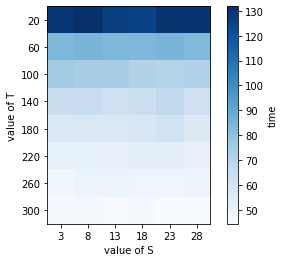

In [166]:
plt.xticks(ticks=np.arange(len(ss)),labels=ss)
plt.yticks(ticks=np.arange(len(ts)),labels=ts)
plt.xlabel('value of S')
plt.ylabel('value of T')

# save this plot inside a variable called hm
hm=plt.imshow(times, cmap='Blues',interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm, label='time')
plt.show()

In [168]:
times=[[51.5534711, 51.0482159, 51.7387149, 53.5200481, 50.63624, 51.1068799],
       [48.7623911, 48.39168, 49.7743211, 50.2049632, 48.6567748, 47.9763479],
       [45.7029572, 46.8473742, 47.669951, 46.9967408, 46.4642711, 46.8538718],
       [44.546406, 45.3464749, 47.4590781, 43.5215659, 43.8757403, 43.8356071],
       [42.0545399, 42.235647, 42.6233442, 43.9712729, 42.5088608, 41.5491991],
       [39.8343048, 39.9089971, 40.602505, 40.1155818, 40.2395651, 39.8196161],
       [39.1635668, 40.7215161, 40.5664778, 39.2416019, 39.2986388, 40.254148]]
ts=[220, 250, 280, 310, 340, 370, 400]
ss=[13, 18, 23, 28, 33, 38]


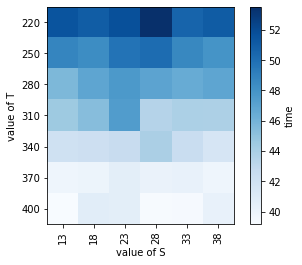

In [169]:
plt.xticks(ticks=np.arange(len(ss)),labels=ss,rotation=90)
plt.yticks(ticks=np.arange(len(ts)),labels=ts)
plt.xlabel('value of S')
plt.ylabel('value of T')

# save this plot inside a variable called hm
hm=plt.imshow(times, cmap='Blues',interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm, label='time')
plt.show()